# **실습 5차시**

이번 실습에서는 KNN classifier과 cross validation을 구현해보겠습니다.

*   K-Nearest Neighbor Classifier
*   Cross Validation



# **1. 데이터 포인트 간의 거리 - 2D**

이번 실습에서는 KNN 모델로 영화 평가 분류기를 구현해볼 것입니다. 먼저 데이터 포인트들 간의 거리 개념부터 알아봅니다.

두 점이 서로 가깝거나 멀리 떨어져 있는 정도를 측정하기 위해 거리 공식을 사용할 것입니다.

이 예제의 경우 데이터의 차원은 다음과 같습니다.
+ 영화의 러닝타임
+ 영화 개봉 연도

*스타워즈*와 *인디아나 존스*를 예로 들겠습니다. *스타워즈*는 125분이며 1977년에 개봉했습니다. *인디아나 존스*는 115분이며 1981년에 개봉했습니다.

이 두 영화를 의미하는 두 데이터 포인트들의 거리는 아래와 같이 계산됩니다.
$$\sqrt{(125 - 115)^2 + (1977-9181)^2} = 10.77$$

### **Practice 1**

1. `movie1`과 `movie2`라는 두 리스트을 매개 변수로 사용하는 `distance`라는 함수를 선언합니다.

    각 리스트의 첫 번째 인덱스는 영화의 러닝타임이고 두 번째 인덱스는 영화의 개봉 연도입니다. `distance` 함수는 두 리스트 사이의 거리를 반환해야 합니다.

In [109]:
# distance 함수 구현하기
def distance(movie1, movie2):
    length_difference = (movie1[0] - movie2[0]) ** 2
    year_difference = (movie1[1] - movie2[1]) ** 2
    distance = (length_difference + year_difference) ** 0.5
    return distance

2. 아래 영화에 대해 `distance` 함수를 호출하여 거리를 비교해봅니다.

In [110]:
star_wars = [125, 1977]
raiders = [115, 1981]
mean_girls = [97, 2004]

In [111]:
# star_wars와 raiders의 거리
print(distance(star_wars, raiders))

# star_wars와 mean_girls의 거리
print(distance(star_wars, mean_girls))

# 스타워즈는 어느 영화와 더 비슷합니까?
# 정답: raiders와의 거리가 더 가까우므로 raiders와 더 비슷하다.

10.770329614269007
38.897300677553446


# **2. 데이터 포인트 간의 거리 - 3D**

영화의 길이와 개봉일만을 기준으로 영화 평가 분류기를 만드는 것은 상당히 제한적입니다. 영화의 다른 속성을 데이터에 포함하여 세번째 차원을 추가해 보겠습니다.

추가된 세 번째 차원은 영화 예산입니다. 이제 영화를 나타내는 두 데이터 포인트들의 거리를 3차원으로 찾아야 합니다.

<img src="https://content.codecademy.com/courses/learn-knn/threed.png" width=500px>

데이터의 차원이 삼차원보다 많아지면 시각화 하는 것은 어렵지만 그래도 거리를 구할 수 있습니다.

N차원의 데이터 포인트 A와 B 사이의 거리 공식은 다음과 같습니다.

$$\sqrt{(A_1 - B_1)^2 + (A_2 - B_2)^2 + ... + (A_n - B_n)^2}$$

여기서 $A_1 - B_1$은 각 데이터 포인트의 첫 번째 feature 간의 차입니다. $A_n - B_n$은(는) 각 점의 마지막 feature 간의 차입니다.

이 공식을 이용하면 N차원 공간에서 한 데이터 포인트의 K-Nearest Neighbors를 찾을 수 있습니다.

이 거리를 사용하여 label되지 않은 데이터 포인트의 가장 가까운 이웃을 찾아 결과적으로 분류를 하게 됩니다.

### **Practice 2**

1. `distance` 함수를 N개의 차원의 데이터의 거리를 반환하는 함수로 수정합니다.

In [112]:
# distance 함수 수정
def distance(movie1, movie2):
    squared_difference = 0
    for i in range(len(movie1)):
        squared_difference += (movie1[i] - movie2[i]) ** 2
    final_distance = squared_difference ** 0.5
    return final_distance

2. 위 활동에서 주어진 영화들에 영화 예산 속성이 추가되었습니다. 아래 영화에 대해 `distance` 함수를 호출하여 거리를 비교해봅니다.

In [113]:
star_wars = [125, 1977, 11000000]
raiders = [115, 1981, 18000000]
mean_girls = [97, 2004, 17000000]

In [114]:
# star_wars와 raiders의 거리
print(distance(star_wars, raiders))

# star_wars와 mean_girls의 거리
print(distance(star_wars, mean_girls))

# 스타워즈는 어느 영화와 더 비슷합니까?
# 정답: 스타워즈와 mean_girls의 거리가 더 가까우므로 mean_girls와 더 비슷하다.

7000000.000008286
6000000.000126083


# **3. 척도가 다른 데이터: 정규화**

이 활동에서는 K-Nearest Neighborhood 알고리즘의 첫 번째 단계를 구현합니다.
1. **데이터를 정규화합니다**.
2. 가장 가까운 이웃인 `k`를 찾습니다.
3. 이러한 이웃을 기준으로 새로운 포인트를 분류합니다.
---
우리가 영화 예산 속성을 추가하면 데이터의 범위가 변화한것을 확인할 수 있습니다.

영화 개봉 연도와 영화 예산을 살펴보겠습니다. 어떠한 두 영화의 개봉 날짜의 최대 차이는 약 125년입니다((루미에르 브라더스는 1890년대에 영화를 만들고 있었습니다). 하지만, 어떠한 두 영화의 예산 차이는 수백만 달러가 될 수 있습니다.

거리 공식의 문제는 규모에 상관없이 모든 차원을 동등하게 취급한다는 것입니다. 이는 1년 차이가 나는 영화 개봉 년도를 1달러의 차이의 영화 예산과 같은 정도로 취급한다는 뜻입니다.

이 문제에 대한 해결책은 정규화입니다. 이는 모든 값은 0과 1 사이로 변환합니다.

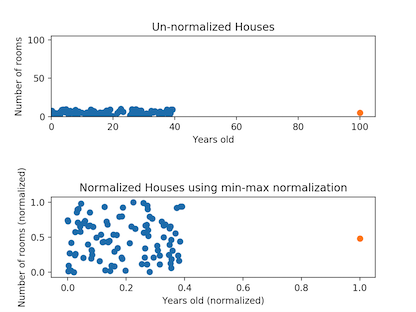

이번 실습은 최소-최대 정규화(Min-Max Normalization)를 사용할 것입니다.

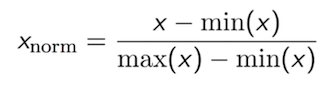

### **Practice 3**

1. `lst`라는 이름의 숫자 리스트을 매개 변수(list의 줄임말)로 받는 `min_max_normalize`라는 함수를 선언합니다.

2. `normalized`라는 빈 리스트를 만듭니다. 최소-최대 정규화를 사용하여 값을 정규화하고 정규화된 값을 새 목록에 추가합니다. 함수는 `normalized` 리스트를 반환합니다.

In [115]:
# min_max_normalize 함수 구현
def min_max_normalize(lst):
    # 1.
    minimum = min(lst)
    maximum = max(lst)
    # 2.
    normalized = []
  
    for value in lst:
        normalized_num = (value - minimum) / (maximum - minimum)
        normalized.append(normalized_num)
  
    return normalized

3. 주어진 `release_dates`에 `min_max_normalize`를 호출하여 결과값을 출력합니다.

In [116]:
release_dates = [1897, 1998, 2000, 1948, 1962, 1950, 1975, 1960,
                 2017, 1937, 1968, 1996, 1944, 1891, 1995, 1948, 
                 2011, 1965, 1891, 1978]

In [117]:
from pprint import pprint

# 결과값 출력하기
pprint(min_max_normalize(release_dates))

[0.047619047619047616,
 0.8492063492063492,
 0.8650793650793651,
 0.4523809523809524,
 0.5634920634920635,
 0.46825396825396826,
 0.6666666666666666,
 0.5476190476190477,
 1.0,
 0.36507936507936506,
 0.6111111111111112,
 0.8333333333333334,
 0.42063492063492064,
 0.0,
 0.8253968253968254,
 0.4523809523809524,
 0.9523809523809523,
 0.5873015873015873,
 0.0,
 0.6904761904761905]


# **4. Nearest Neighbors 찾기**

K-Nearest Neighbors 알고리즘의 두번째 단계를 구현해보겠습니다.
1. 데이터를 정규화합니다.
2. **가장 가까운 이웃 `k`를 찾습니다**.
3. 이러한 이웃을 기준으로 새로운 포인트를 분류합니다.
---

Label되지 않은 데이터 포인터를 분류하기 위해서는 이 데이터 포인트와 가장 가까운 `k`개의 이웃을 찾아야 합니다. 가장 적합한 `k`를 찾는 방법도 있지만, 일단은 `k=5`로 정하도록 하겠습니다.

가장 가까운 5개의 이웃을 찾기 위해서는 label되지 않은 데이터 포인트를 데이터의 다른 모든 데이터 포인트와의 거리를 계산하여 비교합니다. 이번 실습에서 구현할 함수의 반환값은 label되지 않은 한 영화에 대해 데이터의 모든 영화와의 거리가 정렬된 리스트입니다.

반환값의 예시는 다음과 같습니다.
```python
[
  [0.30, 'Superman II'],
  [0.31, 'Finding Nemo'],
  ...
  ...
  [0.38, 'Blazing Saddles']
]
```
이 예에서 label되지 않은 영화와 슈퍼맨2 영화와의 거리는 0.30입니다.

In [118]:
movie_dataset = {'Avatar': [0.01940156245995175, 0.4812286689419795, 0.9213483146067416], "Pirates of the Caribbean: At World's End": [0.02455894456664483, 0.45051194539249145, 0.898876404494382], 'Spectre': [0.02005646812429373, 0.378839590443686, 0.9887640449438202], 'The Dark Knight Rises': [0.020465784164507467, 0.4334470989761092, 0.9550561797752809], 'John Carter': [0.021587310114693104, 0.3242320819112628, 0.9550561797752809], 'Spider-Man 3': [0.021120689828849445, 0.4061433447098976, 0.898876404494382], 'Tangled': [0.021284416244934937, 0.2150170648464164, 0.9325842696629213], 'Avengers: Age of Ultron': [0.020465784164507467, 0.35494880546075086, 0.9887640449438202], 'Harry Potter and the Half-Blood Prince': [0.020465784164507467, 0.39590443686006827, 0.9213483146067416], 'Batman v Superman: Dawn of Justice': [0.020465784164507467, 0.49829351535836175, 1.0], 'Superman Returns': [0.017109392634754826, 0.45051194539249145, 0.8876404494382022], 'Quantum of Solace': [0.0163726237623701, 0.2354948805460751, 0.9101123595505618], "Pirates of the Caribbean: Dead Man's Chest": [0.018419203963438782, 0.3890784982935154, 0.8876404494382022], 'The Lone Ranger': [0.017600571883011312, 0.3856655290102389, 0.9662921348314607], 'Man of Steel': [0.018419203963438782, 0.36177474402730375, 0.9662921348314607], 'The Chronicles of Narnia: Prince Caspian': [0.018419203963438782, 0.3856655290102389, 0.9101123595505618], 'The Avengers': [0.018009887923225047, 0.4641638225255973, 0.9550561797752809], 'Pirates of the Caribbean: On Stranger Tides': [0.020465784164507467, 0.3378839590443686, 0.9438202247191011], 'Men in Black 3': [0.018419203963438782, 0.2354948805460751, 0.9550561797752809], 'The Hobbit: The Battle of the Five Armies': [0.020465784164507467, 0.4334470989761092, 0.9775280898876404], 'The Amazing Spider-Man': [0.01882852000365252, 0.39590443686006827, 0.9550561797752809], 'Robin Hood': [0.0163726237623701, 0.4061433447098976, 0.9325842696629213], 'The Hobbit: The Desolation of Smaug': [0.018419203963438782, 0.5085324232081911, 0.9662921348314607], 'The Golden Compass': [0.014735359601515157, 0.2593856655290102, 0.898876404494382], 'King Kong': [0.016945666218669334, 0.5597269624573379, 0.8764044943820225], 'Titanic': [0.0163726237623701, 0.5358361774744027, 0.7865168539325843], 'Captain America: Civil War': [0.020465784164507467, 0.37542662116040953, 1.0], 'Battleship': [0.017109392634754826, 0.32081911262798635, 0.9550561797752809], 'Jurassic World': [0.012279463360232739, 0.29692832764505117, 0.9887640449438202], 'Skyfall': [0.0163726237623701, 0.36177474402730375, 0.9550561797752809], 'Spider-Man 2': [0.0163726237623701, 0.33447098976109213, 0.8651685393258427], 'Iron Man 3': [0.0163726237623701, 0.5392491467576792, 0.9662921348314607], 'Alice in Wonderland': [0.0163726237623701, 0.24232081911262798, 0.9325842696629213], 'X-Men: The Last Stand': [0.017191255842797574, 0.22866894197952217, 0.8876404494382022], 'Monsters University': [0.0163726237623701, 0.22866894197952217, 0.9662921348314607], 'Transformers: Revenge of the Fallen': [0.0163726237623701, 0.3856655290102389, 0.9213483146067416], 'Transformers: Age of Extinction': [0.017191255842797574, 0.43686006825938567, 0.9775280898876404], 'Oz the Great and Powerful': [0.017600571883011312, 0.3174061433447099, 0.9662921348314607], 'The Amazing Spider-Man 2': [0.0163726237623701, 0.3583617747440273, 0.9775280898876404], 'TRON: Legacy': [0.013916727521087684, 0.3003412969283277, 0.9325842696629213], 'Cars 2': [0.0163726237623701, 0.2354948805460751, 0.9438202247191011], 'Green Lantern': [0.0163726237623701, 0.2935153583617747, 0.9438202247191011], 'Toy Story 3': [0.0163726237623701, 0.22525597269624573, 0.9325842696629213], 'Terminator Salvation': [0.0163726237623701, 0.2764505119453925, 0.9213483146067416], 'Furious 7': [0.015553991681942629, 0.3515358361774744, 0.9887640449438202], 'World War Z': [0.015553991681942629, 0.2935153583617747, 0.9662921348314607], 'X-Men: Days of Future Past': [0.0163726237623701, 0.3822525597269625, 0.9775280898876404], 'Star Trek Into Darkness': [0.015553991681942629, 0.3242320819112628, 0.9662921348314607], 'Jack the Giant Slayer': [0.015963307722156365, 0.2627986348122867, 0.9662921348314607], 'The Great Gatsby': [0.00859561899830911, 0.36177474402730375, 0.9662921348314607], 'Prince of Persia: The Sands of Time': [0.0163726237623701, 0.2696245733788396, 0.9325842696629213], 'Pacific Rim': [0.015553991681942629, 0.32081911262798635, 0.9662921348314607], 'Transformers: Dark of the Moon': [0.015963307722156365, 0.3993174061433447, 0.9438202247191011], 'Indiana Jones and the Kingdom of the Crystal Skull': [0.015144675641728892, 0.2901023890784983, 0.9101123595505618], 'Brave': [0.015144675641728892, 0.19112627986348124, 0.9550561797752809], 'Star Trek Beyond': [0.015144675641728892, 0.2901023890784983, 1.0], 'WALL·E': [0.014735359601515157, 0.20819112627986347, 0.9101123595505618], 'Rush Hour 3': [0.011460831279805265, 0.18430034129692832, 0.898876404494382], '2012': [0.0163726237623701, 0.4129692832764505, 0.9213483146067416], 'A Christmas Carol': [0.0163726237623701, 0.20136518771331058, 0.9213483146067416], 'Jupiter Ascending': [0.014407906769344168, 0.30716723549488056, 0.9887640449438202], 'The Legend of Tarzan': [0.014735359601515157, 0.24914675767918087, 1.0], 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe': [0.014735359601515157, 0.3856655290102389, 0.8764044943820225], 'X-Men: Apocalypse': [0.014571633185429662, 0.3651877133105802, 1.0], 'The Dark Knight': [0.015144675641728892, 0.3924914675767918, 0.9101123595505618], 'Up': [0.01432604356130142, 0.20136518771331058, 0.9213483146067416], 'Monsters vs. Aliens': [0.01432604356130142, 0.1945392491467577, 0.9213483146067416], 'Iron Man': [0.011460831279805265, 0.3037542662116041, 0.9101123595505618], 'Hugo': [0.013916727521087684, 0.3037542662116041, 0.9438202247191011], 'Wild Wild West': [0.013916727521087684, 0.2354948805460751, 0.8089887640449438], 'The Mummy: Tomb of the Dragon Emperor': [0.011870147320019002, 0.25597269624573377, 0.9101123595505618], 'Suicide Squad': [0.01432604356130142, 0.2935153583617747, 1.0], 'Evan Almighty': [0.01432604356130142, 0.20136518771331058, 0.898876404494382], 'Edge of Tomorrow': [0.014571633185429662, 0.2593856655290102, 0.9775280898876404], 'Waterworld': [0.01432604356130142, 0.47440273037542663, 0.7640449438202247], 'G.I. Joe: The Rise of Cobra': [0.01432604356130142, 0.2764505119453925, 0.9213483146067416], 'Inside Out': [0.01432604356130142, 0.19795221843003413, 0.9887640449438202], 'The Jungle Book': [0.01432604356130142, 0.2354948805460751, 1.0], 'Iron Man 2': [0.0163726237623701, 0.29692832764505117, 0.9325842696629213], 'Snow White and the Huntsman': [0.013916727521087684, 0.3242320819112628, 0.9550561797752809], 'Maleficent': [0.014735359601515157, 0.20477815699658702, 0.9775280898876404], 'Dawn of the Planet of the Apes': [0.013916727521087684, 0.3174061433447099, 0.9775280898876404], '47 Ronin': [0.01432604356130142, 0.310580204778157, 0.9662921348314607], 'Captain America: The Winter Soldier': [0.013916727521087684, 0.3378839590443686, 0.9775280898876404], 'Shrek Forever After': [0.013507411480873947, 0.19112627986348124, 0.9325842696629213], 'Tomorrowland': [0.015553991681942629, 0.3174061433447099, 0.9887640449438202], 'Big Hero 6': [0.013507411480873947, 0.22184300341296928, 0.9775280898876404], 'Wreck-It Ralph': [0.013507411480873947, 0.21843003412969283, 0.9550561797752809], 'The Polar Express': [0.013507411480873947, 0.2150170648464164, 0.8651685393258427], 'Independence Day: Resurgence': [0.013507411480873947, 0.2832764505119454, 1.0], 'How to Train Your Dragon': [0.013507411480873947, 0.20819112627986347, 0.9325842696629213], 'Terminator 3: Rise of the Machines': [0.0163726237623701, 0.24573378839590443, 0.8539325842696629], 'Guardians of the Galaxy': [0.013916727521087684, 0.28668941979522183, 0.9775280898876404], 'Interstellar': [0.013507411480873947, 0.45051194539249145, 0.9775280898876404], 'Inception': [0.01309809544066021, 0.378839590443686, 0.9325842696629213], 'The Fast and the Furious': [0.003110784059445043, 0.2354948805460751, 0.8314606741573034], 'The Curious Case of Benjamin Button': [0.012279463360232739, 0.4402730375426621, 0.9101123595505618], 'X-Men: First Class': [0.01309809544066021, 0.3242320819112628, 0.9438202247191011], 'The Hunger Games: Mockingjay - Part 2': [0.01309809544066021, 0.3412969283276451, 0.9887640449438202], "The Sorcerer's Apprentice": [0.012279463360232739, 0.24573378839590443, 0.9325842696629213], 'Poseidon': [0.01309809544066021, 0.20819112627986347, 0.8876404494382022], 'Alice Through the Looking Glass': [0.013916727521087684, 0.2593856655290102, 1.0], 'Shrek the Third': [0.01309809544066021, 0.19112627986348124, 0.898876404494382], 'Warcraft': [0.01309809544066021, 0.2935153583617747, 1.0], 'Terminator Genisys': [0.012688779400446475, 0.3037542662116041, 0.9887640449438202], 'The Chronicles of Narnia: The Voyage of the Dawn Treader': [0.012688779400446475, 0.2593856655290102, 0.9325842696629213], 'Pearl Harbor': [0.011460831279805265, 0.5017064846416383, 0.8314606741573034], 'Transformers': [0.012279463360232739, 0.3651877133105802, 0.898876404494382], 'Alexander': [0.012688779400446475, 0.5767918088737202, 0.8651685393258427], 'Harry Potter and the Order of the Phoenix': [0.012279463360232739, 0.3447098976109215, 0.898876404494382], 'Harry Potter and the Goblet of Fire': [0.012279463360232739, 0.40955631399317405, 0.8764044943820225], 'Hancock': [0.012279463360232739, 0.22184300341296928, 0.9101123595505618], 'I Am Legend': [0.012279463360232739, 0.22866894197952217, 0.898876404494382], 'Charlie and the Chocolate Factory': [0.012279463360232739, 0.26621160409556316, 0.8764044943820225], 'Ratatouille': [0.012279463360232739, 0.2525597269624573, 0.898876404494382], 'Batman Begins': [0.012279463360232739, 0.310580204778157, 0.8764044943820225], 'Madagascar: Escape 2 Africa': [0.012279463360232739, 0.17747440273037543, 0.9101123595505618], 'Night at the Museum: Battle of the Smithsonian': [0.012279463360232739, 0.23208191126279865, 0.9213483146067416], 'X-Men Origins: Wolverine': [0.012279463360232739, 0.27986348122866894, 0.9213483146067416], 'The Matrix Revolutions': [0.012279463360232739, 0.31399317406143346, 0.8539325842696629], 'Frozen': [0.012279463360232739, 0.22184300341296928, 0.9662921348314607], 'The Matrix Reloaded': [0.012279463360232739, 0.3447098976109215, 0.8539325842696629], 'Thor: The Dark World': [0.013916727521087684, 0.25597269624573377, 0.9662921348314607], 'Mad Max: Fury Road': [0.012279463360232739, 0.2832764505119454, 0.9887640449438202], 'Angels & Demons': [0.012279463360232739, 0.3720136518771331, 0.9213483146067416], 'Thor': [0.012279463360232739, 0.26621160409556316, 0.9438202247191011], 'Bolt': [0.012279463360232739, 0.20136518771331058, 0.9101123595505618], 'G-Force': [0.012279463360232739, 0.17406143344709898, 0.9213483146067416], 'Wrath of the Titans': [0.012279463360232739, 0.21160409556313994, 0.9550561797752809], 'Dark Shadows': [0.008186302958095375, 0.2593856655290102, 0.9550561797752809], 'Mission: Impossible - Rogue Nation': [0.012279463360232739, 0.32081911262798635, 0.9887640449438202], 'The Wolfman': [0.012279463360232739, 0.27986348122866894, 0.9325842696629213], 'Bee Movie': [0.012279463360232739, 0.18430034129692832, 0.898876404494382], 'Kung Fu Panda 2': [0.012279463360232739, 0.18088737201365188, 0.9438202247191011], 'The Last Airbender': [0.012279463360232739, 0.22525597269624573, 0.9325842696629213], 'Mission: Impossible III': [0.012279463360232739, 0.29692832764505117, 0.8876404494382022], 'White House Down': [0.012279463360232739, 0.32081911262798635, 0.9662921348314607], 'Mars Needs Moms': [0.012279463360232739, 0.17406143344709898, 0.9438202247191011], 'Flushed Away': [0.012197600152189991, 0.16382252559726962, 0.8876404494382022], 'Pan': [0.012279463360232739, 0.2525597269624573, 0.9887640449438202], 'Mr. Peabody & Sherman': [0.011870147320019002, 0.18771331058020477, 0.9775280898876404], 'Troy': [0.01432604356130142, 0.5426621160409556, 0.8651685393258427], "Madagascar 3: Europe's Most Wanted": [0.011870147320019002, 0.19112627986348124, 0.9550561797752809], 'Die Another Day': [0.01162455769589076, 0.32764505119453924, 0.8426966292134831], 'Ghostbusters': [0.011788284111976254, 0.2696245733788396, 1.0], 'Armageddon': [0.011460831279805265, 0.39590443686006827, 0.797752808988764], 'Men in Black II': [0.011460831279805265, 0.17406143344709898, 0.8426966292134831], 'Beowulf': [0.012279463360232739, 0.26621160409556316, 0.898876404494382], 'Kung Fu Panda 3': [0.011870147320019002, 0.19795221843003413, 1.0], 'Mission: Impossible - Ghost Protocol': [0.011870147320019002, 0.32764505119453924, 0.9438202247191011], 'Rise of the Guardians': [0.011870147320019002, 0.20477815699658702, 0.9550561797752809], 'Fun with Dick and Jane': [0.008186302958095375, 0.18088737201365188, 0.8764044943820225], 'The Last Samurai': [0.011460831279805265, 0.3993174061433447, 0.8539325842696629], 'Exodus: Gods and Kings': [0.011460831279805265, 0.3856655290102389, 0.9775280898876404], 'Star Trek': [0.012279463360232739, 0.30716723549488056, 0.9213483146067416], 'Spider-Man': [0.011378968071762518, 0.28668941979522183, 0.8426966292134831], 'How to Train Your Dragon 2': [0.011870147320019002, 0.22184300341296928, 0.9775280898876404], 'Gods of Egypt': [0.011460831279805265, 0.3037542662116041, 1.0], 'Stealth': [0.011051515239591529, 0.28668941979522183, 0.8764044943820225], 'Watchmen': [0.010642199199377792, 0.6075085324232082, 0.9213483146067416], 'Lethal Weapon 4': [0.011460831279805265, 0.30716723549488056, 0.797752808988764], 'Hulk': [0.011215241655677024, 0.3447098976109215, 0.8539325842696629], 'G.I. Joe: Retaliation': [0.010642199199377792, 0.2901023890784983, 0.9662921348314607], 'Sahara': [0.010642199199377792, 0.29692832764505117, 0.8764044943820225], 'Final Fantasy: The Spirits Within': [0.011215241655677024, 0.2354948805460751, 0.8314606741573034], 'Captain America: The First Avenger': [0.011460831279805265, 0.29692832764505117, 0.9438202247191011], 'The World Is Not Enough': [0.011051515239591529, 0.310580204778157, 0.8089887640449438], 'Master and Commander: The Far Side of the World': [0.012279463360232739, 0.3447098976109215, 0.8539325842696629], 'The Twilight Saga: Breaking Dawn - Part 2': [0.00982356711895032, 0.26621160409556316, 0.9550561797752809], 'Happy Feet 2': [0.011051515239591529, 0.2150170648464164, 0.9438202247191011], 'The Incredible Hulk': [0.012279463360232739, 0.33447098976109213, 0.9101123595505618], 'The BFG': [0.011460831279805265, 0.27303754266211605, 1.0], 'The Revenant': [0.011051515239591529, 0.4061433447098976, 0.9887640449438202], 'Turbo': [0.011051515239591529, 0.20136518771331058, 0.9662921348314607], 'Rango': [0.011051515239591529, 0.23890784982935154, 0.9438202247191011], 'Penguins of Madagascar': [0.010805925615463287, 0.18771331058020477, 0.9775280898876404], 'The Bourne Ultimatum': [0.009004935038522847, 0.26621160409556316, 0.898876404494382], 'Kung Fu Panda': [0.010642199199377792, 0.18771331058020477, 0.9101123595505618], 'Ant-Man': [0.010642199199377792, 0.27303754266211605, 0.9887640449438202], 'The Hunger Games: Catching Fire': [0.010642199199377792, 0.3720136518771331, 0.9662921348314607], 'Home': [0.011051515239591529, 0.1945392491467577, 0.9887640449438202], 'War of the Worlds': [0.010805925615463287, 0.2696245733788396, 0.8764044943820225], 'Bad Boys II': [0.010642199199377792, 0.37542662116040953, 0.8539325842696629], 'Puss in Boots': [0.010642199199377792, 0.18088737201365188, 0.9438202247191011], 'Salt': [0.009004935038522847, 0.21843003412969283, 0.9325842696629213], 'Noah': [0.010232883159164057, 0.3447098976109215, 0.9775280898876404], 'The Adventures of Tintin': [0.011051515239591529, 0.23890784982935154, 0.9438202247191011], 'Harry Potter and the Prisoner of Azkaban': [0.010642199199377792, 0.3583617747440273, 0.8651685393258427], 'Australia': [0.010642199199377792, 0.43686006825938567, 0.9101123595505618], 'After Earth': [0.010642199199377792, 0.2150170648464164, 0.9662921348314607], 'Dinosaur': [0.010437541179270924, 0.15358361774744028, 0.8202247191011236], 'Night at the Museum: Secret of the Tomb': [0.01039660957524955, 0.20819112627986347, 0.9775280898876404], 'Megamind': [0.010642199199377792, 0.19795221843003413, 0.9325842696629213], "Harry Potter and the Sorcerer's Stone": [0.010232883159164057, 0.41638225255972694, 0.8314606741573034], 'R.I.P.D.': [0.010642199199377792, 0.20136518771331058, 0.9662921348314607], 'Pirates of the Caribbean: The Curse of the Black Pearl': [0.011460831279805265, 0.36177474402730375, 0.8539325842696629], 'The Hunger Games: Mockingjay - Part 1': [0.010232883159164057, 0.2935153583617747, 0.9775280898876404], 'The Da Vinci Code': [0.010232883159164057, 0.46757679180887374, 0.8876404494382022], 'Rio 2': [0.008431892582223616, 0.21843003412969283, 0.9775280898876404], 'X-Men 2': [0.009004935038522847, 0.3310580204778157, 0.8539325842696629], 'Fast Five': [0.010232883159164057, 0.3242320819112628, 0.9438202247191011], 'Sherlock Holmes: A Game of Shadows': [0.010232883159164057, 0.31399317406143346, 0.9438202247191011], 'Clash of the Titans': [0.010232883159164057, 0.2354948805460751, 0.9325842696629213], 'Total Recall': [0.00532109067659922, 0.2593856655290102, 0.7078651685393258], 'The 13th Warrior': [0.006958354837454165, 0.22184300341296928, 0.8089887640449438], 'The Bourne Legacy': [0.010232883159164057, 0.33447098976109213, 0.9550561797752809], 'Batman & Robin': [0.010232883159164057, 0.3003412969283277, 0.7865168539325843], 'How the Grinch Stole Christmas': [0.010069156743078561, 0.24914675767918087, 0.8202247191011236], 'The Day After Tomorrow': [0.010232883159164057, 0.29692832764505117, 0.8651685393258427], 'Mission: Impossible II': [0.010232883159164057, 0.2935153583617747, 0.8202247191011236], 'The Perfect Storm': [0.011460831279805265, 0.3174061433447099, 0.8202247191011236], 'Fantastic 4: Rise of the Silver Surfer': [0.010642199199377792, 0.18771331058020477, 0.898876404494382], 'Life of Pi': [0.00982356711895032, 0.30716723549488056, 0.9550561797752809], 'Ghost Rider': [0.009004935038522847, 0.2935153583617747, 0.898876404494382], 'Jason Bourne': [0.00982356711895032, 0.2935153583617747, 1.0], "Charlie's Angels: Full Throttle": [0.00982356711895032, 0.23890784982935154, 0.8539325842696629], 'Prometheus': [0.010642199199377792, 0.29692832764505117, 0.9550561797752809], 'Stuart Little 2': [0.00982356711895032, 0.13651877133105803, 0.8426966292134831], 'Elysium': [0.009414251078736583, 0.24573378839590443, 0.9662921348314607], 'The Chronicles of Riddick': [0.00859561899830911, 0.3310580204778157, 0.8651685393258427], 'RoboCop': [0.008186302958095375, 0.27303754266211605, 0.9775280898876404], 'Speed Racer': [0.00982356711895032, 0.33447098976109213, 0.9101123595505618], 'How Do You Know': [0.00982356711895032, 0.28668941979522183, 0.9325842696629213], 'Knight and Day': [0.009577977494822079, 0.27303754266211605, 0.9325842696629213], 'Oblivion': [0.00982356711895032, 0.29692832764505117, 0.9662921348314607], 'Star Wars: Episode III - Revenge of the Sith': [0.009250524662651088, 0.3515358361774744, 0.8764044943820225], 'Star Wars: Episode II - Attack of the Clones': [0.009414251078736583, 0.3583617747440273, 0.8426966292134831], 'Monsters, Inc.': [0.009414251078736583, 0.18771331058020477, 0.8314606741573034], 'The Wolverine': [0.00982356711895032, 0.3447098976109215, 0.9662921348314607], 'Star Wars: Episode I - The Phantom Menace': [0.009414251078736583, 0.3378839590443686, 0.8089887640449438], 'The Croods': [0.011051515239591529, 0.20819112627986347, 0.9662921348314607], 'Windtalkers': [0.009414251078736583, 0.39590443686006827, 0.8426966292134831], "The Huntsman: Winter's War": [0.009414251078736583, 0.2832764505119454, 1.0], 'Teenage Mutant Ninja Turtles': [0.010232883159164057, 0.21843003412969283, 0.9775280898876404], 'Gravity': [0.008186302958095375, 0.18430034129692832, 0.9662921348314607], "Dante's Peak": [0.009496114286779331, 0.24232081911262798, 0.7865168539325843], 'Fantastic Four': [0.00982356711895032, 0.2150170648464164, 0.9887640449438202], 'Night at the Museum': [0.009004935038522847, 0.24232081911262798, 0.8876404494382022], 'San Andreas': [0.009004935038522847, 0.2627986348122867, 0.9887640449438202], 'Tomorrow Never Dies': [0.009004935038522847, 0.27986348122866894, 0.7865168539325843], 'The Patriot': [0.009004935038522847, 0.3583617747440273, 0.8202247191011236], "Ocean's Twelve": [0.009004935038522847, 0.3003412969283277, 0.8651685393258427], 'Mr. & Mrs. Smith': [0.00982356711895032, 0.3037542662116041, 0.8764044943820225], 'Insurgent': [0.009004935038522847, 0.27986348122866894, 0.9887640449438202], 'The Aviator': [0.009004935038522847, 0.4539249146757679, 0.8651685393258427], "Gulliver's Travels": [0.009168661454608342, 0.16382252559726962, 0.9325842696629213], 'The Green Hornet': [0.00982356711895032, 0.27986348122866894, 0.9438202247191011], '300: Rise of an Empire': [0.009004935038522847, 0.22184300341296928, 0.9775280898876404], 'The Smurfs': [0.009004935038522847, 0.22525597269624573, 0.9438202247191011], 'Home on the Range': [0.009004935038522847, 0.13310580204778158, 0.8651685393258427], 'Allegiant': [0.009004935038522847, 0.2832764505119454, 1.0], 'Real Steel': [0.009004935038522847, 0.30716723549488056, 0.9438202247191011], 'The Smurfs 2': [0.00859561899830911, 0.23208191126279865, 0.9662921348314607], 'Speed 2: Cruise Control': [0.01309809544066021, 0.28668941979522183, 0.7865168539325843], "Ender's Game": [0.009004935038522847, 0.2627986348122867, 0.9662921348314607], 'Live Free or Die Hard': [0.009004935038522847, 0.31399317406143346, 0.898876404494382], 'The Lord of the Rings: The Fellowship of the Ring': [0.007613260501796143, 0.45733788395904434, 0.8314606741573034], 'Around the World in 80 Days': [0.009004935038522847, 0.2832764505119454, 0.8651685393258427], 'Ali': [0.008759345414394605, 0.43686006825938567, 0.8314606741573034], 'The Cat in the Hat': [0.008923071830480099, 0.15358361774744028, 0.8539325842696629], 'I, Robot': [0.00982356711895032, 0.26621160409556316, 0.8651685393258427], 'Kingdom of Heaven': [0.010642199199377792, 0.5358361774744027, 0.8764044943820225], 'Stuart Little': [0.010887788823506035, 0.16040955631399317, 0.8089887640449438], 'The Princess and the Frog': [0.00859561899830911, 0.20477815699658702, 0.9213483146067416], 'The Martian': [0.008841208622437353, 0.3890784982935154, 0.9887640449438202], 'The Island': [0.010314746367206803, 0.3378839590443686, 0.8764044943820225], 'Town & Country': [0.007367670877667902, 0.22866894197952217, 0.8314606741573034], 'Gone in Sixty Seconds': [0.007367670877667902, 0.30716723549488056, 0.8202247191011236], 'Gladiator': [0.008431892582223616, 0.45733788395904434, 0.8202247191011236], 'Minority Report': [0.008350029374180869, 0.36860068259385664, 0.8426966292134831], 'Harry Potter and the Chamber of Secrets': [0.008186302958095375, 0.46757679180887374, 0.8426966292134831], 'Casino Royale': [0.012279463360232739, 0.3651877133105802, 0.8876404494382022], 'Planet of the Apes': [0.008186302958095375, 0.27986348122866894, 0.8314606741573034], 'Terminator 2: Judgment Day': [0.008350029374180869, 0.39590443686006827, 0.7191011235955056], 'Public Enemies': [0.008186302958095375, 0.3515358361774744, 0.9213483146067416], 'American Gangster': [0.008186302958095375, 0.47440273037542663, 0.898876404494382], 'True Lies': [0.009414251078736583, 0.35494880546075086, 0.7528089887640449], 'The Taking of Pelham 1 2 3': [0.008186302958095375, 0.2354948805460751, 0.9213483146067416], 'Little Fockers': [0.008186302958095375, 0.20819112627986347, 0.9325842696629213], 'The Other Guys': [0.008186302958095375, 0.2696245733788396, 0.9325842696629213], 'Eraser': [0.008186302958095375, 0.26621160409556316, 0.7752808988764045], 'Django Unchained': [0.008186302958095375, 0.43686006825938567, 0.9550561797752809], 'The Hunchback of Notre Dame': [0.008186302958095375, 0.18430034129692832, 0.7752808988764045], "The Emperor's New Groove": [0.008186302958095375, 0.13993174061433447, 0.8202247191011236], 'The Expendables 2': [0.007531397293753396, 0.22525597269624573, 0.9550561797752809], 'National Treasure': [0.008186302958095375, 0.32081911262798635, 0.8651685393258427], 'Eragon': [0.008186302958095375, 0.22866894197952217, 0.8876404494382022], 'Where the Wild Things Are': [0.008186302958095375, 0.21843003412969283, 0.9213483146067416], 'Epic': [0.008186302958095375, 0.22184300341296928, 0.9662921348314607], 'The Tourist': [0.008186302958095375, 0.22525597269624573, 0.9325842696629213], 'End of Days': [0.0067946284213686705, 0.28668941979522183, 0.8089887640449438], 'Blood Diamond': [0.008186302958095375, 0.36177474402730375, 0.8876404494382022], 'The Wolf of Wall Street': [0.008186302958095375, 0.6928327645051194, 0.9662921348314607], 'Batman Forever': [0.008186302958095375, 0.28668941979522183, 0.7640449438202247], 'Starship Troopers': [0.00859561899830911, 0.31399317406143346, 0.7865168539325843], 'Cloud Atlas': [0.008350029374180869, 0.46075085324232085, 0.9550561797752809], "Legend of the Guardians: The Owls of Ga'Hoole": [0.006549038797240429, 0.21843003412969283, 0.9325842696629213], 'Catwoman': [0.008186302958095375, 0.17064846416382254, 0.8651685393258427], 'Hercules': [0.008186302958095375, 0.21843003412969283, 0.9775280898876404], 'Treasure Planet': [0.011460831279805265, 0.19795221843003413, 0.8426966292134831], 'Land of the Lost': [0.008186302958095375, 0.22184300341296928, 0.9213483146067416], 'The Expendables 3': [0.007367670877667902, 0.32081911262798635, 0.9775280898876404], 'Point Break': [0.00859561899830911, 0.2627986348122867, 0.9887640449438202], 'Son of the Mask': [0.006876491629411418, 0.1945392491467577, 0.8764044943820225], 'In the Heart of the Sea': [0.008186302958095375, 0.2901023890784983, 0.9887640449438202], 'The Adventures of Pluto Nash': [0.008186302958095375, 0.19795221843003413, 0.8426966292134831], 'Green Zone': [0.008186302958095375, 0.26621160409556316, 0.9325842696629213], 'The Peanuts Movie': [0.008104439750052627, 0.17406143344709898, 0.9887640449438202], 'The Spanish Prisoner': [0.0008186142342481194, 0.24914675767918087, 0.7865168539325843], 'The Mummy Returns': [0.00802257654200988, 0.3174061433447099, 0.8314606741573034], 'Gangs of New York': [0.008186302958095375, 0.6109215017064846, 0.8426966292134831], 'The Flowers of War': [0.007695123709838891, 0.3720136518771331, 0.9438202247191011], "Surf's Up": [0.008186302958095375, 0.16382252559726962, 0.898876404494382], 'The Stepford Wives': [0.007367670877667902, 0.19112627986348124, 0.8651685393258427], 'Black Hawk Down': [0.007531397293753396, 0.3924914675767918, 0.8314606741573034], 'The Campaign': [0.0077769869178816375, 0.16382252559726962, 0.9550561797752809], 'The Fifth Element': [0.007613260501796143, 0.3037542662116041, 0.7865168539325843], 'Sex and the City 2': [0.008186302958095375, 0.3720136518771331, 0.9325842696629213], 'The Road to El Dorado': [0.0077769869178816375, 0.17747440273037543, 0.8202247191011236], 'Ice Age: Continental Drift': [0.0077769869178816375, 0.17406143344709898, 0.9550561797752809], 'Cinderella': [0.0077769869178816375, 0.23208191126279865, 0.9887640449438202], 'The Lovely Bones': [0.00532109067659922, 0.33447098976109213, 0.9213483146067416], 'Finding Nemo': [0.007695123709838891, 0.2150170648464164, 0.8539325842696629], 'The Lord of the Rings: The Return of the King': [0.007695123709838891, 0.5290102389078498, 0.8539325842696629], 'The Lord of the Rings: The Two Towers': [0.007695123709838891, 0.46075085324232085, 0.8426966292134831], 'Seventh Son': [0.0077769869178816375, 0.22184300341296928, 0.9775280898876404], 'Lara Croft: Tomb Raider': [0.009414251078736583, 0.2150170648464164, 0.8314606741573034], 'Transcendence': [0.008186302958095375, 0.27986348122866894, 0.9775280898876404], 'Jurassic Park III': [0.007613260501796143, 0.18771331058020477, 0.8314606741573034], 'Rise of the Planet of the Apes': [0.007613260501796143, 0.23208191126279865, 0.9438202247191011], 'The Spiderwick Chronicles': [0.007367670877667902, 0.23890784982935154, 0.9101123595505618], 'A Good Day to Die Hard': [0.007531397293753396, 0.21843003412969283, 0.9662921348314607], 'The Alamo': [0.008759345414394605, 0.3412969283276451, 0.8651685393258427], 'The Incredibles': [0.007531397293753396, 0.26621160409556316, 0.8651685393258427], 'Cutthroat Island': [0.00802257654200988, 0.29692832764505117, 0.7640449438202247], 'Percy Jackson & the Olympians: The Lightning Thief': [0.0077769869178816375, 0.2764505119453925, 0.9325842696629213], 'Men in Black': [0.007367670877667902, 0.20819112627986347, 0.7865168539325843], 'Toy Story 2': [0.007367670877667902, 0.15358361774744028, 0.8089887640449438], 'Unstoppable': [0.008186302958095375, 0.20819112627986347, 0.9325842696629213], 'Rush Hour 2': [0.007367670877667902, 0.18088737201365188, 0.8314606741573034], 'What Lies Beneath': [0.008186302958095375, 0.3174061433447099, 0.8202247191011236], 'Cloudy with a Chance of Meatballs': [0.008186302958095375, 0.18088737201365188, 0.9213483146067416], 'Ice Age: Dawn of the Dinosaurs': [0.007367670877667902, 0.1945392491467577, 0.9213483146067416], 'The Secret Life of Walter Mitty': [0.007367670877667902, 0.2627986348122867, 0.9662921348314607], "Charlie's Angels": [0.007531397293753396, 0.1945392491467577, 0.8202247191011236], 'The Departed': [0.007367670877667902, 0.3890784982935154, 0.8876404494382022], 'Mulan': [0.007367670877667902, 0.17406143344709898, 0.797752808988764], 'Tropic Thunder': [0.007531397293753396, 0.28668941979522183, 0.9101123595505618], 'The Girl with the Dragon Tattoo': [0.007367670877667902, 0.4129692832764505, 0.9438202247191011], 'Die Hard with a Vengeance': [0.007367670877667902, 0.310580204778157, 0.7640449438202247], 'Sherlock Holmes': [0.007367670877667902, 0.310580204778157, 0.9213483146067416], 'Atlantis: The Lost Empire': [0.00982356711895032, 0.19795221843003413, 0.8314606741573034], 'Alvin and the Chipmunks: The Road Chip': [0.007367670877667902, 0.18771331058020477, 0.9887640449438202], 'Valkyrie': [0.0061397227570266924, 0.28668941979522183, 0.9101123595505618], "You Don't Mess with the Zohan": [0.007367670877667902, 0.2593856655290102, 0.9101123595505618], 'Pixels': [0.007203944461582407, 0.2354948805460751, 0.9887640449438202], 'A.I. Artificial Intelligence': [0.008186302958095375, 0.3720136518771331, 0.8314606741573034], 'The Haunted Mansion': [0.007367670877667902, 0.17406143344709898, 0.8539325842696629], 'Contact': [0.007367670877667902, 0.3856655290102389, 0.7865168539325843], 'Hollow Man': [0.0077769869178816375, 0.27986348122866894, 0.8202247191011236], 'The Interpreter': [0.006549038797240429, 0.310580204778157, 0.8764044943820225], 'Percy Jackson: Sea of Monsters': [0.007367670877667902, 0.2354948805460751, 0.9662921348314607], 'Lara Croft Tomb Raider: The Cradle of Life': [0.0077769869178816375, 0.27303754266211605, 0.8539325842696629], 'Now You See Me 2': [0.007367670877667902, 0.31399317406143346, 1.0], 'The Saint': [0.005566680300727461, 0.2696245733788396, 0.7865168539325843], 'Spy Game': [0.007531397293753396, 0.2627986348122867, 0.8314606741573034], 'Mission to Mars': [0.007367670877667902, 0.2627986348122867, 0.8202247191011236], 'Rio': [0.007367670877667902, 0.20136518771331058, 0.9438202247191011], 'Bicentennial Man': [0.008186302958095375, 0.3242320819112628, 0.8089887640449438], 'Volcano': [0.007367670877667902, 0.22866894197952217, 0.7865168539325843], "The Devil's Own": [0.007040218045496913, 0.2525597269624573, 0.7865168539325843], 'K-19: The Widowmaker': [0.008186302958095375, 0.3447098976109215, 0.8426966292134831], 'Conan the Barbarian': [0.0016372463146755922, 0.31399317406143346, 0.6179775280898876], 'Cinderella Man': [0.007203944461582407, 0.3651877133105802, 0.8764044943820225], 'The Nutcracker in 3D': [0.007367670877667902, 0.24914675767918087, 0.9325842696629213], 'Seabiscuit': [0.0071220812535396595, 0.3515358361774744, 0.8539325842696629], 'Twister': [0.007531397293753396, 0.2593856655290102, 0.7752808988764045], 'Cast Away': [0.007367670877667902, 0.36177474402730375, 0.8202247191011236], 'Happy Feet': [0.008186302958095375, 0.24232081911262798, 0.8876404494382022], 'The Bourne Supremacy': [0.0061397227570266924, 0.24232081911262798, 0.8651685393258427], 'Air Force One': [0.006958354837454165, 0.29692832764505117, 0.7865168539325843], "Ocean's Eleven": [0.006958354837454165, 0.2696245733788396, 0.8314606741573034], 'The Three Musketeers': [0.0061397227570266924, 0.24914675767918087, 0.9438202247191011], 'Hotel Transylvania': [0.006958354837454165, 0.18430034129692832, 0.9550561797752809], 'Enchanted': [0.006958354837454165, 0.23890784982935154, 0.898876404494382], 'Safe House': [0.006958354837454165, 0.26621160409556316, 0.9550561797752809], '102 Dalmatians': [0.006958354837454165, 0.2150170648464164, 0.8202247191011236], 'Tower Heist': [0.0061397227570266924, 0.22866894197952217, 0.9438202247191011], 'The Holiday': [0.006958354837454165, 0.3447098976109215, 0.8876404494382022], 'Enemy of the State': [0.007367670877667902, 0.3515358361774744, 0.797752808988764], "It's Complicated": [0.006958354837454165, 0.2832764505119454, 0.9213483146067416], "Ocean's Thirteen": [0.006958354837454165, 0.2901023890784983, 0.898876404494382], 'Open Season': [0.006958354837454165, 0.15699658703071673, 0.8876404494382022], 'Divergent': [0.006958354837454165, 0.34812286689419797, 0.9775280898876404], 'Enemy at the Gates': [0.005566680300727461, 0.32081911262798635, 0.8314606741573034], 'The Rundown': [0.006958354837454165, 0.22866894197952217, 0.8539325842696629], 'Last Action Hero': [0.005730406716812956, 0.3174061433447099, 0.7415730337078652], 'Memoirs of a Geisha': [0.006958354837454165, 0.36860068259385664, 0.8764044943820225], 'The Fast and the Furious: Tokyo Drift': [0.006958354837454165, 0.22866894197952217, 0.8876404494382022], 'Arthur Christmas': [0.008186302958095375, 0.20477815699658702, 0.9438202247191011], 'Meet Joe Black': [0.007367670877667902, 0.4812286689419795, 0.797752808988764], 'Collateral Damage': [0.006958354837454165, 0.24232081911262798, 0.8426966292134831], 'Mirror Mirror': [0.006958354837454165, 0.2354948805460751, 0.9550561797752809], 'Scott Pilgrim vs. the World': [0.004911774636385483, 0.25597269624573377, 0.9325842696629213], 'The Core': [0.004911774636385483, 0.33447098976109213, 0.8539325842696629], 'Nutty Professor II: The Klumps': [0.00532109067659922, 0.24573378839590443, 0.8202247191011236], 'Scooby-Doo': [0.006876491629411418, 0.16723549488054607, 0.8426966292134831], 'Dredd': [0.0028651944353168014, 0.19795221843003413, 0.9550561797752809], 'Click': [0.005730406716812956, 0.23890784982935154, 0.8876404494382022], 'Cats & Dogs: The Revenge of Kitty Galore': [0.006958354837454165, 0.15358361774744028, 0.9325842696629213], 'Jumper': [0.006958354837454165, 0.17406143344709898, 0.9101123595505618], 'Hellboy II: The Golden Army': [0.006958354837454165, 0.2832764505119454, 0.9101123595505618], 'Zodiac': [0.00532109067659922, 0.42662116040955633, 0.898876404494382], 'The 6th Day': [0.006712765213325924, 0.2935153583617747, 0.8202247191011236], 'Bruce Almighty': [0.006630902005283176, 0.21843003412969283, 0.8539325842696629], 'The Expendables': [0.006549038797240429, 0.2593856655290102, 0.9325842696629213], 'Mission: Impossible': [0.006549038797240429, 0.24914675767918087, 0.7752808988764045], 'The Hunger Games': [0.006385312381154935, 0.3583617747440273, 0.9550561797752809], 'The Hangover Part II': [0.006549038797240429, 0.22184300341296928, 0.9438202247191011], 'Batman Returns': [0.006549038797240429, 0.3037542662116041, 0.7303370786516854], 'Over the Hedge': [0.006549038797240429, 0.15699658703071673, 0.8876404494382022], 'Lilo & Stitch': [0.006549038797240429, 0.16382252559726962, 0.8426966292134831], 'Deep Impact': [0.0061397227570266924, 0.2832764505119454, 0.797752808988764], 'RED 2': [0.006876491629411418, 0.2696245733788396, 0.9662921348314607], 'The Longest Yard': [0.006712765213325924, 0.2593856655290102, 0.8764044943820225], 'Alvin and the Chipmunks: Chipwrecked': [0.0061397227570266924, 0.17064846416382254, 0.9438202247191011], 'Grown Ups 2': [0.006549038797240429, 0.21843003412969283, 0.9662921348314607], 'Get Smart': [0.006549038797240429, 0.24914675767918087, 0.9101123595505618], "Something's Gotta Give": [0.006549038797240429, 0.310580204778157, 0.8539325842696629], 'Shutter Island': [0.006549038797240429, 0.3447098976109215, 0.9325842696629213], 'Four Christmases': [0.006549038797240429, 0.17406143344709898, 0.9101123595505618], 'Robots': [0.0061397227570266924, 0.18430034129692832, 0.8764044943820225], 'Face/Off': [0.006549038797240429, 0.3447098976109215, 0.7865168539325843], 'Bedtime Stories': [0.006549038797240429, 0.21160409556313994, 0.9101123595505618], 'Road to Perdition': [0.006549038797240429, 0.27303754266211605, 0.8426966292134831], 'Just Go with It': [0.006549038797240429, 0.27303754266211605, 0.9438202247191011], 'Con Air': [0.0061397227570266924, 0.2935153583617747, 0.7865168539325843], 'Eagle Eye': [0.006549038797240429, 0.2764505119453925, 0.9101123595505618], 'Cold Mountain': [0.0064671755891976814, 0.3993174061433447, 0.8539325842696629], 'The Book of Eli': [0.006549038797240429, 0.2764505119453925, 0.9325842696629213], 'Flubber': [0.006549038797240429, 0.18088737201365188, 0.7865168539325843], 'The Haunting': [0.006549038797240429, 0.2593856655290102, 0.8089887640449438], 'Space Jam': [0.006549038797240429, 0.17406143344709898, 0.7752808988764045], 'The Pink Panther': [0.00532109067659922, 0.19112627986348124, 0.8876404494382022], 'The Day the Earth Stood Still': [0.006549038797240429, 0.22866894197952217, 0.9101123595505618], 'Conspiracy Theory': [0.0061397227570266924, 0.33447098976109213, 0.7865168539325843], 'Fury': [0.005566680300727461, 0.3310580204778157, 0.9775280898876404], 'Six Days Seven Nights': [0.005730406716812956, 0.20819112627986347, 0.797752808988764], 'Yogi Bear': [0.006549038797240429, 0.14675767918088736, 0.9325842696629213], 'Spirit: Stallion of the Cimarron': [0.006549038797240429, 0.15699658703071673, 0.8426966292134831], 'Zookeeper': [0.006549038797240429, 0.22184300341296928, 0.9438202247191011], 'Lost in Space': [0.006549038797240429, 0.3174061433447099, 0.797752808988764], 'The Manchurian Candidate': [0.006549038797240429, 0.31399317406143346, 0.8651685393258427], 'Hotel Transylvania 2': [0.006549038797240429, 0.17747440273037543, 0.9887640449438202], 'Fantasia 2000': [0.006549038797240429, 0.12627986348122866, 0.8089887640449438], 'The Time Machine': [0.006549038797240429, 0.20136518771331058, 0.8426966292134831], 'Mighty Joe Young': [0.007367670877667902, 0.2627986348122867, 0.797752808988764], 'Swordfish': [0.006549038797240429, 0.21160409556313994, 0.8314606741573034], 'The Legend of Zorro': [0.0061397227570266924, 0.31399317406143346, 0.8764044943820225], 'What Dreams May Come': [0.006958354837454165, 0.2593856655290102, 0.797752808988764], 'Little Nicky': [0.006549038797240429, 0.18088737201365188, 0.8202247191011236], 'The Brothers Grimm': [0.007203944461582407, 0.2764505119453925, 0.8764044943820225], 'Mars Attacks!': [0.005730406716812956, 0.2354948805460751, 0.7752808988764045], 'Surrogates': [0.006549038797240429, 0.17747440273037543, 0.9213483146067416], 'Thirteen Days': [0.006549038797240429, 0.36860068259385664, 0.8202247191011236], 'Daylight': [0.006549038797240429, 0.2627986348122867, 0.7752808988764045], 'Walking with Dinosaurs 3D': [0.006549038797240429, 0.17064846416382254, 0.9662921348314607], 'Battlefield Earth': [0.0036019633077015267, 0.27986348122866894, 0.8202247191011236], 'Looney Tunes: Back in Action': [0.006549038797240429, 0.18430034129692832, 0.8539325842696629], 'Nine': [0.006549038797240429, 0.2764505119453925, 0.9213483146067416], 'Timeline': [0.006549038797240429, 0.2696245733788396, 0.8539325842696629], 'The Postman': [0.006549038797240429, 0.4778156996587031, 0.7865168539325843], 'Babe: Pig in the City': [0.006549038797240429, 0.20477815699658702, 0.797752808988764], 'The Last Witch Hunter': [0.007367670877667902, 0.2354948805460751, 0.9887640449438202], 'Red Planet': [0.005730406716812956, 0.2354948805460751, 0.8202247191011236], 'Arthur and the Invisibles': [0.007040218045496913, 0.1945392491467577, 0.8876404494382022], 'Oceans': [0.0032745104755305377, 0.22866894197952217, 0.9213483146067416], 'A Sound of Thunder': [0.004256868972043505, 0.22184300341296928, 0.8764044943820225], 'Pompeii': [0.006549038797240429, 0.23208191126279865, 0.9775280898876404], 'A Beautiful Mind': [0.004748048220299989, 0.33447098976109213, 0.8314606741573034], 'The Lion King': [0.003683826515744274, 0.12286689419795221, 0.7528089887640449], 'Journey 2: The Mysterious Island': [0.0064671755891976814, 0.1945392491467577, 0.9550561797752809], 'Cloudy with a Chance of Meatballs 2': [0.006385312381154935, 0.19795221843003413, 0.9662921348314607], 'Red Dragon': [0.006385312381154935, 0.29692832764505117, 0.8426966292134831], 'Hidalgo': [0.008186302958095375, 0.3378839590443686, 0.8651685393258427], 'Jack and Jill': [0.0064671755891976814, 0.18430034129692832, 0.9438202247191011], '2 Fast 2 Furious': [0.006221585965069439, 0.23890784982935154, 0.8539325842696629], 'The Little Prince': [0.006647274646891726, 0.24232081911262798, 0.9887640449438202], 'The Invasion': [0.006549038797240429, 0.21160409556313994, 0.898876404494382], 'The Adventures of Rocky & Bullwinkle': [0.006221585965069439, 0.18771331058020477, 0.8202247191011236], 'The Secret Life of Pets': [0.0061397227570266924, 0.17064846416382254, 1.0], 'The League of Extraordinary Gentlemen': [0.006385312381154935, 0.24914675767918087, 0.8539325842696629], 'Despicable Me 2': [0.006221585965069439, 0.20819112627986347, 0.9662921348314607], 'Independence Day': [0.0061397227570266924, 0.3993174061433447, 0.7752808988764045], 'The Lost World: Jurassic Park': [0.005975996340941198, 0.31399317406143346, 0.7865168539325843], 'Madagascar': [0.0061397227570266924, 0.16723549488054607, 0.8764044943820225], 'Children of Men': [0.006221585965069439, 0.24573378839590443, 0.8876404494382022], 'X-Men': [0.0061397227570266924, 0.22866894197952217, 0.8202247191011236], 'Wanted': [0.0061397227570266924, 0.24914675767918087, 0.9101123595505618], 'The Rock': [0.0061397227570266924, 0.3378839590443686, 0.7752808988764045], 'Ice Age: The Meltdown': [0.006549038797240429, 0.26621160409556316, 0.8876404494382022], '50 First Dates': [0.0061397227570266924, 0.21160409556313994, 0.8651685393258427], 'Hairspray': [0.0061397227570266924, 0.27303754266211605, 0.898876404494382], 'Exorcist: The Beginning': [0.004093142555958011, 0.3003412969283277, 0.8651685393258427], 'Inspector Gadget': [0.0061397227570266924, 0.24914675767918087, 0.8089887640449438], 'Now You See Me': [0.0061397227570266924, 0.3003412969283277, 0.9662921348314607], 'Grown Ups': [0.006549038797240429, 0.22184300341296928, 0.9325842696629213], 'The Terminal': [0.004911774636385483, 0.310580204778157, 0.8651685393258427], 'Hotel for Dogs': [0.0028651944353168014, 0.2150170648464164, 0.9213483146067416], 'Vertical Limit': [0.0061397227570266924, 0.29692832764505117, 0.8202247191011236], "Charlie Wilson's War": [0.0061397227570266924, 0.22184300341296928, 0.898876404494382], 'Shark Tale': [0.0061397227570266924, 0.18088737201365188, 0.8651685393258427], 'Dreamgirls': [0.005730406716812956, 0.3174061433447099, 0.8876404494382022], 'Be Cool': [0.004338732180086252, 0.2764505119453925, 0.8764044943820225], 'Munich': [0.005730406716812956, 0.4300341296928328, 0.8764044943820225], 'Tears of the Sun': [0.005730406716812956, 0.3583617747440273, 0.8539325842696629], 'Killers': [0.0061397227570266924, 0.2150170648464164, 0.9325842696629213], 'The Man from U.N.C.L.E.': [0.0061397227570266924, 0.2696245733788396, 0.9887640449438202], 'Spanglish': [0.006549038797240429, 0.32081911262798635, 0.8651685393258427], 'Monster House': [0.0061397227570266924, 0.18430034129692832, 0.8876404494382022], 'Bandits': [0.006549038797240429, 0.2935153583617747, 0.8314606741573034], 'First Knight': [0.0045024585961717465, 0.3310580204778157, 0.7640449438202247], 'Anna and the King': [0.0061397227570266924, 0.378839590443686, 0.8089887640449438], 'Immortals': [0.0061397227570266924, 0.24914675767918087, 0.9438202247191011], 'Hostage': [0.004256868972043505, 0.2593856655290102, 0.8764044943820225], 'Titan A.E.': [0.0061397227570266924, 0.1945392491467577, 0.8202247191011236], 'Hollywood Homicide': [0.0061397227570266924, 0.2696245733788396, 0.8539325842696629], 'Soldier': [0.0061397227570266924, 0.21160409556313994, 0.797752808988764], 'Monkeybone': [0.0061397227570266924, 0.19112627986348124, 0.8314606741573034], 'Flight of the Phoenix': [0.003683826515744274, 0.2593856655290102, 0.8651685393258427], 'Unbreakable': [0.0061397227570266924, 0.2354948805460751, 0.8202247191011236], 'Minions': [0.006057859548983945, 0.18430034129692832, 0.9887640449438202], 'Sucker Punch': [0.006712765213325924, 0.310580204778157, 0.9438202247191011], 'Snake Eyes': [0.005648543508770209, 0.20819112627986347, 0.797752808988764], 'Sphere': [0.0061397227570266924, 0.3310580204778157, 0.797752808988764], 'The Angry Birds Movie': [0.005975996340941198, 0.20477815699658702, 1.0], "Fool's Gold": [0.005730406716812956, 0.25597269624573377, 0.9101123595505618], 'Funny People': [0.0061397227570266924, 0.39590443686006827, 0.9213483146067416], 'The Kingdom': [0.005730406716812956, 0.24914675767918087, 0.898876404494382], 'Talladega Nights: The Ballad of Ricky Bobby': [0.005975996340941198, 0.2901023890784983, 0.8876404494382022], 'Dr. Dolittle 2': [0.00589413313289845, 0.17064846416382254, 0.8314606741573034], 'Braveheart': [0.00589413313289845, 0.4812286689419795, 0.7640449438202247], 'Jarhead': [0.005730406716812956, 0.3003412969283277, 0.8764044943820225], 'The Simpsons Movie': [0.0061397227570266924, 0.17064846416382254, 0.898876404494382], 'The Majestic': [0.00589413313289845, 0.3924914675767918, 0.8314606741573034], 'Driven': [0.00589413313289845, 0.2696245733788396, 0.8314606741573034], 'Two Brothers': [0.004883941145650949, 0.24573378839590443, 0.8651685393258427], 'The Village': [0.004911774636385483, 0.24232081911262798, 0.8651685393258427], 'Doctor Dolittle': [0.005853201528877077, 0.16382252559726962, 0.797752808988764], 'Signs': [0.00589413313289845, 0.2354948805460751, 0.8426966292134831], 'Shrek 2': [0.012279463360232739, 0.19112627986348124, 0.8651685393258427], 'Cars': [0.00982356711895032, 0.27303754266211605, 0.8876404494382022], 'Runaway Bride': [0.005730406716812956, 0.2696245733788396, 0.8089887640449438], 'xXx': [0.005730406716812956, 0.3242320819112628, 0.8426966292134831], 'The SpongeBob Movie: Sponge Out of Water': [0.006057859548983945, 0.18771331058020477, 0.9887640449438202], 'Ransom': [0.006549038797240429, 0.34812286689419797, 0.7752808988764045], 'Inglourious Basterds': [0.0061397227570266924, 0.39590443686006827, 0.9213483146067416], 'Hook': [0.005730406716812956, 0.3583617747440273, 0.7191011235955056], 'Die Hard 2': [0.005730406716812956, 0.29692832764505117, 0.7078651685393258], 'S.W.A.T.': [0.006549038797240429, 0.27303754266211605, 0.8539325842696629], 'Vanilla Sky': [0.005566680300727461, 0.35494880546075086, 0.8314606741573034], 'Lady in the Water': [0.005730406716812956, 0.24914675767918087, 0.8876404494382022], 'AVP: Alien vs. Predator': [0.004911774636385483, 0.24573378839590443, 0.8651685393258427], 'Alvin and the Chipmunks: The Squeakquel': [0.0061397227570266924, 0.17406143344709898, 0.9213483146067416], 'We Were Soldiers': [0.0061397227570266924, 0.29692832764505117, 0.8426966292134831], 'Olympus Has Fallen': [0.005730406716812956, 0.27986348122866894, 0.9662921348314607], 'Star Trek: Insurrection': [0.004748048220299989, 0.22525597269624573, 0.797752808988764], 'Battle Los Angeles': [0.005730406716812956, 0.2696245733788396, 0.9438202247191011], 'Big Fish': [0.005730406716812956, 0.3003412969283277, 0.8539325842696629], 'Wolf': [0.005730406716812956, 0.3003412969283277, 0.7528089887640449], 'War Horse': [0.005402953884641967, 0.3720136518771331, 0.9438202247191011], 'The Monuments Men': [0.005730406716812956, 0.2764505119453925, 0.9775280898876404], 'The Abyss': [0.005689475112791583, 0.45733788395904434, 0.6966292134831461], 'Wall Street: Money Never Sleeps': [0.005730406716812956, 0.3378839590443686, 0.9325842696629213], 'Dracula Untold': [0.005730406716812956, 0.18771331058020477, 0.9775280898876404], 'The Siege': [0.005730406716812956, 0.2696245733788396, 0.797752808988764], 'Stardust': [0.005730406716812956, 0.30716723549488056, 0.898876404494382], 'Seven Years in Tibet': [0.005730406716812956, 0.3378839590443686, 0.7865168539325843], 'The Dilemma': [0.005730406716812956, 0.2525597269624573, 0.9438202247191011], 'Bad Company': [0.005730406716812956, 0.2696245733788396, 0.8426966292134831], 'Doom': [0.004911774636385483, 0.2593856655290102, 0.8764044943820225], 'I Spy': [0.005730406716812956, 0.20477815699658702, 0.8426966292134831], 'Underworld: Awakening': [0.005730406716812956, 0.17406143344709898, 0.9550561797752809], 'Rock of Ages': [0.0061397227570266924, 0.3378839590443686, 0.9550561797752809], "Hart's War": [0.004911774636385483, 0.3003412969283277, 0.8426966292134831], 'Killer Elite': [0.0028651944353168014, 0.2696245733788396, 0.9438202247191011], 'Rollerball': [0.005730406716812956, 0.20819112627986347, 0.8426966292134831], 'Ballistic: Ecks vs. Sever': [0.005730406716812956, 0.18430034129692832, 0.8426966292134831], 'Hard Rain': [0.005730406716812956, 0.20477815699658702, 0.797752808988764], 'Osmosis Jones': [0.005730406716812956, 0.19795221843003413, 0.8314606741573034], 'Blackhat': [0.005730406716812956, 0.32764505119453924, 0.9887640449438202], 'Sky Captain and the World of Tomorrow': [0.005730406716812956, 0.2354948805460751, 0.8651685393258427], 'Basic Instinct 2': [0.005730406716812956, 0.2696245733788396, 0.8876404494382022], 'Escape Plan': [0.004093142555958011, 0.26621160409556316, 0.9662921348314607], 'The Legend of Hercules': [0.005730406716812956, 0.21160409556313994, 0.9775280898876404], 'The Sum of All Fears': [0.005566680300727461, 0.29692832764505117, 0.8426966292134831], 'The Twilight Saga: Eclipse': [0.005566680300727461, 0.29692832764505117, 0.9325842696629213], 'The Score': [0.005566680300727461, 0.29692832764505117, 0.8314606741573034], 'Despicable Me': [0.005648543508770209, 0.17064846416382254, 0.9325842696629213], 'Money Train': [0.005566680300727461, 0.23208191126279865, 0.7640449438202247], 'Ted 2': [0.005566680300727461, 0.3003412969283277, 0.9887640449438202], 'Agora': [0.005730406716812956, 0.35494880546075086, 0.9213483146067416], 'Mystery Men': [0.00532109067659922, 0.28668941979522183, 0.8089887640449438], 'Hall Pass': [0.0029470576433595487, 0.2525597269624573, 0.9438202247191011], 'The Insider': [0.005566680300727461, 0.40955631399317405, 0.8089887640449438], 'Body of Lies': [0.005730406716812956, 0.310580204778157, 0.9101123595505618], 'Abraham Lincoln: Vampire Hunter': [0.005648543508770209, 0.23208191126279865, 0.9550561797752809], 'Entrapment': [0.005402953884641967, 0.2593856655290102, 0.8089887640449438], 'The X Files': [0.005402953884641967, 0.28668941979522183, 0.797752808988764], 'The Last Legion': [0.0028651944353168014, 0.22184300341296928, 0.898876404494382], 'Saving Private Ryan': [0.005730406716812956, 0.45051194539249145, 0.797752808988764], 'Need for Speed': [0.005402953884641967, 0.3242320819112628, 0.9775280898876404], 'What Women Want': [0.005730406716812956, 0.30716723549488056, 0.8202247191011236], 'Ice Age': [0.004829911428342736, 0.22525597269624573, 0.8426966292134831], 'Dreamcatcher': [0.005566680300727461, 0.3378839590443686, 0.8539325842696629], 'Lincoln': [0.00532109067659922, 0.3856655290102389, 0.9550561797752809], 'The Matrix': [0.005157364260513725, 0.3378839590443686, 0.8089887640449438], 'Apollo 13': [0.005075501052470978, 0.3515358361774744, 0.7640449438202247], 'The Santa Clause 2': [0.004911774636385483, 0.22866894197952217, 0.8426966292134831], 'Les Misérables': [0.004993637844428231, 0.4129692832764505, 0.9550561797752809], "You've Got Mail": [0.00532109067659922, 0.27986348122866894, 0.797752808988764], 'Step Brothers': [0.00532109067659922, 0.2354948805460751, 0.9101123595505618], 'The Mask of Zorro': [0.00532109067659922, 0.3378839590443686, 0.797752808988764], 'Due Date': [0.00532109067659922, 0.19795221843003413, 0.9325842696629213], 'Unbroken': [0.00532109067659922, 0.3412969283276451, 0.9775280898876404], 'Space Cowboys': [0.00532109067659922, 0.3174061433447099, 0.8202247191011236], 'Cliffhanger': [0.005730406716812956, 0.29692832764505117, 0.7415730337078652], 'Broken Arrow': [0.004093142555958011, 0.24232081911262798, 0.7752808988764045], 'The Kid': [0.004911774636385483, 0.22866894197952217, 0.8202247191011236], 'World Trade Center': [0.005157364260513725, 0.31399317406143346, 0.8876404494382022], 'Mona Lisa Smile': [0.00532109067659922, 0.27303754266211605, 0.8539325842696629], 'The Dictator': [0.00532109067659922, 0.21160409556313994, 0.9550561797752809], 'Eyes Wide Shut': [0.00532109067659922, 0.41638225255972694, 0.8089887640449438], 'Annie': [0.00532109067659922, 0.2764505119453925, 0.9775280898876404], 'Focus': [0.004101328876762286, 0.23208191126279865, 0.9887640449438202], 'This Means War': [0.00532109067659922, 0.22525597269624573, 0.9550561797752809], 'Blade: Trinity': [0.00532109067659922, 0.2901023890784983, 0.8651685393258427], 'Primary Colors': [0.00532109067659922, 0.36177474402730375, 0.797752808988764], 'Resident Evil: Retribution': [0.00532109067659922, 0.20136518771331058, 0.9550561797752809], 'Death Race': [0.003683826515744274, 0.2525597269624573, 0.9101123595505618], 'The Long Kiss Goodnight': [0.00532109067659922, 0.28668941979522183, 0.7752808988764045], 'Proof of Life': [0.00532109067659922, 0.33447098976109213, 0.8202247191011236], 'Zathura: A Space Adventure': [0.00532109067659922, 0.21843003412969283, 0.8764044943820225], 'Fight Club': [0.005157364260513725, 0.3890784982935154, 0.8089887640449438], 'We Are Marshall': [0.00532109067659922, 0.32081911262798635, 0.8876404494382022], 'Hudson Hawk': [0.005730406716812956, 0.2150170648464164, 0.7191011235955056], 'Lucky Numbers': [0.00532109067659922, 0.23208191126279865, 0.8202247191011236], 'I, Frankenstein': [0.00532109067659922, 0.18771331058020477, 0.9775280898876404], 'Oliver Twist': [0.004093142555958011, 0.3174061433447099, 0.8764044943820225], 'Elektra': [0.0035201000996587795, 0.2150170648464164, 0.8764044943820225], 'Sin City: A Dame to Kill For': [0.00532109067659922, 0.22184300341296928, 0.9775280898876404], 'Random Hearts': [0.005239227468556472, 0.32764505119453924, 0.8089887640449438], 'Everest': [0.0045024585961717465, 0.28668941979522183, 0.9887640449438202], 'Perfume: The Story of a Murderer': [0.004093142555958011, 0.37542662116040953, 0.8876404494382022], 'Austin Powers in Goldmember': [0.005157364260513725, 0.1945392491467577, 0.8426966292134831], 'Astro Boy': [0.00532109067659922, 0.1945392491467577, 0.9213483146067416], 'Jurassic Park': [0.005157364260513725, 0.30716723549488056, 0.7415730337078652], 'Wyatt Earp': [0.005157364260513725, 0.5972696245733788, 0.7528089887640449], 'Clear and Present Danger': [0.005075501052470978, 0.35494880546075086, 0.7528089887640449], 'Dragon Blade': [0.00532109067659922, 0.22525597269624573, 0.9887640449438202], 'Littleman': [0.005239227468556472, 0.20819112627986347, 0.8876404494382022], 'U-571': [0.005075501052470978, 0.2696245733788396, 0.8202247191011236], 'The American President': [0.005075501052470978, 0.2627986348122867, 0.7640449438202247], 'The Love Guru': [0.005075501052470978, 0.17064846416382254, 0.9101123595505618], '3000 Miles to Graceland': [0.003438236891616032, 0.3003412969283277, 0.8314606741573034], 'The Hateful Eight': [0.0036019633077015267, 0.5119453924914675, 0.9887640449438202], 'Blades of Glory': [0.004993637844428231, 0.19112627986348124, 0.898876404494382], 'Hop': [0.005157364260513725, 0.19795221843003413, 0.9438202247191011], '300': [0.00532109067659922, 0.27303754266211605, 0.8876404494382022], 'Meet the Fockers': [0.006549038797240429, 0.2354948805460751, 0.8651685393258427], 'Marley & Me': [0.004911774636385483, 0.26621160409556316, 0.9101123595505618], 'The Green Mile': [0.004911774636385483, 0.5187713310580204, 0.8089887640449438], 'Chicken Little': [0.012279463360232739, 0.15017064846416384, 0.8764044943820225], 'Gone Girl': [0.004993637844428231, 0.3822525597269625, 0.9775280898876404], 'The Bourne Identity': [0.004911774636385483, 0.27986348122866894, 0.8426966292134831], 'GoldenEye': [0.004748048220299989, 0.3174061433447099, 0.7640449438202247], "The General's Daughter": [0.0077769869178816375, 0.2696245733788396, 0.8089887640449438], 'The Truman Show': [0.004911774636385483, 0.22525597269624573, 0.797752808988764], 'The Prince of Egypt': [0.005730406716812956, 0.21160409556313994, 0.797752808988764], 'Daddy Day Care': [0.004911774636385483, 0.18771331058020477, 0.8539325842696629], '2 Guns': [0.004993637844428231, 0.24573378839590443, 0.9662921348314607], 'Cats & Dogs': [0.004911774636385483, 0.17064846416382254, 0.8314606741573034], 'The Italian Job': [0.004911774636385483, 0.2525597269624573, 0.8539325842696629], 'Two Weeks Notice': [0.004911774636385483, 0.21843003412969283, 0.8426966292134831], 'Antz': [0.00859561899830911, 0.15699658703071673, 0.797752808988764], 'Couples Retreat': [0.004911774636385483, 0.2593856655290102, 0.9213483146067416], 'Days of Thunder': [0.004911774636385483, 0.23890784982935154, 0.7078651685393258], 'Cheaper by the Dozen 2': [0.004911774636385483, 0.1945392491467577, 0.8764044943820225], 'The Scorch Trials': [0.004993637844428231, 0.3242320819112628, 0.9887640449438202], 'Eat Pray Love': [0.004911774636385483, 0.3515358361774744, 0.9325842696629213], 'The Family Man': [0.004911774636385483, 0.3003412969283277, 0.8202247191011236], 'RED': [0.004748048220299989, 0.2525597269624573, 0.9325842696629213], 'Any Given Sunday': [0.0045024585961717465, 0.4061433447098976, 0.8089887640449438], 'The Horse Whisperer': [0.004911774636385483, 0.4539249146757679, 0.797752808988764], 'Collateral': [0.00532109067659922, 0.2832764505119454, 0.8651685393258427], 'The Scorpion King': [0.004911774636385483, 0.2150170648464164, 0.8426966292134831], 'Ladder 49': [0.0045024585961717465, 0.26621160409556316, 0.8651685393258427], 'Jack Reacher': [0.004911774636385483, 0.3174061433447099, 0.9550561797752809], 'Deep Blue Sea': [0.004911774636385483, 0.23208191126279865, 0.8089887640449438], 'This Is It': [0.004911774636385483, 0.2525597269624573, 0.9213483146067416], 'Contagion': [0.004911774636385483, 0.2354948805460751, 0.9438202247191011], 'Kangaroo Jack': [0.004911774636385483, 0.17747440273037543, 0.8539325842696629], 'Coraline': [0.004911774636385483, 0.2150170648464164, 0.9213483146067416], 'The Happening': [0.003929416139872516, 0.18430034129692832, 0.9101123595505618], 'Man on Fire': [0.005730406716812956, 0.3720136518771331, 0.8651685393258427], 'The Shaggy Dog': [0.004093142555958011, 0.20819112627986347, 0.8876404494382022], 'Starsky & Hutch': [0.004911774636385483, 0.21843003412969283, 0.8651685393258427], 'Jingle All the Way': [0.004911774636385483, 0.1945392491467577, 0.7752808988764045], 'Hellboy': [0.005402953884641967, 0.3242320819112628, 0.8651685393258427], 'A Civil Action': [0.004911774636385483, 0.26621160409556316, 0.797752808988764], 'ParaNorman': [0.004911774636385483, 0.18771331058020477, 0.9550561797752809], 'The Jackal': [0.004911774636385483, 0.29692832764505117, 0.7865168539325843], 'Paycheck': [0.004911774636385483, 0.27986348122866894, 0.8539325842696629], 'Up Close & Personal': [0.004911774636385483, 0.29692832764505117, 0.7752808988764045], 'The Tale of Despereaux': [0.004911774636385483, 0.19112627986348124, 0.9101123595505618], 'The Tuxedo': [0.004911774636385483, 0.20819112627986347, 0.8426966292134831], 'Under Siege 2: Dark Territory': [0.004911774636385483, 0.18771331058020477, 0.7640449438202247], 'Jack Ryan: Shadow Recruit': [0.004911774636385483, 0.23208191126279865, 0.9775280898876404], 'Joy': [0.004911774636385483, 0.29692832764505117, 0.9887640449438202], 'London Has Fallen': [0.004911774636385483, 0.21160409556313994, 1.0], 'Alien: Resurrection': [0.0061397227570266924, 0.2696245733788396, 0.7865168539325843], 'Shooter': [0.004993637844428231, 0.29692832764505117, 0.898876404494382], 'The Boxtrolls': [0.004911774636385483, 0.20136518771331058, 0.9775280898876404], 'Practical Magic': [0.003929416139872516, 0.22866894197952217, 0.797752808988764], 'The Lego Movie': [0.004911774636385483, 0.2150170648464164, 0.9775280898876404], 'Miss Congeniality 2: Armed and Fabulous': [0.003683826515744274, 0.26621160409556316, 0.8764044943820225], 'Reign of Fire': [0.004911774636385483, 0.21843003412969283, 0.8426966292134831], 'Gangster Squad': [0.004911774636385483, 0.2593856655290102, 0.9662921348314607], 'Year One': [0.004911774636385483, 0.2150170648464164, 0.9213483146067416], 'Invictus': [0.004911774636385483, 0.3310580204778157, 0.9213483146067416], 'Duplicity': [0.004911774636385483, 0.3003412969283277, 0.9213483146067416], 'My Favorite Martian': [0.00532109067659922, 0.1945392491467577, 0.8089887640449438], 'The Sentinel': [0.004911774636385483, 0.23890784982935154, 0.8876404494382022], 'Planet 51': [0.005730406716812956, 0.18430034129692832, 0.9213483146067416], 'Star Trek: Nemesis': [0.004911774636385483, 0.2696245733788396, 0.8426966292134831], 'Intolerable Cruelty': [0.004911774636385483, 0.2150170648464164, 0.8539325842696629], 'Edge of Darkness': [0.006549038797240429, 0.27303754266211605, 0.9325842696629213], 'The Relic': [0.0032745104755305377, 0.24914675767918087, 0.7865168539325843], 'Analyze That': [0.004911774636385483, 0.20136518771331058, 0.8426966292134831], 'Righteous Kill': [0.004911774636385483, 0.21843003412969283, 0.9101123595505618], 'Mercury Rising': [0.004911774636385483, 0.2525597269624573, 0.797752808988764], 'The Soloist': [0.004911774636385483, 0.27303754266211605, 0.9213483146067416], 'The Legend of Bagger Vance': [0.004911774636385483, 0.3037542662116041, 0.8202247191011236], 'Almost Famous': [0.004911774636385483, 0.3924914675767918, 0.8202247191011236], 'xXx: State of the Union': [0.0071220812535396595, 0.21843003412969283, 0.8764044943820225], 'Priest': [0.004911774636385483, 0.17064846416382254, 0.9438202247191011], 'Sinbad: Legend of the Seven Seas': [0.004911774636385483, 0.16382252559726962, 0.8539325842696629], 'Event Horizon': [0.004911774636385483, 0.3174061433447099, 0.7865168539325843], 'Dragonfly': [0.004911774636385483, 0.22866894197952217, 0.8426966292134831], 'The Black Dahlia': [0.004093142555958011, 0.28668941979522183, 0.8876404494382022], 'Flyboys': [0.004911774636385483, 0.3515358361774744, 0.8876404494382022], 'The Last Castle': [0.004911774636385483, 0.32081911262798635, 0.8314606741573034], 'Supernova': [0.00532109067659922, 0.18430034129692832, 0.8202247191011236], "Winter's Tale": [0.004911774636385483, 0.2764505119453925, 0.9775280898876404], 'The Mortal Instruments: City of Bones': [0.004911774636385483, 0.3174061433447099, 0.9662921348314607], 'Meet Dave': [0.004911774636385483, 0.18088737201365188, 0.9101123595505618], 'Dark Water': [0.002455878395103065, 0.22525597269624573, 0.8764044943820225], 'Edtv': [0.0045024585961717465, 0.2901023890784983, 0.8089887640449438], 'Inkheart': [0.004911774636385483, 0.2354948805460751, 0.9101123595505618], 'The Spirit': [0.004911774636385483, 0.22525597269624573, 0.9101123595505618], 'Mortdecai': [0.004911774636385483, 0.23890784982935154, 0.9887640449438202], 'In the Name of the King: A Dungeon Siege Tale': [0.004911774636385483, 0.4061433447098976, 0.898876404494382], 'Beyond Borders': [0.0028651944353168014, 0.30716723549488056, 0.8539325842696629], 'The Great Raid': [0.006549038797240429, 0.3242320819112628, 0.8764044943820225], 'Deadpool': [0.004748048220299989, 0.24232081911262798, 1.0], 'Holy Man': [0.004911774636385483, 0.2627986348122867, 0.797752808988764], 'American Sniper': [0.0048135387867341865, 0.32764505119453924, 0.9775280898876404], 'Goosebumps': [0.004748048220299989, 0.22525597269624573, 0.9887640449438202], 'Just Like Heaven': [0.004748048220299989, 0.19795221843003413, 0.8764044943820225], 'The Flintstones in Viva Rock Vegas': [0.004911774636385483, 0.18088737201365188, 0.8202247191011236], 'Rambo III': [0.005157364260513725, 0.17064846416382254, 0.6853932584269663], 'Leatherheads': [0.004748048220299989, 0.2627986348122867, 0.9101123595505618], 'Did You Hear About the Morgans?': [0.004748048220299989, 0.22525597269624573, 0.9213483146067416], 'The Internship': [0.004748048220299989, 0.3003412969283277, 0.9662921348314607], 'Resident Evil: Afterlife': [0.004911774636385483, 0.20477815699658702, 0.9325842696629213], 'Red Tails': [0.004748048220299989, 0.3003412969283277, 0.9550561797752809], "The Devil's Advocate": [0.004666185012257241, 0.3378839590443686, 0.7865168539325843], "That's My Boy": [0.005730406716812956, 0.2696245733788396, 0.9550561797752809], 'DragonHeart': [0.004666185012257241, 0.22525597269624573, 0.7752808988764045], 'After the Sunset': [0.004748048220299989, 0.20477815699658702, 0.8651685393258427], 'Ghost Rider: Spirit of Vengeance': [0.004666185012257241, 0.20136518771331058, 0.9438202247191011], "Captain Corelli's Mandolin": [0.004666185012257241, 0.32081911262798635, 0.8314606741573034], 'The Pacifier': [0.004584321804214494, 0.19795221843003413, 0.8764044943820225], 'Walking Tall': [0.004584321804214494, 0.16723549488054607, 0.8651685393258427], 'Forrest Gump': [0.0045024585961717465, 0.3583617747440273, 0.7528089887640449], 'Alvin and the Chipmunks': [0.004911774636385483, 0.18771331058020477, 0.898876404494382], 'Meet the Parents': [0.0045024585961717465, 0.24232081911262798, 0.8202247191011236], 'Pocahontas': [0.0045024585961717465, 0.16040955631399317, 0.7640449438202247], 'Superman': [0.0045024585961717465, 0.515358361774744, 0.5730337078651685], 'The Nutty Professor': [0.004420595388129, 0.19795221843003413, 0.7752808988764045], 'Hitch': [0.005730406716812956, 0.2764505119453925, 0.8764044943820225], 'George of the Jungle': [0.0045024585961717465, 0.18771331058020477, 0.7865168539325843], 'American Wedding': [0.0045024585961717465, 0.12627986348122866, 0.8539325842696629], 'Captain Phillips': [0.0045024585961717465, 0.3310580204778157, 0.9662921348314607], 'Date Night': [0.0045024585961717465, 0.21843003412969283, 0.9325842696629213], 'Casper': [0.004093142555958011, 0.2150170648464164, 0.7640449438202247], 'The Equalizer': [0.0045024585961717465, 0.3242320819112628, 0.9775280898876404], 'Maid in Manhattan': [0.0045024585961717465, 0.23208191126279865, 0.8426966292134831], 'Crimson Tide': [0.004338732180086252, 0.2935153583617747, 0.7640449438202247], 'The Pursuit of Happyness': [0.0045024585961717465, 0.27303754266211605, 0.8876404494382022], 'Flightplan': [0.0045024585961717465, 0.20819112627986347, 0.8764044943820225], 'Disclosure': [0.0045024585961717465, 0.310580204778157, 0.7528089887640449], 'City of Angels': [0.0045024585961717465, 0.2627986348122867, 0.797752808988764], 'Kill Bill: Vol. 1': [0.002455878395103065, 0.2525597269624573, 0.8539325842696629], 'Bowfinger': [0.0045024585961717465, 0.16382252559726962, 0.8089887640449438], 'Kill Bill: Vol. 2': [0.002455878395103065, 0.3412969283276451, 0.8651685393258427], 'Tango & Cash': [0.0045024585961717465, 0.20477815699658702, 0.6966292134831461], 'Death Becomes Her': [0.0045024585961717465, 0.22866894197952217, 0.7303370786516854], 'Shanghai Noon': [0.0045024585961717465, 0.24914675767918087, 0.8202247191011236], 'Executive Decision': [0.0045024585961717465, 0.32764505119453924, 0.7752808988764045], "Mr. Popper's Penguins": [0.0045024585961717465, 0.1945392491467577, 0.9438202247191011], 'The Forbidden Kingdom': [0.0045024585961717465, 0.22866894197952217, 0.9101123595505618], 'Free Birds': [0.0045024585961717465, 0.18430034129692832, 0.9662921348314607], 'Alien 3': [0.004093142555958011, 0.36860068259385664, 0.7303370786516854], 'Evita': [0.0045024585961717465, 0.33447098976109213, 0.7752808988764045], 'Ronin': [0.0045024585961717465, 0.2901023890784983, 0.797752808988764], 'The Ghost and the Darkness': [0.0045024585961717465, 0.24914675767918087, 0.7752808988764045], 'Paddington': [0.0045024585961717465, 0.19795221843003413, 0.9775280898876404], 'The Watch': [0.005566680300727461, 0.22184300341296928, 0.9550561797752809], 'The Hunted': [0.0045024585961717465, 0.1945392491467577, 0.8539325842696629], 'Instinct': [0.0045024585961717465, 0.3037542662116041, 0.8089887640449438], 'Stuck on You': [0.0045024585961717465, 0.2764505119453925, 0.8539325842696629], 'Semi-Pro': [0.0045024585961717465, 0.21160409556313994, 0.9101123595505618], 'The Pirates! Band of Misfits': [0.0045024585961717465, 0.17406143344709898, 0.9550561797752809], 'Changeling': [0.0045024585961717465, 0.35494880546075086, 0.9101123595505618], 'Chain Reaction': [0.004093142555958011, 0.23890784982935154, 0.7752808988764045], 'The Fan': [0.0045024585961717465, 0.2696245733788396, 0.7752808988764045], 'The Phantom of the Opera': [0.005730406716812956, 0.36177474402730375, 0.8651685393258427], 'Elizabeth: The Golden Age': [0.0045024585961717465, 0.2627986348122867, 0.898876404494382], 'Æon Flux': [0.005075501052470978, 0.19112627986348124, 0.8764044943820225], 'Gods and Generals': [0.004584321804214494, 0.8293515358361775, 0.8539325842696629], 'Turbulence': [0.005812269924855703, 0.2150170648464164, 0.7865168539325843], 'Imagine That': [0.0045024585961717465, 0.23890784982935154, 0.9213483146067416], 'Muppets Most Wanted': [0.004093142555958011, 0.27986348122866894, 0.9775280898876404], 'Thunderbirds': [0.004666185012257241, 0.19795221843003413, 0.8651685393258427], 'Burlesque': [0.0045024585961717465, 0.27986348122866894, 0.9325842696629213], 'A Very Long Engagement': [0.0038475529318297685, 0.32764505119453924, 0.8651685393258427], 'Blade II': [0.004420595388129, 0.27303754266211605, 0.8426966292134831], 'Seven Pounds': [0.0045024585961717465, 0.2935153583617747, 0.9101123595505618], 'Bullet to the Head': [0.0045024585961717465, 0.18771331058020477, 0.9550561797752809], 'The Godfather: Part III': [0.004420595388129, 0.4539249146757679, 0.7078651685393258], 'Elizabethtown': [0.004666185012257241, 0.2935153583617747, 0.8764044943820225], 'You, Me and Dupree': [0.004420595388129, 0.24914675767918087, 0.8876404494382022], 'Superman II': [0.004420595388129, 0.2696245733788396, 0.5955056179775281], 'Gigli': [0.004420595388129, 0.28668941979522183, 0.8539325842696629], "All the King's Men": [0.0045024585961717465, 0.310580204778157, 0.8876404494382022], 'Shaft': [0.0037656897237870212, 0.21160409556313994, 0.8202247191011236], 'Anastasia': [0.004093142555958011, 0.1945392491467577, 0.7865168539325843], 'Moulin Rouge!': [0.004297800576064879, 0.30716723549488056, 0.8314606741573034], 'Domestic Disturbance': [0.004338732180086252, 0.17747440273037543, 0.8314606741573034], 'Black Mass': [0.004338732180086252, 0.2935153583617747, 0.9887640449438202], 'Flags of Our Fathers': [0.007367670877667902, 0.33447098976109213, 0.8876404494382022], 'Law Abiding Citizen': [0.004093142555958011, 0.2764505119453925, 0.9213483146067416], 'Grindhouse': [0.004338732180086252, 0.5187713310580204, 0.898876404494382], 'Beloved': [0.0045024585961717465, 0.46075085324232085, 0.797752808988764], 'Lucky You': [0.0045024585961717465, 0.29692832764505117, 0.898876404494382], 'Catch Me If You Can': [0.004256868972043505, 0.35494880546075086, 0.8426966292134831], 'Zero Dark Thirty': [0.0032745104755305377, 0.40955631399317405, 0.9550561797752809], 'The Break-Up': [0.004256868972043505, 0.2354948805460751, 0.8876404494382022], 'Mamma Mia!': [0.004256868972043505, 0.24232081911262798, 0.9101123595505618], "Valentine's Day": [0.004256868972043505, 0.3003412969283277, 0.9325842696629213], 'The Dukes of Hazzard': [0.004093142555958011, 0.23890784982935154, 0.8764044943820225], 'The Thin Red Line': [0.004256868972043505, 0.6075085324232082, 0.797752808988764], 'The Change-Up': [0.004256868972043505, 0.2764505119453925, 0.9438202247191011], 'Man on the Moon': [0.004256868972043505, 0.2764505119453925, 0.8089887640449438], 'Casino': [0.004256868972043505, 0.4812286689419795, 0.7640449438202247], 'From Paris with Love': [0.004256868972043505, 0.18771331058020477, 0.9325842696629213], 'Bulletproof Monk': [0.004256868972043505, 0.22866894197952217, 0.8539325842696629], 'Me, Myself & Irene': [0.0041750057640007575, 0.2696245733788396, 0.8202247191011236], 'Barnyard': [0.0041750057640007575, 0.18088737201365188, 0.8876404494382022], 'The Twilight Saga: New Moon': [0.004093142555958011, 0.3174061433447099, 0.9213483146067416], 'Shrek': [0.004911774636385483, 0.18088737201365188, 0.8314606741573034], 'The Adjustment Bureau': [0.00410951519756656, 0.2354948805460751, 0.9438202247191011], 'Robin Hood: Prince of Thieves': [0.003929416139872516, 0.40273037542662116, 0.7191011235955056], 'Jerry Maguire': [0.004093142555958011, 0.34812286689419797, 0.7752808988764045], 'Ted': [0.004093142555958011, 0.25597269624573377, 0.9550561797752809], 'As Good as It Gets': [0.004093142555958011, 0.34812286689419797, 0.7865168539325843], 'Patch Adams': [0.004093142555958011, 0.26621160409556316, 0.797752808988764], 'Anchorman 2: The Legend Continues': [0.004093142555958011, 0.36177474402730375, 0.9662921348314607], 'Mr. Deeds': [0.004093142555958011, 0.20136518771331058, 0.8426966292134831], 'Super 8': [0.004093142555958011, 0.25597269624573377, 0.9438202247191011], 'Erin Brockovich': [0.004256868972043505, 0.32081911262798635, 0.8202247191011236], 'How to Lose a Guy in 10 Days': [0.004093142555958011, 0.2696245733788396, 0.8539325842696629], '22 Jump Street': [0.004093142555958011, 0.25597269624573377, 0.9775280898876404], 'Interview with the Vampire: The Vampire Chronicles': [0.004911774636385483, 0.2935153583617747, 0.7528089887640449], 'Yes Man': [0.005730406716812956, 0.22866894197952217, 0.9101123595505618], 'Central Intelligence': [0.004093142555958011, 0.23890784982935154, 1.0], 'Stepmom': [0.004093142555958011, 0.29692832764505117, 0.797752808988764], "Daddy's Home": [0.004093142555958011, 0.20136518771331058, 0.9887640449438202], 'Into the Woods': [0.004093142555958011, 0.3003412969283277, 0.9775280898876404], 'Inside Man': [0.003683826515744274, 0.31399317406143346, 0.8876404494382022], 'Payback': [0.004093142555958011, 0.18088737201365188, 0.8089887640449438], 'Congo': [0.004093142555958011, 0.24573378839590443, 0.7640449438202247], 'Knowing': [0.004093142555958011, 0.28668941979522183, 0.9213483146067416], 'Failure to Launch': [0.004093142555958011, 0.19795221843003413, 0.8876404494382022], 'Crazy, Stupid, Love.': [0.004093142555958011, 0.2764505119453925, 0.9438202247191011], 'Garfield': [0.0028651944353168014, 0.14675767918088736, 0.8651685393258427], 'Christmas with the Kranks': [0.004911774636385483, 0.21160409556313994, 0.8651685393258427], 'Moneyball': [0.004093142555958011, 0.32764505119453924, 0.9438202247191011], 'Outbreak': [0.004093142555958011, 0.30716723549488056, 0.7640449438202247], 'Non-Stop': [0.004093142555958011, 0.2354948805460751, 0.9775280898876404], 'Race to Witch Mountain': [0.00532109067659922, 0.20819112627986347, 0.9213483146067416], 'V for Vendetta': [0.004420595388129, 0.3242320819112628, 0.8764044943820225], 'Shanghai Knights': [0.004093142555958011, 0.2627986348122867, 0.8539325842696629], 'Curious George': [0.004093142555958011, 0.13993174061433447, 0.8876404494382022], 'Herbie Fully Loaded': [0.004093142555958011, 0.21843003412969283, 0.8764044943820225], "Don't Say a Word": [0.004093142555958011, 0.2593856655290102, 0.8314606741573034], 'Hansel & Gretel: Witch Hunters': [0.004093142555958011, 0.20819112627986347, 0.9662921348314607], 'Unfaithful': [0.004093142555958011, 0.29692832764505117, 0.8426966292134831], 'I Am Number Four': [0.004911774636385483, 0.24573378839590443, 0.9438202247191011], 'Syriana': [0.004093142555958011, 0.310580204778157, 0.8764044943820225], '13 Hours': [0.004093142555958011, 0.3651877133105802, 1.0], 'The Book of Life': [0.004093142555958011, 0.19795221843003413, 0.9775280898876404], 'Firewall': [0.004093142555958011, 0.23208191126279865, 0.8876404494382022], 'Absolute Power': [0.004093142555958011, 0.28668941979522183, 0.7865168539325843], 'G.I. Jane': [0.004093142555958011, 0.3003412969283277, 0.7865168539325843], 'The Game': [0.004093142555958011, 0.31399317406143346, 0.7865168539325843], 'Silent Hill': [0.004093142555958011, 0.3242320819112628, 0.8876404494382022], 'The Replacements': [0.004093142555958011, 0.2764505119453925, 0.8202247191011236], 'American Reunion': [0.004093142555958011, 0.2593856655290102, 0.9550561797752809], 'The Negotiator': [0.004093142555958011, 0.3515358361774744, 0.797752808988764], 'Into the Storm': [0.004093142555958011, 0.17747440273037543, 0.9775280898876404], 'Beverly Hills Cop III': [0.0045024585961717465, 0.22866894197952217, 0.7528089887640449], 'Gremlins 2: The New Batch': [0.004093142555958011, 0.2354948805460751, 0.7078651685393258], 'The Judge': [0.004093142555958011, 0.35494880546075086, 0.9775280898876404], 'The Peacemaker': [0.004093142555958011, 0.29692832764505117, 0.7865168539325843], 'Resident Evil: Apocalypse': [0.003683826515744274, 0.20819112627986347, 0.8651685393258427], 'Bridget Jones: The Edge of Reason': [0.0032745104755305377, 0.24232081911262798, 0.8651685393258427], 'Out of Time': [0.004093142555958011, 0.2627986348122867, 0.8539325842696629], 'On Deadly Ground': [0.004093142555958011, 0.21843003412969283, 0.7528089887640449], 'The Adventures of Sharkboy and Lavagirl 3-D': [0.004093142555958011, 0.19112627986348124, 0.8764044943820225], 'The Beach': [0.004093142555958011, 0.27986348122866894, 0.8202247191011236], 'Raising Helen': [0.004093142555958011, 0.27986348122866894, 0.8651685393258427], 'Ninja Assassin': [0.0032745104755305377, 0.21160409556313994, 0.9213483146067416], 'For Love of the Game': [0.004093142555958011, 0.3412969283276451, 0.8089887640449438], 'Striptease': [0.0032745104755305377, 0.27303754266211605, 0.7752808988764045], 'Marmaduke': [0.004093142555958011, 0.17064846416382254, 0.9325842696629213], 'Hereafter': [0.004093142555958011, 0.31399317406143346, 0.9325842696629213], 'Murder by Numbers': [0.004093142555958011, 0.26621160409556316, 0.8426966292134831], 'Assassins': [0.004093142555958011, 0.3242320819112628, 0.7640449438202247], 'Hannibal Rising': [0.004093142555958011, 0.32081911262798635, 0.898876404494382], 'The Story of Us': [0.004093142555958011, 0.19795221843003413, 0.8089887640449438], 'The Host': [1.0, 0.24914675767918087, 0.8876404494382022], 'Basic': [0.004093142555958011, 0.20819112627986347, 0.8539325842696629], 'Blood Work': [0.004093142555958011, 0.24914675767918087, 0.8426966292134831], 'The International': [0.004093142555958011, 0.2764505119453925, 0.9213483146067416], 'Escape from L.A.': [0.004093142555958011, 0.21843003412969283, 0.7752808988764045], 'The Iron Giant': [0.005730406716812956, 0.18088737201365188, 0.8089887640449438], 'The Life Aquatic with Steve Zissou': [0.004093142555958011, 0.27986348122866894, 0.8651685393258427], 'Free State of Jones': [0.004093142555958011, 0.34812286689419797, 1.0], 'The Life of David Gale': [0.004093142555958011, 0.3174061433447099, 0.8539325842696629], 'Man of the House': [0.0032745104755305377, 0.2150170648464164, 0.8764044943820225], 'Run All Night': [0.004093142555958011, 0.2627986348122867, 0.9887640449438202], 'Eastern Promises': [0.0020465623548893285, 0.20136518771331058, 0.898876404494382], 'Into the Blue': [0.004093142555958011, 0.24914675767918087, 0.8764044943820225], 'The Messenger: The Story of Joan of Arc': [0.031926633290492085, 0.4129692832764505, 0.8089887640449438], 'Your Highness': [0.004084956235153736, 0.22184300341296928, 0.9438202247191011], 'Dream House': [0.0045024585961717465, 0.16040955631399317, 0.9438202247191011], 'Mad City': [0.004093142555958011, 0.26621160409556316, 0.7865168539325843], "Baby's Day Out": [0.004093142555958011, 0.21160409556313994, 0.7528089887640449], 'The Scarlet Letter': [0.004093142555958011, 0.33447098976109213, 0.7640449438202247], 'Fair Game': [0.0018009727307610867, 0.24232081911262798, 0.9325842696629213], 'Domino': [0.004093142555958011, 0.30716723549488056, 0.8764044943820225], 'Jade': [0.004093142555958011, 0.23890784982935154, 0.7640449438202247], 'Gamer': [0.004093142555958011, 0.19795221843003413, 0.9213483146067416], 'Beautiful Creatures': [0.004911774636385483, 0.29692832764505117, 0.9662921348314607], 'Death to Smoochy': [0.0045024585961717465, 0.24573378839590443, 0.8426966292134831], 'Zoolander 2': [0.004093142555958011, 0.22184300341296928, 1.0], 'The Big Bounce': [0.004093142555958011, 0.17406143344709898, 0.8651685393258427], 'What Planet Are You From?': [0.004093142555958011, 0.17064846416382254, 0.8202247191011236], 'Drive Angry': [0.004093142555958011, 0.22866894197952217, 0.9438202247191011], 'Street Fighter: The Legend of Chun-Li': [0.0014735198985900977, 0.20136518771331058, 0.9213483146067416], 'The One': [0.004011279347915263, 0.16382252559726962, 0.8314606741573034], 'The Adventures of Ford Fairlane': [0.0032745104755305377, 0.22866894197952217, 0.7078651685393258], 'Traffic': [0.003929416139872516, 0.5221843003412969, 0.8202247191011236], 'Indiana Jones and the Last Crusade': [0.003929416139872516, 0.30716723549488056, 0.6966292134831461], 'Chappie': [0.004011279347915263, 0.2832764505119454, 0.9887640449438202], 'The Bone Collector': [0.003929416139872516, 0.2764505119453925, 0.8089887640449438], 'Panic Room': [0.003929416139872516, 0.25597269624573377, 0.8426966292134831], 'Three Kings': [0.003929416139872516, 0.2627986348122867, 0.8089887640449438], 'Child 44': [0.004093142555958011, 0.3412969283276451, 0.9887640449438202], 'Rat Race': [0.003929416139872516, 0.25597269624573377, 0.8314606741573034], 'K-PAX': [0.003929416139872516, 0.2832764505119454, 0.8314606741573034], 'Kate & Leopold': [0.003929416139872516, 0.2935153583617747, 0.8314606741573034], 'Bedazzled': [0.003929416139872516, 0.19112627986348124, 0.8202247191011236], 'The Cotton Club': [0.004748048220299989, 0.2935153583617747, 0.6404494382022472], '3:10 to Yuma': [0.0045024585961717465, 0.2901023890784983, 0.898876404494382], 'Taken 3': [0.003929416139872516, 0.26621160409556316, 0.9775280898876404], 'Out of Sight': [0.003929416139872516, 0.2935153583617747, 0.797752808988764], 'The Cable Guy': [0.0038475529318297685, 0.20136518771331058, 0.7752808988764045], 'Dick Tracy': [0.008186302958095375, 0.23208191126279865, 0.7078651685393258], 'The Thomas Crown Affair': [0.003929416139872516, 0.2593856655290102, 0.8089887640449438], 'Riding in Cars with Boys': [0.003929416139872516, 0.3242320819112628, 0.8314606741573034], "Happily N'Ever After": [0.0038475529318297685, 0.1296928327645051, 0.8876404494382022], 'Mary Reilly': [0.0038475529318297685, 0.24232081911262798, 0.7752808988764045], "My Best Friend's Wedding": [0.0037656897237870212, 0.23208191126279865, 0.7865168539325843], "America's Sweethearts": [0.003929416139872516, 0.22184300341296928, 0.8314606741573034], 'Insomnia': [0.0037656897237870212, 0.2764505119453925, 0.8426966292134831], 'Star Trek: First Contact': [0.003683826515744274, 0.2525597269624573, 0.7752808988764045], 'Jonah Hex': [0.0038475529318297685, 0.15017064846416384, 0.9325842696629213], 'Courage Under Fire': [0.0037656897237870212, 0.2696245733788396, 0.7752808988764045], 'Liar Liar': [0.003683826515744274, 0.16723549488054607, 0.7865168539325843], 'The Flintstones': [0.003683826515744274, 0.18430034129692832, 0.7528089887640449], 'Taken 2': [0.003683826515744274, 0.20819112627986347, 0.9550561797752809], 'Scary Movie 3': [0.003929416139872516, 0.16040955631399317, 0.8539325842696629], 'Miss Congeniality': [0.003683826515744274, 0.24573378839590443, 0.8202247191011236], 'Journey to the Center of the Earth': [0.003683826515744274, 0.19112627986348124, 0.9101123595505618], 'The Princess Diaries 2: Royal Engagement': [0.0032745104755305377, 0.2593856655290102, 0.8651685393258427], 'The Pelican Brief': [0.003683826515744274, 0.35494880546075086, 0.7415730337078652], 'The Client': [0.003683826515744274, 0.27986348122866894, 0.7528089887640449], 'The Bucket List': [0.003683826515744274, 0.20477815699658702, 0.898876404494382], 'Patriot Games': [0.003683826515744274, 0.27303754266211605, 0.7303370786516854], 'Monster-in-Law': [0.004911774636385483, 0.21843003412969283, 0.8764044943820225], 'Prisoners': [0.0037656897237870212, 0.39590443686006827, 0.9662921348314607], 'Training Day': [0.003683826515744274, 0.2901023890784983, 0.8314606741573034], 'Galaxy Quest': [0.003683826515744274, 0.22184300341296928, 0.8089887640449438], 'Scary Movie 2': [0.003683826515744274, 0.15699658703071673, 0.8314606741573034], 'The Muppets': [0.003683826515744274, 0.22525597269624573, 0.9438202247191011], 'Blade': [0.003683826515744274, 0.24914675767918087, 0.797752808988764], 'Coach Carter': [0.002455878395103065, 0.3378839590443686, 0.8764044943820225], 'Changing Lanes': [0.003683826515744274, 0.18430034129692832, 0.8426966292134831], 'Anaconda': [0.003683826515744274, 0.17747440273037543, 0.7865168539325843], 'Coyote Ugly': [0.003683826515744274, 0.23890784982935154, 0.8202247191011236], 'Love Actually': [0.003683826515744274, 0.31399317406143346, 0.8539325842696629], "A Bug's Life": [0.00982356711895032, 0.19795221843003413, 0.797752808988764], 'From Hell': [0.0028651944353168014, 0.2901023890784983, 0.8314606741573034], 'The Specialist': [0.003683826515744274, 0.24914675767918087, 0.7528089887640449], 'Tin Cup': [0.003683826515744274, 0.33447098976109213, 0.7752808988764045], 'Kicking & Screaming': [0.003683826515744274, 0.19795221843003413, 0.8764044943820225], "The Hitchhiker's Guide to the Galaxy": [0.004093142555958011, 0.24573378839590443, 0.8764044943820225], 'Fat Albert': [0.0021284255629320757, 0.19112627986348124, 0.8651685393258427], 'Resident Evil: Extinction': [0.003683826515744274, 0.1945392491467577, 0.898876404494382], 'Blended': [0.0032745104755305377, 0.27303754266211605, 0.9775280898876404], 'Last Holiday': [0.003683826515744274, 0.25597269624573377, 0.8876404494382022], 'The River Wild': [0.003683826515744274, 0.2525597269624573, 0.7528089887640449], 'The Indian in the Cupboard': [0.003683826515744274, 0.20136518771331058, 0.7640449438202247], 'Savages': [0.003683826515744274, 0.35494880546075086, 0.9550561797752809], 'Cellular': [0.0020465623548893285, 0.1945392491467577, 0.8651685393258427], 'Johnny English': [0.0028651944353168014, 0.17064846416382254, 0.8539325842696629], 'The Ant Bully': [0.004093142555958011, 0.17406143344709898, 0.8876404494382022], 'Dune': [0.0032745104755305377, 0.4778156996587031, 0.6404494382022472], 'Across the Universe': [0.003683826515744274, 0.32764505119453924, 0.898876404494382], 'Revolutionary Road': [0.0028651944353168014, 0.27986348122866894, 0.9101123595505618], '16 Blocks': [0.004256868972043505, 0.22184300341296928, 0.8876404494382022], 'Babylon A.D.': [0.005730406716812956, 0.21843003412969283, 0.9101123595505618], 'The Glimmer Man': [0.003683826515744274, 0.18430034129692832, 0.7752808988764045], 'Multiplicity': [0.003683826515744274, 0.27303754266211605, 0.7752808988764045], 'Aliens in the Attic': [0.003683826515744274, 0.16723549488054607, 0.9213483146067416], 'The Pledge': [0.003683826515744274, 0.29692832764505117, 0.8314606741573034], 'The Producers': [0.003683826515744274, 0.3310580204778157, 0.8764044943820225], 'The Phantom': [0.003683826515744274, 0.2150170648464164, 0.7752808988764045], 'All the Pretty Horses': [0.004666185012257241, 0.6245733788395904, 0.8202247191011236], 'Nixon': [0.004093142555958011, 0.5972696245733788, 0.7640449438202247], 'The Ghost Writer': [0.003683826515744274, 0.310580204778157, 0.9325842696629213], 'Deep Rising': [0.003683826515744274, 0.2354948805460751, 0.797752808988764], 'Miracle at St. Anna': [0.003683826515744274, 0.4197952218430034, 0.9101123595505618], 'Curse of the Golden Flower': [0.003683826515744274, 0.2627986348122867, 0.8876404494382022], 'Bangkok Dangerous': [0.0032745104755305377, 0.21160409556313994, 0.9101123595505618], 'Big Trouble': [0.0032745104755305377, 0.12627986348122866, 0.8426966292134831], 'Love in the Time of Cholera': [0.003683826515744274, 0.34812286689419797, 0.898876404494382], 'Shadow Conspiracy': [0.003683826515744274, 0.22525597269624573, 0.7865168539325843], 'Johnny English Reborn': [0.003683826515744274, 0.21843003412969283, 0.9438202247191011], 'Argo': [0.0036428949117229006, 0.3174061433447099, 0.9550561797752809], 'The Fugitive': [0.0036019633077015267, 0.3174061433447099, 0.7415730337078652], 'The Bounty Hunter': [0.0032745104755305377, 0.24914675767918087, 0.9325842696629213], 'Sleepers': [0.0036019633077015267, 0.37542662116040953, 0.7752808988764045], 'Rambo: First Blood Part II': [0.0036019633077015267, 0.20136518771331058, 0.651685393258427], 'The Juror': [0.0036019633077015267, 0.2764505119453925, 0.7752808988764045], 'Pinocchio': [0.0002128264947317896, 0.17406143344709898, 0.14606741573033707], "Heaven's Gate": [0.0036019633077015267, 0.9829351535836177, 0.5955056179775281], 'Underworld: Evolution': [0.004093142555958011, 0.22184300341296928, 0.8876404494382022], 'Victor Frankenstein': [0.0032745104755305377, 0.24914675767918087, 0.9887640449438202], 'Finding Forrester': [0.0035201000996587795, 0.3378839590443686, 0.8202247191011236], '28 Days': [0.0035201000996587795, 0.22525597269624573, 0.8202247191011236], 'Unleashed': [0.003683826515744274, 0.22525597269624573, 0.8764044943820225], 'The Sweetest Thing': [0.0035201000996587795, 0.18088737201365188, 0.8426966292134831], 'The Firm': [0.003438236891616032, 0.3993174061433447, 0.7415730337078652], 'Charlie St. Cloud': [0.0036019633077015267, 0.21160409556313994, 0.9325842696629213], 'The Mechanic': [0.0032745104755305377, 0.19112627986348124, 0.9438202247191011], '21 Jump Street': [0.003438236891616032, 0.24573378839590443, 0.9550561797752809], 'Notting Hill': [0.003438236891616032, 0.29692832764505117, 0.8089887640449438], 'Chicken Run': [0.003683826515744274, 0.16040955631399317, 0.8202247191011236], 'Along Came Polly': [0.003438236891616032, 0.18088737201365188, 0.8651685393258427], 'Boomerang': [0.0032745104755305377, 0.27303754266211605, 0.7303370786516854], 'The Heat': [0.0035201000996587795, 0.2935153583617747, 0.9662921348314607], 'Cleopatra': [0.0025471558720707283, 0.7303754266211604, 0.4044943820224719], 'Here Comes the Boom': [0.003438236891616032, 0.23208191126279865, 0.9550561797752809], 'High Crimes': [0.003438236891616032, 0.26621160409556316, 0.8426966292134831], 'The Mirror Has Two Faces': [0.003438236891616032, 0.2901023890784983, 0.7752808988764045], 'The Mothman Prophecies': [0.0026196048111885597, 0.27986348122866894, 0.8426966292134831], 'Brüno': [0.003438236891616032, 0.15017064846416384, 0.9213483146067416], 'Licence to Kill': [0.0026196048111885597, 0.32764505119453924, 0.6966292134831461], 'Red Riding Hood': [0.003438236891616032, 0.2150170648464164, 0.9438202247191011], '15 Minutes': [0.003438236891616032, 0.2832764505119454, 0.8314606741573034], 'Super Mario Bros.': [0.003438236891616032, 0.22866894197952217, 0.7415730337078652], 'Lord of War': [0.004093142555958011, 0.2901023890784983, 0.8764044943820225], 'Hero': [0.0025377416031458124, 0.14675767918088736, 0.8426966292134831], 'One for the Money': [0.0032745104755305377, 0.18430034129692832, 0.9550561797752809], 'The Interview': [0.0036019633077015267, 0.25597269624573377, 0.9775280898876404], "The Warrior's Way": [0.003683826515744274, 0.2150170648464164, 0.9325842696629213], 'Micmacs': [0.002210288770974823, 0.23208191126279865, 0.9213483146067416], '8 Mile': [0.003356373683573285, 0.24914675767918087, 0.8426966292134831], "A Knight's Tale": [0.00532109067659922, 0.3651877133105802, 0.8314606741573034], 'The Medallion': [0.003356373683573285, 0.24232081911262798, 0.8539325842696629], 'The Sixth Sense': [0.0032745104755305377, 0.23890784982935154, 0.8089887640449438], 'Man on a Ledge': [0.003438236891616032, 0.22184300341296928, 0.9550561797752809], 'The Big Year': [0.003356373683573285, 0.2150170648464164, 0.9438202247191011], 'The Karate Kid': [0.0006548878181626249, 0.3037542662116041, 0.6404494382022472], 'American Hustle': [0.0032745104755305377, 0.3447098976109215, 0.9662921348314607], 'The Proposal': [0.0032745104755305377, 0.24232081911262798, 0.9213483146067416], 'Double Jeopardy': [0.005730406716812956, 0.23208191126279865, 0.8089887640449438], 'Back to the Future Part II': [0.0032745104755305377, 0.24232081911262798, 0.6966292134831461], 'Lucy': [0.0032745104755305377, 0.17747440273037543, 0.9775280898876404], 'Fifty Shades of Grey': [0.0032745104755305377, 0.31399317406143346, 0.9887640449438202], 'Spy Kids 3-D: Game Over': [0.003110784059445043, 0.16040955631399317, 0.8539325842696629], 'A Time to Kill': [0.0032745104755305377, 0.3822525597269625, 0.7752808988764045], 'Cheaper by the Dozen': [0.0032745104755305377, 0.1945392491467577, 0.8539325842696629], 'Lone Survivor': [0.0032745104755305377, 0.28668941979522183, 0.9662921348314607], 'A League of Their Own': [0.0032745104755305377, 0.310580204778157, 0.7303370786516854], 'The Conjuring 2': [0.0032745104755305377, 0.3310580204778157, 1.0], 'The Social Network': [0.0032745104755305377, 0.2832764505119454, 0.9325842696629213], "He's Just Not That Into You": [0.0032745104755305377, 0.31399317406143346, 0.9213483146067416], 'Scary Movie 4': [0.003683826515744274, 0.17747440273037543, 0.8876404494382022], 'Scream 3': [0.0032745104755305377, 0.2696245733788396, 0.8202247191011236], 'Back to the Future Part III': [0.0032745104755305377, 0.2764505119453925, 0.7078651685393258], 'Get Hard': [0.0032745104755305377, 0.23890784982935154, 0.9887640449438202], "Bram Stoker's Dracula": [0.0032745104755305377, 0.40273037542662116, 0.7303370786516854], 'Julie & Julia': [0.0032745104755305377, 0.2935153583617747, 0.9213483146067416], '42': [0.0032745104755305377, 0.310580204778157, 0.9662921348314607], 'The Talented Mr. Ripley': [0.0032745104755305377, 0.34812286689419797, 0.8089887640449438], 'Dumb and Dumber To': [0.0028651944353168014, 0.24573378839590443, 0.9775280898876404], 'Eight Below': [0.0032745104755305377, 0.2832764505119454, 0.8876404494382022], 'The Intern': [0.0028651944353168014, 0.28668941979522183, 0.9887640449438202], 'Ride Along 2': [0.0032745104755305377, 0.22184300341296928, 1.0], 'The Last of the Mohicans': [0.0032745104755305377, 0.27303754266211605, 0.7303370786516854], 'Ray': [0.0032745104755305377, 0.4812286689419795, 0.8651685393258427], 'Sin City': [0.0032745104755305377, 0.37542662116040953, 0.8764044943820225], 'Vantage Point': [0.0032745104755305377, 0.18088737201365188, 0.9101123595505618], 'I Love You, Man': [0.0032745104755305377, 0.23208191126279865, 0.9213483146067416], 'Shallow Hal': [0.0032745104755305377, 0.2627986348122867, 0.8314606741573034], 'JFK': [0.0032745104755305377, 0.5767918088737202, 0.7191011235955056], "Big Momma's House 2": [0.0032745104755305377, 0.21160409556313994, 0.8876404494382022], 'The Mexican': [0.002783331227274054, 0.2935153583617747, 0.8314606741573034], '17 Again': [0.0016372463146755922, 0.22184300341296928, 0.9213483146067416], 'The Other Woman': [0.0032745104755305377, 0.24573378839590443, 0.9775280898876404], 'The Final Destination': [0.0032745104755305377, 0.15358361774744028, 0.9213483146067416], 'Bridge of Spies': [0.0032745104755305377, 0.3583617747440273, 0.9887640449438202], 'Behind Enemy Lines': [0.0032745104755305377, 0.2354948805460751, 0.8314606741573034], 'Shall We Dance': [0.004093142555958011, 0.2354948805460751, 0.8651685393258427], 'Small Soldiers': [0.0032745104755305377, 0.24232081911262798, 0.797752808988764], 'Spawn': [0.0032745104755305377, 0.20819112627986347, 0.7865168539325843], 'The Count of Monte Cristo': [0.0028651944353168014, 0.32081911262798635, 0.8426966292134831], 'The Lincoln Lawyer': [0.0032745104755305377, 0.2764505119453925, 0.9438202247191011], 'Unknown': [0.002455878395103065, 0.2593856655290102, 0.9438202247191011], 'The Prestige': [0.0032745104755305377, 0.3174061433447099, 0.8876404494382022], 'Horrible Bosses 2': [0.003438236891616032, 0.2696245733788396, 0.9775280898876404], 'Escape from Planet Earth': [0.0032745104755305377, 0.17747440273037543, 0.9662921348314607], 'Apocalypto': [0.0032745104755305377, 0.34812286689419797, 0.8876404494382022], 'The Living Daylights': [0.002455878395103065, 0.3174061433447099, 0.6741573033707865], 'Predators': [0.0032745104755305377, 0.23890784982935154, 0.9325842696629213], 'Legal Eagles': [0.0032745104755305377, 0.2696245733788396, 0.6629213483146067], 'Secret Window': [0.0032745104755305377, 0.20136518771331058, 0.8651685393258427], 'The Lake House': [0.0032745104755305377, 0.21160409556313994, 0.8876404494382022], 'The Skeleton Key': [0.0035201000996587795, 0.22866894197952217, 0.8764044943820225], 'The Odd Life of Timothy Green': [0.0020465623548893285, 0.23208191126279865, 0.9550561797752809], 'Made of Honor': [0.0032745104755305377, 0.21843003412969283, 0.9101123595505618], 'Jersey Boys': [0.0032745104755305377, 0.3310580204778157, 0.9775280898876404], 'The Rainmaker': [0.0032745104755305377, 0.33447098976109213, 0.7865168539325843], 'Gothika': [0.0032745104755305377, 0.20819112627986347, 0.8539325842696629], 'Amistad': [0.0029470576433595487, 0.40273037542662116, 0.7865168539325843], 'Medicine Man': [0.0032745104755305377, 0.2354948805460751, 0.7303370786516854], 'Aliens vs. Predator: Requiem': [0.0032745104755305377, 0.22184300341296928, 0.898876404494382], 'Ri¢hie Ri¢h': [0.0032745104755305377, 0.19795221843003413, 0.7528089887640449], 'Autumn in New York': [0.0032745104755305377, 0.22525597269624573, 0.8202247191011236], 'Paul': [0.0032745104755305377, 0.24573378839590443, 0.9438202247191011], 'The Guilt Trip': [0.0032745104755305377, 0.19795221843003413, 0.9550561797752809], 'Scream 4': [0.0032745104755305377, 0.2525597269624573, 0.9438202247191011], '8MM': [0.0032745104755305377, 0.2935153583617747, 0.8089887640449438], 'The Doors': [0.003110784059445043, 0.3515358361774744, 0.7191011235955056], 'Sex Tape': [0.0032745104755305377, 0.1945392491467577, 0.9775280898876404], 'Hanging Up': [0.004911774636385483, 0.1945392491467577, 0.8202247191011236], 'Final Destination 5': [0.0032745104755305377, 0.18771331058020477, 0.9438202247191011], 'Mickey Blue Eyes': [0.0032745104755305377, 0.22184300341296928, 0.8089887640449438], 'Pay It Forward': [0.0032745104755305377, 0.2935153583617747, 0.8202247191011236], 'Fever Pitch': [0.002455878395103065, 0.22866894197952217, 0.8764044943820225], 'Drillbit Taylor': [0.0032745104755305377, 0.22184300341296928, 0.9101123595505618], 'A Million Ways to Die in the West': [0.0032745104755305377, 0.3378839590443686, 0.9775280898876404], 'The Shadow': [0.0020465623548893285, 0.19112627986348124, 0.7528089887640449], 'Extremely Loud & Incredibly Close': [0.0032745104755305377, 0.31399317406143346, 0.9438202247191011], 'Morning Glory': [0.0032745104755305377, 0.23890784982935154, 0.9325842696629213], "Get Rich or Die Tryin'": [0.0032745104755305377, 0.27303754266211605, 0.8764044943820225], 'The Art of War': [0.0032745104755305377, 0.2696245733788396, 0.8202247191011236], 'Rent': [0.0032745104755305377, 0.33447098976109213, 0.8764044943820225], 'Bless the Child': [0.0032745104755305377, 0.23890784982935154, 0.8202247191011236], 'The Out-of-Towners': [0.0032745104755305377, 0.18088737201365188, 0.8089887640449438], 'The Island of Dr. Moreau': [0.0032745104755305377, 0.21160409556313994, 0.7752808988764045], 'The Musketeer': [0.0032745104755305377, 0.22866894197952217, 0.8314606741573034], 'The Other Boleyn Girl': [0.0028651944353168014, 0.26621160409556316, 0.9101123595505618], 'Sweet November': [0.0032745104755305377, 0.27986348122866894, 0.8314606741573034], 'The Reaping': [0.0032745104755305377, 0.21160409556313994, 0.898876404494382], 'Mean Streets': [4.091375784202032e-05, 0.25597269624573377, 0.5168539325842697], 'Renaissance Man': [0.0032745104755305377, 0.310580204778157, 0.7528089887640449], 'Colombiana': [0.0032745104755305377, 0.25597269624573377, 0.9438202247191011], 'The Magic Sword: Quest for Camelot': [0.0032745104755305377, 0.16723549488054607, 0.797752808988764], 'City by the Sea': [0.004911774636385483, 0.24232081911262798, 0.8426966292134831], 'At First Sight': [0.004911774636385483, 0.310580204778157, 0.8089887640449438], 'Torque': [0.0032745104755305377, 0.16040955631399317, 0.8651685393258427], 'City Hall': [0.0032745104755305377, 0.2525597269624573, 0.7752808988764045], 'Showgirls': [0.003683826515744274, 0.32081911262798635, 0.7640449438202247], 'Marie Antoinette': [0.0032745104755305377, 0.2935153583617747, 0.8876404494382022], 'Kiss of Death': [0.0032745104755305377, 0.21843003412969283, 0.7640449438202247], 'Get Carter': [0.0032745104755305377, 0.22184300341296928, 0.8202247191011236], 'The Impossible': [0.003683826515744274, 0.2627986348122867, 0.9550561797752809], 'Ishtar': [0.0041750057640007575, 0.23890784982935154, 0.6741573033707865], 'Fantastic Mr. Fox': [0.0032745104755305377, 0.17064846416382254, 0.9213483146067416], 'Life or Something Like It': [0.0032745104755305377, 0.22525597269624573, 0.8426966292134831], 'Memoirs of an Invisible Man': [0.0032745104755305377, 0.21160409556313994, 0.7303370786516854], 'Amélie': [0.006303449173112187, 0.2901023890784983, 0.8314606741573034], 'New York Minute': [0.002455878395103065, 0.18430034129692832, 0.8651685393258427], 'Alfie': [0.004911774636385483, 0.22525597269624573, 0.8651685393258427], 'Big Miracle': [0.0032745104755305377, 0.23890784982935154, 0.9550561797752809], 'The Deep End of the Ocean': [0.0032745104755305377, 0.2354948805460751, 0.8089887640449438], 'Feardotcom': [0.003438236891616032, 0.21843003412969283, 0.8426966292134831], "Cirque du Freak: The Vampire's Assistant": [0.0032745104755305377, 0.24573378839590443, 0.9213483146067416], 'Duplex': [0.0032745104755305377, 0.17747440273037543, 0.8539325842696629], 'Raise the Titanic': [0.0029470576433595487, 0.27986348122866894, 0.5955056179775281], 'Universal Soldier: The Return': [0.001964699146846581, 0.15699658703071673, 0.8089887640449438], 'Pandorum': [0.002701468019231307, 0.24232081911262798, 0.9213483146067416], 'Impostor': [0.0032745104755305377, 0.22184300341296928, 0.8314606741573034], 'Extreme Ops': [0.0032745104755305377, 0.19112627986348124, 0.8426966292134831], 'Just Visiting': [0.0032745104755305377, 0.16040955631399317, 0.8314606741573034], 'Sunshine': [0.0021284255629320757, 0.23890784982935154, 0.898876404494382], 'A Thousand Words': [0.0032745104755305377, 0.18430034129692832, 0.9550561797752809], 'Delgo': [0.0032745104755305377, 0.1945392491467577, 0.9101123595505618], 'The Gunman': [0.0032745104755305377, 0.26621160409556316, 0.9887640449438202], 'Alex Rider: Operation Stormbreaker': [0.0032745104755305377, 0.19112627986348124, 0.8876404494382022], 'Disturbia': [0.0016372463146755922, 0.23208191126279865, 0.898876404494382], 'Hackers': [0.0016372463146755922, 0.23890784982935154, 0.7640449438202247], 'The Hunting Party': [0.0020465623548893285, 0.21843003412969283, 0.898876404494382], 'The Hudsucker Proxy': [0.002455878395103065, 0.2525597269624573, 0.7528089887640449], 'The Warlords': [0.0032745104755305377, 0.2593856655290102, 0.898876404494382], 'Nomad: The Warrior': [0.0020465623548893285, 0.25597269624573377, 0.8764044943820225], 'Snowpiercer': [0.00320901990909634, 0.3037542662116041, 0.9662921348314607], 'The Crow': [0.001882835938803834, 0.20819112627986347, 0.7528089887640449], "The Time Traveler's Wife": [0.0031926472674877904, 0.23890784982935154, 0.9213483146067416], 'Frankenweenie': [0.0031926472674877904, 0.17064846416382254, 0.9550561797752809], 'Serenity': [0.0032745104755305377, 0.27986348122866894, 0.8764044943820225], 'Against the Ropes': [0.0031926472674877904, 0.24914675767918087, 0.8651685393258427], 'Superman III': [0.0031926472674877904, 0.3003412969283277, 0.6292134831460674], 'Grudge Match': [0.0032745104755305377, 0.2593856655290102, 0.9662921348314607], 'Red Cliff': [0.045322073748942905, 0.3856655290102389, 0.9101123595505618], 'Sweet Home Alabama': [0.003110784059445043, 0.24232081911262798, 0.8426966292134831], 'The Ugly Truth': [0.003110784059445043, 0.20136518771331058, 0.9213483146067416], 'Sgt. Bilko': [0.0031926472674877904, 0.19112627986348124, 0.7752808988764045], 'Spy Kids 2: Island of Lost Dreams': [0.003110784059445043, 0.2150170648464164, 0.8426966292134831], 'Star Trek: Generations': [0.0028651944353168014, 0.2764505119453925, 0.7528089887640449], 'The Grandmaster': [0.0031599019842706915, 0.2901023890784983, 0.9662921348314607], 'Water for Elephants': [0.003110784059445043, 0.2832764505119454, 0.9438202247191011], 'The Hurricane': [0.003110784059445043, 0.3720136518771331, 0.8089887640449438], 'Enough': [0.003110784059445043, 0.26621160409556316, 0.8426966292134831], 'Heartbreakers': [0.0028651944353168014, 0.2935153583617747, 0.8314606741573034], 'Paul Blart: Mall Cop 2': [0.002455878395103065, 0.1945392491467577, 0.9887640449438202], 'Angel Eyes': [0.003110784059445043, 0.22184300341296928, 0.8314606741573034], 'Joe Somebody': [0.003110784059445043, 0.20819112627986347, 0.8314606741573034], 'The Ninth Gate': [0.003110784059445043, 0.32764505119453924, 0.8089887640449438], 'Extreme Measures': [0.003110784059445043, 0.2764505119453925, 0.7752808988764045], 'Rock Star': [0.004666185012257241, 0.23208191126279865, 0.8314606741573034], 'Precious': [0.0008186142342481194, 0.24573378839590443, 0.9213483146067416], 'White Squall': [0.003110784059445043, 0.31399317406143346, 0.7752808988764045], 'The Thing': [0.001227930274461856, 0.24573378839590443, 0.6179775280898876], 'Riddick': [0.003110784059445043, 0.30716723549488056, 0.9662921348314607], 'Switchback': [0.003028920851402296, 0.2764505119453925, 0.7865168539325843], 'Texas Rangers': [0.003110784059445043, 0.24914675767918087, 0.8314606741573034], 'City of Ember': [0.0045024585961717465, 0.18088737201365188, 0.9101123595505618], 'The Master': [0.0026196048111885597, 0.3651877133105802, 0.9550561797752809], 'The Express': [0.0032745104755305377, 0.3174061433447099, 0.9101123595505618], 'The 5th Wave': [0.003110784059445043, 0.25597269624573377, 1.0], 'Creed': [0.0028651944353168014, 0.32764505119453924, 0.9887640449438202], 'The Town': [0.003028920851402296, 0.3856655290102389, 0.9325842696629213], "What to Expect When You're Expecting": [0.0032745104755305377, 0.24914675767918087, 0.9550561797752809], 'Burn After Reading': [0.003028920851402296, 0.20136518771331058, 0.9101123595505618], "Nim's Island": [0.003028920851402296, 0.20136518771331058, 0.9101123595505618], 'Rush': [0.003110784059445043, 0.2935153583617747, 0.9662921348314607], 'Magnolia': [0.003028920851402296, 0.515358361774744, 0.8089887640449438], 'Cop Out': [0.003028920851402296, 0.23890784982935154, 0.9325842696629213], 'How to Be Single': [0.003110784059445043, 0.24914675767918087, 1.0], 'Dolphin Tale': [0.003028920851402296, 0.2593856655290102, 0.9438202247191011], 'Twilight': [0.003028920851402296, 0.2901023890784983, 0.9101123595505618], 'John Q': [0.0029470576433595487, 0.2696245733788396, 0.8426966292134831], 'Blue Streak': [0.00532109067659922, 0.19112627986348124, 0.8089887640449438], "We're the Millers": [0.003028920851402296, 0.2764505119453925, 0.9662921348314607], 'Breakdown': [0.0029470576433595487, 0.19112627986348124, 0.7865168539325843], 'Never Say Never Again': [0.0029470576433595487, 0.28668941979522183, 0.6292134831460674], 'Hot Tub Time Machine': [0.0029470576433595487, 0.21843003412969283, 0.9325842696629213], 'Dolphin Tale 2': [0.0029470576433595487, 0.23890784982935154, 0.9775280898876404], 'Reindeer Games': [0.002783331227274054, 0.29692832764505117, 0.8202247191011236], 'A Man Apart': [0.0029470576433595487, 0.24573378839590443, 0.8539325842696629], 'Aloha': [0.003028920851402296, 0.23208191126279865, 0.9887640449438202], 'Ghosts of Mississippi': [0.0029470576433595487, 0.3174061433447099, 0.7752808988764045], 'Snow Falling on Cedars': [0.0029470576433595487, 0.30716723549488056, 0.8089887640449438], 'The Rite': [0.003028920851402296, 0.2627986348122867, 0.9438202247191011], 'Gattaca': [0.0029470576433595487, 0.2354948805460751, 0.7865168539325843], "Isn't She Great": [0.0029470576433595487, 0.19795221843003413, 0.8202247191011236], 'Space Chimps': [0.003028920851402296, 0.15017064846416384, 0.9101123595505618], 'Head of State': [0.002881567076925351, 0.19795221843003413, 0.8539325842696629], 'The Hangover': [0.0028651944353168014, 0.24232081911262798, 0.9213483146067416], 'Ip Man 3': [0.0029470576433595487, 0.23208191126279865, 0.9887640449438202], 'Austin Powers: The Spy Who Shagged Me': [0.002701468019231307, 0.19795221843003413, 0.8089887640449438], 'Batman': [0.0028651944353168014, 0.3037542662116041, 0.6966292134831461], 'There Be Dragons': [0.0029470576433595487, 0.22184300341296928, 0.9438202247191011], 'Lethal Weapon 3': [0.0028651944353168014, 0.28668941979522183, 0.7303370786516854], 'The Blind Side': [0.002374015187060318, 0.31399317406143346, 0.9213483146067416], 'Spy Kids': [0.0028651944353168014, 0.17406143344709898, 0.8314606741573034], 'Horrible Bosses': [0.0028651944353168014, 0.2354948805460751, 0.9438202247191011], 'True Grit': [0.003110784059445043, 0.24914675767918087, 0.9325842696629213], 'The Devil Wears Prada': [0.0028651944353168014, 0.24573378839590443, 0.8876404494382022], 'Star Trek: The Motion Picture': [0.0028651944353168014, 0.36177474402730375, 0.5842696629213483], 'Identity Thief': [0.0028651944353168014, 0.2832764505119454, 0.9662921348314607], 'Cape Fear': [0.0028651944353168014, 0.310580204778157, 0.7191011235955056], '21': [0.0028651944353168014, 0.2935153583617747, 0.9101123595505618], 'Trainwreck': [0.0028651944353168014, 0.31399317406143346, 0.9887640449438202], 'Guess Who': [0.0028651944353168014, 0.23208191126279865, 0.8764044943820225], 'The English Patient': [0.002210288770974823, 0.42662116040955633, 0.7752808988764045], 'L.A. Confidential': [0.0028651944353168014, 0.3447098976109215, 0.7865168539325843], 'Sky High': [0.0028651944353168014, 0.2150170648464164, 0.8764044943820225], 'In & Out': [0.0028651944353168014, 0.18088737201365188, 0.7865168539325843], 'Species': [0.0028651944353168014, 0.24232081911262798, 0.7640449438202247], 'A Nightmare on Elm Street': [0.00014733592829759177, 0.21843003412969283, 0.6404494382022472], 'The Cell': [0.002701468019231307, 0.24573378839590443, 0.8202247191011236], 'The Man in the Iron Mask': [0.0028651944353168014, 0.3242320819112628, 0.797752808988764], 'Secretariat': [0.0028651944353168014, 0.2935153583617747, 0.9325842696629213], 'TMNT': [0.002783331227274054, 0.17064846416382254, 0.898876404494382], 'Radio': [0.0028651944353168014, 0.24573378839590443, 0.8539325842696629], 'Friends with Benefits': [0.0028651944353168014, 0.24573378839590443, 0.9438202247191011], 'Neighbors 2: Sorority Rising': [0.0028651944353168014, 0.18771331058020477, 1.0], 'Saving Mr. Banks': [0.0028651944353168014, 0.3003412969283277, 0.9662921348314607], 'Malcolm X': [0.002701468019231307, 0.5631399317406144, 0.7303370786516854], 'This Is 40': [0.0028651944353168014, 0.3310580204778157, 0.9550561797752809], 'Old Dogs': [0.0028651944353168014, 0.17406143344709898, 0.9213483146067416], 'Underworld: Rise of the Lycans': [0.0028651944353168014, 0.18771331058020477, 0.9213483146067416], 'License to Wed': [0.0028651944353168014, 0.18430034129692832, 0.898876404494382], 'The Benchwarmers': [0.002701468019231307, 0.1296928327645051, 0.8876404494382022], 'Must Love Dogs': [0.002455878395103065, 0.20819112627986347, 0.8764044943820225], 'Donnie Brasco': [0.0028651944353168014, 0.37542662116040953, 0.7865168539325843], 'Resident Evil': [0.002701468019231307, 0.2150170648464164, 0.8426966292134831], 'Poltergeist': [0.0008759184798780425, 0.2832764505119454, 0.6179775280898876], 'The Ladykillers': [0.0028651944353168014, 0.22866894197952217, 0.8651685393258427], 'Max Payne': [0.0028651944353168014, 0.22525597269624573, 0.9101123595505618], 'In Time': [0.0032745104755305377, 0.24573378839590443, 0.9438202247191011], 'The Back-up Plan': [0.0028651944353168014, 0.22866894197952217, 0.9325842696629213], 'Something Borrowed': [0.0028651944353168014, 0.25597269624573377, 0.9438202247191011], 'Black Knight': [0.004093142555958011, 0.19795221843003413, 0.8314606741573034], 'Street Fighter': [0.0028651944353168014, 0.22184300341296928, 0.7528089887640449], 'The Pianist': [0.0028651944353168014, 0.3856655290102389, 0.8426966292134831], 'The Nativity Story': [0.002455878395103065, 0.21843003412969283, 0.8876404494382022], 'House of Wax': [0.002455878395103065, 0.24232081911262798, 0.8764044943820225], 'Closer': [0.002210288770974823, 0.20819112627986347, 0.8651685393258427], 'J. Edgar': [0.0028651944353168014, 0.3412969283276451, 0.9438202247191011], 'Mirrors': [0.0028651944353168014, 0.25597269624573377, 0.9101123595505618], 'Queen of the Damned': [0.0028651944353168014, 0.21843003412969283, 0.8426966292134831], 'Predator 2': [0.0028651944353168014, 0.22525597269624573, 0.7078651685393258], 'Untraceable': [0.0028651944353168014, 0.21843003412969283, 0.9101123595505618], 'Blast from the Past': [0.0028651944353168014, 0.25597269624573377, 0.8089887640449438], 'Jersey Girl': [0.0028651944353168014, 0.22184300341296928, 0.8651685393258427], 'Alex Cross': [0.0028651944353168014, 0.21843003412969283, 0.9550561797752809], 'Midnight in the Garden of Good and Evil': [0.002455878395103065, 0.40273037542662116, 0.7865168539325843], 'Nanny McPhee Returns': [0.0028651944353168014, 0.24573378839590443, 0.9325842696629213], 'Hoffa': [0.0028651944353168014, 0.3515358361774744, 0.7303370786516854], 'The X Files: I Want to Believe': [0.002455878395103065, 0.24232081911262798, 0.9101123595505618], 'Ella Enchanted': [0.0028651944353168014, 0.20136518771331058, 0.8651685393258427], 'Concussion': [0.0028651944353168014, 0.2935153583617747, 0.9887640449438202], 'Abduction': [0.0028651944353168014, 0.2354948805460751, 0.9438202247191011], 'Valiant': [0.0028651944353168014, 0.13310580204778158, 0.8764044943820225], 'Wonder Boys': [0.0045024585961717465, 0.23890784982935154, 0.8202247191011236], 'Superhero Movie': [0.0028651944353168014, 0.15358361774744028, 0.9101123595505618], 'Broken City': [0.0028651944353168014, 0.24573378839590443, 0.9662921348314607], 'Cursed': [0.0028651944353168014, 0.21160409556313994, 0.8764044943820225], 'Premium Rush': [0.0028651944353168014, 0.18430034129692832, 0.9550561797752809], 'Hot Pursuit': [0.0028651944353168014, 0.17064846416382254, 0.9887640449438202], 'The Four Feathers': [0.0028651944353168014, 0.3003412969283277, 0.8426966292134831], 'Parker': [0.0028651944353168014, 0.2764505119453925, 0.9662921348314607], 'Wimbledon': [0.0025377416031458124, 0.20819112627986347, 0.8651685393258427], 'Furry Vengeance': [0.0028651944353168014, 0.18771331058020477, 0.9325842696629213], 'Lions for Lambs': [0.0028651944353168014, 0.18771331058020477, 0.898876404494382], 'Flight of the Intruder': [0.0028651944353168014, 0.26621160409556316, 0.7191011235955056], 'Walk Hard: The Dewey Cox Story': [0.0028651944353168014, 0.2832764505119454, 0.898876404494382], 'The Shipping News': [0.0028651944353168014, 0.2525597269624573, 0.8314606741573034], 'American Outlaws': [0.0028651944353168014, 0.1945392491467577, 0.8314606741573034], 'The Young Victoria': [0.0028651944353168014, 0.2150170648464164, 0.9213483146067416], 'Whiteout': [0.0028651944353168014, 0.21843003412969283, 0.9213483146067416], 'The Tree of Life': [0.0026196048111885597, 0.34812286689419797, 0.9438202247191011], 'Knock Off': [0.0028651944353168014, 0.18430034129692832, 0.797752808988764], 'Sabotage': [0.0028651944353168014, 0.24573378839590443, 0.9775280898876404], 'The Order': [0.003110784059445043, 0.22184300341296928, 0.8539325842696629], 'Punisher: War Zone': [0.0028651944353168014, 0.22525597269624573, 0.9101123595505618], 'Zoom': [0.0028651944353168014, 0.15699658703071673, 0.8876404494382022], 'The Walk': [0.0028651944353168014, 0.2935153583617747, 0.9887640449438202], 'Warriors of Virtue': [0.0028651944353168014, 0.21843003412969283, 0.7865168539325843], 'A Good Year': [0.0028651944353168014, 0.27303754266211605, 0.8876404494382022], 'Radio Flyer': [0.0028651944353168014, 0.2627986348122867, 0.7303370786516854], 'Blood In, Blood Out': [0.0028651944353168014, 1.0, 0.7415730337078652], "Smilla's Sense of Snow": [0.0028651944353168014, 0.28668941979522183, 0.7865168539325843], 'Femme Fatale': [0.0028651944353168014, 0.2627986348122867, 0.8426966292134831], 'Ride with the Devil': [0.0028651944353168014, 0.378839590443686, 0.8089887640449438], 'The Maze Runner': [0.002783331227274054, 0.2593856655290102, 0.9775280898876404], 'Unfinished Business': [0.0028651944353168014, 0.18430034129692832, 0.9887640449438202], 'The Age of Innocence': [0.002455878395103065, 0.34812286689419797, 0.7415730337078652], 'The Fountain': [0.0028651944353168014, 0.20136518771331058, 0.8876404494382022], 'Chill Factor': [0.002783331227274054, 0.22184300341296928, 0.8089887640449438], 'Stolen': [0.0028651944353168014, 0.20136518771331058, 0.9550561797752809], 'Ponyo': [0.002783331227274054, 0.21843003412969283, 0.9101123595505618], 'The Longest Ride': [0.002783331227274054, 0.310580204778157, 0.9887640449438202], "The Astronaut's Wife": [0.002783331227274054, 0.24573378839590443, 0.8089887640449438], 'I Dreamed of Africa': [0.002783331227274054, 0.2627986348122867, 0.8202247191011236], 'Playing for Keeps': [0.0028651944353168014, 0.23208191126279865, 0.9550561797752809], 'Mandela: Long Walk to Freedom': [0.0028651944353168014, 0.35494880546075086, 0.9662921348314607], 'A Few Good Men': [0.0032745104755305377, 0.3447098976109215, 0.7303370786516854], 'Exit Wounds': [0.002701468019231307, 0.21843003412969283, 0.8314606741573034], "Big Momma's House": [0.002455878395103065, 0.21160409556313994, 0.8202247191011236], 'The Darkest Hour': [0.002455878395103065, 0.17747440273037543, 0.9438202247191011], 'Step Up Revolution': [0.002701468019231307, 0.21160409556313994, 0.9550561797752809], 'Snakes on a Plane': [0.002701468019231307, 0.23208191126279865, 0.8876404494382022], 'The Watcher': [0.002701468019231307, 0.20477815699658702, 0.8202247191011236], 'The Punisher': [0.002701468019231307, 0.3515358361774744, 0.8651685393258427], 'Goal! The Dream Begins': [0.0008186142342481194, 0.2764505119453925, 0.8764044943820225], 'Safe': [0.002455878395103065, 0.1945392491467577, 0.9550561797752809], 'Pushing Tin': [0.003110784059445043, 0.29692832764505117, 0.8089887640449438], 'Star Wars: Episode VI - Return of the Jedi': [0.002660536415209933, 0.3310580204778157, 0.6292134831460674], 'Doomsday': [0.002455878395103065, 0.2593856655290102, 0.9101123595505618], 'The Reader': [0.0026196048111885597, 0.29692832764505117, 0.9101123595505618], 'Elf': [0.002701468019231307, 0.20477815699658702, 0.8539325842696629], 'Phenomenon': [0.0026196048111885597, 0.2935153583617747, 0.7752808988764045], 'Snow Dogs': [0.0028651944353168014, 0.21160409556313994, 0.8426966292134831], 'Scrooged': [0.0026196048111885597, 0.21843003412969283, 0.6853932584269663], 'Nacho Libre': [0.0026196048111885597, 0.18771331058020477, 0.8876404494382022], 'Bridesmaids': [0.002660536415209933, 0.32081911262798635, 0.9438202247191011], 'This Is the End': [0.0026196048111885597, 0.23890784982935154, 0.9662921348314607], 'Stigmata': [0.002374015187060318, 0.22525597269624573, 0.8089887640449438], 'Men of Honor': [0.0026196048111885597, 0.31399317406143346, 0.8202247191011236], 'Takers': [0.0016372463146755922, 0.23890784982935154, 0.9325842696629213], 'The Big Wedding': [0.0028651944353168014, 0.17747440273037543, 0.9662921348314607], 'Big Mommas: Like Father, Like Son': [0.0026196048111885597, 0.2593856655290102, 0.9438202247191011], 'Source Code': [0.0026196048111885597, 0.19112627986348124, 0.9438202247191011], 'Alive': [0.0026196048111885597, 0.2832764505119454, 0.7415730337078652], 'The Number 23': [0.0026196048111885597, 0.20819112627986347, 0.898876404494382], 'The Young and Prodigious T.S. Spivet': [0.002701468019231307, 0.23208191126279865, 0.9662921348314607], 'Dreamer: Inspired by a True Story': [0.0026196048111885597, 0.20819112627986347, 0.8764044943820225], 'A History of Violence': [0.0026196048111885597, 0.20136518771331058, 0.8764044943820225], 'Transporter 2': [0.0026196048111885597, 0.17064846416382254, 0.8764044943820225], 'The Quick and the Dead': [0.0026196048111885597, 0.23890784982935154, 0.7640449438202247], 'Laws of Attraction': [0.0022921519790175702, 0.18088737201365188, 0.8651685393258427], 'Bringing Out the Dead': [0.0045024585961717465, 0.28668941979522183, 0.8089887640449438], 'Repo Men': [0.0026196048111885597, 0.27986348122866894, 0.9325842696629213], 'Dragon Wars: D-War': [0.0028651944353168014, 0.23890784982935154, 0.898876404494382], 'Bogus': [0.002455878395103065, 0.24914675767918087, 0.7752808988764045], 'The Incredible Burt Wonderstone': [0.002455878395103065, 0.2150170648464164, 0.9662921348314607], "Cats Don't Dance": [0.0026196048111885597, 0.1296928327645051, 0.7865168539325843], 'Cradle Will Rock': [0.0026196048111885597, 0.3242320819112628, 0.8089887640449438], 'The Good German': [0.0026196048111885597, 0.23208191126279865, 0.8876404494382022], 'Apocalypse Now': [0.002578673207167186, 0.8600682593856656, 0.5842696629213483], 'Going the Distance': [0.0026196048111885597, 0.22184300341296928, 0.9325842696629213], "Mr. Holland's Opus": [0.000532093006098504, 0.36177474402730375, 0.7640449438202247], 'Criminal': [0.002578673207167186, 0.2593856655290102, 1.0], 'Out of Africa': [0.0025377416031458124, 0.4232081911262799, 0.651685393258427], 'Flight': [0.0025377416031458124, 0.3447098976109215, 0.9550561797752809], 'Moonraker': [0.002783331227274054, 0.3037542662116041, 0.5842696629213483], 'The Grand Budapest Hotel': [0.0020465623548893285, 0.21160409556313994, 0.9775280898876404], 'Hearts in Atlantis': [0.0025377416031458124, 0.21843003412969283, 0.8314606741573034], 'Arachnophobia': [0.0025377416031458124, 0.22525597269624573, 0.7078651685393258], 'Frequency': [0.0025377416031458124, 0.2764505119453925, 0.8202247191011236], 'Vacation': [0.0025377416031458124, 0.21160409556313994, 0.9887640449438202], 'Get Shorty': [0.0024763441971137517, 0.23208191126279865, 0.7640449438202247], 'Chicago': [0.003683826515744274, 0.2593856655290102, 0.8426966292134831], 'Big Daddy': [0.0027997038688826036, 0.19112627986348124, 0.8089887640449438], 'American Pie 2': [0.002455878395103065, 0.24232081911262798, 0.8314606741573034], 'Toy Story': [0.002455878395103065, 0.12627986348122866, 0.7640449438202247], 'Speed': [0.0020465623548893285, 0.2696245733788396, 0.7528089887640449], 'The Vow': [0.002455878395103065, 0.22866894197952217, 0.9550561797752809], 'Extraordinary Measures': [0.0025377416031458124, 0.2354948805460751, 0.9325842696629213], 'Remember the Titans': [0.002455878395103065, 0.2832764505119454, 0.8202247191011236], 'The Hunt for Red October': [0.002455878395103065, 0.33447098976109213, 0.7078651685393258], "Lee Daniels' The Butler": [0.002455878395103065, 0.3242320819112628, 0.9662921348314607], 'Dodgeball: A True Underdog Story': [0.0016372463146755922, 0.18771331058020477, 0.8651685393258427], 'The Addams Family': [0.003110784059445043, 0.21160409556313994, 0.7191011235955056], 'Ace Ventura: When Nature Calls': [0.002455878395103065, 0.18088737201365188, 0.7640449438202247], 'The Princess Diaries': [0.003028920851402296, 0.2525597269624573, 0.8314606741573034], 'The First Wives Club': [0.0021284255629320757, 0.22525597269624573, 0.7752808988764045], 'Se7en': [0.002701468019231307, 0.30716723549488056, 0.7640449438202247], 'District 9': [0.002455878395103065, 0.25597269624573377, 0.9213483146067416], 'The SpongeBob SquarePants Movie': [0.002455878395103065, 0.17064846416382254, 0.8651685393258427], 'Mystic River': [0.0020465623548893285, 0.3447098976109215, 0.8539325842696629], 'Million Dollar Baby': [0.002455878395103065, 0.3242320819112628, 0.8651685393258427], 'Analyze This': [0.002455878395103065, 0.22525597269624573, 0.8089887640449438], 'The Notebook': [0.002374015187060318, 0.2935153583617747, 0.8651685393258427], '27 Dresses': [0.002455878395103065, 0.2525597269624573, 0.9101123595505618], 'Hannah Montana: The Movie': [0.002455878395103065, 0.22184300341296928, 0.9213483146067416], 'Rugrats in Paris: The Movie': [0.002455878395103065, 0.13993174061433447, 0.8202247191011236], 'The Prince of Tides': [0.002455878395103065, 0.3242320819112628, 0.7191011235955056], 'Legends of the Fall': [0.002455878395103065, 0.32764505119453924, 0.7528089887640449], 'Up in the Air': [0.0020465623548893285, 0.24232081911262798, 0.9213483146067416], 'About Schmidt': [0.002455878395103065, 0.3003412969283277, 0.8426966292134831], 'Warm Bodies': [0.0028651944353168014, 0.20819112627986347, 0.9662921348314607], 'Looper': [0.002455878395103065, 0.27986348122866894, 0.9550561797752809], 'Down to Earth': [0.002455878395103065, 0.17064846416382254, 0.8314606741573034], 'Babe': [0.002455878395103065, 0.18430034129692832, 0.7640449438202247], 'Hope Springs': [0.002455878395103065, 0.2150170648464164, 0.9550561797752809], 'Forgetting Sarah Marshall': [0.002455878395103065, 0.2764505119453925, 0.9101123595505618], 'Four Brothers': [0.003683826515744274, 0.24573378839590443, 0.8764044943820225], 'Baby Mama': [0.002455878395103065, 0.21160409556313994, 0.9101123595505618], 'Hope Floats': [0.002455878395103065, 0.2627986348122867, 0.797752808988764], 'Bride Wars': [0.002455878395103065, 0.17747440273037543, 0.9213483146067416], 'Without a Paddle': [0.001555383106632845, 0.19795221843003413, 0.8651685393258427], '13 Going on 30': [0.003028920851402296, 0.20819112627986347, 0.8651685393258427], 'Midnight in Paris': [0.0013916566905473504, 0.1945392491467577, 0.9438202247191011], 'The Nut Job': [0.003438236891616032, 0.16382252559726962, 0.9775280898876404], 'Blow': [0.002455878395103065, 0.29692832764505117, 0.8314606741573034], 'Message in a Bottle': [0.0045024585961717465, 0.32081911262798635, 0.8089887640449438], 'Star Trek V: The Final Frontier': [0.0022757793374090208, 0.23890784982935154, 0.6966292134831461], 'Like Mike': [0.002455878395103065, 0.21160409556313994, 0.8426966292134831], 'Naked Gun 33 1/3: The Final Insult': [0.002455878395103065, 0.15699658703071673, 0.7528089887640449], 'A View to a Kill': [0.002455878395103065, 0.32081911262798635, 0.651685393258427], 'The Curse of the Were-Rabbit': [0.002455878395103065, 0.16382252559726962, 0.8764044943820225], 'P.S. I Love You': [0.002455878395103065, 0.3037542662116041, 0.898876404494382], 'Atonement': [0.002455878395103065, 0.2935153583617747, 0.898876404494382], 'Letters to Juliet': [0.002455878395103065, 0.23208191126279865, 0.9325842696629213], 'Black Rain': [0.002455878395103065, 0.3003412969283277, 0.6966292134831461], 'Corpse Bride': [0.0032745104755305377, 0.13651877133105803, 0.8764044943820225], 'Sicario': [0.002455878395103065, 0.28668941979522183, 0.9887640449438202], 'Southpaw': [0.002455878395103065, 0.29692832764505117, 0.9887640449438202], 'Drag Me to Hell': [0.002455878395103065, 0.21160409556313994, 0.9213483146067416], 'The Age of Adaline': [0.0020465623548893285, 0.25597269624573377, 0.9887640449438202], 'Secondhand Lions': [0.002455878395103065, 0.2525597269624573, 0.8539325842696629], 'Step Up 3D': [0.002455878395103065, 0.23890784982935154, 0.9325842696629213], 'Blue Crush': [0.002455878395103065, 0.22866894197952217, 0.8426966292134831], 'Stranger Than Fiction': [0.003110784059445043, 0.2593856655290102, 0.8876404494382022], '30 Days of Night': [0.0026196048111885597, 0.2593856655290102, 0.898876404494382], 'The Cabin in the Woods': [0.002455878395103065, 0.19795221843003413, 0.9550561797752809], 'Meet the Spartans': [0.002455878395103065, 0.16723549488054607, 0.9101123595505618], 'Midnight Run': [0.002455878395103065, 0.3037542662116041, 0.6853932584269663], 'The Running Man': [0.002210288770974823, 0.21843003412969283, 0.6741573033707865], 'Little Shop of Horrors': [0.0020465623548893285, 0.22184300341296928, 0.6629213483146067], 'Hanna': [0.002455878395103065, 0.2525597269624573, 0.9438202247191011], 'Mortal Kombat: Annihilation': [0.002455878395103065, 0.19795221843003413, 0.7865168539325843], 'Larry Crowne': [0.002455878395103065, 0.20819112627986347, 0.9438202247191011], 'Carrie': [0.002455878395103065, 0.2150170648464164, 0.9662921348314607], 'Take the Lead': [0.002455878395103065, 0.2764505119453925, 0.8876404494382022], 'Gridiron Gang': [0.002455878395103065, 0.3003412969283277, 0.8876404494382022], "What's the Worst That Could Happen?": [0.003683826515744274, 0.1945392491467577, 0.8314606741573034], '9': [0.002455878395103065, 0.14334470989761092, 0.9213483146067416], 'Side Effects': [0.002455878395103065, 0.2354948805460751, 0.9662921348314607], 'Winnie the Pooh': [0.002455878395103065, 0.08873720136518772, 0.9438202247191011], 'Dumb and Dumberer: When Harry Met Lloyd': [0.001555383106632845, 0.16382252559726962, 0.8539325842696629], 'Bulworth': [0.002455878395103065, 0.24232081911262798, 0.797752808988764], 'Get on Up': [0.002455878395103065, 0.34812286689419797, 0.9775280898876404], 'One True Thing': [0.002455878395103065, 0.30716723549488056, 0.797752808988764], 'Virtuosity': [0.002455878395103065, 0.2354948805460751, 0.7640449438202247], 'My Super Ex-Girlfriend': [0.002455878395103065, 0.19795221843003413, 0.8876404494382022], 'Deliver Us from Evil': [0.002455878395103065, 0.2764505119453925, 0.9775280898876404], 'Sanctum': [0.002455878395103065, 0.24232081911262798, 0.9438202247191011], 'Little Black Book': [0.0028651944353168014, 0.23208191126279865, 0.8651685393258427], 'The Five-Year Engagement': [0.002455878395103065, 0.32081911262798635, 0.9550561797752809], 'Mr 3000': [0.002455878395103065, 0.22866894197952217, 0.8651685393258427], 'The Next Three Days': [0.0028651944353168014, 0.32764505119453924, 0.9325842696629213], 'Ultraviolet': [0.002455878395103065, 0.1945392491467577, 0.8876404494382022], 'Assault on Precinct 13': [0.0016372463146755922, 0.24573378839590443, 0.8764044943820225], 'The Replacement Killers': [0.002455878395103065, 0.20136518771331058, 0.797752808988764], 'Fled': [0.0020465623548893285, 0.23208191126279865, 0.7752808988764045], 'Eight Legged Freaks': [0.002455878395103065, 0.21160409556313994, 0.8426966292134831], 'Love & Other Drugs': [0.002455878395103065, 0.25597269624573377, 0.9325842696629213], '88 Minutes': [0.002455878395103065, 0.24232081911262798, 0.898876404494382], 'North Country': [0.0028651944353168014, 0.3037542662116041, 0.8764044943820225], 'The Whole Ten Yards': [0.0032745104755305377, 0.20819112627986347, 0.8651685393258427], 'Splice': [0.0021284255629320757, 0.22866894197952217, 0.9213483146067416], 'Howard the Duck': [0.0028651944353168014, 0.24914675767918087, 0.6629213483146067], 'Pride and Glory': [0.002455878395103065, 0.3174061433447099, 0.9101123595505618], 'The Cave': [0.002455878395103065, 0.19112627986348124, 0.8764044943820225], 'Alex & Emma': [0.002455878395103065, 0.20136518771331058, 0.8539325842696629], 'Wicker Park': [0.002455878395103065, 0.2627986348122867, 0.8651685393258427], 'Fright Night': [0.002455878395103065, 0.2354948805460751, 0.9438202247191011], 'The New World': [0.002455878395103065, 0.3856655290102389, 0.8764044943820225], 'Wing Commander': [0.002455878395103065, 0.2150170648464164, 0.8089887640449438], 'In Dreams': [0.002455878395103065, 0.2150170648464164, 0.8089887640449438], 'Dragonball: Evolution': [0.003683826515744274, 0.2150170648464164, 0.9213483146067416], 'The Last Stand': [0.003683826515744274, 0.23890784982935154, 0.9662921348314607], 'Godsend': [0.0020465623548893285, 0.22184300341296928, 0.8651685393258427], 'Chasing Liberty': [0.001882835938803834, 0.21843003412969283, 0.8651685393258427], 'Hoodwinked Too! Hood vs. Evil': [0.002455878395103065, 0.16723549488054607, 0.9438202247191011], 'An Unfinished Life': [0.002455878395103065, 0.24232081911262798, 0.8764044943820225], 'The Imaginarium of Doctor Parnassus': [0.0032745104755305377, 0.2935153583617747, 0.9213483146067416], 'Runner Runner': [0.002455878395103065, 0.17406143344709898, 0.9662921348314607], 'Antitrust': [0.002455878395103065, 0.24573378839590443, 0.8314606741573034], 'Glory': [0.0014735198985900977, 0.2901023890784983, 0.6966292134831461], 'Once Upon a Time in America': [0.002455878395103065, 0.7303754266211604, 0.6404494382022472], 'Dead Man Down': [0.002455878395103065, 0.2764505119453925, 0.9662921348314607], 'The Merchant of Venice': [0.0014735198985900977, 0.32081911262798635, 0.8651685393258427], 'The Good Thief': [0.0020465623548893285, 0.24573378839590443, 0.8426966292134831], 'Miss Potter': [0.002455878395103065, 0.17406143344709898, 0.8876404494382022], 'The Promise': [0.004911774636385483, 0.22525597269624573, 0.8764044943820225], 'DOA: Dead or Alive': [0.0017191095227183394, 0.17064846416382254, 0.8876404494382022], 'The Assassination of Jesse James by the Coward Robert Ford': [0.002455878395103065, 0.4197952218430034, 0.898876404494382], '1911': [0.0014735198985900977, 0.28668941979522183, 0.9438202247191011], 'Machine Gun Preacher': [0.002455878395103065, 0.31399317406143346, 0.9438202247191011], 'Pitch Perfect 2': [0.002374015187060318, 0.26621160409556316, 0.9887640449438202], 'Walk the Line': [0.0022921519790175702, 0.39590443686006827, 0.8764044943820225], 'Keeping the Faith': [0.002455878395103065, 0.310580204778157, 0.8202247191011236], 'The Borrowers': [0.002374015187060318, 0.17747440273037543, 0.7865168539325843], 'Frost/Nixon': [0.0028651944353168014, 0.2901023890784983, 0.9101123595505618], 'Serving Sara': [0.002374015187060318, 0.21160409556313994, 0.8426966292134831], 'The Boss': [0.002374015187060318, 0.21160409556313994, 1.0], 'Cry Freedom': [0.002374015187060318, 0.37542662116040953, 0.6741573033707865], 'Mumford': [0.0022921519790175702, 0.25597269624573377, 0.8089887640449438], 'Seed of Chucky': [0.000982340650333614, 0.17406143344709898, 0.8651685393258427], 'The Jacket': [0.002374015187060318, 0.1945392491467577, 0.8764044943820225], 'Aladdin': [0.0022921519790175702, 0.18088737201365188, 0.7303370786516854], 'Straight Outta Compton': [0.0022921519790175702, 0.44368600682593856, 0.9887640449438202], 'Indiana Jones and the Temple of Doom': [0.0022921519790175702, 0.2764505119453925, 0.6404494382022472], 'The Rugrats Movie': [0.001964699146846581, 0.15699658703071673, 0.797752808988764], 'Along Came a Spider': [0.004911774636385483, 0.22866894197952217, 0.8314606741573034], 'Once Upon a Time in Mexico': [0.002374015187060318, 0.22184300341296928, 0.8539325842696629], 'Die Hard': [0.0022921519790175702, 0.32081911262798635, 0.6853932584269663], 'Role Models': [0.0022921519790175702, 0.21843003412969283, 0.9101123595505618], 'The Big Short': [0.0022921519790175702, 0.3174061433447099, 0.9887640449438202], 'Taking Woodstock': [0.002455878395103065, 0.2832764505119454, 0.9213483146067416], 'Miracle': [0.0022921519790175702, 0.33447098976109213, 0.8651685393258427], 'Dawn of the Dead': [0.0021284255629320757, 0.24914675767918087, 0.8651685393258427], 'The Wedding Planner': [0.0028651944353168014, 0.22525597269624573, 0.8314606741573034], 'The Royal Tenenbaums': [0.0017191095227183394, 0.24914675767918087, 0.8314606741573034], 'Identity': [0.002455878395103065, 0.18430034129692832, 0.8539325842696629], 'Last Vegas': [0.0022921519790175702, 0.23208191126279865, 0.9662921348314607], 'For Your Eyes Only': [0.0022921519790175702, 0.30716723549488056, 0.6067415730337079], 'Serendipity': [0.0022921519790175702, 0.15358361774744028, 0.8314606741573034], 'Timecop': [0.002210288770974823, 0.21160409556313994, 0.7528089887640449], 'Zoolander': [0.0022921519790175702, 0.18088737201365188, 0.8314606741573034], 'Safe Haven': [0.0022921519790175702, 0.26621160409556316, 0.9662921348314607], 'Hocus Pocus': [0.0022921519790175702, 0.20136518771331058, 0.7415730337078652], 'No Reservations': [0.0022921519790175702, 0.22866894197952217, 0.898876404494382], 'Kick-Ass': [0.002455878395103065, 0.27303754266211605, 0.9325842696629213], '30 Minutes or Less': [0.0022921519790175702, 0.15699658703071673, 0.9438202247191011], 'Dracula 2000': [0.0022921519790175702, 0.21160409556313994, 0.8202247191011236], 'Alexander and the Terrible, Horrible, No Good, Very Bad Day': [0.0022921519790175702, 0.15017064846416384, 0.9775280898876404], 'Pride & Prejudice': [0.0022921519790175702, 0.33447098976109213, 0.8764044943820225], 'Blade Runner': [0.0022921519790175702, 0.27303754266211605, 0.6179775280898876], 'Rob Roy': [0.0022921519790175702, 0.34812286689419797, 0.7640449438202247], '3 Days to Kill': [0.0022921519790175702, 0.2935153583617747, 0.9775280898876404], 'We Own the Night': [0.0017191095227183394, 0.27303754266211605, 0.898876404494382], 'Lost Souls': [0.0022921519790175702, 0.20477815699658702, 0.8202247191011236], 'Just My Luck': [0.0022921519790175702, 0.22525597269624573, 0.8876404494382022], 'Mystery, Alaska': [0.0022921519790175702, 0.27986348122866894, 0.8089887640449438], 'The Spy Next Door': [0.0022921519790175702, 0.1945392491467577, 0.9325842696629213], 'A Simple Wish': [0.0022921519790175702, 0.17747440273037543, 0.7865168539325843], 'Ghosts of Mars': [0.0022921519790175702, 0.20819112627986347, 0.8314606741573034], 'Our Brand Is Crisis': [0.0022921519790175702, 0.23890784982935154, 0.9887640449438202], 'Pride and Prejudice and Zombies': [0.0022921519790175702, 0.24232081911262798, 1.0], 'Kundun': [0.0022921519790175702, 0.3310580204778157, 0.7865168539325843], 'How to Lose Friends & Alienate People': [0.002210288770974823, 0.24914675767918087, 0.9101123595505618], 'Kick-Ass 2': [0.0022921519790175702, 0.22525597269624573, 0.9662921348314607], 'Brick Mansions': [0.0022921519790175702, 0.2150170648464164, 0.9775280898876404], 'Octopussy': [0.002251220374996197, 0.32081911262798635, 0.6292134831460674], 'Knocked Up': [0.002455878395103065, 0.32764505119453924, 0.898876404494382], "My Sister's Keeper": [0.002455878395103065, 0.24573378839590443, 0.9213483146067416], 'Welcome Home, Roscoe Jenkins': [0.0028651944353168014, 0.2627986348122867, 0.9101123595505618], 'A Passage to India': [0.0013097934825046032, 0.4334470989761092, 0.6404494382022472], 'Notes on a Scandal': [0.001227930274461856, 0.18771331058020477, 0.8876404494382022], 'Rendition': [0.002251220374996197, 0.2901023890784983, 0.898876404494382], 'Star Trek VI: The Undiscovered Country': [0.002455878395103065, 0.24914675767918087, 0.7191011235955056], 'Divine Secrets of the Ya-Ya Sisterhood': [0.002210288770974823, 0.2696245733788396, 0.8426966292134831], 'Kiss the Girls': [0.002210288770974823, 0.26621160409556316, 0.7865168539325843], 'The Blues Brothers': [0.002210288770974823, 0.378839590443686, 0.5955056179775281], 'Joyful Noise': [0.0020465623548893285, 0.2764505119453925, 0.9550561797752809], 'About a Boy': [0.002455878395103065, 0.21843003412969283, 0.8426966292134831], 'Lake Placid': [0.002210288770974823, 0.15358361774744028, 0.8089887640449438], 'Lucky Number Slevin': [0.002210288770974823, 0.24914675767918087, 0.8876404494382022], 'The Right Stuff': [0.002210288770974823, 0.5324232081911263, 0.6292134831460674], 'Anonymous': [0.002455878395103065, 0.3174061433447099, 0.9438202247191011], 'Dark City': [0.002210288770974823, 0.2525597269624573, 0.797752808988764], 'The Duchess': [0.0011051354623977348, 0.24914675767918087, 0.9101123595505618], 'The Newton Boys': [0.002210288770974823, 0.2935153583617747, 0.797752808988764], 'Case 39': [0.002210288770974823, 0.24573378839590443, 0.9213483146067416], 'Suspect Zero': [0.002210288770974823, 0.21160409556313994, 0.8651685393258427], 'Martian Child': [0.002210288770974823, 0.2354948805460751, 0.898876404494382], 'Spy Kids: All the Time in the World in 4D': [0.002210288770974823, 0.17747440273037543, 0.9438202247191011], 'Money Monster': [0.002210288770974823, 0.20819112627986347, 1.0], 'Formula 51': [0.0022921519790175702, 0.19112627986348124, 0.8314606741573034], 'Flawless': [0.001227930274461856, 0.25597269624573377, 0.8089887640449438], 'Mindhunters': [0.002210288770974823, 0.21843003412969283, 0.8651685393258427], 'What Just Happened': [0.0020465623548893285, 0.22866894197952217, 0.9101123595505618], 'The Statement': [0.001882835938803834, 0.2832764505119454, 0.8539325842696629], 'Paul Blart: Mall Cop': [0.0021284255629320757, 0.18430034129692832, 0.9213483146067416], 'Freaky Friday': [0.0021284255629320757, 0.20477815699658702, 0.8539325842696629], 'The 40-Year-Old Virgin': [0.0021284255629320757, 0.32764505119453924, 0.8764044943820225], 'Shakespeare in Love': [0.0020465623548893285, 0.2935153583617747, 0.797752808988764], 'A Walk Among the Tombstones': [0.0022921519790175702, 0.2627986348122867, 0.9775280898876404], 'Kindergarten Cop': [0.0021284255629320757, 0.2525597269624573, 0.7078651685393258], 'Pineapple Express': [0.002210288770974823, 0.27303754266211605, 0.9101123595505618], 'Ever After: A Cinderella Story': [0.0021284255629320757, 0.28668941979522183, 0.797752808988764], 'Open Range': [0.0018009727307610867, 0.34812286689419797, 0.8539325842696629], 'Flatliners': [0.0021284255629320757, 0.26621160409556316, 0.7078651685393258], 'A Bridge Too Far': [0.0021284255629320757, 0.4709897610921502, 0.5617977528089888], 'Red Eye': [0.0021284255629320757, 0.16382252559726962, 0.8764044943820225], 'Final Destination 2': [0.0021284255629320757, 0.18088737201365188, 0.8539325842696629], 'O Brother, Where Art Thou?': [0.0021284255629320757, 0.23890784982935154, 0.8202247191011236], 'Legion': [0.0021284255629320757, 0.2150170648464164, 0.9325842696629213], 'Pain & Gain': [0.0021284255629320757, 0.31399317406143346, 0.9662921348314607], 'In Good Company': [0.0021284255629320757, 0.24573378839590443, 0.8651685393258427], 'Clockstoppers': [0.0021284255629320757, 0.1945392491467577, 0.8426966292134831], 'Silverado': [0.0021284255629320757, 0.32764505119453924, 0.651685393258427], 'Brothers': [0.0021284255629320757, 0.23208191126279865, 0.9213483146067416], 'Agent Cody Banks 2: Destination London': [0.0021284255629320757, 0.2150170648464164, 0.8651685393258427], "New Year's Eve": [0.004584321804214494, 0.2593856655290102, 0.9438202247191011], 'Original Sin': [0.003438236891616032, 0.2764505119453925, 0.8314606741573034], 'The Raven': [0.0021284255629320757, 0.24914675767918087, 0.9550561797752809], 'Welcome to Mooseport': [0.0021284255629320757, 0.24914675767918087, 0.8651685393258427], 'Highlander: The Final Dimension': [0.0021284255629320757, 0.21160409556313994, 0.7528089887640449], 'Blood and Wine': [0.0018009727307610867, 0.21843003412969283, 0.7752808988764045], 'The Curse of the Jade Scorpion': [0.0021284255629320757, 0.22525597269624573, 0.8314606741573034], 'Flipper': [0.0020899498551519846, 0.19795221843003413, 0.7752808988764045], 'Self/less': [0.0021284255629320757, 0.27303754266211605, 0.9887640449438202], 'The Constant Gardener': [0.001227930274461856, 0.31399317406143346, 0.8764044943820225], 'The Passion of the Christ': [0.002455878395103065, 0.2832764505119454, 0.8651685393258427], 'Mrs. Doubtfire': [0.0020465623548893285, 0.3003412969283277, 0.7415730337078652], 'Rain Man': [0.0020465623548893285, 0.32764505119453924, 0.6853932584269663], 'Gran Torino': [0.002701468019231307, 0.2696245733788396, 0.9101123595505618], 'W.': [0.0020547486756936034, 0.31399317406143346, 0.9101123595505618], 'Taken': [0.0020465623548893285, 0.19112627986348124, 0.9101123595505618], 'The Best of Me': [0.0021284255629320757, 0.2764505119453925, 0.9775280898876404], 'The Bodyguard': [0.0020465623548893285, 0.31399317406143346, 0.7303370786516854], "Schindler's List": [0.0018009727307610867, 0.5051194539249146, 0.7415730337078652], 'The Help': [0.0020465623548893285, 0.3720136518771331, 0.9438202247191011], 'The Fifth Estate': [0.0022921519790175702, 0.310580204778157, 0.9662921348314607], 'Scooby-Doo 2: Monsters Unleashed': [0.006549038797240429, 0.19112627986348124, 0.8651685393258427], 'Freddy vs. Jason': [0.002455878395103065, 0.20477815699658702, 0.8539325842696629], 'Jimmy Neutron: Boy Genius': [0.002455878395103065, 0.15358361774744028, 0.8314606741573034], 'Cloverfield': [0.0020465623548893285, 0.16382252559726962, 0.9101123595505618], 'Teenage Mutant Ninja Turtles II: The Secret of the Ooze': [0.0020465623548893285, 0.17406143344709898, 0.7191011235955056], 'The Untouchables': [0.0020465623548893285, 0.27986348122866894, 0.6741573033707865], 'No Country for Old Men': [0.0020465623548893285, 0.2901023890784983, 0.898876404494382], 'Ride Along': [0.0020465623548893285, 0.21160409556313994, 0.9775280898876404], "Bridget Jones's Diary": [0.0021284255629320757, 0.20477815699658702, 0.8314606741573034], 'Chocolat': [0.0020465623548893285, 0.28668941979522183, 0.8202247191011236], 'Legally Blonde 2: Red, White & Blonde': [0.003683826515744274, 0.19795221843003413, 0.8539325842696629], 'Parental Guidance': [0.0020465623548893285, 0.23208191126279865, 0.9550561797752809], 'No Strings Attached': [0.0020465623548893285, 0.24232081911262798, 0.9438202247191011], 'Tombstone': [0.0020465623548893285, 0.3310580204778157, 0.7415730337078652], 'Romeo Must Die': [0.0020465623548893285, 0.26621160409556316, 0.8202247191011236], 'Final Destination 3': [0.0020465623548893285, 0.16723549488054607, 0.8876404494382022], 'The Lucky One': [0.0020465623548893285, 0.21843003412969283, 0.9550561797752809], 'Bridge to Terabithia': [0.0013916566905473504, 0.20136518771331058, 0.898876404494382], 'Finding Neverland': [0.0020465623548893285, 0.21843003412969283, 0.8651685393258427], 'A Madea Christmas': [0.0020465623548893285, 0.2150170648464164, 0.9662921348314607], 'The Grey': [0.0020465623548893285, 0.27303754266211605, 0.9438202247191011], 'Hide and Seek': [0.002455878395103065, 0.21843003412969283, 0.8764044943820225], 'Anchorman: The Legend of Ron Burgundy': [0.0021284255629320757, 0.20819112627986347, 0.8651685393258427], 'Goodfellas': [0.0020465623548893285, 0.3720136518771331, 0.7078651685393258], 'Agent Cody Banks': [0.0021284255629320757, 0.22184300341296928, 0.8539325842696629], 'Nanny McPhee': [0.0020465623548893285, 0.20477815699658702, 0.8764044943820225], 'Scarface': [0.0020465623548893285, 0.3583617747440273, 0.6292134831460674], 'Nothing to Lose': [0.0020465623548893285, 0.20819112627986347, 0.7865168539325843], 'The Last Emperor': [0.001882835938803834, 0.621160409556314, 0.6741573033707865], 'Contraband': [0.0020465623548893285, 0.24573378839590443, 0.9550561797752809], 'Money Talks': [0.0020465623548893285, 0.20477815699658702, 0.7865168539325843], 'There Will Be Blood': [0.0020465623548893285, 0.4129692832764505, 0.898876404494382], 'The Wild Thornberrys Movie': [0.0020465623548893285, 0.16382252559726962, 0.8426966292134831], 'Rugrats Go Wild': [0.0020465623548893285, 0.14675767918088736, 0.8539325842696629], 'Undercover Brother': [0.0020465623548893285, 0.16723549488054607, 0.8426966292134831], 'The Sisterhood of the Traveling Pants': [0.0020465623548893285, 0.27986348122866894, 0.8764044943820225], 'Kiss of the Dragon': [0.0020465623548893285, 0.20819112627986347, 0.8314606741573034], 'The House Bunny': [0.0020465623548893285, 0.20477815699658702, 0.9101123595505618], 'Million Dollar Arm': [0.0020465623548893285, 0.29692832764505117, 0.9775280898876404], 'The Giver': [0.0020465623548893285, 0.20477815699658702, 0.9775280898876404], 'What a Girl Wants': [0.0016372463146755922, 0.23208191126279865, 0.8539325842696629], 'Jeepers Creepers II': [0.0013916566905473504, 0.22866894197952217, 0.8539325842696629], 'Good Luck Chuck': [0.0020465623548893285, 0.21843003412969283, 0.898876404494382], 'Cradle 2 the Grave': [0.002455878395103065, 0.21843003412969283, 0.8539325842696629], 'The Hours': [0.0020465623548893285, 0.2627986348122867, 0.8426966292134831], "She's the Man": [0.0016372463146755922, 0.23208191126279865, 0.8876404494382022], "Mr. Bean's Holiday": [0.0020465623548893285, 0.18088737201365188, 0.898876404494382], 'Anacondas: The Hunt for the Blood Orchid': [0.0020465623548893285, 0.20477815699658702, 0.8651685393258427], 'Blood Ties': [0.0020874939589107023, 0.3651877133105802, 0.9662921348314607], 'August Rush': [0.002455878395103065, 0.2627986348122867, 0.898876404494382], 'Elizabeth': [0.0020465623548893285, 0.29692832764505117, 0.797752808988764], 'Bride of Chucky': [0.0020465623548893285, 0.17747440273037543, 0.797752808988764], 'Tora! Tora! Tora!': [0.0020465623548893285, 0.4197952218430034, 0.48314606741573035], 'Spice World': [0.0020465623548893285, 0.19112627986348124, 0.7865168539325843], 'Dance Flick': [0.0020465623548893285, 0.17406143344709898, 0.9213483146067416], 'The Shawshank Redemption': [0.0020465623548893285, 0.3583617747440273, 0.7528089887640449], 'Crocodile Dundee in Los Angeles': [0.0017313890039247516, 0.18771331058020477, 0.8314606741573034], 'Kingpin': [0.002210288770974823, 0.27303754266211605, 0.7752808988764045], 'The Gambler': [0.0020465623548893285, 0.2525597269624573, 0.9775280898876404], 'August: Osage County': [0.0020465623548893285, 0.28668941979522183, 0.9662921348314607], 'A Lot Like Love': [0.002455878395103065, 0.23890784982935154, 0.8764044943820225], 'Eddie the Eagle': [0.001882835938803834, 0.2354948805460751, 1.0], 'He Got Game': [0.0020465623548893285, 0.3378839590443686, 0.797752808988764], 'Don Juan DeMarco': [0.0020465623548893285, 0.20477815699658702, 0.7528089887640449], 'The Losers': [0.0020465623548893285, 0.20477815699658702, 0.9325842696629213], "Don't Be Afraid of the Dark": [0.0020465623548893285, 0.21160409556313994, 0.9325842696629213], 'War': [0.0020465623548893285, 0.22525597269624573, 0.898876404494382], 'Punch-Drunk Love': [0.0020465623548893285, 0.19795221843003413, 0.8426966292134831], 'EuroTrip': [0.0020465623548893285, 0.19112627986348124, 0.8651685393258427], 'Half Past Dead': [0.0010642038583763612, 0.20819112627986347, 0.8426966292134831], 'Unaccompanied Minors': [0.0021284255629320757, 0.18088737201365188, 0.8876404494382022], 'Bright Lights, Big City': [0.0020465623548893285, 0.23890784982935154, 0.6853932584269663], 'The Adventures of Pinocchio': [0.0020465623548893285, 0.18088737201365188, 0.7752808988764045], 'The Box': [0.0013097934825046032, 0.26621160409556316, 0.9213483146067416], 'The Ruins': [0.0006548878181626249, 0.19112627986348124, 0.9101123595505618], 'The Next Best Thing': [0.0020465623548893285, 0.21160409556313994, 0.8202247191011236], 'My Soul to Take': [0.0020465623548893285, 0.23890784982935154, 0.9325842696629213], 'The Girl Next Door': [0.0020465623548893285, 0.24914675767918087, 0.8651685393258427], 'Maximum Risk': [0.0020465623548893285, 0.21843003412969283, 0.7752808988764045], 'Stealing Harvard': [0.0020465623548893285, 0.16382252559726962, 0.8426966292134831], 'Legend': [0.002455878395103065, 0.3242320819112628, 0.9887640449438202], 'Shark Night 3D': [0.0020465623548893285, 0.18088737201365188, 0.9438202247191011], "Angela's Ashes": [0.0020465623548893285, 0.36860068259385664, 0.8089887640449438], 'Draft Day': [0.0020465623548893285, 0.24914675767918087, 0.9775280898876404], 'The Conspirator': [0.0020465623548893285, 0.2901023890784983, 0.9325842696629213], 'Lords of Dogtown': [0.0020465623548893285, 0.23890784982935154, 0.8764044943820225], 'The 33': [0.0021284255629320757, 0.30716723549488056, 0.9887640449438202], 'Big Trouble in Little China': [0.0020465623548893285, 0.21160409556313994, 0.6629213483146067], 'Warrior': [0.0020465623548893285, 0.3515358361774744, 0.9438202247191011], 'Michael Collins': [0.0022921519790175702, 0.32764505119453924, 0.7752808988764045], 'Gettysburg': [0.0020465623548893285, 0.7986348122866894, 0.7415730337078652], 'Stop-Loss': [0.0020465623548893285, 0.25597269624573377, 0.9101123595505618], 'Abandon': [0.0020465623548893285, 0.21160409556313994, 0.8426966292134831], 'Brokedown Palace': [0.0020465623548893285, 0.2150170648464164, 0.8089887640449438], 'The Possession': [0.0011460670664191085, 0.18771331058020477, 0.9550561797752809], 'Mrs. Winterbourne': [0.0020465623548893285, 0.23208191126279865, 0.7752808988764045], 'Straw Dogs': [0.0020465623548893285, 0.24914675767918087, 0.9438202247191011], 'The Hoax': [0.0020465623548893285, 0.2696245733788396, 0.8876404494382022], 'Stone Cold': [0.0013916566905473504, 0.17406143344709898, 0.7191011235955056], 'The Road': [0.0020465623548893285, 0.2525597269624573, 0.9213483146067416], 'Underclassman': [0.0020465623548893285, 0.19795221843003413, 0.8764044943820225], "Say It Isn't So": [0.0020465623548893285, 0.19795221843003413, 0.8314606741573034], "The World's Fastest Indian": [0.0020465623548893285, 0.30716723549488056, 0.8764044943820225], 'Tank Girl': [0.0020465623548893285, 0.22866894197952217, 0.7640449438202247], "King's Ransom": [0.001227930274461856, 0.19795221843003413, 0.8764044943820225], 'Blindness': [0.0020465623548893285, 0.28668941979522183, 0.9101123595505618], 'BloodRayne': [0.0020465623548893285, 0.18771331058020477, 0.8764044943820225], 'Where the Truth Lies': [0.0020465623548893285, 0.23890784982935154, 0.8764044943820225], 'Without Limits': [0.0020465623548893285, 0.27303754266211605, 0.797752808988764], 'Me and Orson Welles': [0.0020465623548893285, 0.23890784982935154, 0.9101123595505618], 'The Best Offer': [0.0011051354623977348, 0.32081911262798635, 0.9662921348314607], 'Bad Lieutenant: Port of Call New Orleans': [0.0016372463146755922, 0.2901023890784983, 0.9213483146067416], 'Little White Lies': [0.0020465623548893285, 0.3310580204778157, 0.9325842696629213], 'Love Ranch': [0.0020465623548893285, 0.27303754266211605, 0.9325842696629213], 'The Counselor': [0.0020465623548893285, 0.3447098976109215, 0.9662921348314607], 'Dangerous Liaisons': [0.0011460670664191085, 0.27986348122866894, 0.6853932584269663], 'On the Road': [0.0020465623548893285, 0.3412969283276451, 0.9550561797752809], 'Star Trek IV: The Voyage Home': [0.0020465623548893285, 0.27986348122866894, 0.6629213483146067], 'Rocky Balboa': [0.001964699146846581, 0.34812286689419797, 0.8876404494382022], 'Scream 2': [0.001964699146846581, 0.2832764505119454, 0.7865168539325843], 'Jane Got a Gun': [0.0020465623548893285, 0.20819112627986347, 1.0], 'Think Like a Man Too': [0.001964699146846581, 0.2354948805460751, 0.9775280898876404], 'The Whole Nine Yards': [0.001964699146846581, 0.20819112627986347, 0.8202247191011236], 'Footloose': [0.0006712604597711744, 0.23890784982935154, 0.6404494382022472], 'Old School': [0.001964699146846581, 0.17406143344709898, 0.8539325842696629], 'The Fisher King': [0.001964699146846581, 0.3412969283276451, 0.7191011235955056], 'I Still Know What You Did Last Summer': [0.001964699146846581, 0.2150170648464164, 0.797752808988764], 'Return to Me': [0.001964699146846581, 0.26621160409556316, 0.8202247191011236], 'Zack and Miri Make a Porno': [0.001964699146846581, 0.21843003412969283, 0.9101123595505618], 'Nurse Betty': [0.001964699146846581, 0.24914675767918087, 0.8202247191011236], 'The Men Who Stare at Goats': [0.0020465623548893285, 0.1945392491467577, 0.9213483146067416], 'Double Take': [0.001964699146846581, 0.17406143344709898, 0.8314606741573034], 'Girl, Interrupted': [0.001964699146846581, 0.30716723549488056, 0.8089887640449438], 'Win a Date with Tad Hamilton!': [0.001964699146846581, 0.19795221843003413, 0.8651685393258427], 'Muppets from Space': [0.001964699146846581, 0.17064846416382254, 0.8089887640449438], 'The Wiz': [0.001964699146846581, 0.2764505119453925, 0.5730337078651685], 'Ready to Rumble': [0.001964699146846581, 0.23890784982935154, 0.8202247191011236], 'Play It to the Bone': [0.001964699146846581, 0.29692832764505117, 0.8089887640449438], "I Don't Know How She Does It": [0.001964699146846581, 0.17747440273037543, 0.9438202247191011], 'Piranha 3D': [0.001964699146846581, 0.17406143344709898, 0.9325842696629213], 'Beyond the Sea': [0.001882835938803834, 0.2764505119453925, 0.8651685393258427], 'The Princess and the Cobbler': [0.0022921519790175702, 0.14675767918088736, 0.7415730337078652], 'The Bridge of San Luis Rey': [0.001964699146846581, 0.2832764505119454, 0.8651685393258427], 'Faster': [0.001964699146846581, 0.20819112627986347, 0.9325842696629213], "Howl's Moving Castle": [0.001964699146846581, 0.27986348122866894, 0.8651685393258427], 'Zombieland': [0.0019319538636294823, 0.17406143344709898, 0.9213483146067416], 'The Waterboy': [0.0016372463146755922, 0.18088737201365188, 0.797752808988764], 'Star Wars: Episode V - The Empire Strikes Back': [0.0014735198985900977, 0.30716723549488056, 0.5955056179775281], 'Bad Boys': [0.001555383106632845, 0.27986348122866894, 0.7640449438202247], 'The Naked Gun 2½: The Smell of Fear': [0.001882835938803834, 0.16382252559726962, 0.7191011235955056], 'Final Destination': [0.001882835938803834, 0.20819112627986347, 0.8202247191011236], 'The Ides of March': [0.0010232722543549876, 0.21843003412969283, 0.9438202247191011], 'Pitch Black': [0.001882835938803834, 0.25597269624573377, 0.8202247191011236], 'Someone Like You...': [0.001882835938803834, 0.20477815699658702, 0.8314606741573034], 'Her': [0.001882835938803834, 0.3037542662116041, 0.9662921348314607], 'Joy Ride': [0.001882835938803834, 0.20477815699658702, 0.8314606741573034], 'The Adventurer: The Curse of the Midas Box': [0.0020465623548893285, 0.2150170648464164, 0.9662921348314607], 'Anywhere But Here': [0.001882835938803834, 0.2627986348122867, 0.8089887640449438], 'The Crew': [0.001882835938803834, 0.17406143344709898, 0.8202247191011236], 'Haywire': [0.001882835938803834, 0.19112627986348124, 0.9438202247191011], 'Jaws: The Revenge': [0.001882835938803834, 0.18771331058020477, 0.6741573033707865], "Marvin's Room": [0.001882835938803834, 0.20819112627986347, 0.7752808988764045], 'The Longshots': [0.001882835938803834, 0.1945392491467577, 0.9101123595505618], 'The End of the Affair': [0.001882835938803834, 0.22184300341296928, 0.8089887640449438], 'Harley Davidson and the Marlboro Man': [0.001882835938803834, 0.20819112627986347, 0.7191011235955056], 'Coco Before Chanel': [0.0015905842860912262, 0.2525597269624573, 0.9213483146067416], 'Chéri': [0.001882835938803834, 0.2150170648464164, 0.9213483146067416], 'Vanity Fair': [0.001882835938803834, 0.35494880546075086, 0.8651685393258427], '1408': [0.0020465623548893285, 0.2627986348122867, 0.898876404494382], 'Spaceballs': [0.0018582769763910098, 0.20136518771331058, 0.6741573033707865], 'The Water Diviner': [0.0018419043347824603, 0.2525597269624573, 0.9775280898876404], 'Ghost': [0.0018009727307610867, 0.30716723549488056, 0.7078651685393258], "There's Something About Mary": [0.001882835938803834, 0.23890784982935154, 0.797752808988764], 'The Santa Clause': [0.0018009727307610867, 0.20477815699658702, 0.7528089887640449], 'The Rookie': [0.0016372463146755922, 0.30716723549488056, 0.8426966292134831], 'The Game Plan': [0.0018009727307610867, 0.24914675767918087, 0.898876404494382], 'The Bridges of Madison County': [0.0028651944353168014, 0.33447098976109213, 0.7640449438202247], 'The Animal': [0.0018009727307610867, 0.16040955631399317, 0.8314606741573034], 'The Hundred-Foot Journey': [0.0018009727307610867, 0.2901023890784983, 0.9775280898876404], 'The Net': [0.0018009727307610867, 0.2627986348122867, 0.7640449438202247], 'I Am Sam': [0.0018009727307610867, 0.3242320819112628, 0.8314606741573034], 'Son of God': [0.0018009727307610867, 0.4539249146757679, 0.9775280898876404], 'Underworld': [0.0018009727307610867, 0.32764505119453924, 0.8539325842696629], 'Derailed': [0.0018009727307610867, 0.25597269624573377, 0.8764044943820225], 'The Informant!': [0.0017191095227183394, 0.24232081911262798, 0.9213483146067416], 'Shadowlands': [0.0018009727307610867, 0.26621160409556316, 0.7415730337078652], 'Deuce Bigalow: European Gigolo': [0.0018009727307610867, 0.15699658703071673, 0.8764044943820225], 'Delivery Man': [0.0021284255629320757, 0.23208191126279865, 0.9662921348314607], 'Saving Silverman': [0.0018009727307610867, 0.20136518771331058, 0.8314606741573034], 'Diary of a Wimpy Kid: Dog Days': [0.0018009727307610867, 0.1945392491467577, 0.9550561797752809], 'Summer of Sam': [0.0018009727307610867, 0.3583617747440273, 0.8089887640449438], 'Jay and Silent Bob Strike Back': [0.0018009727307610867, 0.22866894197952217, 0.8314606741573034], 'The Glass House': [0.002455878395103065, 0.2354948805460751, 0.8314606741573034], 'Hail, Caesar!': [0.0018009727307610867, 0.2354948805460751, 1.0], 'Josie and the Pussycats': [0.0018009727307610867, 0.20819112627986347, 0.8314606741573034], 'Homefront': [0.0018009727307610867, 0.2150170648464164, 0.9662921348314607], 'The Little Vampire': [0.0018009727307610867, 0.19795221843003413, 0.8202247191011236], 'I Heart Huckabees': [0.0018009727307610867, 0.23890784982935154, 0.8651685393258427], 'RoboCop 3': [0.0019237675428252076, 0.22866894197952217, 0.7415730337078652], 'Megiddo: The Omega Code 2': [0.0018009727307610867, 0.22866894197952217, 0.8314606741573034], 'Darling Lili': [0.0020465623548893285, 0.36177474402730375, 0.48314606741573035], 'Dudley Do-Right': [0.0018009727307610867, 0.13651877133105803, 0.8089887640449438], 'The Transporter Refueled': [0.0020465623548893285, 0.20136518771331058, 0.9887640449438202], 'Black Book': [0.0017191095227183394, 0.36860068259385664, 0.8876404494382022], 'Joyeux Noel': [0.0018009727307610867, 0.2696245733788396, 0.8764044943820225], 'Hit and Run': [0.00016370856990614123, 0.2150170648464164, 0.9550561797752809], 'Mad Money': [0.0018009727307610867, 0.22866894197952217, 0.9101123595505618], 'Before I Go to Sleep': [0.0018009727307610867, 0.18771331058020477, 0.9775280898876404], 'Stone': [0.0018009727307610867, 0.23208191126279865, 0.9325842696629213], 'Molière': [0.0013097934825046032, 0.2832764505119454, 0.898876404494382], 'Out of the Furnace': [0.0018009727307610867, 0.2696245733788396, 0.9662921348314607], 'Michael Clayton': [0.0020465623548893285, 0.27986348122866894, 0.898876404494382], 'My Fellow Americans': [0.001760041126739713, 0.21843003412969283, 0.7752808988764045], 'Arlington Road': [0.001760041126739713, 0.27303754266211605, 0.8089887640449438], 'To Rome with Love': [0.0013916566905473504, 0.25597269624573377, 0.9550561797752809], 'Firefox': [0.0017191095227183394, 0.3378839590443686, 0.6179775280898876], 'South Park: Bigger Longer & Uncut': [0.0017191095227183394, 0.15017064846416384, 0.8089887640449438], 'Death at a Funeral': [0.0007367510262053722, 0.17064846416382254, 0.898876404494382], 'Teenage Mutant Ninja Turtles III': [0.0013916566905473504, 0.20136518771331058, 0.7415730337078652], 'Hardball': [0.0017191095227183394, 0.2354948805460751, 0.8314606741573034], 'Silver Linings Playbook': [0.0017191095227183394, 0.2901023890784983, 0.9550561797752809], 'Freedom Writers': [0.0017191095227183394, 0.2935153583617747, 0.898876404494382], 'The Transporter': [0.0017191095227183394, 0.18771331058020477, 0.8426966292134831], 'Never Back Down': [0.0016372463146755922, 0.24914675767918087, 0.9101123595505618], 'The Rage: Carrie 2': [0.0017191095227183394, 0.22866894197952217, 0.8089887640449438], 'Away We Go': [0.0013916566905473504, 0.20819112627986347, 0.9213483146067416], 'Swing Vote': [0.0017191095227183394, 0.2832764505119454, 0.9101123595505618], 'Moonlight Mile': [0.0017191095227183394, 0.25597269624573377, 0.8426966292134831], 'Tinker Tailor Soldier Spy': [0.0016372463146755922, 0.30716723549488056, 0.9438202247191011], 'Molly': [0.0017191095227183394, 0.22184300341296928, 0.8089887640449438], 'The Beaver': [0.0017191095227183394, 0.18430034129692832, 0.9438202247191011], 'The Best Little Whorehouse in Texas': [0.0028651944353168014, 0.2627986348122867, 0.6179775280898876], 'eXistenZ': [0.0025377416031458124, 0.26621160409556316, 0.8089887640449438], 'Raiders of the Lost Ark': [0.0014735198985900977, 0.26621160409556316, 0.6067415730337079], 'Home Alone 2: Lost in New York': [0.0014735198985900977, 0.2832764505119454, 0.7303370786516854], 'Close Encounters of the Third Kind': [0.001588199610840941, 0.33447098976109213, 0.5617977528089888], 'Pulse': [0.0016372463146755922, 0.18088737201365188, 0.8876404494382022], 'Beverly Hills Cop II': [0.0022921519790175702, 0.2150170648464164, 0.6741573033707865], 'Bringing Down the House': [0.002701468019231307, 0.23208191126279865, 0.8539325842696629], 'The Silence of the Lambs': [0.001555383106632845, 0.3447098976109215, 0.7191011235955056], "Wayne's World": [0.0016372463146755922, 0.1945392491467577, 0.7303370786516854], 'Jackass 3D': [0.0016372463146755922, 0.21843003412969283, 0.9325842696629213], 'Jaws 2': [0.0016372463146755922, 0.32081911262798635, 0.5730337078651685], 'Beverly Hills Chihuahua': [0.0016372463146755922, 0.18430034129692832, 0.9101123595505618], 'The Conjuring': [0.0016372463146755922, 0.25597269624573377, 0.9662921348314607], 'Are We There Yet?': [0.0026196048111885597, 0.19795221843003413, 0.8764044943820225], 'Tammy': [0.0016372463146755922, 0.2150170648464164, 0.9775280898876404], 'School of Rock': [0.0028651944353168014, 0.24232081911262798, 0.8539325842696629], 'Mortal Kombat': [0.0014735198985900977, 0.21843003412969283, 0.7640449438202247], 'White Chicks': [0.003028920851402296, 0.24573378839590443, 0.8651685393258427], 'The Descendants': [0.0016372463146755922, 0.26621160409556316, 0.9438202247191011], 'Holes': [0.0016372463146755922, 0.27303754266211605, 0.8539325842696629], 'The Last Song': [0.0016372463146755922, 0.23890784982935154, 0.9325842696629213], '12 Years a Slave': [0.0016372463146755922, 0.3310580204778157, 0.9662921348314607], 'Drumline': [0.0016372463146755922, 0.2764505119453925, 0.8426966292134831], 'Why Did I Get Married Too?': [0.0016372463146755922, 0.28668941979522183, 0.9325842696629213], 'Edward Scissorhands': [0.0016372463146755922, 0.23208191126279865, 0.7078651685393258], 'Me Before You': [0.0016372463146755922, 0.24914675767918087, 1.0], "Madea's Witness Protection": [0.0016372463146755922, 0.2627986348122867, 0.9550561797752809], 'Date Movie': [0.0016372463146755922, 0.16382252559726962, 0.8876404494382022], 'Return to Never Land': [0.0016372463146755922, 0.11945392491467577, 0.8426966292134831], 'Selma': [0.0016372463146755922, 0.310580204778157, 0.9775280898876404], 'The Jungle Book 2': [0.0016372463146755922, 0.11945392491467577, 0.8539325842696629], 'Boogeyman': [0.0016372463146755922, 0.17747440273037543, 0.8764044943820225], 'Premonition': [0.0016372463146755922, 0.20136518771331058, 0.898876404494382], 'The Tigger Movie': [0.002455878395103065, 0.13651877133105803, 0.8202247191011236], 'Max': [0.0016372463146755922, 0.2525597269624573, 0.9887640449438202], 'Epic Movie': [0.0016372463146755922, 0.19112627986348124, 0.898876404494382], 'Spotlight': [0.0016372463146755922, 0.310580204778157, 0.9887640449438202], 'Lakeview Terrace': [0.0018009727307610867, 0.24914675767918087, 0.9101123595505618], 'The Grudge 2': [0.0016372463146755922, 0.3412969283276451, 0.8876404494382022], 'How Stella Got Her Groove Back': [0.0016372463146755922, 0.29692832764505117, 0.797752808988764], "Bill & Ted's Bogus Journey": [0.0016372463146755922, 0.19112627986348124, 0.7191011235955056], 'Man of the Year': [0.0016372463146755922, 0.26621160409556316, 0.8876404494382022], 'The American': [0.0016372463146755922, 0.23208191126279865, 0.9325842696629213], 'Selena': [0.0016372463146755922, 0.30716723549488056, 0.7865168539325843], 'Vampires Suck': [0.0016372463146755922, 0.15358361774744028, 0.9325842696629213], 'Babel': [0.0020465623548893285, 0.36177474402730375, 0.8876404494382022], 'This Is Where I Leave You': [0.0016208736730670427, 0.22525597269624573, 0.9775280898876404], 'Doubt': [0.0016372463146755922, 0.22866894197952217, 0.9101123595505618], 'Team America: World Police': [0.002455878395103065, 0.20819112627986347, 0.8651685393258427], 'Texas Chainsaw 3D': [0.0009004774422908667, 0.18771331058020477, 0.9662921348314607], 'Copycat': [0.0016372463146755922, 0.2935153583617747, 0.7640449438202247], 'Scary Movie 5': [0.0016372463146755922, 0.17406143344709898, 0.9662921348314607], 'Milk': [0.0016372463146755922, 0.310580204778157, 0.9101123595505618], 'Risen': [0.0016372463146755922, 0.23890784982935154, 1.0], 'Ghost Ship': [0.0028651944353168014, 0.18430034129692832, 0.8426966292134831], 'A Very Harold & Kumar 3D Christmas': [0.001555383106632845, 0.18088737201365188, 0.9438202247191011], 'Wild Things': [0.0016372463146755922, 0.26621160409556316, 0.797752808988764], 'The Debt': [0.0016372463146755922, 0.2593856655290102, 0.9325842696629213], 'High Fidelity': [0.0016372463146755922, 0.2593856655290102, 0.8202247191011236], 'One Missed Call': [0.002210288770974823, 0.17064846416382254, 0.9101123595505618], 'Eye for an Eye': [0.0016372463146755922, 0.21843003412969283, 0.7752808988764045], 'The Bank Job': [0.0016372463146755922, 0.2525597269624573, 0.9101123595505618], 'Eternal Sunshine of the Spotless Mind': [0.0016372463146755922, 0.24232081911262798, 0.8651685393258427], 'You Again': [0.0016372463146755922, 0.23208191126279865, 0.9325842696629213], 'Street Kings': [0.0016372463146755922, 0.24573378839590443, 0.9101123595505618], "The World's End": [0.0016372463146755922, 0.24573378839590443, 0.9662921348314607], 'Nancy Drew': [0.0016372463146755922, 0.21160409556313994, 0.898876404494382], 'Daybreakers': [0.0016372463146755922, 0.20819112627986347, 0.9213483146067416], "She's Out of My League": [0.0016372463146755922, 0.22866894197952217, 0.9325842696629213], 'Monte Carlo': [0.0016372463146755922, 0.24573378839590443, 0.9438202247191011], 'Stay Alive': [0.0007367510262053722, 0.1296928327645051, 0.8876404494382022], 'Quigley Down Under': [0.0016372463146755922, 0.27986348122866894, 0.7078651685393258], 'Alpha and Omega': [0.0016372463146755922, 0.18088737201365188, 0.9325842696629213], 'The Covenant': [0.0016372463146755922, 0.20477815699658702, 0.8876404494382022], 'Shorts': [0.0032745104755305377, 0.17747440273037543, 0.9213483146067416], 'To Die For': [0.0016372463146755922, 0.2354948805460751, 0.7640449438202247], 'Vampires': [0.0016372463146755922, 0.22866894197952217, 0.797752808988764], 'Psycho': [6.604142396111746e-05, 0.24232081911262798, 0.3707865168539326], "My Best Friend's Girl": [0.0032745104755305377, 0.25597269624573377, 0.9101123595505618], 'Endless Love': [0.0016372463146755922, 0.22866894197952217, 0.9775280898876404], 'Georgia Rule': [0.0016372463146755922, 0.2593856655290102, 0.898876404494382], 'Under the Rainbow': [0.0016372463146755922, 0.20819112627986347, 0.6067415730337079], 'Simon Birch': [0.002455878395103065, 0.2627986348122867, 0.797752808988764], 'Reign Over Me': [0.0016372463146755922, 0.29692832764505117, 0.898876404494382], 'Into the Wild': [0.001227930274461856, 0.378839590443686, 0.898876404494382], 'School for Scoundrels': [0.0016372463146755922, 0.24232081911262798, 0.8876404494382022], 'Silent Hill: Revelation 3D': [0.0016372463146755922, 0.19795221843003413, 0.9550561797752809], 'From Dusk Till Dawn': [0.001555383106632845, 0.24232081911262798, 0.7752808988764045], "Pooh's Heffalump Movie": [0.0016372463146755922, 0.10580204778156997, 0.8764044943820225], 'Home for the Holidays': [0.0016372463146755922, 0.22525597269624573, 0.7640449438202247], 'Kung Fu Hustle': [0.0016372463146755922, 0.21160409556313994, 0.8651685393258427], 'The Country Bears': [0.0028651944353168014, 0.17406143344709898, 0.8426966292134831], 'The Kite Runner': [0.0016372463146755922, 0.310580204778157, 0.898876404494382], '21 Grams': [0.0016372463146755922, 0.29692832764505117, 0.8539325842696629], 'Paparazzi': [0.0016372463146755922, 0.16040955631399317, 0.8651685393258427], 'A Guy Thing': [0.0016372463146755922, 0.21843003412969283, 0.8539325842696629], 'Loser': [0.0016372463146755922, 0.20819112627986347, 0.8202247191011236], 'The Greatest Story Ever Told': [0.0016372463146755922, 0.6416382252559727, 0.42696629213483145], 'Disaster Movie': [0.0020465623548893285, 0.17406143344709898, 0.9101123595505618], 'Armored': [0.002210288770974823, 0.17406143344709898, 0.9213483146067416], 'The Man Who Knew Too Little': [0.0016372463146755922, 0.1945392491467577, 0.7865168539325843], "What's Your Number?": [0.0016372463146755922, 0.27303754266211605, 0.9438202247191011], 'Lockout': [0.0016372463146755922, 0.19795221843003413, 0.9550561797752809], 'Envy': [0.0032745104755305377, 0.21160409556313994, 0.8651685393258427], 'Crank: High Voltage': [0.0016372463146755922, 0.20136518771331058, 0.9213483146067416], 'Bullets Over Broadway': [0.0016372463146755922, 0.20819112627986347, 0.7528089887640449], 'One Night with the King': [0.0016372463146755922, 0.2935153583617747, 0.8876404494382022], 'The Quiet American': [0.002455878395103065, 0.21843003412969283, 0.8426966292134831], 'The Weather Man': [0.0018009727307610867, 0.22184300341296928, 0.8764044943820225], 'Undisputed': [0.0016372463146755922, 0.1945392491467577, 0.8426966292134831], 'Ghost Town': [0.0016372463146755922, 0.22184300341296928, 0.9101123595505618], '12 Rounds': [0.0018009727307610867, 0.24232081911262798, 0.9213483146067416], 'Let Me In': [0.0016372463146755922, 0.2696245733788396, 0.9325842696629213], '3 Ninjas Kick Back': [0.0016372463146755922, 0.19112627986348124, 0.7528089887640449], 'Be Kind Rewind': [0.0016372463146755922, 0.22184300341296928, 0.9101123595505618], 'Mrs Henderson Presents': [0.0016372463146755922, 0.22525597269624573, 0.8764044943820225], 'Triple 9': [0.0016372463146755922, 0.26621160409556316, 1.0], 'Deconstructing Harry': [0.0016372463146755922, 0.20136518771331058, 0.7865168539325843], 'Three to Tango': [0.0016372463146755922, 0.20819112627986347, 0.8089887640449438], 'Burnt': [0.0016372463146755922, 0.21843003412969283, 0.9887640449438202], "We're No Angels": [0.0016372463146755922, 0.2354948805460751, 0.6966292134831461], 'Everyone Says I Love You': [0.0016372463146755922, 0.21843003412969283, 0.7752808988764045], 'Death Sentence': [0.0016372463146755922, 0.2525597269624573, 0.898876404494382], "Everybody's Fine": [0.0017191095227183394, 0.21160409556313994, 0.9213483146067416], 'Superbabies: Baby Geniuses 2': [0.0016372463146755922, 0.17406143344709898, 0.8651685393258427], 'The Man': [0.002701468019231307, 0.15699658703071673, 0.8764044943820225], 'Code Name: The Cleaner': [0.0016372463146755922, 0.18430034129692832, 0.898876404494382], 'Connie and Carla': [0.0016372463146755922, 0.24232081911262798, 0.8651685393258427], 'Inherent Vice': [0.0016372463146755922, 0.378839590443686, 0.9775280898876404], 'Doogal': [0.0016372463146755922, 0.13651877133105803, 0.8876404494382022], 'Battle of the Year': [0.0016372463146755922, 0.24914675767918087, 0.9662921348314607], 'An American Carol': [0.000982340650333614, 0.15699658703071673, 0.9101123595505618], 'Machete Kills': [0.0016372463146755922, 0.23890784982935154, 0.9662921348314607], 'Willard': [0.0018009727307610867, 0.2150170648464164, 0.8539325842696629], 'Strange Wilderness': [0.0016372463146755922, 0.17064846416382254, 0.9101123595505618], 'Topsy-Turvy': [0.0008186142342481194, 0.3993174061433447, 0.8089887640449438], 'A Dangerous Method': [0.001227930274461856, 0.21160409556313994, 0.9438202247191011], 'A Scanner Darkly': [0.000712192063792548, 0.2150170648464164, 0.8876404494382022], 'Chasing Mavericks': [0.0016372463146755922, 0.2696245733788396, 0.9550561797752809], 'Alone in the Dark': [0.0016372463146755922, 0.1945392491467577, 0.8764044943820225], 'Bandslam': [0.0016372463146755922, 0.2525597269624573, 0.9213483146067416], 'Birth': [0.0016372463146755922, 0.2150170648464164, 0.8651685393258427], 'A Most Violent Year': [0.0016372463146755922, 0.3003412969283277, 0.9775280898876404], 'Flash of Genius': [0.0016372463146755922, 0.27986348122866894, 0.9101123595505618], "I'm Not There.": [0.0016372463146755922, 0.33447098976109213, 0.898876404494382], 'The Cold Light of Day': [0.0016372463146755922, 0.19112627986348124, 0.9550561797752809], 'The Brothers Bloom': [0.0016372463146755922, 0.2627986348122867, 0.9101123595505618], 'Synecdoche, New York': [0.0017191095227183394, 0.29692832764505117, 0.9101123595505618], 'Princess Mononoke': [0.1964716814564141, 0.3310580204778157, 0.7865168539325843], 'Bon voyage': [0.0016372463146755922, 0.2627986348122867, 0.8539325842696629], "Can't Stop the Music": [0.0016372463146755922, 0.29692832764505117, 0.5955056179775281], 'The Proposition': [0.00016370856990614123, 0.22866894197952217, 0.8764044943820225], 'Courage': [0.0016372463146755922, 0.2764505119453925, 0.9887640449438202], 'Marci X': [0.0016372463146755922, 0.14675767918088736, 0.8539325842696629], 'Equilibrium': [0.0016372463146755922, 0.23890784982935154, 0.8426966292134831], 'The Children of Huang Shi': [0.0032745104755305377, 0.3003412969283277, 0.9101123595505618], 'The Yards': [0.001964699146846581, 0.26621160409556316, 0.8202247191011236], 'By the Sea': [0.0008186142342481194, 0.2901023890784983, 0.9887640449438202], 'Steamboy': [0.17416558617887912, 0.22525597269624573, 0.8651685393258427], 'The Game of Their Lives': [0.0016372463146755922, 0.21843003412969283, 0.8764044943820225], 'Rapa Nui': [0.0016372463146755922, 0.23890784982935154, 0.7528089887640449], 'Dylan Dog: Dead of Night': [0.0016372463146755922, 0.23890784982935154, 0.9325842696629213], 'People I Know': [0.0018009727307610867, 0.2150170648464164, 0.8426966292134831], 'The Tempest': [0.0016372463146755922, 0.24914675767918087, 0.9325842696629213], 'The Painted Veil': [0.0015881283898499438, 0.3003412969283277, 0.8876404494382022], 'The Baader Meinhof Complex': [0.0016372463146755922, 0.5017064846416383, 0.9101123595505618], 'Dances with Wolves': [0.0018009727307610867, 0.6791808873720137, 0.7078651685393258], 'Bad Teacher': [0.0016372463146755922, 0.20477815699658702, 0.9438202247191011], 'Sea of Love': [0.001555383106632845, 0.2593856655290102, 0.6966292134831461], 'A Cinderella Story': [0.0016372463146755922, 0.19795221843003413, 0.8651685393258427], 'Scream': [0.001227930274461856, 0.22525597269624573, 0.7752808988764045], 'Thir13en Ghosts': [0.0016372463146755922, 0.18430034129692832, 0.8314606741573034], 'Back to the Future': [0.001555383106632845, 0.2696245733788396, 0.651685393258427], 'House on Haunted Hill': [0.001555383106632845, 0.19112627986348124, 0.8089887640449438], 'I Can Do Bad All by Myself': [0.0010642038583763612, 0.2593856655290102, 0.9213483146067416], 'The Switch': [0.001555383106632845, 0.21843003412969283, 0.9325842696629213], 'Just Married': [0.0014735198985900977, 0.19795221843003413, 0.8539325842696629], "The Devil's Double": [0.001227930274461856, 0.24573378839590443, 0.9438202247191011], 'Thomas and the Magic Railroad': [0.001555383106632845, 0.16382252559726962, 0.8202247191011236], 'The Crazies': [0.0016372463146755922, 0.21843003412969283, 0.9325842696629213], 'Spirited Away': [0.001555383106632845, 0.3003412969283277, 0.8314606741573034], 'The Bounty': [0.0020465623548893285, 0.3242320819112628, 0.6404494382022472], 'The Book Thief': [0.001555383106632845, 0.32081911262798635, 0.9662921348314607], 'Sex Drive': [0.001555383106632845, 0.31399317406143346, 0.9101123595505618], 'Leap Year': [0.001555383106632845, 0.2150170648464164, 0.9325842696629213], 'Take Me Home Tonight': [0.001882835938803834, 0.20477815699658702, 0.9438202247191011], 'The Nutcracker': [0.001555383106632845, 0.18771331058020477, 0.7415730337078652], 'Kansas City': [0.001555383106632845, 0.2696245733788396, 0.7752808988764045], 'The Amityville Horror': [0.001555383106632845, 0.18088737201365188, 0.8764044943820225], 'Adaptation.': [0.001555383106632845, 0.15017064846416384, 0.8426966292134831], 'Land of the Dead': [0.001227930274461856, 0.20477815699658702, 0.8764044943820225], 'Fear and Loathing in Las Vegas': [0.0015144515026114713, 0.2764505119453925, 0.797752808988764], 'The Invention of Lying': [0.0015144515026114713, 0.2150170648464164, 0.9213483146067416], 'Neighbors': [0.0014735198985900977, 0.20477815699658702, 0.9775280898876404], 'The Mask': [0.0014735198985900977, 0.2627986348122867, 0.7528089887640449], 'Big': [0.0014735198985900977, 0.3174061433447099, 0.6853932584269663], 'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan': [0.0014735198985900977, 0.15358361774744028, 0.8876404494382022], 'Legally Blonde': [0.0014735198985900977, 0.20136518771331058, 0.8314606741573034], 'Star Trek III: The Search for Spock': [0.0013916566905473504, 0.23208191126279865, 0.6404494382022472], 'The Exorcism of Emily Rose': [0.0016372463146755922, 0.2901023890784983, 0.8764044943820225], 'Deuce Bigalow: Male Gigolo': [0.0013916566905473504, 0.17406143344709898, 0.8089887640449438], 'Left Behind': [0.0013097934825046032, 0.24914675767918087, 0.9775280898876404], 'The Family Stone': [0.0013916566905473504, 0.22525597269624573, 0.8764044943820225], 'Barbershop 2: Back in Business': [0.0014735198985900977, 0.2354948805460751, 0.8651685393258427], 'Bad Santa': [0.0014735198985900977, 0.20819112627986347, 0.8539325842696629], 'Austin Powers: International Man of Mystery': [0.0013916566905473504, 0.10580204778156997, 0.7865168539325843], 'My Big Fat Greek Wedding 2': [0.0014735198985900977, 0.1945392491467577, 1.0], 'Diary of a Wimpy Kid: Rodrick Rules': [0.0017191095227183394, 0.21160409556313994, 0.9438202247191011], 'Predator': [0.001227930274461856, 0.23890784982935154, 0.6741573033707865], 'Amadeus': [0.0014735198985900977, 0.4880546075085324, 0.6404494382022472], 'Prom Night': [0.0016372463146755922, 0.17747440273037543, 0.9101123595505618], 'Mean Girls': [0.0013916566905473504, 0.20477815699658702, 0.8651685393258427], 'Under the Tuscan Sun': [0.0014735198985900977, 0.2593856655290102, 0.8539325842696629], 'Gosford Park': [0.0016208736730670427, 0.32081911262798635, 0.8314606741573034], 'Peggy Sue Got Married': [0.0014735198985900977, 0.22525597269624573, 0.6629213483146067], 'Birdman or (The Unexpected Virtue of Ignorance)': [0.0014735198985900977, 0.27986348122866894, 0.9775280898876404], 'Blue Jasmine': [0.0014735198985900977, 0.20819112627986347, 0.9662921348314607], 'United 93': [0.001227930274461856, 0.2525597269624573, 0.8876404494382022], 'Honey': [0.0020465623548893285, 0.1945392491467577, 0.8539325842696629], 'Spy Hard': [0.0014735198985900977, 0.15017064846416384, 0.7752808988764045], 'The Fog': [8.184536186339396e-05, 0.17747440273037543, 0.5955056179775281], 'Soul Surfer': [0.0014735198985900977, 0.2354948805460751, 0.9438202247191011], 'Observe and Report': [0.0014735198985900977, 0.16723549488054607, 0.9213483146067416], 'Conan the Destroyer': [0.0014735198985900977, 0.22525597269624573, 0.6404494382022472], 'Raging Bull': [0.0014735198985900977, 0.28668941979522183, 0.5955056179775281], 'Love Happens': [0.0014735198985900977, 0.24573378839590443, 0.9213483146067416], 'Young Sherlock Holmes': [0.0014735198985900977, 0.24573378839590443, 0.651685393258427], 'Fame': [0.0014735198985900977, 0.2935153583617747, 0.9213483146067416], '127 Hours': [0.0014735198985900977, 0.1945392491467577, 0.9325842696629213], 'Small Time Crooks': [0.0014735198985900977, 0.1945392491467577, 0.8202247191011236], 'Center Stage': [0.0014735198985900977, 0.26621160409556316, 0.8202247191011236], 'Love the Coopers': [0.0013916566905473504, 0.23890784982935154, 0.9887640449438202], 'Catch That Kid': [0.0014735198985900977, 0.18430034129692832, 0.8651685393258427], 'Life as a House': [0.0014735198985900977, 0.3003412969283277, 0.8314606741573034], 'Steve Jobs': [0.002455878395103065, 0.2901023890784983, 0.9887640449438202], 'I Love You, Beth Cooper': [0.0014735198985900977, 0.22184300341296928, 0.9213483146067416], 'Youth in Revolt': [0.0014735198985900977, 0.18088737201365188, 0.9213483146067416], 'The Legend of the Lone Ranger': [0.0014735198985900977, 0.20819112627986347, 0.6067415730337079], 'The Tailor of Panama': [0.0014735198985900977, 0.24573378839590443, 0.8314606741573034], 'Getaway': [0.0014735198985900977, 0.18088737201365188, 0.9662921348314607], 'The Ice Storm': [0.0014735198985900977, 0.25597269624573377, 0.7865168539325843], 'And So It Goes': [0.0014735198985900977, 0.1945392491467577, 0.9775280898876404], 'Troop Beverly Hills': [0.0014735198985900977, 0.23208191126279865, 0.6966292134831461], 'Being Julia': [0.0014735198985900977, 0.22866894197952217, 0.8651685393258427], '9½ Weeks': [0.0013916566905473504, 0.25597269624573377, 0.6629213483146067], 'Dragonslayer': [0.0014735198985900977, 0.24232081911262798, 0.6067415730337079], 'The Last Station': [0.0010642038583763612, 0.25597269624573377, 0.9213483146067416], 'Ed Wood': [0.0014735198985900977, 0.30716723549488056, 0.7528089887640449], 'Labor Day': [0.0014735198985900977, 0.2525597269624573, 0.9662921348314607], 'Mongol: The Rise of Genghis Khan': [0.0016372463146755922, 0.3037542662116041, 0.898876404494382], 'RocknRolla': [0.0014735198985900977, 0.2627986348122867, 0.9101123595505618], 'Megaforce': [0.0016372463146755922, 0.21160409556313994, 0.6179775280898876], 'Hamlet': [0.0014735198985900977, 0.3856655290102389, 0.7752808988764045], 'Midnight Special': [0.0014735198985900977, 0.25597269624573377, 1.0], 'Anything Else': [0.0014735198985900977, 0.24232081911262798, 0.8539325842696629], 'The Railway Man': [0.0014735198985900977, 0.2696245733788396, 0.9662921348314607], 'The White Ribbon': [0.000982340650333614, 0.3651877133105802, 0.9213483146067416], 'The Wraith': [0.00022101281553606433, 0.19112627986348124, 0.6629213483146067], 'The Salton Sea': [0.0014735198985900977, 0.22525597269624573, 0.8426966292134831], "One Man's Hero": [0.0009291295651058282, 0.28668941979522183, 0.8089887640449438], 'Renaissance': [0.0011460670664191085, 0.23208191126279865, 0.8876404494382022], 'Superbad': [0.0016372463146755922, 0.27986348122866894, 0.898876404494382], 'Step Up 2: The Streets': [0.001882835938803834, 0.20819112627986347, 0.9101123595505618], 'Hoodwinked!': [0.001432588294568724, 0.14675767918088736, 0.8764044943820225], 'Hotel Rwanda': [0.001432588294568724, 0.28668941979522183, 0.8651685393258427], 'Hitman': [0.001964699146846581, 0.1945392491467577, 0.898876404494382], 'Black Nativity': [0.001432588294568724, 0.19112627986348124, 0.9662921348314607], 'City of Ghosts': [0.001432588294568724, 0.2696245733788396, 0.8426966292134831], 'The Others': [0.0013916566905473504, 0.21843003412969283, 0.8314606741573034], 'Aliens': [0.0015144515026114713, 0.3993174061433447, 0.6629213483146067], 'My Fair Lady': [0.0013916566905473504, 0.4539249146757679, 0.4157303370786517], 'I Know What You Did Last Summer': [0.0013916566905473504, 0.21160409556313994, 0.7865168539325843], "Let's Be Cops": [0.0013916566905473504, 0.22866894197952217, 0.9775280898876404], 'Sideways': [0.000982340650333614, 0.3037542662116041, 0.8651685393258427], 'Beerfest': [0.001432588294568724, 0.24914675767918087, 0.8876404494382022], 'Halloween': [2.4541116233470864e-05, 0.21843003412969283, 0.5730337078651685], 'Good Boy!': [0.0013916566905473504, 0.17064846416382254, 0.8539325842696629], 'The Best Man Holiday': [0.0013916566905473504, 0.2935153583617747, 0.9662921348314607], "Smokin' Aces": [0.0013916566905473504, 0.24573378839590443, 0.8876404494382022], 'Saw 3D: The Final Chapter': [0.0016372463146755922, 0.18088737201365188, 0.9325842696629213], '40 Days and 40 Nights': [0.0013916566905473504, 0.20136518771331058, 0.8426966292134831], 'A Night at the Roxbury': [0.0013916566905473504, 0.15358361774744028, 0.797752808988764], 'Beastly': [0.0013916566905473504, 0.16723549488054607, 0.9438202247191011], 'The Hills Have Eyes': [0.001227930274461856, 0.24232081911262798, 0.8876404494382022], 'Dickie Roberts: Former Child Star': [0.0013916566905473504, 0.20819112627986347, 0.8539325842696629], 'McFarland, USA': [0.0013916566905473504, 0.31399317406143346, 0.9887640449438202], 'Pitch Perfect': [0.0013916566905473504, 0.25597269624573377, 0.9550561797752809], 'Summer Catch': [0.002783331227274054, 0.24232081911262798, 0.8314606741573034], 'A Simple Plan': [0.0013916566905473504, 0.28668941979522183, 0.797752808988764], 'They': [0.0013916566905473504, 0.17747440273037543, 0.8426966292134831], 'Larry the Cable Guy: Health Inspector': [0.00032743498599163576, 0.17747440273037543, 0.8876404494382022], 'The Adventures of Elmo in Grouchland': [0.0013916566905473504, 0.12286689419795221, 0.8089887640449438], "Brooklyn's Finest": [0.0013916566905473504, 0.3242320819112628, 0.9213483146067416], 'Evil Dead': [0.0013916566905473504, 0.20136518771331058, 0.9662921348314607], 'My Life in Ruins': [0.0013916566905473504, 0.20819112627986347, 0.9213483146067416], 'American Dreamz': [0.001555383106632845, 0.23890784982935154, 0.8876404494382022], 'Superman IV: The Quest for Peace': [0.0013916566905473504, 0.3310580204778157, 0.6741573033707865], 'Running Scared': [0.0013916566905473504, 0.2901023890784983, 0.8876404494382022], 'Shanghai Surprise': [0.0013916566905473504, 0.20477815699658702, 0.6629213483146067], 'The Illusionist': [0.0013097934825046032, 0.24914675767918087, 0.8876404494382022], 'Roar': [0.0013916566905473504, 0.22184300341296928, 0.6067415730337079], 'Veronica Guerin': [0.0013916566905473504, 0.20819112627986347, 0.8539325842696629], 'Southland Tales': [0.0013916566905473504, 0.4197952218430034, 0.8876404494382022], 'The Apparition': [0.0013916566905473504, 0.15699658703071673, 0.9550561797752809], 'My Girl': [0.0013507250865259768, 0.22184300341296928, 0.7191011235955056], 'Fur: An Imaginary Portrait of Diane Arbus': [0.001375284048938801, 0.2901023890784983, 0.8876404494382022], 'Wall Street': [0.001227930274461856, 0.3037542662116041, 0.6741573033707865], 'Sense and Sensibility': [0.0013507250865259768, 0.3378839590443686, 0.7640449438202247], 'Becoming Jane': [0.0013507250865259768, 0.2832764505119454, 0.898876404494382], 'Sydney White': [0.0013507250865259768, 0.24232081911262798, 0.898876404494382], 'House of Sand and Fog': [0.001227930274461856, 0.3037542662116041, 0.8539325842696629], 'Dead Poets Society': [0.001342538765721702, 0.310580204778157, 0.6966292134831461], 'Dumb & Dumber': [0.0013097934825046032, 0.2593856655290102, 0.7528089887640449], 'When Harry Met Sally...': [0.0013097934825046032, 0.17747440273037543, 0.6966292134831461], 'The Verdict': [0.0013097934825046032, 0.31399317406143346, 0.6179775280898876], 'Road Trip': [0.0012770481992875043, 0.1945392491467577, 0.8202247191011236], 'Varsity Blues': [0.0013097934825046032, 0.2354948805460751, 0.8089887640449438], 'The Artist': [0.001227930274461856, 0.2150170648464164, 0.9438202247191011], 'The Unborn': [0.0013097934825046032, 0.17747440273037543, 0.9213483146067416], 'Moonrise Kingdom': [0.0013097934825046032, 0.1945392491467577, 0.9550561797752809], 'The Texas Chainsaw Massacre: The Beginning': [0.0013097934825046032, 0.15699658703071673, 0.8876404494382022], 'The Young Messiah': [0.0015144515026114713, 0.2525597269624573, 1.0], 'The Master of Disguise': [0.0013097934825046032, 0.14675767918088736, 0.8426966292134831], "Pan's Labyrinth": [0.0011051354623977348, 0.25597269624573377, 0.8876404494382022], 'See Spot Run': [0.0028651944353168014, 0.1945392491467577, 0.8314606741573034], 'Baby Boy': [0.0013097934825046032, 0.3174061433447099, 0.8314606741573034], 'The Roommate': [0.0013097934825046032, 0.18430034129692832, 0.9438202247191011], 'Joe Dirt': [0.0014489609361772735, 0.18430034129692832, 0.8314606741573034], 'Double Impact': [0.001227930274461856, 0.24914675767918087, 0.7191011235955056], 'Hot Fuzz': [0.0006548878181626249, 0.28668941979522183, 0.898876404494382], 'The Women': [0.0013507250865259768, 0.2627986348122867, 0.9101123595505618], 'Vicky Cristina Barcelona': [0.0012688618784832296, 0.20136518771331058, 0.9101123595505618], 'Boys and Girls': [0.0013097934825046032, 0.1945392491467577, 0.8202247191011236], 'White Oleander': [0.0013097934825046032, 0.24573378839590443, 0.8426966292134831], "Jennifer's Body": [0.0013097934825046032, 0.23890784982935154, 0.9213483146067416], 'Drowning Mona': [0.0013097934825046032, 0.20136518771331058, 0.8202247191011236], 'Radio Days': [0.0013097934825046032, 0.17406143344709898, 0.6741573033707865], 'Remember Me': [0.0013097934825046032, 0.2593856655290102, 0.9325842696629213], 'How to Deal': [0.0013097934825046032, 0.21843003412969283, 0.8539325842696629], 'My Stepmother Is an Alien': [0.0016372463146755922, 0.23208191126279865, 0.6853932584269663], 'Philadelphia': [0.0021284255629320757, 0.3003412969283277, 0.7415730337078652], 'The Thirteenth Floor': [0.0013097934825046032, 0.2150170648464164, 0.8089887640449438], 'Duets': [0.001227930274461856, 0.25597269624573377, 0.8202247191011236], 'Hollywood Ending': [0.0013097934825046032, 0.25597269624573377, 0.8426966292134831], 'Detroit Rock City': [0.001227930274461856, 0.19795221843003413, 0.8089887640449438], 'Highlander': [0.0013097934825046032, 0.24914675767918087, 0.6629213483146067], 'Things We Lost in the Fire': [0.0013097934825046032, 0.2764505119453925, 0.898876404494382], 'Steel': [0.0013097934825046032, 0.20477815699658702, 0.7865168539325843], 'The Immigrant': [0.0013097934825046032, 0.2832764505119454, 0.9662921348314607], 'The White Countess': [0.0013097934825046032, 0.33447098976109213, 0.8764044943820225], 'Trance': [0.0016372463146755922, 0.21843003412969283, 0.9662921348314607], 'Soul Plane': [0.0013097934825046032, 0.18771331058020477, 0.8651685393258427], 'Good': [0.001227930274461856, 0.18771331058020477, 0.9101123595505618], 'Enter the Void': [0.0010642038583763612, 0.4232081911262799, 0.9213483146067416], 'Vamps': [0.0013097934825046032, 0.18771331058020477, 0.9550561797752809], 'The Homesman': [0.0013097934825046032, 0.2901023890784983, 0.9775280898876404], 'Juwanna Mann': [0.0012770481992875043, 0.18430034129692832, 0.8426966292134831], 'Slow Burn': [0.0012688618784832296, 0.19112627986348124, 0.8764044943820225], 'Wasabi': [0.00125248923687468, 0.1945392491467577, 0.8314606741573034], 'Slither': [0.0012688618784832296, 0.19795221843003413, 0.8876404494382022], 'Beverly Hills Cop': [0.0011460670664191085, 0.23208191126279865, 0.6404494382022472], 'Home Alone': [0.0014735198985900977, 0.22525597269624573, 0.7078651685393258], '3 Men and a Baby': [0.0009004774422908667, 0.22184300341296928, 0.6741573033707865], 'Tootsie': [0.0018009727307610867, 0.2696245733788396, 0.6179775280898876], 'Top Gun': [0.001227930274461856, 0.24914675767918087, 0.6629213483146067], 'Crouching Tiger, Hidden Dragon': [0.001227930274461856, 0.2832764505119454, 0.8202247191011236], 'American Beauty': [0.001227930274461856, 0.2901023890784983, 0.8089887640449438], "The King's Speech": [0.001227930274461856, 0.2764505119453925, 0.9325842696629213], 'Twins': [0.001227930274461856, 0.23890784982935154, 0.6853932584269663], 'The Yellow Handkerchief': [0.0012688618784832296, 0.22184300341296928, 0.9101123595505618], 'The Color Purple': [0.001227930274461856, 0.3993174061433447, 0.651685393258427], 'The Imitation Game': [0.0011460670664191085, 0.2627986348122867, 0.9775280898876404], 'Private Benjamin': [0.0008186142342481194, 0.24573378839590443, 0.5955056179775281], 'Diary of a Wimpy Kid': [0.001227930274461856, 0.1945392491467577, 0.9325842696629213], 'Mama': [0.0016372463146755922, 0.2150170648464164, 0.9662921348314607], "National Lampoon's Vacation": [0.001227930274461856, 0.20819112627986347, 0.6292134831460674], 'Bad Grandpa': [0.001227930274461856, 0.22184300341296928, 0.9662921348314607], 'The Queen': [0.00080224159263957, 0.1945392491467577, 0.8876404494382022], 'Beetlejuice': [0.001227930274461856, 0.18771331058020477, 0.6853932584269663], 'Why Did I Get Married?': [0.001227930274461856, 0.2593856655290102, 0.898876404494382], 'Little Women': [0.001227930274461856, 0.26621160409556316, 0.7528089887640449], 'The Woman in Black': [0.0013916566905473504, 0.19795221843003413, 0.9550561797752809], 'When a Stranger Calls': [0.001227930274461856, 0.17064846416382254, 0.8876404494382022], 'Big Fat Liar': [0.001227930274461856, 0.17406143344709898, 0.8426966292134831], 'Wag the Dog': [0.001227930274461856, 0.20477815699658702, 0.7865168539325843], 'The Lizzie McGuire Movie': [0.0013916566905473504, 0.1945392491467577, 0.8539325842696629], 'Snitch': [0.001227930274461856, 0.25597269624573377, 0.9662921348314607], 'Krampus': [0.001227930274461856, 0.20819112627986347, 0.9887640449438202], 'The Faculty': [0.001227930274461856, 0.22866894197952217, 0.797752808988764], 'Cop Land': [0.0008186142342481194, 0.2832764505119454, 0.7865168539325843], 'Not Another Teen Movie': [0.0013097934825046032, 0.21160409556313994, 0.8314606741573034], 'End of Watch': [0.0005730246101198776, 0.24573378839590443, 0.9550561797752809], 'The Skulls': [0.001227930274461856, 0.2354948805460751, 0.8202247191011236], 'The Theory of Everything': [0.001227930274461856, 0.2935153583617747, 0.9775280898876404], "Malibu's Most Wanted": [0.0013097934825046032, 0.16723549488054607, 0.8539325842696629], 'Where the Heart Is': [0.001227930274461856, 0.2832764505119454, 0.8202247191011236], 'Lawrence of Arabia': [0.001227930274461856, 0.6484641638225256, 0.39325842696629215], 'Halloween II': [0.001227930274461856, 0.27986348122866894, 0.9213483146067416], 'Wild': [0.001227930274461856, 0.26621160409556316, 0.9775280898876404], 'The Last House on the Left': [0.001227930274461856, 0.2627986348122867, 0.9213483146067416], 'The Wedding Date': [0.001227930274461856, 0.18088737201365188, 0.8764044943820225], 'Halloween: Resurrection': [0.001227930274461856, 0.1945392491467577, 0.8426966292134831], 'The Princess Bride': [0.0013097934825046032, 0.20819112627986347, 0.6741573033707865], 'The Great Debaters': [0.001227930274461856, 0.3037542662116041, 0.898876404494382], 'Drive': [0.001227930274461856, 0.2150170648464164, 0.9438202247191011], 'Confessions of a Teenage Drama Queen': [0.001227930274461856, 0.17747440273037543, 0.8651685393258427], 'The Object of My Affection': [0.001227930274461856, 0.2525597269624573, 0.797752808988764], '28 Weeks Later': [0.001227930274461856, 0.2150170648464164, 0.898876404494382], 'When the Game Stands Tall': [0.001227930274461856, 0.26621160409556316, 0.9775280898876404], 'Because of Winn-Dixie': [0.0011460670664191085, 0.2354948805460751, 0.8764044943820225], 'Love & Basketball': [0.001227930274461856, 0.29692832764505117, 0.8202247191011236], 'Grosse Pointe Blank': [0.001227930274461856, 0.23890784982935154, 0.7865168539325843], 'All About Steve': [0.001227930274461856, 0.21160409556313994, 0.9213483146067416], 'Book of Shadows: Blair Witch 2': [0.001227930274461856, 0.18088737201365188, 0.8202247191011236], 'The Craft': [0.001227930274461856, 0.21843003412969283, 0.7752808988764045], 'Match Point': [0.001227930274461856, 0.27986348122866894, 0.8764044943820225], 'Ramona and Beezus': [0.001227930274461856, 0.22525597269624573, 0.9325842696629213], 'The Remains of the Day': [0.0009414090463122403, 0.3310580204778157, 0.7415730337078652], 'Boogie Nights': [0.001227930274461856, 0.40273037542662116, 0.7865168539325843], 'Nowhere to Run': [0.001227930274461856, 0.1945392491467577, 0.7415730337078652], 'Flicka': [0.001227930274461856, 0.19795221843003413, 0.8876404494382022], 'The Hills Have Eyes II': [0.001227930274461856, 0.17747440273037543, 0.898876404494382], 'Urban Legends: Final Cut': [0.0011460670664191085, 0.20477815699658702, 0.8202247191011236], 'Tuck Everlasting': [0.001227930274461856, 0.18088737201365188, 0.8426966292134831], 'The Marine': [0.0016372463146755922, 0.18771331058020477, 0.8876404494382022], 'Keanu': [0.001227930274461856, 0.2150170648464164, 1.0], 'Country Strong': [0.001227930274461856, 0.27303754266211605, 0.9325842696629213], 'Disturbing Behavior': [0.001227930274461856, 0.16040955631399317, 0.797752808988764], 'The Place Beyond the Pines': [0.001227930274461856, 0.3515358361774744, 0.9550561797752809], 'The November Man': [0.001227930274461856, 0.24232081911262798, 0.9775280898876404], 'Eye of the Beholder': [0.001227930274461856, 0.24573378839590443, 0.8089887640449438], 'The Hurt Locker': [0.001227930274461856, 0.32081911262798635, 0.9101123595505618], 'Firestarter': [0.001227930274461856, 0.2627986348122867, 0.6404494382022472], 'Killing Them Softly': [0.001227930274461856, 0.20477815699658702, 0.9550561797752809], 'A Most Wanted Man': [0.001227930274461856, 0.2901023890784983, 0.9775280898876404], 'Freddy Got Fingered': [0.001227930274461856, 0.17064846416382254, 0.8314606741573034], "The Pirates Who Don't Do Anything: A VeggieTales Movie": [0.001227930274461856, 0.16382252559726962, 0.9101123595505618], 'Highlander: Endgame': [0.001227930274461856, 0.21843003412969283, 0.8202247191011236], 'Idlewild': [0.001227930274461856, 0.28668941979522183, 0.8876404494382022], 'One Day': [0.001227930274461856, 0.23890784982935154, 0.9438202247191011], 'Whip It': [0.001227930274461856, 0.2525597269624573, 0.9213483146067416], 'Confidence': [0.001227930274461856, 0.20477815699658702, 0.8539325842696629], 'The Muse': [0.001227930274461856, 0.20477815699658702, 0.8089887640449438], 'De-Lovely': [0.0016372463146755922, 0.3003412969283277, 0.8651685393258427], 'New York Stories': [0.001227930274461856, 0.29692832764505117, 0.6966292134831461], "Barney's Great Adventure": [0.001227930274461856, 0.13310580204778158, 0.797752808988764], 'The Man with the Iron Fists': [0.001227930274461856, 0.23890784982935154, 0.9550561797752809], 'Home Fries': [0.001227930274461856, 0.18430034129692832, 0.797752808988764], 'Here on Earth': [0.001227930274461856, 0.20136518771331058, 0.8202247191011236], 'Brazil': [0.001227930274461856, 0.3583617747440273, 0.651685393258427], 'Raise Your Voice': [0.001227930274461856, 0.22525597269624573, 0.8651685393258427], 'The Big Lebowski': [0.001227930274461856, 0.27303754266211605, 0.797752808988764], 'Black Snake Moan': [0.001227930274461856, 0.2696245733788396, 0.8876404494382022], 'Dark Blue': [0.001227930274461856, 0.2764505119453925, 0.8426966292134831], 'A Mighty Heart': [0.0013097934825046032, 0.24232081911262798, 0.898876404494382], 'Whatever It Takes': [0.001227930274461856, 0.1945392491467577, 0.8202247191011236], 'Boat Trip': [0.0016372463146755922, 0.20477815699658702, 0.8426966292134831], 'The Importance of Being Earnest': [0.001227930274461856, 0.20477815699658702, 0.8426966292134831], 'Hoot': [0.001227930274461856, 0.18430034129692832, 0.8876404494382022], 'In Bruges': [0.001227930274461856, 0.23890784982935154, 0.9101123595505618], 'Peeples': [0.001227930274461856, 0.19795221843003413, 0.9662921348314607], 'The Rocker': [0.001227930274461856, 0.22184300341296928, 0.9101123595505618], 'Post Grad': [0.001227930274461856, 0.17406143344709898, 0.9213483146067416], 'Promised Land': [0.001227930274461856, 0.2354948805460751, 0.9550561797752809], 'Whatever Works': [0.001227930274461856, 0.18771331058020477, 0.9213483146067416], 'The In Crowd': [0.001227930274461856, 0.23208191126279865, 0.8202247191011236], 'Three Burials': [0.001227930274461856, 0.23890784982935154, 0.8764044943820225], 'Jakob the Liar': [0.001227930274461856, 0.2832764505119454, 0.8089887640449438], 'Kiss Kiss Bang Bang': [0.001227930274461856, 0.22525597269624573, 0.8764044943820225], 'Idle Hands': [0.0016372463146755922, 0.18771331058020477, 0.8089887640449438], 'Mulholland Drive': [0.001227930274461856, 0.37542662116040953, 0.8314606741573034], 'You Will Meet a Tall Dark Stranger': [0.0018009727307610867, 0.20819112627986347, 0.9325842696629213], 'Never Let Me Go': [0.001227930274461856, 0.22525597269624573, 0.9325842696629213], 'Transsiberian': [0.001227930274461856, 0.2525597269624573, 0.9101123595505618], 'The Clan of the Cave Bear': [0.001227930274461856, 0.20819112627986347, 0.6629213483146067], 'Crazy in Alabama': [0.001227930274461856, 0.2525597269624573, 0.8089887640449438], 'Funny Games': [0.001227930274461856, 0.2525597269624573, 0.898876404494382], 'Metropolis': [0.0004911614020771303, 0.36860068259385664, 0.0], 'District B13': [0.000982340650333614, 0.16040955631399317, 0.8651685393258427], "Things to Do in Denver When You're Dead": [0.0005730246101198776, 0.26621160409556316, 0.7640449438202247], 'The Assassin': [0.001227930274461856, 0.23208191126279865, 0.9887640449438202], 'Buffalo Soldiers': [0.001227930274461856, 0.20819112627986347, 0.8314606741573034], 'Ong-bak 2': [0.02455894456664483, 0.24914675767918087, 0.9101123595505618], 'The Midnight Meat Train': [0.001227930274461856, 0.22525597269624573, 0.9101123595505618], 'The Son of No One': [0.001227930274461856, 0.18088737201365188, 0.9438202247191011], "All the Queen's Men": [0.0020465623548893285, 0.23208191126279865, 0.8314606741573034], 'The Good Night': [0.001227930274461856, 0.19112627986348124, 0.898876404494382], 'Groundhog Day': [0.0011951849912447568, 0.21843003412969283, 0.7415730337078652], 'Magic Mike XXL': [0.0012115576328533065, 0.26621160409556316, 0.9887640449438202], 'Romeo + Juliet': [0.001186998670440482, 0.2832764505119454, 0.7752808988764045], "Sarah's Key": [0.0008186142342481194, 0.2525597269624573, 0.9325842696629213], 'Unforgiven': [0.0011788123496362074, 0.32081911262798635, 0.7303370786516854], 'Manderlay': [0.001162439708027658, 0.34812286689419797, 0.8764044943820225], 'Slumdog Millionaire': [0.001227930274461856, 0.2832764505119454, 0.9101123595505618], 'Fatal Attraction': [0.0011460670664191085, 0.27986348122866894, 0.6741573033707865], 'Pretty Woman': [0.0011460670664191085, 0.3003412969283277, 0.7078651685393258], 'Crocodile Dundee II': [0.0012934208408960537, 0.24232081911262798, 0.6853932584269663], 'Born on the Fourth of July': [0.0011460670664191085, 0.36860068259385664, 0.6966292134831461], 'Cool Runnings': [0.001227930274461856, 0.20819112627986347, 0.7415730337078652], 'My Bloody Valentine': [0.001227930274461856, 0.21843003412969283, 0.9213483146067416], 'Stomp the Yard': [0.0011460670664191085, 0.24573378839590443, 0.898876404494382], 'The Spy Who Loved Me': [0.0011460670664191085, 0.2935153583617747, 0.5617977528089888], 'Urban Legend': [0.0011460670664191085, 0.21160409556313994, 0.797752808988764], 'White Fang': [0.0011460670664191085, 0.23890784982935154, 0.7191011235955056], 'Superstar': [0.0011460670664191085, 0.15017064846416384, 0.8089887640449438], 'The Iron Lady': [0.0010642038583763612, 0.23208191126279865, 0.9438202247191011], 'Jonah: A VeggieTales Movie': [0.0011460670664191085, 0.15358361774744028, 0.8426966292134831], 'Poetic Justice': [0.0011460670664191085, 0.24573378839590443, 0.7415730337078652], 'All About the Benjamins': [0.0011460670664191085, 0.19795221843003413, 0.8426966292134831], 'Vampire in Brooklyn': [0.0016372463146755922, 0.2150170648464164, 0.7640449438202247], 'An American Haunting': [0.0011460670664191085, 0.18430034129692832, 0.8764044943820225], "My Boss's Daughter": [0.0011460670664191085, 0.18088737201365188, 0.8539325842696629], 'A Perfect Getaway': [0.0011460670664191085, 0.24232081911262798, 0.9213483146067416], 'Our Family Wedding': [0.0011460670664191085, 0.22525597269624573, 0.9325842696629213], 'Dead Man on Campus': [0.0011460670664191085, 0.20136518771331058, 0.797752808988764], 'Tea with Mussolini': [0.000982340650333614, 0.27303754266211605, 0.8089887640449438], 'Thinner': [0.0006958194221839986, 0.19112627986348124, 0.7752808988764045], 'Crooklyn': [0.0011460670664191085, 0.26621160409556316, 0.7528089887640449], 'Jason X': [0.0009004774422908667, 0.16382252559726962, 0.8314606741573034], 'Bobby': [0.0011460670664191085, 0.25597269624573377, 0.8876404494382022], 'Head Over Heels': [0.0011460670664191085, 0.16723549488054607, 0.8314606741573034], 'Fun Size': [0.0011460670664191085, 0.16723549488054607, 0.9550561797752809], 'Little Children': [0.0021284255629320757, 0.3412969283276451, 0.8876404494382022], 'Gossip': [0.001964699146846581, 0.18088737201365188, 0.8202247191011236], 'A Walk on the Moon': [0.0011460670664191085, 0.23890784982935154, 0.8089887640449438], 'Catch a Fire': [0.0011460670664191085, 0.20819112627986347, 0.8876404494382022], 'Soul Survivors': [0.0011460670664191085, 0.16040955631399317, 0.8314606741573034], 'Jefferson in Paris': [0.0011460670664191085, 0.34812286689419797, 0.7640449438202247], 'Caravans': [0.0011460670664191085, 0.30716723549488056, 0.5730337078651685], 'Mr. Turner': [0.0006712604597711744, 0.3856655290102389, 0.9775280898876404], 'Amen.': [0.008431892582223616, 0.3242320819112628, 0.8426966292134831], 'The Lucky Ones': [0.001227930274461856, 0.26621160409556316, 0.9101123595505618], 'Margaret': [0.0011460670664191085, 0.5085324232081911, 0.9438202247191011], 'Flipped': [0.0011460670664191085, 0.18088737201365188, 0.9325842696629213], 'Brokeback Mountain': [0.0011460670664191085, 0.3310580204778157, 0.8764044943820225], 'Clueless': [0.000982340650333614, 0.20477815699658702, 0.7640449438202247], 'Far from Heaven': [0.0011051354623977348, 0.23890784982935154, 0.8426966292134831], 'Hot Tub Time Machine 2': [0.0011460670664191085, 0.21160409556313994, 0.9887640449438202], 'Quills': [0.0011051354623977348, 0.29692832764505117, 0.8202247191011236], 'Seven Psychopaths': [0.001227930274461856, 0.24914675767918087, 0.9550561797752809], 'Downfall': [0.0011051354623977348, 0.4812286689419795, 0.8651685393258427], 'The Sea Inside': [0.0008186142342481194, 0.3003412969283277, 0.8651685393258427], 'Good Morning, Vietnam': [0.0010642038583763612, 0.28668941979522183, 0.6741573033707865], 'The Last Godfather': [0.00109694914159346, 0.2150170648464164, 0.9325842696629213], 'Justin Bieber: Never Say Never': [0.0010642038583763612, 0.26621160409556316, 0.9438202247191011], 'Black Swan': [0.0010642038583763612, 0.24232081911262798, 0.9325842696629213], 'The Godfather: Part II': [0.0010642038583763612, 0.6245733788395904, 0.5280898876404494], 'Save the Last Dance': [0.0010642038583763612, 0.25597269624573377, 0.8314606741573034], 'A Nightmare on Elm Street 4: The Dream Master': [0.0005730246101198776, 0.21160409556313994, 0.6853932584269663], 'Miracles from Heaven': [0.0010642038583763612, 0.24573378839590443, 1.0], "Dude, Where's My Car?": [0.0010642038583763612, 0.15699658703071673, 0.8202247191011236], 'Young Guns': [0.0010642038583763612, 0.23890784982935154, 0.6853932584269663], 'St. Vincent': [0.0010642038583763612, 0.22184300341296928, 0.9775280898876404], 'About Last Night': [0.0010232722543549876, 0.2150170648464164, 0.9775280898876404], '10 Things I Hate About You': [0.0013097934825046032, 0.20477815699658702, 0.8089887640449438], 'The New Guy': [0.0010642038583763612, 0.18771331058020477, 0.8426966292134831], 'Loaded Weapon 1': [0.0006712604597711744, 0.16040955631399317, 0.7415730337078652], 'The Shallows': [0.0013916566905473504, 0.16723549488054607, 1.0], 'The Butterfly Effect': [0.0010642038583763612, 0.2832764505119454, 0.8651685393258427], 'Snow Day': [0.0010642038583763612, 0.17747440273037543, 0.8202247191011236], 'This Christmas': [0.0010642038583763612, 0.27303754266211605, 0.898876404494382], 'Baby Geniuses': [0.0014735198985900977, 0.20477815699658702, 0.8089887640449438], 'The Big Hit': [0.0010642038583763612, 0.18430034129692832, 0.797752808988764], 'Harriet the Spy': [0.0010642038583763612, 0.2150170648464164, 0.7752808988764045], "Child's Play 2": [0.0010642038583763612, 0.11945392491467577, 0.7078651685393258], 'No Good Deed': [0.0010805764999849107, 0.16040955631399317, 0.9775280898876404], 'The Mist': [0.0014735198985900977, 0.3037542662116041, 0.898876404494382], 'Ex Machina': [0.001227930274461856, 0.24232081911262798, 0.9887640449438202], 'Being John Malkovich': [0.0010642038583763612, 0.25597269624573377, 0.8089887640449438], 'Two Can Play That Game': [0.0004911614020771303, 0.18088737201365188, 0.8314606741573034], 'Earth to Echo': [0.0010642038583763612, 0.18430034129692832, 0.9775280898876404], 'Crazy/Beautiful': [0.0011460670664191085, 0.33447098976109213, 0.8314606741573034], 'Letters from Iwo Jima': [0.001555383106632845, 0.35494880546075086, 0.8876404494382022], 'The Astronaut Farmer': [0.0010642038583763612, 0.22866894197952217, 0.8876404494382022], 'Room': [0.0010642038583763612, 0.2764505119453925, 0.9887640449438202], 'Dirty Work': [0.0010642038583763612, 0.15358361774744028, 0.797752808988764], 'Serial Mom': [0.0010642038583763612, 0.19795221843003413, 0.7528089887640449], 'Dick': [0.0010642038583763612, 0.1945392491467577, 0.8089887640449438], 'Light It Up': [0.0010642038583763612, 0.21160409556313994, 0.8089887640449438], '54': [0.0010642038583763612, 0.28668941979522183, 0.797752808988764], 'Bubble Boy': [0.0010642038583763612, 0.16040955631399317, 0.8314606741573034], 'Birthday Girl': [0.0010642038583763612, 0.19112627986348124, 0.8314606741573034], '21 & Over': [0.0010642038583763612, 0.19112627986348124, 0.9662921348314607], "Paris, je t'aime": [0.0010642038583763612, 0.2832764505119454, 0.8876404494382022], 'Resurrecting the Champ': [0.0010642038583763612, 0.25597269624573377, 0.898876404494382], 'Admission': [0.0010642038583763612, 0.23890784982935154, 0.9662921348314607], 'The Widow of Saint-Pierre': [0.008186302958095375, 0.25597269624573377, 0.8202247191011236], 'Chloe': [0.0009004774422908667, 0.20136518771331058, 0.9213483146067416], 'Faithful': [0.0010642038583763612, 0.18430034129692832, 0.7752808988764045], 'Find Me Guilty': [0.0010642038583763612, 0.3003412969283277, 0.8876404494382022], 'The Perks of Being a Wallflower': [0.0010642038583763612, 0.22184300341296928, 0.9550561797752809], 'Excessive Force': [0.0002455717779488885, 0.17064846416382254, 0.7415730337078652], 'Infamous': [0.0010642038583763612, 0.2764505119453925, 0.8876404494382022], 'The Claim': [0.0016372463146755922, 0.26621160409556316, 0.8202247191011236], 'The Vatican Tapes': [0.0006954101061437848, 0.18430034129692832, 0.9887640449438202], 'Attack the Block': [0.0010642038583763612, 0.17406143344709898, 0.9438202247191011], 'In the Land of Blood and Honey': [0.0010642038583763612, 0.30716723549488056, 0.9438202247191011], 'The Call': [0.0010642038583763612, 0.1945392491467577, 0.9662921348314607], 'The Crocodile Hunter: Collision Course': [0.0010642038583763612, 0.18088737201365188, 0.8426966292134831], 'I Love You Phillip Morris': [0.0010642038583763612, 0.22184300341296928, 0.9213483146067416], 'Antwone Fisher': [0.0010232722543549876, 0.27303754266211605, 0.8426966292134831], "The Emperor's Club": [0.0010232722543549876, 0.24573378839590443, 0.8426966292134831], 'True Romance': [0.0010642038583763612, 0.28668941979522183, 0.7415730337078652], 'Glengarry Glen Ross': [0.0010232722543549876, 0.2150170648464164, 0.7303370786516854], 'The Killer Inside Me': [0.0010642038583763612, 0.24573378839590443, 0.9325842696629213], 'Sorority Row': [0.0013097934825046032, 0.21843003412969283, 0.9213483146067416], 'Lars and the Real Girl': [0.000982340650333614, 0.2354948805460751, 0.898876404494382], 'The Boy in the Striped Pajamas': [0.0010232722543549876, 0.1945392491467577, 0.9101123595505618], 'Dancer in the Dark': [0.0010478312167678118, 0.3515358361774744, 0.8202247191011236], 'Oscar and Lucinda': [0.0013097934825046032, 0.3242320819112628, 0.7865168539325843], 'The Funeral': [0.0010232722543549876, 0.21160409556313994, 0.7752808988764045], 'Solitary Man': [0.001227930274461856, 0.18088737201365188, 0.9213483146067416], 'Machete': [0.0008595458382694931, 0.23208191126279865, 0.9325842696629213], 'Casino Jack': [0.001227930274461856, 0.24232081911262798, 0.9325842696629213], 'The Land Before Time': [0.0010232722543549876, 0.10921501706484642, 0.6853932584269663], 'Tae Guk Gi: The Brotherhood of War': [0.0010478312167678118, 0.378839590443686, 0.8651685393258427], 'The Perfect Game': [0.0010232722543549876, 0.2764505119453925, 0.9213483146067416], 'The Exorcist': [0.0006548878181626249, 0.3242320819112628, 0.5168539325842697], 'Jaws': [0.0006548878181626249, 0.3174061433447099, 0.5393258426966292], 'American Pie': [0.0009004774422908667, 0.19795221843003413, 0.8089887640449438], 'Ernest & Celestine': [0.0007858689510310205, 0.14675767918088736, 0.9550561797752809], 'The Golden Child': [0.0020465623548893285, 0.1945392491467577, 0.6629213483146067], 'Think Like a Man': [0.000982340650333614, 0.2901023890784983, 0.9550561797752809], 'Barbershop': [0.000982340650333614, 0.22184300341296928, 0.8426966292134831], 'Star Trek II: The Wrath of Khan': [0.0009004774422908667, 0.2696245733788396, 0.6179775280898876], 'Ace Ventura: Pet Detective': [0.000982340650333614, 0.13993174061433447, 0.7528089887640449], 'WarGames': [0.000982340650333614, 0.2627986348122867, 0.6292134831460674], 'Witness': [0.000982340650333614, 0.25597269624573377, 0.651685393258427], 'Act of Valor': [0.000982340650333614, 0.24914675767918087, 0.9550561797752809], 'Step Up': [0.000982340650333614, 0.22866894197952217, 0.8876404494382022], 'Beavis and Butt-Head Do America': [0.000982340650333614, 0.15017064846416384, 0.7752808988764045], 'Jackie Brown': [0.000982340650333614, 0.3993174061433447, 0.7865168539325843], 'Harold & Kumar Escape from Guantanamo Bay': [0.000982340650333614, 0.22184300341296928, 0.9101123595505618], 'Chronicle': [0.000982340650333614, 0.17747440273037543, 0.9550561797752809], 'Yentl': [0.000982340650333614, 0.3242320819112628, 0.6292134831460674], 'Time Bandits': [0.00040929819403438307, 0.22525597269624573, 0.6067415730337079], 'Crossroads': [0.000982340650333614, 0.19112627986348124, 0.8426966292134831], 'Project X': [0.000982340650333614, 0.19112627986348124, 0.9550561797752809], 'One Hour Photo': [0.000982340650333614, 0.20136518771331058, 0.8426966292134831], 'Quarantine': [0.000982340650333614, 0.17747440273037543, 0.9101123595505618], 'The Eye': [0.000982340650333614, 0.18771331058020477, 0.9101123595505618], 'Johnson Family Vacation': [0.000982340650333614, 0.20477815699658702, 0.8651685393258427], 'How High': [0.000982340650333614, 0.19112627986348124, 0.8314606741573034], 'The Muppet Christmas Carol': [0.000982340650333614, 0.17747440273037543, 0.7303370786516854], 'Frida': [0.000982340650333614, 0.2935153583617747, 0.8426966292134831], 'Katy Perry: Part of Me': [0.000982340650333614, 0.19112627986348124, 0.9550561797752809], 'The Fault in Our Stars': [0.000982340650333614, 0.32764505119453924, 0.9775280898876404], 'Rounders': [0.000982340650333614, 0.28668941979522183, 0.797752808988764], 'Top Five': [0.000982340650333614, 0.22184300341296928, 0.9775280898876404], 'Stir of Echoes': [0.000982340650333614, 0.21160409556313994, 0.8089887640449438], 'Philomena': [0.000982340650333614, 0.20819112627986347, 0.9662921348314607], 'The Upside of Anger': [0.0007367510262053722, 0.2764505119453925, 0.8764044943820225], 'Aquamarine': [0.000982340650333614, 0.22866894197952217, 0.8876404494382022], 'Paper Towns': [0.000982340650333614, 0.24573378839590443, 0.9887640449438202], 'Nebraska': [0.000982340650333614, 0.26621160409556316, 0.9662921348314607], 'Tales from the Crypt: Demon Knight': [0.0010642038583763612, 0.18771331058020477, 0.7640449438202247], "Max Keeble's Big Move": [0.000982340650333614, 0.18430034129692832, 0.8314606741573034], 'Young Adult': [0.000982340650333614, 0.1945392491467577, 0.9438202247191011], 'Crank': [0.000982340650333614, 0.19112627986348124, 0.8876404494382022], 'Living Out Loud': [0.000982340650333614, 0.2150170648464164, 0.797752808988764], 'Das Boot': [0.0011460670664191085, 0.8737201365187713, 0.6067415730337079], 'Sorority Boys': [0.000982340650333614, 0.19112627986348124, 0.8426966292134831], 'About Time': [0.000982340650333614, 0.2935153583617747, 0.9662921348314607], 'House of Flying Daggers': [0.008186302958095375, 0.27986348122866894, 0.8651685393258427], 'Arbitrage': [0.000982340650333614, 0.23890784982935154, 0.9550561797752809], 'Project Almanac': [0.000982340650333614, 0.2354948805460751, 0.9887640449438202], 'Cadillac Records': [0.000982340650333614, 0.24573378839590443, 0.9101123595505618], 'Screwed': [0.0008186142342481194, 0.15017064846416384, 0.8202247191011236], 'Fortress': [0.0006548878181626249, 0.19795221843003413, 0.7303370786516854], 'For Your Consideration': [0.000982340650333614, 0.16723549488054607, 0.8876404494382022], 'Celebrity': [0.000982340650333614, 0.2593856655290102, 0.797752808988764], 'Running with Scissors': [0.000982340650333614, 0.2901023890784983, 0.8876404494382022], 'From Justin to Kelly': [0.000982340650333614, 0.18088737201365188, 0.8539325842696629], 'Girl 6': [0.000982340650333614, 0.24232081911262798, 0.7752808988764045], 'In the Cut': [0.000982340650333614, 0.2593856655290102, 0.8539325842696629], 'Two Lovers': [0.000982340650333614, 0.24914675767918087, 0.9101123595505618], 'Last Orders': [0.000982340650333614, 0.24573378839590443, 0.8314606741573034], 'Ravenous': [0.000982340650333614, 0.21843003412969283, 0.8089887640449438], 'Charlie Bartlett': [0.000982340650333614, 0.20477815699658702, 0.898876404494382], 'The Great Beauty': [0.0007531236678139216, 0.46075085324232085, 0.9662921348314607], 'The Dangerous Lives of Altar Boys': [0.000982340650333614, 0.22866894197952217, 0.8426966292134831], 'Stoker': [0.000982340650333614, 0.21160409556313994, 0.9662921348314607], '2046': [0.000982340650333614, 0.31399317406143346, 0.8651685393258427], 'Married Life': [0.000982340650333614, 0.18430034129692832, 0.898876404494382], 'Duma': [0.000982340650333614, 0.2150170648464164, 0.8764044943820225], 'Ondine': [0.000982340650333614, 0.2525597269624573, 0.9213483146067416], 'Brother': [0.0008186142342481194, 0.2627986348122867, 0.8202247191011236], 'Welcome to Collinwood': [0.000982340650333614, 0.16723549488054607, 0.8426966292134831], 'Critical Care': [0.000982340650333614, 0.23890784982935154, 0.7865168539325843], 'The Life Before Her Eyes': [0.0006548878181626249, 0.18088737201365188, 0.898876404494382], 'Trade': [0.000982340650333614, 0.2832764505119454, 0.898876404494382], 'Fateless': [0.20465800226068884, 0.3310580204778157, 0.8764044943820225], 'Breakfast of Champions': [0.000982340650333614, 0.24914675767918087, 0.8089887640449438], 'City of Life and Death': [0.000982340650333614, 0.3242320819112628, 0.9213483146067416], '5 Days of War': [0.0016372463146755922, 0.2593856655290102, 0.9438202247191011], 'Snatch': [0.0004911614020771303, 0.22866894197952217, 0.8202247191011236], 'Pet Sematary': [0.0009414090463122403, 0.22525597269624573, 0.6966292134831461], 'Gremlins': [0.0009004774422908667, 0.2354948805460751, 0.6404494382022472], 'Star Wars: Episode IV - A New Hope': [0.0009004774422908667, 0.3003412969283277, 0.5617977528089888], 'Dirty Grandpa': [0.0009414090463122403, 0.24573378839590443, 1.0], 'Doctor Zhivago': [0.0009004774422908667, 0.5563139931740614, 0.42696629213483145], 'High School Musical 3: Senior Year': [0.0009004774422908667, 0.25597269624573377, 0.9101123595505618], 'The Fighter': [0.0020465623548893285, 0.2696245733788396, 0.9325842696629213], 'My Cousin Vinny': [0.0009004774422908667, 0.2832764505119454, 0.7303370786516854], 'If I Stay': [0.0009004774422908667, 0.23890784982935154, 0.9775280898876404], 'Major League': [0.0009004774422908667, 0.23890784982935154, 0.6966292134831461], 'Phone Booth': [0.0010642038583763612, 0.15017064846416384, 0.8426966292134831], 'A Walk to Remember': [0.0009004774422908667, 0.21843003412969283, 0.8426966292134831], 'Dead Man Walking': [0.0009004774422908667, 0.2901023890784983, 0.7640449438202247], 'Cruel Intentions': [0.0008595458382694931, 0.20477815699658702, 0.8089887640449438], 'Saw VI': [0.0009004774422908667, 0.18771331058020477, 0.9213483146067416], 'The Secret Life of Bees': [0.0009004774422908667, 0.24914675767918087, 0.9101123595505618], 'Corky Romano': [0.0009004774422908667, 0.16723549488054607, 0.8314606741573034], 'Raising Cain': [0.000982340650333614, 0.18430034129692832, 0.7303370786516854], 'Invaders from Mars': [0.000982340650333614, 0.2150170648464164, 0.6629213483146067], 'Brooklyn': [0.0009004774422908667, 0.2525597269624573, 0.9887640449438202], 'Out Cold': [0.0009004774422908667, 0.17747440273037543, 0.8314606741573034], 'The Ladies Man': [0.0009004774422908667, 0.16040955631399317, 0.8202247191011236], 'Quartet': [0.0009004774422908667, 0.20819112627986347, 0.9550561797752809], 'Tomcats': [0.0009004774422908667, 0.19795221843003413, 0.8314606741573034], 'Frailty': [0.0009004774422908667, 0.2150170648464164, 0.8314606741573034], 'Woman in Gold': [0.0009004774422908667, 0.24573378839590443, 0.9887640449438202], 'Kinsey': [0.0009004774422908667, 0.2764505119453925, 0.8651685393258427], 'Army of Darkness': [0.0010642038583763612, 0.17406143344709898, 0.7303370786516854], 'Slackers': [0.0009004774422908667, 0.16723549488054607, 0.8426966292134831], "What's Eating Gilbert Grape": [0.0009004774422908667, 0.2764505119453925, 0.7415730337078652], 'The Visual Bible: The Gospel of John': [0.0013916566905473504, 0.3003412969283277, 0.8539325842696629], 'Vera Drake': [0.0009004774422908667, 0.3003412969283277, 0.8651685393258427], 'The Guru': [0.0009004774422908667, 0.1945392491467577, 0.8426966292134831], 'The Perez Family': [0.0009004774422908667, 0.2593856655290102, 0.7640449438202247], 'Inside Llewyn Davis': [0.0009004774422908667, 0.22866894197952217, 0.9662921348314607], 'O': [0.00040929819403438307, 0.19795221843003413, 0.8314606741573034], 'Return to the Blue Lagoon': [0.0009004774422908667, 0.22184300341296928, 0.7191011235955056], 'Copying Beethoven': [0.0009004774422908667, 0.22866894197952217, 0.8876404494382022], 'Saw V': [0.0008841048006823172, 0.19795221843003413, 0.9101123595505618], 'Jindabyne': [0.001227930274461856, 0.2764505119453925, 0.8876404494382022], 'Kabhi Alvida Naa Kehna': [0.05730422778374374, 0.5324232081911263, 0.8876404494382022], 'An Ideal Husband': [0.0011460670664191085, 0.20477815699658702, 0.8089887640449438], 'The Last Days on Mars': [0.0005730246101198776, 0.20819112627986347, 0.9662921348314607], 'Darkness': [0.0008677321590737678, 0.22525597269624573, 0.8426966292134831], '2001: A Space Odyssey': [0.000982340650333614, 0.4232081911262799, 0.4606741573033708], 'E.T. the Extra-Terrestrial': [0.0008595458382694931, 0.2832764505119454, 0.6179775280898876], 'In the Land of Women': [0.0008186142342481194, 0.20477815699658702, 0.898876404494382], 'For Greater Glory: The True Story of Cristiada': [0.0008856417824133198, 0.36860068259385664, 0.9550561797752809], 'Good Will Hunting': [0.0008186142342481194, 0.3037542662116041, 0.7865168539325843], 'Saw III': [0.0008186142342481194, 0.28668941979522183, 0.8876404494382022], 'Stripes': [0.0008186142342481194, 0.27303754266211605, 0.6067415730337079], 'Bring It On': [0.0008186142342481194, 0.20819112627986347, 0.8202247191011236], 'The Purge: Election Year': [0.0008186142342481194, 0.24573378839590443, 1.0], "She's All That": [0.0008186142342481194, 0.19795221843003413, 0.8089887640449438], 'Saw IV': [0.0008186142342481194, 0.20136518771331058, 0.898876404494382], 'White Noise': [0.0008186142342481194, 0.21843003412969283, 0.8764044943820225], "Madea's Family Reunion": [0.0004911614020771303, 0.23890784982935154, 0.8876404494382022], 'The Color of Money': [0.001129694424810559, 0.27986348122866894, 0.6629213483146067], 'The Mighty Ducks': [0.0008186142342481194, 0.2150170648464164, 0.7303370786516854], 'The Grudge': [0.0008186142342481194, 0.20819112627986347, 0.8651685393258427], 'Happy Gilmore': [0.000982340650333614, 0.18771331058020477, 0.7752808988764045], 'Jeepers Creepers': [0.0008186142342481194, 0.18088737201365188, 0.8314606741573034], "Bill & Ted's Excellent Adventure": [0.0008186142342481194, 0.18088737201365188, 0.6966292134831461], 'Oliver!': [0.0008186142342481194, 0.39590443686006827, 0.4606741573033708], 'The Best Exotic Marigold Hotel': [0.0008186142342481194, 0.29692832764505117, 0.9438202247191011], "Recess: School's Out": [0.001882835938803834, 0.15358361774744028, 0.8314606741573034], 'Mad Max Beyond Thunderdome': [0.0010073517432444582, 0.23890784982935154, 0.651685393258427], 'The Boy': [0.0008186142342481194, 0.20477815699658702, 1.0], 'Devil': [0.0008186142342481194, 0.14675767918088736, 0.9325842696629213], 'Friday After Next': [0.0016372463146755922, 0.16382252559726962, 0.8426966292134831], 'Insidious: Chapter 3': [0.0008186142342481194, 0.20477815699658702, 0.9887640449438202], 'The Last Dragon': [0.0008186142342481194, 0.24573378839590443, 0.651685393258427], 'The Lawnmower Man': [0.0008186142342481194, 0.3515358361774744, 0.7303370786516854], "Nick and Norah's Infinite Playlist": [0.0007367510262053722, 0.18088737201365188, 0.9101123595505618], 'Dogma': [0.0008186142342481194, 0.3174061433447099, 0.8089887640449438], 'The Banger Sisters': [0.0008186142342481194, 0.20819112627986347, 0.8426966292134831], 'Twilight Zone: The Movie': [0.0008186142342481194, 0.21843003412969283, 0.6292134831460674], 'Road House': [0.0013916566905473504, 0.2627986348122867, 0.6966292134831461], 'A Low Down Dirty Shame': [0.0008186142342481194, 0.2150170648464164, 0.7528089887640449], 'Swimfan': [0.0006958194221839986, 0.16382252559726962, 0.8426966292134831], 'Employee of the Month': [0.000982340650333614, 0.22525597269624573, 0.8876404494382022], "Can't Hardly Wait": [0.0008186142342481194, 0.2150170648464164, 0.797752808988764], 'The Outsiders': [0.0008186142342481194, 0.2627986348122867, 0.6292134831460674], 'Sinister 2': [0.0008186142342481194, 0.20477815699658702, 0.9887640449438202], 'Sparkle': [0.0013916566905473504, 0.2696245733788396, 0.9550561797752809], 'Valentine': [0.0008186142342481194, 0.20136518771331058, 0.8314606741573034], 'The Fourth Kind': [0.0008186142342481194, 0.20819112627986347, 0.9213483146067416], 'A Prairie Home Companion': [0.0008186142342481194, 0.23208191126279865, 0.8876404494382022], 'Sugar Hill': [0.0008186142342481194, 0.2935153583617747, 0.7415730337078652], 'Rushmore': [0.0007367510262053722, 0.19112627986348124, 0.797752808988764], 'Skyline': [0.0008186142342481194, 0.20477815699658702, 0.9325842696629213], 'The Second Best Exotic Marigold Hotel': [0.0008186142342481194, 0.2901023890784983, 0.9887640449438202], 'Kit Kittredge: An American Girl': [0.0008186142342481194, 0.21843003412969283, 0.9101123595505618], 'The Perfect Man': [0.0020465623548893285, 0.2150170648464164, 0.8764044943820225], "Mo' Better Blues": [0.0008186142342481194, 0.31399317406143346, 0.7078651685393258], 'Kung Pow: Enter the Fist': [0.0008186142342481194, 0.15017064846416384, 0.8426966292134831], 'Tremors': [0.0009004774422908667, 0.20136518771331058, 0.7078651685393258], 'Wrong Turn': [0.0010314585751592623, 0.16040955631399317, 0.8539325842696629], 'The Corruptor': [0.002455878395103065, 0.24914675767918087, 0.8089887640449438], 'Mud': [0.0008186142342481194, 0.3174061433447099, 0.9550561797752809], 'Reno 911!: Miami': [0.0008186142342481194, 0.16040955631399317, 0.898876404494382], 'One Direction: This Is Us': [0.0008186142342481194, 0.2354948805460751, 0.9662921348314607], 'Hey Arnold! The Movie': [0.0002455717779488885, 0.13310580204778158, 0.8426966292134831], 'My Week with Marilyn': [0.0005239066852942292, 0.21160409556313994, 0.9438202247191011], 'The Matador': [0.0008186142342481194, 0.20136518771331058, 0.8764044943820225], 'Love Jones': [0.0008186142342481194, 0.22866894197952217, 0.7865168539325843], 'The Gift': [0.00040929819403438307, 0.24232081911262798, 0.9887640449438202], 'End of the Spear': [0.0008186142342481194, 0.24232081911262798, 0.8764044943820225], 'Get Over It': [0.0018009727307610867, 0.17064846416382254, 0.8314606741573034], 'Office Space': [0.0008186142342481194, 0.17747440273037543, 0.8089887640449438], 'Drop Dead Gorgeous': [0.0008186142342481194, 0.20477815699658702, 0.8089887640449438], 'Big Eyes': [0.0008186142342481194, 0.2354948805460751, 0.9775280898876404], 'Very Bad Things': [0.0008186142342481194, 0.2150170648464164, 0.797752808988764], 'Sleepover': [0.0008186142342481194, 0.17747440273037543, 0.8651685393258427], 'MacGruber': [0.0008186142342481194, 0.19795221843003413, 0.9325842696629213], 'Dirty Pretty Things': [0.0008186142342481194, 0.20477815699658702, 0.8426966292134831], 'Movie 43': [0.0004911614020771303, 0.1945392491467577, 0.9662921348314607], 'Over Her Dead Body': [0.0008186142342481194, 0.19795221843003413, 0.9101123595505618], 'Seeking a Friend for the End of the World': [0.0008186142342481194, 0.21843003412969283, 0.9550561797752809], 'American History X': [0.0006139562141412512, 0.21843003412969283, 0.797752808988764], 'The Collection': [0.0008186142342481194, 0.15358361774744028, 0.9550561797752809], "Teacher's Pet": [0.0008186142342481194, 0.12627986348122866, 0.8651685393258427], 'The Red Violin': [0.0008186142342481194, 0.3174061433447099, 0.797752808988764], 'The Straight Story': [0.0008186142342481194, 0.25597269624573377, 0.8089887640449438], 'Deuces Wild': [0.0008186142342481194, 0.20136518771331058, 0.8426966292134831], 'Bad Words': [0.0008186142342481194, 0.17747440273037543, 0.9662921348314607], 'Black or White': [0.0007367510262053722, 0.28668941979522183, 0.9775280898876404], 'On the Line': [0.0013097934825046032, 0.16382252559726962, 0.8314606741573034], 'Rescue Dawn': [0.0008186142342481194, 0.2832764505119454, 0.8876404494382022], 'Jeff, Who Lives at Home': [0.0008186142342481194, 0.15699658703071673, 0.9438202247191011], 'I Am Love': [0.0008186142342481194, 0.2832764505119454, 0.9213483146067416], 'Atlas Shrugged II: The Strike': [0.0008186142342481194, 0.2525597269624573, 0.9550561797752809], 'Romeo Is Bleeding': [0.0009414090463122403, 0.2150170648464164, 0.7415730337078652], 'The Limey': [0.0007367510262053722, 0.17747440273037543, 0.8089887640449438], 'Crash': [0.000532093006098504, 0.26621160409556316, 0.8651685393258427], 'The House of Mirth': [0.0008186142342481194, 0.33447098976109213, 0.8202247191011236], 'Malone': [0.0008186142342481194, 0.18771331058020477, 0.6741573033707865], 'Peaceful Warrior': [0.0008186142342481194, 0.2832764505119454, 0.8876404494382022], 'Bucky Larson: Born to Be a Star': [0.0008186142342481194, 0.20477815699658702, 0.9438202247191011], 'Bamboozled': [0.0008186142342481194, 0.33447098976109213, 0.8202247191011236], 'The Forest': [0.0008186142342481194, 0.19112627986348124, 1.0], 'Sphinx': [0.0011460670664191085, 0.2764505119453925, 0.6067415730337079], "While We're Young": [0.0008186142342481194, 0.20477815699658702, 0.9775280898876404], 'A Better Life': [0.0008186142342481194, 0.20819112627986347, 0.9438202247191011], 'Spider': [0.0006548878181626249, 0.20819112627986347, 0.8426966292134831], 'Gun Shy': [0.0008186142342481194, 0.21843003412969283, 0.8202247191011236], 'Nicholas Nickleby': [0.0008186142342481194, 0.3242320819112628, 0.8426966292134831], 'The Iceman': [0.0008186142342481194, 0.2354948805460751, 0.9550561797752809], 'Cecil B. DeMented': [0.0008186142342481194, 0.17064846416382254, 0.8202247191011236], 'Killer Joe': [0.0009004774422908667, 0.20819112627986347, 0.9438202247191011], 'The Joneses': [0.00040929819403438307, 0.20136518771331058, 0.9213483146067416], 'Owning Mahowny': [0.0008186142342481194, 0.22866894197952217, 0.8539325842696629], 'The Brothers Solomon': [0.0008186142342481194, 0.19112627986348124, 0.898876404494382], 'My Blueberry Nights': [0.0008186142342481194, 0.19795221843003413, 0.898876404494382], 'Swept Away': [0.0008186142342481194, 0.17747440273037543, 0.8426966292134831], 'War, Inc.': [0.0008186142342481194, 0.23890784982935154, 0.9101123595505618], 'Shaolin Soccer': [0.0008186142342481194, 0.16382252559726962, 0.8314606741573034], 'The Brown Bunny': [0.0008186142342481194, 0.19112627986348124, 0.8539325842696629], 'Rosewater': [0.00040929819403438307, 0.22525597269624573, 0.9775280898876404], 'Imaginary Heroes': [0.00032743498599163576, 0.2525597269624573, 0.8651685393258427], 'High Heels and Low Lifes': [0.0008186142342481194, 0.16723549488054607, 0.8314606741573034], 'Severance': [0.00040929819403438307, 0.18088737201365188, 0.8876404494382022], 'Edmond': [0.0008186142342481194, 0.15358361774744028, 0.8764044943820225], 'Police Academy: Mission to Moscow': [0.0005075340436856798, 0.15699658703071673, 0.7528089887640449], 'An Alan Smithee Film: Burn Hollywood Burn': [0.0008186142342481194, 0.16723549488054607, 0.7865168539325843], 'The Open Road': [0.0008186142342481194, 0.18430034129692832, 0.9213483146067416], 'The Good Guy': [0.0006548878181626249, 0.18088737201365188, 0.9213483146067416], 'Motherhood': [0.00040929819403438307, 0.18088737201365188, 0.9213483146067416], 'Blonde Ambition': [0.0008186142342481194, 0.19112627986348124, 0.898876404494382], 'The Oxford Murders': [0.0008186142342481194, 0.22866894197952217, 0.9101123595505618], 'Eulogy': [0.000532093006098504, 0.16382252559726962, 0.8651685393258427], 'The Good, the Bad, the Weird': [0.0008186142342481194, 0.33447098976109213, 0.9101123595505618], 'The Lost City': [0.0007858689510310205, 0.3651877133105802, 0.8764044943820225], 'Next Friday': [0.0007776826302267458, 0.20819112627986347, 0.8202247191011236], 'You Only Live Twice': [0.0007776826302267458, 0.27303754266211605, 0.449438202247191], 'Amour': [0.0007285647054010975, 0.30716723549488056, 0.9550561797752809], 'Poltergeist III': [0.0008595458382694931, 0.20819112627986347, 0.6853932584269663], "It's a Mad, Mad, Mad, Mad World": [0.0007694963094224711, 0.5460750853242321, 0.4044943820224719], 'Richard III': [0.0004911614020771303, 0.22866894197952217, 0.7640449438202247], 'Melancholia': [0.0006057698933369765, 0.3174061433447099, 0.9438202247191011], 'Jab Tak Hai Jaan': [0.0005908380441899795, 0.47440273037542663, 0.9550561797752809], 'Alien': [0.0009004774422908667, 0.2696245733788396, 0.5842696629213483], 'The Texas Chain Saw Massacre': [6.820351314873447e-06, 0.17406143344709898, 0.5280898876404494], 'The Runaways': [0.0008186142342481194, 0.2354948805460751, 0.9325842696629213], 'Fiddler on the Roof': [0.0007367510262053722, 0.49146757679180886, 0.4943820224719101], 'Thunderball': [0.0007367510262053722, 0.3174061433447099, 0.42696629213483145], 'Set It Off': [0.0007367510262053722, 0.2935153583617747, 0.7752808988764045], 'The Best Man': [0.0007367510262053722, 0.2832764505119454, 0.8089887640449438], "Child's Play": [0.0007367510262053722, 0.17064846416382254, 0.6853932584269663], 'Sicko': [0.0007367510262053722, 0.2935153583617747, 0.898876404494382], 'The Purge: Anarchy': [0.0007367510262053722, 0.22525597269624573, 0.9775280898876404], 'Down to You': [0.0007367510262053722, 0.18430034129692832, 0.8202247191011236], 'Harold & Kumar Go to White Castle': [0.0007367510262053722, 0.17406143344709898, 0.8651685393258427], 'The Contender': [0.0016372463146755922, 0.3037542662116041, 0.8202247191011236], 'Boiler Room': [0.0006548878181626249, 0.2832764505119454, 0.8202247191011236], 'Black Christmas': [0.0007367510262053722, 0.1945392491467577, 0.8876404494382022], 'Henry V': [0.0007367510262053722, 0.3412969283276451, 0.6966292134831461], 'The Way of the Gun': [0.0006958194221839986, 0.27986348122866894, 0.8202247191011236], 'Igby Goes Down': [0.0007367510262053722, 0.21160409556313994, 0.8426966292134831], 'PCU': [0.0006548878181626249, 0.14334470989761092, 0.7528089887640449], 'Gracie': [0.0007367510262053722, 0.19795221843003413, 0.898876404494382], 'Trust the Man': [0.0007367510262053722, 0.22525597269624573, 0.8764044943820225], 'Hamlet 2': [0.0007367510262053722, 0.18771331058020477, 0.9101123595505618], 'Glee: The 3D Concert Movie': [0.0007367510262053722, 0.16040955631399317, 0.9438202247191011], 'The Legend of Suriyothai': [0.032745265370919555, 0.8976109215017065, 0.8314606741573034], 'Two Evil Eyes': [0.0007367510262053722, 0.2832764505119454, 0.7078651685393258], 'All or Nothing': [0.0007367510262053722, 0.28668941979522183, 0.8426966292134831], 'Princess Kaiulani': [0.0007367510262053722, 0.20477815699658702, 0.9213483146067416], 'Opal Dream': [0.0009332227255079656, 0.16723549488054607, 0.8876404494382022], 'Flame and Citron': [0.003683826515744274, 0.027303754266211604, 0.9101123595505618], 'Undiscovered': [0.0007367510262053722, 0.20477815699658702, 0.8764044943820225], 'Crocodile Dundee': [0.0007203783845968227, 0.19112627986348124, 0.6629213483146067], 'Awake': [0.0007040057429882733, 0.16040955631399317, 0.898876404494382], 'Skin Trade': [0.0007367510262053722, 0.20136518771331058, 0.9775280898876404], 'Crazy Heart': [0.0005730246101198776, 0.25597269624573377, 0.9213483146067416], 'The Rose': [0.0006958194221839986, 0.3003412969283277, 0.5842696629213483], 'Baggage Claim': [0.0006958194221839986, 0.20136518771331058, 0.9662921348314607], 'Election': [0.0006548878181626249, 0.22525597269624573, 0.8089887640449438], 'The DUFF': [0.0006958194221839986, 0.21843003412969283, 0.9887640449438202], 'Glitter': [0.0018009727307610867, 0.22866894197952217, 0.8314606741573034], 'Bright Star': [0.0006958194221839986, 0.27986348122866894, 0.9213483146067416], 'My Name Is Khan': [0.000982340650333614, 0.310580204778157, 0.9325842696629213], 'Limbo': [0.0006548878181626249, 0.3037542662116041, 0.8089887640449438], 'Repo! The Genetic Opera': [0.0006958194221839986, 0.3856655290102389, 0.9101123595505618], 'Pulp Fiction': [0.0006548878181626249, 0.4812286689419795, 0.7528089887640449], 'Nightcrawler': [0.0006958194221839986, 0.27303754266211605, 0.9775280898876404], 'Club Dread': [0.0006999125825861359, 0.27986348122866894, 0.8651685393258427], 'The Sound of Music': [0.0006712604597711744, 0.46757679180887374, 0.42696629213483145], 'Splash': [0.0006548878181626249, 0.2525597269624573, 0.6404494382022472], 'Little Miss Sunshine': [0.0006548878181626249, 0.21843003412969283, 0.8876404494382022], 'Stand by Me': [0.0006548878181626249, 0.17747440273037543, 0.6629213483146067], '28 Days Later...': [0.0006548878181626249, 0.2593856655290102, 0.8426966292134831], 'You Got Served': [0.0006548878181626249, 0.19795221843003413, 0.8651685393258427], 'Escape from Alcatraz': [0.0006548878181626249, 0.25597269624573377, 0.5842696629213483], 'Brown Sugar': [0.0006548878181626249, 0.24573378839590443, 0.8426966292134831], 'A Thin Line Between Love and Hate': [0.0006548878181626249, 0.24232081911262798, 0.7752808988764045], '50/50': [0.0006548878181626249, 0.2150170648464164, 0.9438202247191011], 'Shutter': [0.0006548878181626249, 0.18088737201365188, 0.9101123595505618], 'That Awkward Moment': [0.0006548878181626249, 0.1945392491467577, 0.9775280898876404], 'Much Ado About Nothing': [0.0006548878181626249, 0.2525597269624573, 0.7415730337078652], "On Her Majesty's Secret Service": [0.0005730246101198776, 0.3583617747440273, 0.47191011235955055], 'New Nightmare': [0.0006548878181626249, 0.23890784982935154, 0.7528089887640449], 'Drive Me Crazy': [0.0006548878181626249, 0.18430034129692832, 0.8089887640449438], 'Half Baked': [0.0006548878181626249, 0.15358361774744028, 0.797752808988764], 'New in Town': [0.0006548878181626249, 0.20477815699658702, 0.9213483146067416], 'American Psycho': [0.0005730246101198776, 0.22184300341296928, 0.8202247191011236], 'The Good Girl': [0.00040929819403438307, 0.19112627986348124, 0.8426966292134831], 'The Boondock Saints II: All Saints Day': [0.0006548878181626249, 0.3447098976109215, 0.9213483146067416], 'Enough Said': [0.0006548878181626249, 0.19112627986348124, 0.9662921348314607], 'Easy A': [0.0006548878181626249, 0.18771331058020477, 0.9325842696629213], 'Shadow of the Vampire': [0.0006548878181626249, 0.18771331058020477, 0.8202247191011236], 'Prom': [0.0006548878181626249, 0.22866894197952217, 0.9438202247191011], 'Held Up': [0.0006548878181626249, 0.17747440273037543, 0.8089887640449438], 'Woman on Top': [0.0006548878181626249, 0.18771331058020477, 0.8202247191011236], 'Anomalisa': [0.0006548878181626249, 0.18088737201365188, 0.9887640449438202], 'Another Year': [0.0008186142342481194, 0.31399317406143346, 0.9325842696629213], '8 Women': [0.0006548878181626249, 0.2525597269624573, 0.8426966292134831], 'Showdown in Little Tokyo': [0.0006548878181626249, 0.14334470989761092, 0.7191011235955056], 'Clay Pigeons': [0.0006548878181626249, 0.22866894197952217, 0.797752808988764], "It's Kind of a Funny Story": [0.0006548878181626249, 0.21843003412969283, 0.9325842696629213], 'Made in Dagenham': [0.000589397251728427, 0.2593856655290102, 0.9325842696629213], 'When Did You Last See Your Father?': [0.0006548878181626249, 0.18771331058020477, 0.898876404494382], 'Prefontaine': [0.0006548878181626249, 0.2354948805460751, 0.7865168539325843], 'The Secret of Kells': [0.000532093006098504, 0.1296928327645051, 0.9213483146067416], 'Begin Again': [0.0006548878181626249, 0.22866894197952217, 0.9662921348314607], 'Down in the Valley': [0.0006548878181626249, 0.24232081911262798, 0.8764044943820225], 'Brooklyn Rules': [0.0006548878181626249, 0.21160409556313994, 0.898876404494382], 'The Singing Detective': [0.0006548878181626249, 0.24573378839590443, 0.8539325842696629], 'Fido': [0.0006548878181626249, 0.19112627986348124, 0.8876404494382022], 'The Wendell Baker Story': [0.0006548878181626249, 0.21160409556313994, 0.8764044943820225], 'Wild Target': [0.0006548878181626249, 0.20819112627986347, 0.9325842696629213], 'Pathology': [0.0006548878181626249, 0.19795221843003413, 0.9101123595505618], '10th & Wolf': [0.0006548878181626249, 0.23890784982935154, 0.8876404494382022], 'Dear Wendy': [0.004093142555958011, 0.22184300341296928, 0.8651685393258427], 'Akira': [0.09004951100084264, 0.29692832764505117, 0.6853932584269663], 'Imagine Me & You': [0.0006467014973583502, 0.18088737201365188, 0.8764044943820225], 'The Blood of Heroes': [0.0008186142342481194, 0.18088737201365188, 0.6966292134831461], 'Driving Miss Daisy': [0.0006139562141412512, 0.21160409556313994, 0.6966292134831461], 'Soul Food': [0.0006139562141412512, 0.26621160409556316, 0.7865168539325843], 'Rumble in the Bronx': [0.0006139562141412512, 0.17747440273037543, 0.7640449438202247], 'Thank You for Smoking': [0.000532093006098504, 0.18771331058020477, 0.8764044943820225], 'Hostel: Part II': [0.0008186142342481194, 0.1945392491467577, 0.898876404494382], 'An Education': [0.00036836659001300944, 0.2150170648464164, 0.9213483146067416], 'The Hotel New Hampshire': [0.0006139562141412512, 0.24573378839590443, 0.6404494382022472], 'Narc': [0.0006139562141412512, 0.23208191126279865, 0.8426966292134831], 'Men with Brooms': [0.0006139562141412512, 0.22184300341296928, 0.8426966292134831], 'Witless Protection': [0.0006139562141412512, 0.20477815699658702, 0.9101123595505618], 'Extract': [0.0006548878181626249, 0.18771331058020477, 0.9213483146067416], 'Code 46': [0.0006139562141412512, 0.19112627986348124, 0.8539325842696629], 'Albert Nobbs': [0.0006548878181626249, 0.2593856655290102, 0.9438202247191011], 'Persepolis': [0.0005975835725327018, 0.17747440273037543, 0.898876404494382], 'The Neon Demon': [0.0005730246101198776, 0.2764505119453925, 1.0], 'Harry Brown': [0.0005975835725327018, 0.20477815699658702, 0.9213483146067416], 'The Omega Code': [0.0006139562141412512, 0.2150170648464164, 0.8089887640449438], 'Juno': [0.0006139562141412512, 0.20136518771331058, 0.898876404494382], 'Diamonds Are Forever': [0.000589397251728427, 0.2832764505119454, 0.4943820224719101], 'The Godfather': [0.0004911614020771303, 0.4709897610921502, 0.5056179775280899], 'Flashdance': [0.00032743498599163576, 0.19795221843003413, 0.6292134831460674], '500 Days of Summer': [0.0006139562141412512, 0.19795221843003413, 0.9213483146067416], 'The Piano': [0.0005730246101198776, 0.28668941979522183, 0.7415730337078652], 'Magic Mike': [0.0005730246101198776, 0.24914675767918087, 0.9550561797752809], 'Darkness Falls': [0.0009004774422908667, 0.20136518771331058, 0.8539325842696629], 'Live and Let Die': [0.0005730246101198776, 0.28668941979522183, 0.5168539325842697], 'My Dog Skip': [0.00040929819403438307, 0.19795221843003413, 0.8202247191011236], 'Jumping the Broom': [0.0005402793269027787, 0.25597269624573377, 0.9438202247191011], 'Good Night, and Good Luck.': [0.0006139562141412512, 0.19112627986348124, 0.8764044943820225], 'Capote': [0.0005730246101198776, 0.24914675767918087, 0.8764044943820225], 'Desperado': [0.0005730246101198776, 0.22866894197952217, 0.7640449438202247], "Logan's Run": [0.0007367510262053722, 0.27986348122866894, 0.550561797752809], 'The Man with the Golden Gun': [0.0010642038583763612, 0.3003412969283277, 0.5280898876404494], 'Action Jackson': [0.0005730246101198776, 0.20136518771331058, 0.6853932584269663], 'The Descent': [0.00028650338197026213, 0.2150170648464164, 0.8764044943820225], "Devil's Due": [0.0005730246101198776, 0.17747440273037543, 0.9775280898876404], 'Flirting with Disaster': [0.0005730246101198776, 0.18771331058020477, 0.7752808988764045], "The Devil's Rejects": [0.0005730246101198776, 0.24573378839590443, 0.8764044943820225], 'Dope': [0.0005730246101198776, 0.22525597269624573, 0.9887640449438202], 'In Too Deep': [0.0005730246101198776, 0.19795221843003413, 0.8089887640449438], 'House of 1000 Corpses': [0.0005730246101198776, 0.23208191126279865, 0.8539325842696629], 'A Serious Man': [0.0005730246101198776, 0.2354948805460751, 0.9213483146067416], 'Get Low': [0.0006139562141412512, 0.2150170648464164, 0.9213483146067416], 'Warlock': [0.0005730246101198776, 0.22525597269624573, 0.6966292134831461], 'A Single Man': [0.0005730246101198776, 0.21160409556313994, 0.9213483146067416], 'The Last Temptation of Christ': [0.0005730246101198776, 0.4334470989761092, 0.6853932584269663], 'Outside Providence': [0.0005730246101198776, 0.20136518771331058, 0.8089887640449438], 'Bride & Prejudice': [0.0005730246101198776, 0.2901023890784983, 0.8651685393258427], 'Rabbit-Proof Fence': [0.0004911614020771303, 0.1945392491467577, 0.8426966292134831], "Who's Your Caddy?": [0.0005730246101198776, 0.19112627986348124, 0.898876404494382], 'Split Second': [0.0005730246101198776, 0.20136518771331058, 0.7303370786516854], 'The Other Side of Heaven': [0.0005730246101198776, 0.2593856655290102, 0.8314606741573034], 'Redbelt': [0.0005730246101198776, 0.21160409556313994, 0.9101123595505618], 'Cyrus': [0.0005730246101198776, 0.18430034129692832, 0.9325842696629213], 'A Dog of Flanders': [0.0005730246101198776, 0.2150170648464164, 0.8089887640449438], 'Auto Focus': [0.0005730246101198776, 0.23208191126279865, 0.8426966292134831], 'Factory Girl': [0.0005730246101198776, 0.21160409556313994, 0.8876404494382022], 'We Need to Talk About Kevin': [0.0005730246101198776, 0.25597269624573377, 0.9438202247191011], 'The Mighty Macs': [0.0005730246101198776, 0.21160409556313994, 0.9213483146067416], 'Mother and Child': [0.0003949721326269023, 0.3003412969283277, 0.9213483146067416], 'March or Die': [0.0007367510262053722, 0.23890784982935154, 0.5617977528089888], 'Les visiteurs': [0.004093142555958011, 0.23890784982935154, 0.7415730337078652], 'Somewhere': [0.0005730246101198776, 0.20477815699658702, 0.9325842696629213], 'Chairman of the Board': [0.0008186142342481194, 0.19795221843003413, 0.797752808988764], 'Hesher': [0.0005730246101198776, 0.2354948805460751, 0.9325842696629213], 'The Heart of Me': [0.0005730246101198776, 0.20136518771331058, 0.8426966292134831], 'Freeheld': [0.0005730246101198776, 0.22525597269624573, 0.9887640449438202], 'The Extra Man': [0.0005730246101198776, 0.24232081911262798, 0.9325842696629213], 'Ca$h': [0.0005730246101198776, 0.2764505119453925, 0.9325842696629213], 'Wah-Wah': [0.0005730246101198776, 0.20477815699658702, 0.8764044943820225], 'Pale Rider': [0.0005648382893156028, 0.26621160409556316, 0.651685393258427], 'Dazed and Confused': [0.0005648382893156028, 0.22184300341296928, 0.7415730337078652], 'The Chumscrubber': [0.0005566519685113281, 0.24232081911262798, 0.8764044943820225], 'Shade': [0.0005566519685113281, 0.21843003412969283, 0.8539325842696629], 'House at the End of the Street': [0.0005648382893156028, 0.21843003412969283, 0.9550561797752809], 'Incendies': [0.0005566519685113281, 0.34812286689419797, 0.9325842696629213], 'Remember Me, My Love': [0.00040929819403438307, 0.3003412969283277, 0.8539325842696629], 'Elite Squad': [0.00032743498599163576, 0.26621160409556316, 0.898876404494382], 'Annabelle': [0.000532093006098504, 0.21160409556313994, 0.9775280898876404], 'Bran Nue Dae': [0.000532093006098504, 0.17406143344709898, 0.9213483146067416], 'Boyz n the Hood': [0.0004911614020771303, 0.25597269624573377, 0.7191011235955056], 'La Bamba': [0.000532093006098504, 0.24232081911262798, 0.6741573033707865], 'Dressed to Kill': [0.000532093006098504, 0.22866894197952217, 0.5955056179775281], 'The Adventures of Huck Finn': [0.000532093006098504, 0.24232081911262798, 0.7415730337078652], 'Go': [0.000532093006098504, 0.22184300341296928, 0.8089887640449438], 'Friends with Money': [0.000532093006098504, 0.17406143344709898, 0.8876404494382022], 'Bats': [0.000532093006098504, 0.18430034129692832, 0.8089887640449438], 'Nowhere in Africa': [0.0005730246101198776, 0.35494880546075086, 0.8314606741573034], 'Shame': [0.000532093006098504, 0.21843003412969283, 0.9438202247191011], 'Layer Cake': [0.00032743498599163576, 0.23208191126279865, 0.8651685393258427], 'The Work and the Glory II: American Zion': [0.000532093006098504, 0.2150170648464164, 0.8764044943820225], 'The East': [0.000532093006098504, 0.2696245733788396, 0.9662921348314607], 'A Home at the End of the World': [0.000532093006098504, 0.20477815699658702, 0.8651685393258427], 'The Messenger': [0.000532093006098504, 0.23208191126279865, 0.9213483146067416], 'Control': [0.00036836659001300944, 0.2901023890784983, 0.898876404494382], 'The Terminator': [0.000532093006098504, 0.23890784982935154, 0.6404494382022472], 'Good Bye Lenin!': [0.0003929255524258336, 0.28668941979522183, 0.8539325842696629], 'The Damned United': [0.0008186142342481194, 0.20819112627986347, 0.9213483146067416], 'Mallrats': [0.0004911614020771303, 0.2935153583617747, 0.7640449438202247], 'Grease': [0.0004911614020771303, 0.24914675767918087, 0.5730337078651685], 'Platoon': [0.0004911614020771303, 0.2832764505119454, 0.6629213483146067], 'Fahrenheit 9/11': [0.0004911614020771303, 0.2901023890784983, 0.8651685393258427], 'Butch Cassidy and the Sundance Kid': [0.0004911614020771303, 0.24914675767918087, 0.47191011235955055], 'Mary Poppins': [0.0004911614020771303, 0.34812286689419797, 0.4157303370786517], 'Ordinary People': [0.0004911614020771303, 0.29692832764505117, 0.5955056179775281], 'West Side Story': [0.0004911614020771303, 0.3924914675767918, 0.38202247191011235], 'Caddyshack': [0.0004911614020771303, 0.20819112627986347, 0.5955056179775281], 'The Brothers': [0.0004911614020771303, 0.2354948805460751, 0.8314606741573034], 'The Wood': [0.0004911614020771303, 0.2354948805460751, 0.8089887640449438], 'The Usual Suspects': [0.0004911614020771303, 0.2354948805460751, 0.7640449438202247], 'A Nightmare on Elm Street 5: The Dream Child': [0.0006548878181626249, 0.17747440273037543, 0.6966292134831461], 'Van Wilder: Party Liaison': [0.0004911614020771303, 0.1945392491467577, 0.8426966292134831], 'The Wrestler': [0.0004911614020771303, 0.24573378839590443, 0.9101123595505618], 'Duel in the Sun': [0.0006548878181626249, 0.3651877133105802, 0.21348314606741572], 'Best in Show': [0.0004911614020771303, 0.18088737201365188, 0.8202247191011236], 'Escape from New York': [0.0004911614020771303, 0.2354948805460751, 0.6067415730337079], 'School Daze': [0.000532093006098504, 0.28668941979522183, 0.6853932584269663], 'Daddy Day Camp': [0.0004911614020771303, 0.17747440273037543, 0.898876404494382], 'Mystic Pizza': [0.0004911614020771303, 0.22866894197952217, 0.6853932584269663], 'Sliding Doors': [0.0007367510262053722, 0.21160409556313994, 0.797752808988764], 'Tales from the Hood': [0.0004911614020771303, 0.20819112627986347, 0.7640449438202247], 'The Last King of Scotland': [0.0004911614020771303, 0.28668941979522183, 0.8876404494382022], 'Halloween 5': [0.0002455717779488885, 0.20136518771331058, 0.6966292134831461], 'Bernie': [0.00040929819403438307, 0.21160409556313994, 0.9438202247191011], 'Pollock': [0.0004911614020771303, 0.2901023890784983, 0.8202247191011236], '200 Cigarettes': [0.0004911614020771303, 0.21843003412969283, 0.8089887640449438], 'The Words': [0.0004911614020771303, 0.22184300341296928, 0.9550561797752809], 'Casa de mi Padre': [0.0004911614020771303, 0.16040955631399317, 0.9550561797752809], 'City Island': [0.0004911614020771303, 0.22866894197952217, 0.9213483146067416], 'The Guard': [0.0004911614020771303, 0.20136518771331058, 0.9438202247191011], 'College': [0.000532093006098504, 0.1945392491467577, 0.9101123595505618], 'The Virgin Suicides': [0.0004911614020771303, 0.18088737201365188, 0.8089887640449438], 'Miss March': [0.0004911614020771303, 0.18088737201365188, 0.9213483146067416], 'Wish I Was Here': [0.0004911614020771303, 0.2354948805460751, 0.9775280898876404], 'Simply Irresistible': [0.0004911614020771303, 0.20136518771331058, 0.8089887640449438], 'Hedwig and the Angry Inch': [0.0004911614020771303, 0.19795221843003413, 0.8314606741573034], 'Only the Strong': [0.0004911614020771303, 0.21160409556313994, 0.7415730337078652], 'Shattered Glass': [0.0004911614020771303, 0.21160409556313994, 0.8539325842696629], 'Novocaine': [0.0004911614020771303, 0.19795221843003413, 0.8314606741573034], 'The Wackness': [0.0004911614020771303, 0.21160409556313994, 0.9101123595505618], 'Beastmaster 2: Through the Portal of Time': [0.0004911614020771303, 0.23890784982935154, 0.7191011235955056], 'The 5th Quarter': [0.0004911614020771303, 0.18088737201365188, 0.9325842696629213], 'The Greatest': [0.0004911614020771303, 0.20136518771331058, 0.9213483146067416], 'Come Early Morning': [0.0004911614020771303, 0.20477815699658702, 0.8876404494382022], 'Lucky Break': [0.0004911614020771303, 0.23890784982935154, 0.8314606741573034], 'Surfer, Dude': [0.0004911614020771303, 0.16382252559726962, 0.9101123595505618], 'Deadfall': [0.000982340650333614, 0.19795221843003413, 0.9550561797752809], "L'auberge espagnole": [0.00043385715644720724, 0.2525597269624573, 0.8426966292134831], 'Winter in Wartime': [0.00032743498599163576, 0.22525597269624573, 0.9101123595505618], 'The Protector': [0.0163726237623701, 0.2525597269624573, 0.8764044943820225], 'Bend It Like Beckham': [0.00028651639822034093, 0.25597269624573377, 0.8426966292134831], 'Sunshine State': [0.0004584161188600314, 0.35494880546075086, 0.8426966292134831], 'Crossover': [0.0004584161188600314, 0.19795221843003413, 0.8876404494382022], '[Rec] 2': [0.0004584161188600314, 0.16382252559726962, 0.9213483146067416], 'The Sting': [0.0004502297980557567, 0.31399317406143346, 0.5168539325842697], 'Chariots of Fire': [0.0004502297980557567, 0.3003412969283277, 0.6067415730337079], 'Diary of a Mad Black Woman': [0.0004502297980557567, 0.2696245733788396, 0.8764044943820225], 'Shine': [0.0004502297980557567, 0.23208191126279865, 0.7752808988764045], 'Don Jon': [0.0002455717779488885, 0.18088737201365188, 0.9662921348314607], 'Ghost World': [0.0005730246101198776, 0.2525597269624573, 0.8314606741573034], 'Iris': [0.0004502297980557567, 0.18430034129692832, 0.8314606741573034], 'The Chorus': [0.0004502297980557567, 0.20477815699658702, 0.8651685393258427], 'Mambo Italiano': [0.00040929819403438307, 0.18771331058020477, 0.8539325842696629], 'Wonderland': [0.00040929819403438307, 0.22866894197952217, 0.8539325842696629], 'Do the Right Thing': [0.000532093006098504, 0.2832764505119454, 0.6966292134831461], 'Harvard Man': [0.0004502297980557567, 0.21160409556313994, 0.8314606741573034], 'Le Havre': [0.00031515550478522367, 0.19112627986348124, 0.9438202247191011], 'R100': [0.0004502297980557567, 0.21160409556313994, 0.9662921348314607], 'Salvation Boulevard': [0.0007367510262053722, 0.20136518771331058, 0.9438202247191011], 'The Ten': [0.0004297639960450699, 0.20136518771331058, 0.898876404494382], 'Headhunters': [0.002480437357515889, 0.2150170648464164, 0.9438202247191011], 'Saint Ralph': [0.0004911614020771303, 0.20819112627986347, 0.8651685393258427], 'Insidious: Chapter 2': [0.00040929819403438307, 0.2354948805460751, 0.9662921348314607], 'Saw II': [0.00032743498599163576, 0.19795221843003413, 0.8764044943820225], '10 Cloverfield Lane': [0.001227930274461856, 0.22866894197952217, 1.0], 'Jackass: The Movie': [0.00040929819403438307, 0.17064846416382254, 0.8426966292134831], 'Lights Out': [0.00040111187323010834, 0.15017064846416384, 1.0], 'Paranormal Activity 3': [0.00040929819403438307, 0.1945392491467577, 0.9438202247191011], 'Ouija': [0.00040929819403438307, 0.17747440273037543, 0.9775280898876404], 'A Nightmare on Elm Street 3: Dream Warriors': [0.00036836659001300944, 0.17406143344709898, 0.6741573033707865], 'Instructions Not Included': [0.00040929819403438307, 0.26621160409556316, 0.9662921348314607], 'Paranormal Activity 4': [0.00040929819403438307, 0.20136518771331058, 0.9550561797752809], 'The Robe': [0.00040929819403438307, 0.33447098976109213, 0.29213483146067415], "Freddy's Dead: The Final Nightmare": [0.0006958194221839986, 0.19112627986348124, 0.7191011235955056], 'Monster': [0.00036836659001300944, 0.24573378839590443, 0.8539325842696629], 'Paranormal Activity: The Marked Ones': [0.00040929819403438307, 0.21843003412969283, 0.9775280898876404], 'Dallas Buyers Club': [0.00040929819403438307, 0.27303754266211605, 0.9662921348314607], 'The Lazarus Effect': [0.0002701307403617127, 0.15699658703071673, 0.9887640449438202], 'Memento': [0.0007367510262053722, 0.2593856655290102, 0.8202247191011236], 'Oculus': [0.00040929819403438307, 0.22866894197952217, 0.9662921348314607], 'Clerks II': [0.00040929819403438307, 0.20477815699658702, 0.8876404494382022], 'Billy Elliot': [0.00040929819403438307, 0.24914675767918087, 0.8202247191011236], 'The Way Way Back': [0.00040929819403438307, 0.22525597269624573, 0.9662921348314607], 'House Party 2': [0.00040929819403438307, 0.1945392491467577, 0.7191011235955056], "Doug's 1st Movie": [0.00040929819403438307, 0.13651877133105803, 0.8089887640449438], 'The Apostle': [0.00040929819403438307, 0.3310580204778157, 0.7865168539325843], 'Our Idiot Brother': [0.00040929819403438307, 0.18088737201365188, 0.9438202247191011], 'The Players Club': [0.00036836659001300944, 0.22866894197952217, 0.797752808988764], 'As Above, So Below': [0.00040929819403438307, 0.19112627986348124, 0.9775280898876404], 'Addicted': [0.00040929819403438307, 0.2354948805460751, 0.9775280898876404], "Eve's Bayou": [0.0004911614020771303, 0.24573378839590443, 0.7865168539325843], 'Still Alice': [0.00040929819403438307, 0.21843003412969283, 0.9775280898876404], 'Friday the 13th Part VIII: Jason Takes Manhattan': [0.00040929819403438307, 0.2150170648464164, 0.6966292134831461], 'My Big Fat Greek Wedding': [0.00040929819403438307, 0.19795221843003413, 0.8426966292134831], 'Spring Breakers': [0.00040929819403438307, 0.1945392491467577, 0.9550561797752809], 'Halloween: The Curse of Michael Myers': [0.00040929819403438307, 0.19112627986348124, 0.7640449438202247], 'Y Tu Mamá También': [0.00016370856990614123, 0.2354948805460751, 0.8314606741573034], 'Shaun of the Dead': [0.00032743498599163576, 0.21160409556313994, 0.8651685393258427], 'The Haunting of Molly Hartley': [0.00040929819403438307, 0.15358361774744028, 0.9101123595505618], 'Lone Star': [0.00040929819403438307, 0.33447098976109213, 0.7752808988764045], 'Halloween 4: The Return of Michael Myers': [0.00040929819403438307, 0.17406143344709898, 0.6853932584269663], "April Fool's Day": [0.00040929819403438307, 0.17747440273037543, 0.6629213483146067], 'Diner': [0.00040929819403438307, 0.24914675767918087, 0.6179775280898876], 'Lone Wolf McQuade': [0.00040929819403438307, 0.23890784982935154, 0.6292134831460674], 'Apollo 18': [0.00040929819403438307, 0.16723549488054607, 0.9438202247191011], 'Sunshine Cleaning': [0.0006548878181626249, 0.18430034129692832, 0.9101123595505618], 'No Escape': [0.00040929819403438307, 0.22525597269624573, 0.9887640449438202], 'Not Easily Broken': [0.0006548878181626249, 0.21160409556313994, 0.9213483146067416], 'Digimon: The Movie': [0.00040929819403438307, 0.15358361774744028, 0.8202247191011236], 'Saved!': [0.00040929819403438307, 0.18771331058020477, 0.8651685393258427], 'The Barbarian Invasions': [0.0004911614020771303, 0.25597269624573377, 0.8539325842696629], 'The Forsaken': [0.00040929819403438307, 0.18088737201365188, 0.8314606741573034], 'UHF': [0.00040929819403438307, 0.3856655290102389, 0.6966292134831461], 'Slums of Beverly Hills': [0.00040929819403438307, 0.18430034129692832, 0.797752808988764], 'Made': [0.00040929819403438307, 0.19795221843003413, 0.8314606741573034], 'Moon': [0.00040929819403438307, 0.20477815699658702, 0.9213483146067416], 'The Sweet Hereafter': [0.00040929819403438307, 0.25597269624573377, 0.7865168539325843], 'Of Gods and Men': [0.00032743498599163576, 0.2901023890784983, 0.9325842696629213], 'Bottle Shock': [0.00040929819403438307, 0.24914675767918087, 0.9101123595505618], 'Heavenly Creatures': [0.00040929819403438307, 0.24232081911262798, 0.7528089887640449], '90 Minutes in Heaven': [0.00040929819403438307, 0.28668941979522183, 0.9887640449438202], 'Everything Must Go': [0.00040929819403438307, 0.20477815699658702, 0.9325842696629213], 'Zero Effect': [0.00040929819403438307, 0.2696245733788396, 0.797752808988764], 'The Machinist': [0.00040929819403438307, 0.1945392491467577, 0.8651685393258427], 'Light Sleeper': [0.00040929819403438307, 0.22525597269624573, 0.7303370786516854], 'Kill the Messenger': [0.00040929819403438307, 0.25597269624573377, 0.9775280898876404], 'Rabbit Hole': [0.00040929819403438307, 0.18430034129692832, 0.9325842696629213], 'Party Monster': [0.00040929819403438307, 0.20819112627986347, 0.8539325842696629], 'Green Room': [0.00040929819403438307, 0.19795221843003413, 0.9887640449438202], 'Bottle Rocket': [0.0005730246101198776, 0.18430034129692832, 0.7752808988764045], 'Albino Alligator': [0.00040929819403438307, 0.20477815699658702, 0.7752808988764045], 'Lovely, Still': [0.00040929819403438307, 0.18088737201365188, 0.9101123595505618], 'Desert Blue': [0.00016370856990614123, 0.18088737201365188, 0.797752808988764], 'Redacted': [0.00040929819403438307, 0.18088737201365188, 0.898876404494382], 'Fascination': [0.00040929819403438307, 0.22525597269624573, 0.8651685393258427], 'I Served the King of England': [0.006913330073030654, 0.2593856655290102, 0.8876404494382022], 'Sling Blade': [7.284040897869176e-05, 0.378839590443686, 0.7752808988764045], 'Hostel': [0.0003929255524258336, 0.19112627986348124, 0.8764044943820225], 'Tristram Shandy: A Cock and Bull Story': [0.00022919913634033906, 0.1945392491467577, 0.8764044943820225], 'Take Shelter': [0.00040929819403438307, 0.28668941979522183, 0.9438202247191011], 'Lady in White': [0.0003847392316215589, 0.2764505119453925, 0.6853932584269663], 'The Texas Chainsaw Massacre 2': [0.0003847392316215589, 0.21843003412969283, 0.6629213483146067], 'Only God Forgives': [0.0003929255524258336, 0.18088737201365188, 0.9662921348314607], 'The Names of Love': [0.00037655291081728417, 0.2150170648464164, 0.9325842696629213], 'Savage Grace': [0.00037655291081728417, 0.20477815699658702, 0.898876404494382], 'Police Academy': [0.00036836659001300944, 0.20136518771331058, 0.6404494382022472], 'Four Weddings and a Funeral': [0.00036836659001300944, 0.27303754266211605, 0.7528089887640449], '25th Hour': [0.001227930274461856, 0.24232081911262798, 0.8426966292134831], 'Bound': [0.00036836659001300944, 0.24573378839590443, 0.7752808988764045], 'Requiem for a Dream': [0.00036836659001300944, 0.22184300341296928, 0.8202247191011236], 'Tango': [0.05730422778374374, 0.26621160409556316, 0.797752808988764], 'Donnie Darko': [0.00036836659001300944, 0.32764505119453924, 0.8314606741573034], 'Character': [0.00036836659001300944, 0.2901023890784983, 0.7865168539325843], 'Spun': [0.00016370856990614123, 0.2354948805460751, 0.8426966292134831], 'Lady Vengeance': [0.3438254559333592, 0.25597269624573377, 0.8764044943820225], 'Mean Machine': [0.00020464017392751488, 0.21160409556313994, 0.8314606741573034], 'Exiled': [0.0028651944353168014, 0.24914675767918087, 0.8876404494382022], 'After.Life': [0.00036836659001300944, 0.22866894197952217, 0.9213483146067416], "One Flew Over the Cuckoo's Nest": [0.0003601802692087347, 0.32764505119453924, 0.5393258426966292], 'The Sweeney': [0.0002455717779488885, 0.25597269624573377, 0.9550561797752809], 'Whale Rider': [0.0004911614020771303, 0.21843003412969283, 0.8426966292134831], 'Night Watch': [0.00034380762760018526, 0.22866894197952217, 0.8651685393258427], 'The Crying Game': [0.00018826753231896543, 0.25597269624573377, 0.7303370786516854], "Porky's": [0.00032743498599163576, 0.1945392491467577, 0.6067415730337079], 'Survival of the Dead': [0.00032743498599163576, 0.18088737201365188, 0.9213483146067416], 'Lost in Translation': [0.00032743498599163576, 0.21843003412969283, 0.8539325842696629], 'Annie Hall': [0.00032743498599163576, 0.19112627986348124, 0.5617977528089888], 'The Greatest Show on Earth': [0.00032743498599163576, 0.3924914675767918, 0.2808988764044944], "Monster's Ball": [0.00032743498599163576, 0.25597269624573377, 0.8314606741573034], 'Maggie': [0.0006958194221839986, 0.19795221843003413, 0.9887640449438202], 'Leaving Las Vegas': [0.00029468970277453686, 0.2525597269624573, 0.7640449438202247], 'The Boy Next Door': [0.00032743498599163576, 0.18430034129692832, 0.9887640449438202], 'The Kids Are All Right': [0.00028650338197026213, 0.2354948805460751, 0.9325842696629213], 'They Live': [0.00032743498599163576, 0.19112627986348124, 0.6853932584269663], 'The Last Exorcism Part II': [0.00040929819403438307, 0.19112627986348124, 0.9662921348314607], 'Boyhood': [0.00032743498599163576, 0.43686006825938567, 0.9775280898876404], 'Scoop': [0.00032743498599163576, 0.20136518771331058, 0.8876404494382022], 'The Wash': [0.00032743498599163576, 0.19112627986348124, 0.8314606741573034], '3 Strikes': [0.0004911614020771303, 0.15358361774744028, 0.8202247191011236], 'The Cooler': [0.00026194441955743796, 0.21843003412969283, 0.8539325842696629], 'The Night Listener': [0.00032743498599163576, 0.15017064846416384, 0.8876404494382022], 'The Orphanage': [0.0002783170611659874, 0.23208191126279865, 0.898876404494382], 'A Haunted House 2': [0.00032743498599163576, 0.16723549488054607, 0.9775280898876404], 'The Rules of Attraction': [0.00032743498599163576, 0.24914675767918087, 0.8426966292134831], 'Four Rooms': [0.00032743498599163576, 0.24914675767918087, 0.7640449438202247], 'Secretary': [0.00032743498599163576, 0.22866894197952217, 0.8426966292134831], 'The Real Cancun': [0.0006548878181626249, 0.20136518771331058, 0.8539325842696629], 'Talk Radio': [0.00032743498599163576, 0.24914675767918087, 0.6853932584269663], 'Waiting for Guffman': [0.00032743498599163576, 0.16040955631399317, 0.7752808988764045], 'Love Stinks': [0.00032743498599163576, 0.1945392491467577, 0.8089887640449438], 'You Kill Me': [0.00032743498599163576, 0.19112627986348124, 0.898876404494382], 'Thumbsucker': [0.00032743498599163576, 0.20136518771331058, 0.8764044943820225], 'Mirrormask': [0.00032743498599163576, 0.21843003412969283, 0.8764044943820225], 'Samsara': [0.00032743498599163576, 0.22184300341296928, 0.9438202247191011], 'The Barbarians': [0.00032743498599163576, 0.17064846416382254, 0.6741573033707865], 'Poolhall Junkies': [0.00032743498599163576, 0.21160409556313994, 0.8426966292134831], 'The Loss of Sexual Innocence': [0.00032743498599163576, 0.2354948805460751, 0.8089887640449438], 'Joe': [0.00032743498599163576, 0.27303754266211605, 0.9662921348314607], 'Shooting Fish': [0.0002455717779488885, 0.21160409556313994, 0.7865168539325843], 'Prison': [0.00010640432427621813, 0.22184300341296928, 0.6741573033707865], 'Psycho Beach Party': [0.0001227769658847676, 0.16382252559726962, 0.8202247191011236], 'The Big Tease': [0.00032743498599163576, 0.16723549488054607, 0.8089887640449438], 'Trust': [0.0007776826302267458, 0.2354948805460751, 0.9325842696629213], 'An Everlasting Piece': [0.0011460670664191085, 0.22525597269624573, 0.8202247191011236], 'Adore': [0.0013097934825046032, 0.25597269624573377, 0.9662921348314607], 'Mondays in the Sun': [0.00032743498599163576, 0.2593856655290102, 0.8426966292134831], 'Stake Land': [5.319323904843241e-05, 0.20819112627986347, 0.9325842696629213], 'The Last Time I Committed Suicide': [0.00032743498599163576, 0.18771331058020477, 0.7865168539325843], 'Futuro Beach': [0.00032743498599163576, 0.2354948805460751, 0.9775280898876404], 'Gone with the Wind': [0.0003255521322066526, 0.6450511945392492, 0.1348314606741573], 'Desert Dancer': [0.00032743498599163576, 0.22866894197952217, 0.9775280898876404], 'Major Dundee': [0.0003110623443830863, 0.3924914675767918, 0.42696629213483145], 'Annie Get Your Gun': [0.00030850698434403196, 0.23890784982935154, 0.25842696629213485], 'Defendor': [0.00028650338197026213, 0.19795221843003413, 0.9213483146067416], 'The Pirate': [0.0003028760235788116, 0.22184300341296928, 0.23595505617977527], 'The Good Heart': [0.0003110623443830863, 0.21160409556313994, 0.9213483146067416], 'The History Boys': [0.00016370856990614123, 0.24573378839590443, 0.8876404494382022], 'The Full Monty': [0.00028650338197026213, 0.18430034129692832, 0.7865168539325843], 'Airplane!': [0.00028650338197026213, 0.17406143344709898, 0.5955056179775281], 'Friday': [0.00028650338197026213, 0.20477815699658702, 0.7640449438202247], 'Menace II Society': [0.00028650338197026213, 0.20477815699658702, 0.7415730337078652], 'Creepshow 2': [0.00028650338197026213, 0.16382252559726962, 0.6741573033707865], 'The Witch': [0.00028650338197026213, 0.18771331058020477, 0.9887640449438202], 'I Got the Hook Up': [0.00028650338197026213, 0.19112627986348124, 0.797752808988764], "She's the One": [0.00028650338197026213, 0.20136518771331058, 0.7752808988764045], 'Gods and Monsters': [0.00028650338197026213, 0.23208191126279865, 0.797752808988764], 'The Secret in Their Eyes': [0.00016370856990614123, 0.31399317406143346, 0.9213483146067416], 'Evil Dead II': [0.00029468970277453686, 0.0, 0.6741573033707865], 'Pootie Tang': [0.0002455717779488885, 0.15017064846416384, 0.8314606741573034], 'La otra conquista': [0.00028650338197026213, 0.2354948805460751, 0.797752808988764], 'Trollhunter': [0.0016290599938713175, 0.22525597269624573, 0.9325842696629213], 'Ira & Abby': [0.00028650338197026213, 0.21843003412969283, 0.8876404494382022], 'Winter Passing': [0.00028650338197026213, 0.20819112627986347, 0.8764044943820225], 'D.E.B.S.': [0.00028650338197026213, 0.18430034129692832, 0.8651685393258427], 'March of the Penguins': [0.0006548878181626249, 0.14675767918088736, 0.8764044943820225], 'Margin Call': [0.00028650338197026213, 0.23890784982935154, 0.9438202247191011], 'Choke': [0.0002455717779488885, 0.18771331058020477, 0.9101123595505618], 'Whiplash': [0.0002701307403617127, 0.23890784982935154, 0.9775280898876404], 'City of God': [0.0002701307403617127, 0.33447098976109213, 0.8426966292134831], 'Human Traffic': [0.00018008121151469068, 0.21160409556313994, 0.8089887640449438], 'The Hunt': [0.0003110623443830863, 0.26621160409556316, 0.9550561797752809], 'Bella': [0.0002701307403617127, 0.18430034129692832, 0.8876404494382022], 'Maria Full of Grace': [0.0002455717779488885, 0.21843003412969283, 0.8651685393258427], 'Beginners': [0.00026194441955743796, 0.23208191126279865, 0.9325842696629213], 'Animal House': [0.0002455717779488885, 0.24573378839590443, 0.5730337078651685], 'Goldfinger': [0.0002455717779488885, 0.24914675767918087, 0.4157303370786517], 'Trainspotting': [0.00028650338197026213, 0.1945392491467577, 0.7752808988764045], 'The Original Kings of Comedy': [0.0002455717779488885, 0.26621160409556316, 0.8202247191011236], 'Paranormal Activity 2': [0.0002455717779488885, 0.20819112627986347, 0.9325842696629213], 'Waking Ned Devine': [0.0002455717779488885, 0.18430034129692832, 0.797752808988764], 'Bowling for Columbine': [0.00032743498599163576, 0.2832764505119454, 0.8426966292134831], "A Nightmare on Elm Street 2: Freddy's Revenge": [0.00018008121151469068, 0.17064846416382254, 0.651685393258427], 'A Room with a View': [0.0002455717779488885, 0.27303754266211605, 0.651685393258427], 'The Purge': [0.0002455717779488885, 0.16382252559726962, 0.9662921348314607], 'Sinister': [0.0002455717779488885, 0.24914675767918087, 0.9550561797752809], 'Martin Lawrence Live: Runteldat': [0.0002455717779488885, 0.2593856655290102, 0.8426966292134831], 'Air Bud': [0.0002455717779488885, 0.20819112627986347, 0.7865168539325843], 'Jason Lives: Friday the 13th Part VI': [0.0002455717779488885, 0.16723549488054607, 0.6629213483146067], 'The Bridge on the River Kwai': [0.0002455717779488885, 0.4232081911262799, 0.33707865168539325], 'Spaced Invaders': [0.0002455717779488885, 0.2150170648464164, 0.7078651685393258], 'Jason Goes to Hell: The Final Friday': [0.00020464017392751488, 0.18430034129692832, 0.7415730337078652], "Dave Chappelle's Block Party": [0.0002455717779488885, 0.2150170648464164, 0.8764044943820225], 'Next Day Air': [0.0002455717779488885, 0.16040955631399317, 0.9213483146067416], 'Phat Girlz': [0.0002455717779488885, 0.21160409556313994, 0.8876404494382022], 'Before Midnight': [0.0002455717779488885, 0.24573378839590443, 0.9662921348314607], 'Teen Wolf Too': [0.0002455717779488885, 0.19795221843003413, 0.6741573033707865], 'Phantasm II': [0.0002455717779488885, 0.20477815699658702, 0.6853932584269663], 'Real Women Have Curves': [0.0002455717779488885, 0.18088737201365188, 0.8426966292134831], 'East Is East': [0.0001555222491018665, 0.20136518771331058, 0.8089887640449438], 'Whipped': [0.0002455717779488885, 0.15358361774744028, 0.8202247191011236], 'Kama Sutra: A Tale of Love': [0.0002455717779488885, 0.24573378839590443, 0.7752808988764045], 'Warlock: The Armageddon': [0.0002455717779488885, 0.20819112627986347, 0.7415730337078652], '8 Heads in a Duffel Bag': [0.0002455717779488885, 0.19795221843003413, 0.7865168539325843], 'Thirteen Conversations About One Thing': [0.00036836659001300944, 0.22866894197952217, 0.8314606741573034], 'Jawbreaker': [0.00028650338197026213, 0.17064846416382254, 0.8089887640449438], 'Basquiat': [0.0002701307403617127, 0.24232081911262798, 0.7752808988764045], 'Tsotsi': [0.0002455717779488885, 0.1945392491467577, 0.8764044943820225], 'DysFunktional Family': [0.0002455717779488885, 0.17747440273037543, 0.8539325842696629], 'Tusk': [0.0002455717779488885, 0.22184300341296928, 0.9775280898876404], 'Oldboy': [0.0002455717779488885, 0.2832764505119454, 0.8539325842696629], 'Letters to God': [0.00028650338197026213, 0.24914675767918087, 0.9325842696629213], 'Hobo with a Shotgun': [0.0002455717779488885, 0.16723549488054607, 0.9438202247191011], 'Bachelorette': [0.0002455717779488885, 0.17064846416382254, 0.9550561797752809], "Tim and Eric's Billion Dollar Movie": [0.0002455717779488885, 0.19112627986348124, 0.9550561797752809], 'Summer Storm': [0.00022101281553606433, 0.20819112627986347, 0.8651685393258427], 'Chain Letter': [0.00040929819403438307, 0.17406143344709898, 0.9213483146067416], 'Just Looking': [0.0002455717779488885, 0.20477815699658702, 0.8089887640449438], 'The Divide': [0.0002455717779488885, 0.2901023890784983, 0.9438202247191011], 'Central Station': [0.00023738545714461378, 0.2593856655290102, 0.797752808988764], 'Boynton Beach Club': [0.0001227769658847676, 0.23208191126279865, 0.8764044943820225], 'High Tension': [0.00018008121151469068, 0.17747440273037543, 0.8539325842696629], 'Hustle & Flow': [0.0006548878181626249, 0.2696245733788396, 0.8764044943820225], 'Some Like It Hot': [0.00023606320260830734, 0.2832764505119454, 0.3595505617977528], 'Friday the 13th Part VII: The New Blood': [0.00022919913634033906, 0.17406143344709898, 0.6853932584269663], 'The Wizard of Oz': [0.00022919913634033906, 0.22184300341296928, 0.1348314606741573], 'Young Frankenstein': [0.00022919913634033906, 0.2354948805460751, 0.5280898876404494], 'Diary of the Dead': [0.00016370856990614123, 0.19795221843003413, 0.898876404494382], "Ulee's Gold": [0.00022101281553606433, 0.2593856655290102, 0.7865168539325843], 'Blazing Saddles': [0.0002128264947317896, 0.19112627986348124, 0.5280898876404494], 'Friday the 13th: The Final Chapter': [0.00014733592829759177, 0.20477815699658702, 0.6404494382022472], 'Maurice': [0.0002128264947317896, 0.3515358361774744, 0.6741573033707865], 'Timecrimes': [0.0002128264947317896, 0.09897610921501707, 0.898876404494382], 'A Haunted House': [0.00020464017392751488, 0.16723549488054607, 0.9662921348314607], "2016: Obama's America": [0.00020464017392751488, 0.17064846416382254, 0.9550561797752809], 'That Thing You Do!': [0.0021284255629320757, 0.3822525597269625, 0.7752808988764045], 'Halloween III: Season of the Witch': [0.00020464017392751488, 0.20819112627986347, 0.6179775280898876], 'Kevin Hart: Let Me Explain': [0.00020464017392751488, 0.1296928327645051, 0.9662921348314607], 'My Own Private Idaho': [0.00020464017392751488, 0.22866894197952217, 0.7191011235955056], 'Garden State': [0.00020464017392751488, 0.22184300341296928, 0.8651685393258427], 'Before Sunrise': [0.00020464017392751488, 0.23208191126279865, 0.7640449438202247], "Jesus' Son": [0.00020464017392751488, 0.23890784982935154, 0.8089887640449438], 'Robot & Frank': [0.00020464017392751488, 0.17747440273037543, 0.9550561797752809], 'My Life Without Me': [0.00016370856990614123, 0.2354948805460751, 0.8539325842696629], 'The Spectacular Now': [0.00020464017392751488, 0.19795221843003413, 0.9662921348314607], 'Religulous': [0.00020464017392751488, 0.21843003412969283, 0.9101123595505618], 'Fuel': [0.00020464017392751488, 0.25597269624573377, 0.9101123595505618], 'Eye of the Dolphin': [0.00020464017392751488, 0.2150170648464164, 0.8876404494382022], '8: The Mormon Proposition': [0.00020464017392751488, 0.14675767918088736, 0.9325842696629213], 'The Other End of the Line': [0.0011460670664191085, 0.2354948805460751, 0.9101123595505618], 'Anatomy': [0.0006876331013797238, 0.22525597269624573, 0.8202247191011236], 'Sleep Dealer': [0.00020464017392751488, 0.18088737201365188, 0.9101123595505618], 'Super': [0.00020464017392751488, 0.20136518771331058, 0.9325842696629213], 'Get on the Bus': [0.00019645385312324015, 0.2832764505119454, 0.7752808988764045], 'Thr3e': [0.00019645385312324015, 0.21843003412969283, 0.8876404494382022], 'This Is England': [0.0001227769658847676, 0.21843003412969283, 0.8876404494382022], 'Go for It!': [0.00020054701352537752, 0.23208191126279865, 0.9438202247191011], 'Friday the 13th Part III': [0.00032743498599163576, 0.18430034129692832, 0.6179775280898876], 'Friday the 13th: A New Beginning': [0.00018008121151469068, 0.18771331058020477, 0.651685393258427], 'The Last Sin Eater': [0.00018008121151469068, 0.27303754266211605, 0.898876404494382], 'The Best Years of Our Lives': [0.00017189489071041595, 0.46075085324232085, 0.21348314606741572], 'Elling': [0.0012688618784832296, 0.17747440273037543, 0.8314606741573034], 'From Russia with Love': [0.00016370856990614123, 0.26621160409556316, 0.4044943820224719], 'The Toxic Avenger Part II': [0.00018826753231896543, 0.20136518771331058, 0.6966292134831461], 'It Follows': [0.00016370856990614123, 0.2150170648464164, 0.9775280898876404], 'Mad Max 2: The Road Warrior': [0.00016370856990614123, 0.17064846416382254, 0.6067415730337079], 'The Legend of Drunken Master': [0.00016370856990614123, 0.22184300341296928, 0.7528089887640449], "Boys Don't Cry": [0.00016370856990614123, 0.2764505119453925, 0.8089887640449438], 'Silent House': [0.00016370856990614123, 0.16723549488054607, 0.9438202247191011], 'The Lives of Others': [0.00016370856990614123, 0.3412969283276451, 0.8876404494382022], 'Courageous': [0.00016370856990614123, 0.31399317406143346, 0.9438202247191011], 'The Triplets of Belleville': [0.0007776826302267458, 0.14675767918088736, 0.8539325842696629], 'Smoke Signals': [0.00016370856990614123, 0.17747440273037543, 0.797752808988764], 'Before Sunset': [0.00022101281553606433, 0.14675767918088736, 0.8651685393258427], 'Amores Perros': [0.00016370856990614123, 0.26621160409556316, 0.8202247191011236], 'Thirteen': [0.0001227769658847676, 0.2150170648464164, 0.8539325842696629], "Winter's Bone": [0.00016370856990614123, 0.2150170648464164, 0.9325842696629213], 'Me and You and Everyone We Know': [0.00016370856990614123, 0.18430034129692832, 0.8764044943820225], 'We Are Your Friends': [0.00016370856990614123, 0.20136518771331058, 0.9887640449438202], 'Harsh Times': [0.00016370856990614123, 0.2696245733788396, 0.8764044943820225], 'Captive': [0.00016370856990614123, 0.20477815699658702, 0.9887640449438202], 'Full Frontal': [0.00016370856990614123, 0.21843003412969283, 0.8426966292134831], 'Witchboard': [0.00016370856990614123, 0.20819112627986347, 0.6629213483146067], 'Shortbus': [0.00016370856990614123, 0.21843003412969283, 0.8876404494382022], 'Waltz with Bashir': [0.0001227769658847676, 0.18088737201365188, 0.9101123595505618], 'The Book of Mormon Movie, Volume 1: The Journey': [0.00016370856990614123, 0.2832764505119454, 0.8539325842696629], 'The Diary of a Teenage Girl': [0.00016370856990614123, 0.22184300341296928, 0.9887640449438202], 'In the Shadow of the Moon': [0.00016370856990614123, 0.2150170648464164, 0.898876404494382], 'Inside Deep Throat': [0.00016370856990614123, 0.17747440273037543, 0.8764044943820225], 'The Virginity Hit': [0.0002783170611659874, 0.16723549488054607, 0.9325842696629213], 'House of D': [0.0004911614020771303, 0.20136518771331058, 0.8651685393258427], 'Six-String Samurai': [0.00016370856990614123, 0.18430034129692832, 0.797752808988764], 'Saint John of Las Vegas': [0.0003110623443830863, 0.16382252559726962, 0.9213483146067416], 'Stonewall': [0.0011051354623977348, 0.31399317406143346, 0.9887640449438202], 'London': [1.128238733245143e-06, 0.18771331058020477, 0.8764044943820225], 'Sherrybaby': [0.00016370856990614123, 0.20136518771331058, 0.8876404494382022], "Gangster's Paradise: Jerusalema": [0.00016370856990614123, 0.27986348122866894, 0.9101123595505618], 'The Lady from Shanghai': [0.00018826753231896543, 0.18771331058020477, 0.2247191011235955], 'The Ghastly Love of Johnny X': [0.00016370856990614123, 0.2354948805460751, 0.9550561797752809], "River's Edge": [0.0001555222491018665, 0.21160409556313994, 0.6629213483146067], 'Northfork': [0.0001555222491018665, 0.22525597269624573, 0.8539325842696629], 'Buried': [0.0002455717779488885, 0.19795221843003413, 0.9325842696629213], 'One to Another': [0.00011459064508049287, 0.19795221843003413, 0.8876404494382022], 'Man on Wire': [8.184536186339396e-05, 0.18088737201365188, 0.9101123595505618], 'Brotherly Love': [0.0001555222491018665, 0.17747440273037543, 0.9887640449438202], 'The Last Exorcism': [0.00014733592829759177, 0.17064846416382254, 0.9325842696629213], 'El crimen del padre Amaro': [0.00014733592829759177, 0.2764505119453925, 0.8426966292134831], 'Beasts of the Southern Wild': [0.00014733592829759177, 0.19112627986348124, 0.9550561797752809], 'Songcatcher': [0.00014733592829759177, 0.24573378839590443, 0.8202247191011236], 'Run Lola Run': [0.00028650338197026213, 0.15017064846416384, 0.797752808988764], 'May': [4.091375784202032e-05, 0.19112627986348124, 0.8426966292134831], 'In the Bedroom': [0.00013914960749331705, 0.3447098976109215, 0.8314606741573034], 'I Spit on Your Grave': [0.00016370856990614123, 0.23208191126279865, 0.9325842696629213], 'Happy, Texas': [0.00013914960749331705, 0.20819112627986347, 0.8089887640449438], 'My Summer of Love': [0.00013914960749331705, 0.16723549488054607, 0.8651685393258427], 'The Lunchbox': [8.184536186339396e-05, 0.22866894197952217, 0.9662921348314607], 'Yes': [8.184536186339396e-05, 0.2150170648464164, 0.8651685393258427], 'Caramel': [0.00010640432427621813, 0.19795221843003413, 0.898876404494382], 'Mississippi Mermaid': [0.00013096328668904232, 0.2935153583617747, 0.47191011235955055], 'I Love Your Work': [0.0001350564470911797, 0.2525597269624573, 0.8539325842696629], 'Waitress': [0.00016370856990614123, 0.24232081911262798, 0.898876404494382], 'Bloodsport': [9.003168266766868e-05, 0.18771331058020477, 0.6853932584269663], 'The Squid and the Whale': [0.0001227769658847676, 0.17406143344709898, 0.8764044943820225], 'Kissing Jessica Stein': [8.184536186339396e-05, 0.20477815699658702, 0.8314606741573034], 'Exotica': [0.00016370856990614123, 0.22525597269624573, 0.7528089887640449], "Buffalo '66": [0.0001227769658847676, 0.24914675767918087, 0.797752808988764], 'Insidious': [0.0001227769658847676, 0.22525597269624573, 0.9325842696629213], 'Nine Queens': [0.0001227769658847676, 0.2627986348122867, 0.8202247191011236], 'The Ballad of Jack and Rose': [0.0001227769658847676, 0.25597269624573377, 0.8764044943820225], 'The To Do List': [0.0001227769658847676, 0.22866894197952217, 0.9662921348314607], 'Killing Zoe': [0.0001227769658847676, 0.21160409556313994, 0.7415730337078652], 'The Believer': [0.0001227769658847676, 0.20819112627986347, 0.8314606741573034], 'Session 9': [0.0001227769658847676, 0.2150170648464164, 0.8314606741573034], 'I Want Someone to Eat Cheese With': [0.0001227769658847676, 0.14675767918088736, 0.8876404494382022], 'Modern Times': [0.0001227769658847676, 0.17064846416382254, 0.10112359550561797], 'Stolen Summer': [0.0001227769658847676, 0.18430034129692832, 0.8426966292134831], 'My Name Is Bruce': [0.0001227769658847676, 0.16040955631399317, 0.898876404494382], 'Pontypool': [0.0001227769658847676, 0.19795221843003413, 0.9101123595505618], 'Trucker': [0.00016370856990614123, 0.18088737201365188, 0.9101123595505618], 'The Lords of Salem': [0.00020464017392751488, 0.21843003412969283, 0.9550561797752809], 'Snow White and the Seven Dwarfs': [0.00016370856990614123, 0.15699658703071673, 0.11235955056179775], 'The Holy Girl': [0.00011459064508049287, 0.2354948805460751, 0.8651685393258427], 'Incident at Loch Ness': [0.00011459064508049287, 0.1945392491467577, 0.8651685393258427], 'Lock, Stock and Two Smoking Barrels': [7.857083354168407e-05, 0.2832764505119454, 0.797752808988764], 'The Celebration': [0.00010640432427621813, 0.23208191126279865, 0.797752808988764], 'Trees Lounge': [0.00010640432427621813, 0.19795221843003413, 0.7752808988764045], 'Journey from the Fall': [0.00013030838102470036, 0.33447098976109213, 0.8876404494382022], 'The Basket': [0.00010640432427621813, 0.23208191126279865, 0.8089887640449438], 'The Hebrew Hammer': [8.184536186339396e-05, 0.17064846416382254, 0.8539325842696629], 'Friday the 13th Part 2': [0.00010231116387408077, 0.17064846416382254, 0.6067415730337079], 'Sex, Lies, and Videotape': [9.821800347194341e-05, 0.2150170648464164, 0.6966292134831461], 'Saw': [9.821800347194341e-05, 0.22525597269624573, 0.8651685393258427], 'Super Troopers': [9.821800347194341e-05, 0.2150170648464164, 0.8314606741573034], 'Monsoon Wedding': [0.0005730246101198776, 0.2627986348122867, 0.8314606741573034], 'You Can Count on Me': [9.821800347194341e-05, 0.2525597269624573, 0.8202247191011236], "But I'm a Cheerleader": [9.821800347194341e-05, 0.16382252559726962, 0.8089887640449438], 'Home Run': [9.821800347194341e-05, 0.2593856655290102, 0.9662921348314607], 'Reservoir Dogs': [9.821800347194341e-05, 0.21160409556313994, 0.7303370786516854], 'The Good, the Bad and the Ugly': [9.821800347194341e-05, 0.3583617747440273, 0.43820224719101125], 'The Second Mother': [0.00032743498599163576, 0.25597269624573377, 0.9887640449438202], 'Blue Like Jazz': [9.821800347194341e-05, 0.24232081911262798, 0.9550561797752809], 'Down and Out with the Dolls': [9.821800347194341e-05, 0.17406143344709898, 0.8314606741573034], 'Airborne': [0.0002128264947317896, 0.18430034129692832, 0.7415730337078652], 'Waiting...': [0.0002455717779488885, 0.1945392491467577, 0.8764044943820225], 'From a Whisper to a Scream': [9.003168266766868e-05, 0.18771331058020477, 0.6741573033707865], 'Beyond the Black Rainbow': [9.003168266766868e-05, 0.24914675767918087, 0.9325842696629213], 'The Raid: Redemption': [9.003168266766868e-05, 0.22184300341296928, 0.9438202247191011], 'Rocky': [7.857083354168407e-05, 0.36860068259385664, 0.550561797752809], 'Unfriended': [8.184536186339396e-05, 0.15699658703071673, 0.9775280898876404], 'The Howling': [8.184536186339396e-05, 0.18430034129692832, 0.6067415730337079], 'Dr. No': [9.003168266766868e-05, 0.24914675767918087, 0.39325842696629215], 'Chernobyl Diaries': [8.184536186339396e-05, 0.16723549488054607, 0.9550561797752809], 'Hellraiser': [8.184536186339396e-05, 0.16723549488054607, 0.6741573033707865], "God's Not Dead 2": [0.00040929819403438307, 0.2832764505119454, 1.0], 'Cry_Wolf': [8.184536186339396e-05, 0.18088737201365188, 0.8764044943820225], 'Godzilla 2000': [0.08186319019656792, 0.21160409556313994, 0.8089887640449438], 'Blue Valentine': [0.00028650338197026213, 0.25597269624573377, 0.9325842696629213], 'Transamerica': [8.184536186339396e-05, 0.22525597269624573, 0.8764044943820225], 'The Devil Inside': [8.184536186339396e-05, 0.15699658703071673, 0.9550561797752809], 'Beyond the Valley of the Dolls': [7.365904105911923e-05, 0.24573378839590443, 0.48314606741573035], 'The Green Inferno': [0.0004911614020771303, 0.2150170648464164, 0.9662921348314607], 'The Sessions': [8.184536186339396e-05, 0.19795221843003413, 0.9550561797752809], 'Next Stop Wonderland': [8.184536186339396e-05, 0.22866894197952217, 0.797752808988764], 'Frozen River': [8.184536186339396e-05, 0.20477815699658702, 0.9101123595505618], '20 Feet from Stardom': [8.184536186339396e-05, 0.18430034129692832, 0.9662921348314607], 'Two Girls and a Guy': [8.184536186339396e-05, 0.16040955631399317, 0.7865168539325843], 'Walking and Talking': [8.184536186339396e-05, 0.16723549488054607, 0.7752808988764045], 'Who Killed the Electric Car?': [8.184536186339396e-05, 0.18771331058020477, 0.8876404494382022], 'The Broken Hearts Club: A Romantic Comedy': [8.184536186339396e-05, 0.1945392491467577, 0.8202247191011236], 'Slam': [8.184536186339396e-05, 0.2150170648464164, 0.797752808988764], 'Brigham City': [8.184536186339396e-05, 0.27986348122866894, 0.8314606741573034], 'Orgazmo': [8.184536186339396e-05, 0.18771331058020477, 0.7865168539325843], 'All the Real Girls': [0.00020464017392751488, 0.24232081911262798, 0.8539325842696629], 'Dream with the Fishes': [8.184536186339396e-05, 0.20477815699658702, 0.7865168539325843], 'Blue Car': [8.184536186339396e-05, 0.17406143344709898, 0.8426966292134831], 'Wristcutters: A Love Story': [8.184536186339396e-05, 0.17406143344709898, 0.8876404494382022], 'The Battle of Shaker Heights': [8.184536186339396e-05, 0.14334470989761092, 0.8539325842696629], 'The Act of Killing': [8.184536186339396e-05, 0.20136518771331058, 0.9550561797752809], 'Taxi to the Dark Side': [8.184536186339396e-05, 0.05460750853242321, 0.898876404494382], 'Once in a Lifetime: The Extraordinary Story of the New York Cosmos': [8.184536186339396e-05, 0.20477815699658702, 0.8876404494382022], 'Antarctica: A Year on Ice': [8.184536186339396e-05, 0.18430034129692832, 0.9662921348314607], 'Hardflip': [8.184536186339396e-05, 0.25597269624573377, 0.9550561797752809], 'The House of the Devil': [7.365904105911923e-05, 0.19795221843003413, 0.9213483146067416], 'The Perfect Host': [4.091375784202032e-05, 0.19112627986348124, 0.9325842696629213], 'Safe Men': [8.184536186339396e-05, 0.17406143344709898, 0.797752808988764], 'The Specials': [8.184536186339396e-05, 0.15358361774744028, 0.8202247191011236], 'Alone with Her': [8.184536186339396e-05, 0.13993174061433447, 0.8876404494382022], 'Creative Control': [8.184536186339396e-05, 0.20477815699658702, 0.9887640449438202], 'Special': [8.184536186339396e-05, 0.15017064846416384, 0.8876404494382022], 'In Her Line of Fire': [8.184536186339396e-05, 0.17406143344709898, 0.8876404494382022], 'The Jimmy Show': [0.0001227769658847676, 0.20136518771331058, 0.8314606741573034], 'On the Waterfront': [7.44776731395467e-05, 0.24232081911262798, 0.30337078651685395], 'L!fe Happens': [7.611493730040165e-05, 0.2150170648464164, 0.9438202247191011], '4 Months, 3 Weeks and 2 Days': [4.828144656586757e-05, 0.2593856655290102, 0.898876404494382], 'Hard Candy': [7.77522014612566e-05, 0.22866894197952217, 0.8764044943820225], 'The Quiet': [7.365904105911923e-05, 0.18430034129692832, 0.8764044943820225], 'Fruitvale Station': [7.365904105911923e-05, 0.16382252559726962, 0.9662921348314607], 'The Brass Teapot': [7.365904105911923e-05, 0.21843003412969283, 0.9550561797752809], 'Latter Days': [6.956588065698187e-05, 0.23890784982935154, 0.8539325842696629], 'For a Good Time, Call...': [6.956588065698187e-05, 0.17406143344709898, 0.9550561797752809], 'Time Changer': [6.751930045591319e-05, 0.19795221843003413, 0.8426966292134831], 'A Separation': [4.091375784202032e-05, 0.2935153583617747, 0.9438202247191011], 'Welcome to the Dollhouse': [6.547272025484451e-05, 0.17406143344709898, 0.7640449438202247], 'Ruby in Paradise': [6.547272025484451e-05, 0.2627986348122867, 0.7415730337078652], 'Raising Victor Vargas': [6.547272025484451e-05, 0.17406143344709898, 0.8426966292134831], 'Deterrence': [6.547272025484451e-05, 0.22866894197952217, 0.8089887640449438], 'Dead Snow': [6.547272025484451e-05, 0.18430034129692832, 0.9213483146067416], 'American Graffiti': [6.358986646986132e-05, 0.25597269624573377, 0.5168539325842697], 'Aqua Teen Hunger Force Colon Movie Film for Theaters': [6.137955985270713e-05, 0.16723549488054607, 0.898876404494382], 'Safety Not Guaranteed': [6.137955985270713e-05, 0.16723549488054607, 0.9550561797752809], 'Kill List': [4.091375784202032e-05, 0.19795221843003413, 0.9438202247191011], 'The Innkeepers': [6.137955985270713e-05, 0.21843003412969283, 0.9438202247191011], 'Interview with the Assassin': [6.137955985270713e-05, 0.17406143344709898, 0.8426966292134831], 'Donkey Punch': [7.365904105911923e-05, 0.21160409556313994, 0.9101123595505618], 'Hoop Dreams': [5.7286399450569776e-05, 0.4539249146757679, 0.7528089887640449], 'L.I.E.': [5.7286399450569776e-05, 0.20477815699658702, 0.8314606741573034], 'Half Nelson': [5.7286399450569776e-05, 0.2354948805460751, 0.8876404494382022], 'Top Hat': [4.983684751867977e-05, 0.15017064846416384, 0.0898876404494382], 'The Blair Witch Project': [4.8939463032115175e-06, 0.15017064846416384, 0.8089887640449438], 'Woodstock': [4.9100078646295044e-05, 0.6075085324232082, 0.48314606741573035], 'Mercy Streets': [4.9100078646295044e-05, 0.2354948805460751, 0.8202247191011236], 'Broken Vessels': [4.9100078646295044e-05, 0.18088737201365188, 0.797752808988764], "A Hard Day's Night": [4.5825550324585154e-05, 0.17064846416382254, 0.4157303370786517], 'Fireproof': [4.091375784202032e-05, 0.2901023890784983, 0.9101123595505618], 'Benji': [4.091375784202032e-05, 0.16723549488054607, 0.5280898876404494], 'Open Water': [4.091375784202032e-05, 0.14334470989761092, 0.8539325842696629], 'Kingdom of the Spiders': [4.091375784202032e-05, 0.20477815699658702, 0.5617977528089888], 'The Station Agent': [4.091375784202032e-05, 0.17747440273037543, 0.8539325842696629], 'To Save a Life': [8.184536186339396e-05, 0.2832764505119454, 0.9213483146067416], 'Beyond the Mat': [4.091375784202032e-05, 0.24232081911262798, 0.8089887640449438], 'Osama': [3.747861390613056e-06, 0.15699658703071673, 0.8539325842696629], 'Sholem Aleichem: Laughing in the Darkness': [4.091375784202032e-05, 0.19112627986348124, 0.9438202247191011], 'Groove': [4.091375784202032e-05, 0.16723549488054607, 0.8202247191011236], 'Twin Falls Idaho': [4.091375784202032e-05, 0.2525597269624573, 0.8089887640449438], 'Mean Creek': [4.091375784202032e-05, 0.18088737201365188, 0.8651685393258427], 'Hurricane Streets': [4.091375784202032e-05, 0.16723549488054607, 0.7865168539325843], 'Never Again': [4.091375784202032e-05, 0.20819112627986347, 0.8314606741573034], 'Civil Brand': [4.091375784202032e-05, 0.18430034129692832, 0.8426966292134831], 'Lonesome Jim': [4.091375784202032e-05, 0.18430034129692832, 0.8764044943820225], 'Seven Samurai': [0.00016370856990614123, 0.5631399317406144, 0.30337078651685395], 'Finishing the Game: The Search for a New Bruce Lee': [4.091375784202032e-05, 0.16040955631399317, 0.898876404494382], 'Rubber': [4.091375784202032e-05, 0.15358361774744028, 0.9325842696629213], 'Kiss the Bride': [4.091375784202032e-05, 0.2150170648464164, 0.898876404494382], 'The Slaughter Rule': [4.091375784202032e-05, 0.25597269624573377, 0.8426966292134831], 'Monsters': [4.091375784202032e-05, 0.1945392491467577, 0.9325842696629213], 'Detention of the Dead': [4.091375784202032e-05, 0.17064846416382254, 0.9550561797752809], 'Straight Out of Brooklyn': [3.6820597439882956e-05, 0.18430034129692832, 0.7191011235955056], 'Bloody Sunday': [0.00016370856990614123, 0.23890784982935154, 0.8426966292134831], 'Conversations with Other Women': [3.6820597439882956e-05, 0.16040955631399317, 0.8764044943820225], 'Poultrygeist: Night of the Chicken Dead': [4.091375784202032e-05, 0.22525597269624573, 0.8876404494382022], '42nd Street': [3.592010215141274e-05, 0.17747440273037543, 0.06741573033707865], 'Metropolitan': [1.8401375630264817e-05, 0.20819112627986347, 0.7078651685393258], 'Napoleon Dynamite': [3.272743703774559e-05, 0.18771331058020477, 0.8651685393258427], 'Blue Ruin': [8.726200474995842e-05, 0.18088737201365188, 0.9662921348314607], 'Paranormal Activity': [1.2101019412878902e-06, 0.16040955631399317, 0.898876404494382], 'Monty Python and the Holy Grail': [1.8775899807060387e-05, 0.18430034129692832, 0.5393258426966292], 'Quinceañera': [3.272743703774559e-05, 0.18088737201365188, 0.8876404494382022], 'Tarnation': [0.0, 0.17406143344709898, 0.8539325842696629], 'The Beyond': [3.272743703774559e-05, 0.15358361774744028, 0.6067415730337079], 'What Happens in Vegas': [0.0028651944353168014, 0.21843003412969283, 0.9101123595505618], 'The Broadway Melody': [3.10083096688479e-05, 0.2150170648464164, 0.02247191011235955], 'Maniac': [0.0004911614020771303, 0.17747440273037543, 0.9550561797752809], 'Murderball': [0.00014326004103235143, 0.17406143344709898, 0.8764044943820225], 'American Ninja 2: The Confrontation': [2.8634276635608227e-05, 0.18088737201365188, 0.6741573033707865], 'Tumbleweeds': [2.5523474729983832e-05, 0.22184300341296928, 0.8089887640449438], 'The Prophecy': [0.0006548878181626249, 0.20819112627986347, 0.7640449438202247], "When the Cat's Away": [2.4541116233470864e-05, 0.18430034129692832, 0.7752808988764045], 'Pieces of April': [2.4541116233470864e-05, 0.14675767918088736, 0.8539325842696629], 'Old Joy': [2.4541116233470864e-05, 0.13310580204778158, 0.8876404494382022], 'Wendy and Lucy': [1.6354795429196135e-05, 0.14675767918088736, 0.9101123595505618], 'Fighting Tommy Riley': [1.6354795429196135e-05, 0.24573378839590443, 0.8651685393258427], 'Locker 13': [2.4541116233470864e-05, 0.19795221843003413, 0.9775280898876404], 'Compliance': [2.2085219992188447e-05, 0.18088737201365188, 0.9550561797752809], 'Chasing Amy': [2.04479558313335e-05, 0.2593856655290102, 0.7865168539325843], 'Lovely & Amazing': [2.04479558313335e-05, 0.18430034129692832, 0.8314606741573034], 'Better Luck Tomorrow': [2.04479558313335e-05, 0.20819112627986347, 0.8426966292134831], 'The Incredibly True Adventure of Two Girls in Love': [2.04479558313335e-05, 0.1945392491467577, 0.7640449438202247], 'Chuck & Buck': [2.04479558313335e-05, 0.20136518771331058, 0.8202247191011236], 'American Desi': [2.04479558313335e-05, 0.2150170648464164, 0.8314606741573034], 'Cube': [2.9862224756249436e-05, 0.18088737201365188, 0.7865168539325843], 'I Married a Strange Person!': [2.04479558313335e-05, 0.1296928327645051, 0.7865168539325843], 'November': [1.2261635027058773e-05, 0.13993174061433447, 0.8651685393258427], 'Like Crazy': [2.04479558313335e-05, 0.18088737201365188, 0.9438202247191011], 'The Canyons': [2.04479558313335e-05, 0.21160409556313994, 0.9662921348314607], 'Burn': [1.8401375630264817e-05, 0.16723549488054607, 0.9550561797752809], 'Urbania': [1.8401375630264817e-05, 0.2354948805460751, 0.8202247191011236], 'The Beast from 20,000 Fathoms': [1.7173427509623608e-05, 0.14675767918088736, 0.29213483146067415], 'Swingers': [1.6354795429196135e-05, 0.20136518771331058, 0.7752808988764045], 'A Fistful of Dollars': [1.6354795429196135e-05, 0.21160409556313994, 0.4157303370786517], 'The Trials of Darryl Hunt': [1.6354795429196135e-05, 0.2354948805460751, 0.8876404494382022], 'Children of Heaven': [1.471753126834119e-05, 0.17747440273037543, 0.7865168539325843], 'Weekend': [9.805738785776354e-06, 0.20477815699658702, 0.9438202247191011], "She's Gotta Have It": [1.4308215228127454e-05, 0.17406143344709898, 0.6629213483146067], 'Another Earth': [8.168474624921408e-06, 0.18771331058020477, 0.9438202247191011], "Sweet Sweetback's Baadasssss Song": [4.091375784202032e-05, 0.20477815699658702, 0.4943820224719101], 'Tadpole': [1.2261635027058773e-05, 0.13993174061433447, 0.8202247191011236], 'Once': [1.471753126834119e-05, 0.16382252559726962, 0.898876404494382], 'The Horse Boy': [1.3080267107486245e-05, 0.19112627986348124, 0.9213483146067416], 'Roger & Me': [1.3080267107486245e-05, 0.18430034129692832, 0.6966292134831461], 'Facing the Giants': [8.168474624921408e-06, 0.2525597269624573, 0.8876404494382022], 'The Gallows': [8.168474624921408e-06, 0.15017064846416384, 0.9887640449438202], 'Hollywood Shuffle': [8.168474624921408e-06, 0.15017064846416384, 0.6741573033707865], 'The Lost Skeleton of Cadavra': [3.256682142356572e-06, 0.18088737201365188, 0.8314606741573034], 'Cheap Thrills': [1.6354795429196135e-05, 0.17406143344709898, 0.9662921348314607], 'Pi': [4.8939463032115175e-06, 0.16040955631399317, 0.797752808988764], '20 Dates': [4.8939463032115175e-06, 0.17064846416382254, 0.797752808988764], 'Super Size Me': [5.303262343425254e-06, 0.2150170648464164, 0.8651685393258427], 'The FP': [4.8939463032115175e-06, 0.15358361774744028, 0.9438202247191011], 'Happy Christmas': [5.712578383638991e-06, 0.15358361774744028, 0.9775280898876404], 'The Brothers McMullen': [2.028734021715363e-06, 0.20819112627986347, 0.7640449438202247], 'Tiny Furniture': [5.303262343425254e-06, 0.20819112627986347, 0.9325842696629213], 'George Washington': [3.4204085584420667e-06, 0.18088737201365188, 0.8202247191011236], 'Smiling Fish & Goat on Fire': [3.256682142356572e-06, 0.18088737201365188, 0.8089887640449438], 'Clerks': [1.8810691670478553e-05, 0.22184300341296928, 0.7528089887640449], 'In the Company of Men': [2.028734021715363e-06, 0.20477815699658702, 0.7865168539325843], 'Slacker': [1.8650076056298684e-06, 0.2150170648464164, 0.7191011235955056], 'Pink Flamingos': [8.007859010741538e-07, 0.24232081911262798, 0.5056179775280899], 'Clean': [3.505382568390438e-07, 0.24914675767918087, 0.8651685393258427], 'The Circle': [8.007859010741538e-07, 0.18088737201365188, 0.8202247191011236], 'Primer': [5.55196276945912e-07, 0.13651877133105803, 0.8651685393258427], 'El Mariachi': [5.55196276945912e-07, 0.15017064846416384, 0.7303370786516854], 'My Date with Drew': [7.22033494937031e-08, 0.18088737201365188, 0.8651685393258427]}
movie_labels = {'Avatar': 1, "Pirates of the Caribbean: At World's End": 1, 'Spectre': 0, 'The Dark Knight Rises': 1, 'John Carter': 0, 'Spider-Man 3': 0, 'Tangled': 1, 'Avengers: Age of Ultron': 1, 'Harry Potter and the Half-Blood Prince': 1, 'Batman v Superman: Dawn of Justice': 0, 'Superman Returns': 0, 'Quantum of Solace': 0, "Pirates of the Caribbean: Dead Man's Chest": 1, 'The Lone Ranger': 0, 'Man of Steel': 1, 'The Chronicles of Narnia: Prince Caspian': 0, 'The Avengers': 1, 'Pirates of the Caribbean: On Stranger Tides': 0, 'Men in Black 3': 0, 'The Hobbit: The Battle of the Five Armies': 1, 'The Amazing Spider-Man': 1, 'Robin Hood': 0, 'The Hobbit: The Desolation of Smaug': 1, 'The Golden Compass': 0, 'King Kong': 1, 'Titanic': 1, 'Captain America: Civil War': 1, 'Battleship': 0, 'Jurassic World': 1, 'Skyfall': 1, 'Spider-Man 2': 1, 'Iron Man 3': 1, 'Alice in Wonderland': 0, 'X-Men: The Last Stand': 0, 'Monsters University': 1, 'Transformers: Revenge of the Fallen': 0, 'Transformers: Age of Extinction': 0, 'Oz the Great and Powerful': 0, 'The Amazing Spider-Man 2': 0, 'TRON: Legacy': 0, 'Cars 2': 0, 'Green Lantern': 0, 'Toy Story 3': 1, 'Terminator Salvation': 0, 'Furious 7': 1, 'World War Z': 1, 'X-Men: Days of Future Past': 1, 'Star Trek Into Darkness': 1, 'Jack the Giant Slayer': 0, 'The Great Gatsby': 1, 'Prince of Persia: The Sands of Time': 0, 'Pacific Rim': 1, 'Transformers: Dark of the Moon': 0, 'Indiana Jones and the Kingdom of the Crystal Skull': 0, 'Brave': 1, 'Star Trek Beyond': 1, 'WALL·E': 1, 'Rush Hour 3': 0, '2012': 0, 'A Christmas Carol': 0, 'Jupiter Ascending': 0, 'The Legend of Tarzan': 0, 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe': 0, 'X-Men: Apocalypse': 1, 'The Dark Knight': 1, 'Up': 1, 'Monsters vs. Aliens': 0, 'Iron Man': 1, 'Hugo': 1, 'Wild Wild West': 0, 'The Mummy: Tomb of the Dragon Emperor': 0, 'Suicide Squad': 0, 'Evan Almighty': 0, 'Edge of Tomorrow': 1, 'Waterworld': 0, 'G.I. Joe: The Rise of Cobra': 0, 'Inside Out': 1, 'The Jungle Book': 1, 'Iron Man 2': 1, 'Snow White and the Huntsman': 0, 'Maleficent': 1, 'Dawn of the Planet of the Apes': 1, '47 Ronin': 0, 'Captain America: The Winter Soldier': 1, 'Shrek Forever After': 0, 'Tomorrowland': 0, 'Big Hero 6': 1, 'Wreck-It Ralph': 1, 'The Polar Express': 0, 'Independence Day: Resurgence': 0, 'How to Train Your Dragon': 1, 'Terminator 3: Rise of the Machines': 0, 'Guardians of the Galaxy': 1, 'Interstellar': 1, 'Inception': 1, 'The Fast and the Furious': 0, 'The Curious Case of Benjamin Button': 1, 'X-Men: First Class': 1, 'The Hunger Games: Mockingjay - Part 2': 0, "The Sorcerer's Apprentice": 0, 'Poseidon': 0, 'Alice Through the Looking Glass': 0, 'Shrek the Third': 0, 'Warcraft': 1, 'Terminator Genisys': 0, 'The Chronicles of Narnia: The Voyage of the Dawn Treader': 0, 'Pearl Harbor': 0, 'Transformers': 1, 'Alexander': 0, 'Harry Potter and the Order of the Phoenix': 1, 'Harry Potter and the Goblet of Fire': 1, 'Hancock': 0, 'I Am Legend': 1, 'Charlie and the Chocolate Factory': 0, 'Ratatouille': 1, 'Batman Begins': 1, 'Madagascar: Escape 2 Africa': 0, 'Night at the Museum: Battle of the Smithsonian': 0, 'X-Men Origins: Wolverine': 0, 'The Matrix Revolutions': 0, 'Frozen': 1, 'The Matrix Reloaded': 1, 'Thor: The Dark World': 1, 'Mad Max: Fury Road': 1, 'Angels & Demons': 0, 'Thor': 1, 'Bolt': 0, 'G-Force': 0, 'Wrath of the Titans': 0, 'Dark Shadows': 0, 'Mission: Impossible - Rogue Nation': 1, 'The Wolfman': 0, 'Bee Movie': 0, 'Kung Fu Panda 2': 1, 'The Last Airbender': 0, 'Mission: Impossible III': 0, 'White House Down': 0, 'Mars Needs Moms': 0, 'Flushed Away': 0, 'Pan': 0, 'Mr. Peabody & Sherman': 0, 'Troy': 1, "Madagascar 3: Europe's Most Wanted": 0, 'Die Another Day': 0, 'Ghostbusters': 0, 'Armageddon': 0, 'Men in Black II': 0, 'Beowulf': 0, 'Kung Fu Panda 3': 1, 'Mission: Impossible - Ghost Protocol': 1, 'Rise of the Guardians': 1, 'Fun with Dick and Jane': 0, 'The Last Samurai': 1, 'Exodus: Gods and Kings': 0, 'Star Trek': 1, 'Spider-Man': 1, 'How to Train Your Dragon 2': 1, 'Gods of Egypt': 0, 'Stealth': 0, 'Watchmen': 1, 'Lethal Weapon 4': 0, 'Hulk': 0, 'G.I. Joe: Retaliation': 0, 'Sahara': 0, 'Final Fantasy: The Spirits Within': 0, 'Captain America: The First Avenger': 0, 'The World Is Not Enough': 0, 'Master and Commander: The Far Side of the World': 1, 'The Twilight Saga: Breaking Dawn - Part 2': 0, 'Happy Feet 2': 0, 'The Incredible Hulk': 0, 'The BFG': 0, 'The Revenant': 1, 'Turbo': 0, 'Rango': 1, 'Penguins of Madagascar': 0, 'The Bourne Ultimatum': 1, 'Kung Fu Panda': 1, 'Ant-Man': 1, 'The Hunger Games: Catching Fire': 1, 'Home': 0, 'War of the Worlds': 0, 'Bad Boys II': 0, 'Puss in Boots': 0, 'Salt': 0, 'Noah': 0, 'The Adventures of Tintin': 1, 'Harry Potter and the Prisoner of Azkaban': 1, 'Australia': 0, 'After Earth': 0, 'Dinosaur': 0, 'Night at the Museum: Secret of the Tomb': 0, 'Megamind': 1, "Harry Potter and the Sorcerer's Stone": 1, 'R.I.P.D.': 0, 'Pirates of the Caribbean: The Curse of the Black Pearl': 1, 'The Hunger Games: Mockingjay - Part 1': 0, 'The Da Vinci Code': 0, 'Rio 2': 0, 'X-Men 2': 1, 'Fast Five': 1, 'Sherlock Holmes: A Game of Shadows': 1, 'Clash of the Titans': 0, 'Total Recall': 1, 'The 13th Warrior': 0, 'The Bourne Legacy': 0, 'Batman & Robin': 0, 'How the Grinch Stole Christmas': 0, 'The Day After Tomorrow': 0, 'Mission: Impossible II': 0, 'The Perfect Storm': 0, 'Fantastic 4: Rise of the Silver Surfer': 0, 'Life of Pi': 1, 'Ghost Rider': 0, 'Jason Bourne': 1, "Charlie's Angels: Full Throttle": 0, 'Prometheus': 1, 'Stuart Little 2': 0, 'Elysium': 0, 'The Chronicles of Riddick': 0, 'RoboCop': 0, 'Speed Racer': 0, 'How Do You Know': 0, 'Knight and Day': 0, 'Oblivion': 1, 'Star Wars: Episode III - Revenge of the Sith': 1, 'Star Wars: Episode II - Attack of the Clones': 0, 'Monsters, Inc.': 1, 'The Wolverine': 0, 'Star Wars: Episode I - The Phantom Menace': 0, 'The Croods': 1, 'Windtalkers': 0, "The Huntsman: Winter's War": 0, 'Teenage Mutant Ninja Turtles': 0, 'Gravity': 1, "Dante's Peak": 0, 'Fantastic Four': 0, 'Night at the Museum': 0, 'San Andreas': 0, 'Tomorrow Never Dies': 0, 'The Patriot': 1, "Ocean's Twelve": 0, 'Mr. & Mrs. Smith': 0, 'Insurgent': 0, 'The Aviator': 1, "Gulliver's Travels": 0, 'The Green Hornet': 0, '300: Rise of an Empire': 0, 'The Smurfs': 0, 'Home on the Range': 0, 'Allegiant': 0, 'Real Steel': 1, 'The Smurfs 2': 0, 'Speed 2: Cruise Control': 0, "Ender's Game": 0, 'Live Free or Die Hard': 1, 'The Lord of the Rings: The Fellowship of the Ring': 1, 'Around the World in 80 Days': 0, 'Ali': 0, 'The Cat in the Hat': 0, 'I, Robot': 1, 'Kingdom of Heaven': 1, 'Stuart Little': 0, 'The Princess and the Frog': 1, 'The Martian': 1, 'The Island': 0, 'Town & Country': 0, 'Gone in Sixty Seconds': 0, 'Gladiator': 1, 'Minority Report': 1, 'Harry Potter and the Chamber of Secrets': 1, 'Casino Royale': 1, 'Planet of the Apes': 0, 'Terminator 2: Judgment Day': 1, 'Public Enemies': 1, 'American Gangster': 1, 'True Lies': 1, 'The Taking of Pelham 1 2 3': 0, 'Little Fockers': 0, 'The Other Guys': 0, 'Eraser': 0, 'Django Unchained': 1, 'The Hunchback of Notre Dame': 0, "The Emperor's New Groove": 1, 'The Expendables 2': 0, 'National Treasure': 0, 'Eragon': 0, 'Where the Wild Things Are': 0, 'Epic': 0, 'The Tourist': 0, 'End of Days': 0, 'Blood Diamond': 1, 'The Wolf of Wall Street': 1, 'Batman Forever': 0, 'Starship Troopers': 1, 'Cloud Atlas': 1, "Legend of the Guardians: The Owls of Ga'Hoole": 1, 'Catwoman': 0, 'Hercules': 0, 'Treasure Planet': 1, 'Land of the Lost': 0, 'The Expendables 3': 0, 'Point Break': 0, 'Son of the Mask': 0, 'In the Heart of the Sea': 1, 'The Adventures of Pluto Nash': 0, 'Green Zone': 0, 'The Peanuts Movie': 1, 'The Spanish Prisoner': 1, 'The Mummy Returns': 0, 'Gangs of New York': 1, 'The Flowers of War': 1, "Surf's Up": 0, 'The Stepford Wives': 0, 'Black Hawk Down': 1, 'The Campaign': 0, 'The Fifth Element': 1, 'Sex and the City 2': 0, 'The Road to El Dorado': 0, 'Ice Age: Continental Drift': 0, 'Cinderella': 1, 'The Lovely Bones': 0, 'Finding Nemo': 1, 'The Lord of the Rings: The Return of the King': 1, 'The Lord of the Rings: The Two Towers': 1, 'Seventh Son': 0, 'Lara Croft: Tomb Raider': 0, 'Transcendence': 0, 'Jurassic Park III': 0, 'Rise of the Planet of the Apes': 1, 'The Spiderwick Chronicles': 0, 'A Good Day to Die Hard': 0, 'The Alamo': 0, 'The Incredibles': 1, 'Cutthroat Island': 0, 'Percy Jackson & the Olympians: The Lightning Thief': 0, 'Men in Black': 1, 'Toy Story 2': 1, 'Unstoppable': 0, 'Rush Hour 2': 0, 'What Lies Beneath': 0, 'Cloudy with a Chance of Meatballs': 1, 'Ice Age: Dawn of the Dinosaurs': 1, 'The Secret Life of Walter Mitty': 1, "Charlie's Angels": 0, 'The Departed': 1, 'Mulan': 1, 'Tropic Thunder': 1, 'The Girl with the Dragon Tattoo': 1, 'Die Hard with a Vengeance': 1, 'Sherlock Holmes': 1, 'Atlantis: The Lost Empire': 0, 'Alvin and the Chipmunks: The Road Chip': 0, 'Valkyrie': 1, "You Don't Mess with the Zohan": 0, 'Pixels': 0, 'A.I. Artificial Intelligence': 1, 'The Haunted Mansion': 0, 'Contact': 1, 'Hollow Man': 0, 'The Interpreter': 0, 'Percy Jackson: Sea of Monsters': 0, 'Lara Croft Tomb Raider: The Cradle of Life': 0, 'Now You See Me 2': 0, 'The Saint': 0, 'Spy Game': 1, 'Mission to Mars': 0, 'Rio': 1, 'Bicentennial Man': 0, 'Volcano': 0, "The Devil's Own": 0, 'K-19: The Widowmaker': 0, 'Conan the Barbarian': 0, 'Cinderella Man': 1, 'The Nutcracker in 3D': 0, 'Seabiscuit': 1, 'Twister': 0, 'Cast Away': 1, 'Happy Feet': 0, 'The Bourne Supremacy': 1, 'Air Force One': 0, "Ocean's Eleven": 1, 'The Three Musketeers': 0, 'Hotel Transylvania': 1, 'Enchanted': 1, 'Safe House': 0, '102 Dalmatians': 0, 'Tower Heist': 0, 'The Holiday': 0, 'Enemy of the State': 1, "It's Complicated": 0, "Ocean's Thirteen": 0, 'Open Season': 0, 'Divergent': 0, 'Enemy at the Gates': 1, 'The Rundown': 0, 'Last Action Hero': 0, 'Memoirs of a Geisha': 1, 'The Fast and the Furious: Tokyo Drift': 0, 'Arthur Christmas': 1, 'Meet Joe Black': 1, 'Collateral Damage': 0, 'Mirror Mirror': 0, 'Scott Pilgrim vs. the World': 1, 'The Core': 0, 'Nutty Professor II: The Klumps': 0, 'Scooby-Doo': 0, 'Dredd': 1, 'Click': 0, 'Cats & Dogs: The Revenge of Kitty Galore': 0, 'Jumper': 0, 'Hellboy II: The Golden Army': 1, 'Zodiac': 1, 'The 6th Day': 0, 'Bruce Almighty': 0, 'The Expendables': 0, 'Mission: Impossible': 1, 'The Hunger Games': 1, 'The Hangover Part II': 0, 'Batman Returns': 1, 'Over the Hedge': 0, 'Lilo & Stitch': 1, 'Deep Impact': 0, 'RED 2': 0, 'The Longest Yard': 0, 'Alvin and the Chipmunks: Chipwrecked': 0, 'Grown Ups 2': 0, 'Get Smart': 0, "Something's Gotta Give": 0, 'Shutter Island': 1, 'Four Christmases': 0, 'Robots': 0, 'Face/Off': 1, 'Bedtime Stories': 0, 'Road to Perdition': 1, 'Just Go with It': 0, 'Con Air': 0, 'Eagle Eye': 0, 'Cold Mountain': 1, 'The Book of Eli': 0, 'Flubber': 0, 'The Haunting': 0, 'Space Jam': 0, 'The Pink Panther': 0, 'The Day the Earth Stood Still': 0, 'Conspiracy Theory': 0, 'Fury': 1, 'Six Days Seven Nights': 0, 'Yogi Bear': 0, 'Spirit: Stallion of the Cimarron': 1, 'Zookeeper': 0, 'Lost in Space': 0, 'The Manchurian Candidate': 0, 'Hotel Transylvania 2': 0, 'Fantasia 2000': 1, 'The Time Machine': 0, 'Mighty Joe Young': 0, 'Swordfish': 0, 'The Legend of Zorro': 0, 'What Dreams May Come': 1, 'Little Nicky': 0, 'The Brothers Grimm': 0, 'Mars Attacks!': 0, 'Surrogates': 0, 'Thirteen Days': 1, 'Daylight': 0, 'Walking with Dinosaurs 3D': 0, 'Battlefield Earth': 0, 'Looney Tunes: Back in Action': 0, 'Nine': 0, 'Timeline': 0, 'The Postman': 0, 'Babe: Pig in the City': 0, 'The Last Witch Hunter': 0, 'Red Planet': 0, 'Arthur and the Invisibles': 0, 'Oceans': 1, 'A Sound of Thunder': 0, 'Pompeii': 0, 'A Beautiful Mind': 1, 'The Lion King': 1, 'Journey 2: The Mysterious Island': 0, 'Cloudy with a Chance of Meatballs 2': 0, 'Red Dragon': 1, 'Hidalgo': 0, 'Jack and Jill': 0, '2 Fast 2 Furious': 0, 'The Little Prince': 1, 'The Invasion': 0, 'The Adventures of Rocky & Bullwinkle': 0, 'The Secret Life of Pets': 0, 'The League of Extraordinary Gentlemen': 0, 'Despicable Me 2': 1, 'Independence Day': 0, 'The Lost World: Jurassic Park': 0, 'Madagascar': 0, 'Children of Men': 1, 'X-Men': 1, 'Wanted': 0, 'The Rock': 1, 'Ice Age: The Meltdown': 0, '50 First Dates': 0, 'Hairspray': 0, 'Exorcist: The Beginning': 0, 'Inspector Gadget': 0, 'Now You See Me': 1, 'Grown Ups': 0, 'The Terminal': 1, 'Hotel for Dogs': 0, 'Vertical Limit': 0, "Charlie Wilson's War": 1, 'Shark Tale': 0, 'Dreamgirls': 0, 'Be Cool': 0, 'Munich': 1, 'Tears of the Sun': 0, 'Killers': 0, 'The Man from U.N.C.L.E.': 1, 'Spanglish': 0, 'Monster House': 0, 'Bandits': 0, 'First Knight': 0, 'Anna and the King': 0, 'Immortals': 0, 'Hostage': 0, 'Titan A.E.': 0, 'Hollywood Homicide': 0, 'Soldier': 0, 'Monkeybone': 0, 'Flight of the Phoenix': 0, 'Unbreakable': 1, 'Minions': 0, 'Sucker Punch': 0, 'Snake Eyes': 0, 'Sphere': 0, 'The Angry Birds Movie': 0, "Fool's Gold": 0, 'Funny People': 0, 'The Kingdom': 1, 'Talladega Nights: The Ballad of Ricky Bobby': 0, 'Dr. Dolittle 2': 0, 'Braveheart': 1, 'Jarhead': 1, 'The Simpsons Movie': 1, 'The Majestic': 0, 'Driven': 0, 'Two Brothers': 1, 'The Village': 0, 'Doctor Dolittle': 0, 'Signs': 0, 'Shrek 2': 1, 'Cars': 1, 'Runaway Bride': 0, 'xXx': 0, 'The SpongeBob Movie: Sponge Out of Water': 0, 'Ransom': 0, 'Inglourious Basterds': 1, 'Hook': 0, 'Die Hard 2': 1, 'S.W.A.T.': 0, 'Vanilla Sky': 0, 'Lady in the Water': 0, 'AVP: Alien vs. Predator': 0, 'Alvin and the Chipmunks: The Squeakquel': 0, 'We Were Soldiers': 1, 'Olympus Has Fallen': 0, 'Star Trek: Insurrection': 0, 'Battle Los Angeles': 0, 'Big Fish': 1, 'Wolf': 0, 'War Horse': 1, 'The Monuments Men': 0, 'The Abyss': 1, 'Wall Street: Money Never Sleeps': 0, 'Dracula Untold': 0, 'The Siege': 0, 'Stardust': 1, 'Seven Years in Tibet': 1, 'The Dilemma': 0, 'Bad Company': 0, 'Doom': 0, 'I Spy': 0, 'Underworld: Awakening': 0, 'Rock of Ages': 0, "Hart's War": 0, 'Killer Elite': 0, 'Rollerball': 0, 'Ballistic: Ecks vs. Sever': 0, 'Hard Rain': 0, 'Osmosis Jones': 0, 'Blackhat': 0, 'Sky Captain and the World of Tomorrow': 0, 'Basic Instinct 2': 0, 'Escape Plan': 0, 'The Legend of Hercules': 0, 'The Sum of All Fears': 0, 'The Twilight Saga: Eclipse': 0, 'The Score': 0, 'Despicable Me': 1, 'Money Train': 0, 'Ted 2': 0, 'Agora': 1, 'Mystery Men': 0, 'Hall Pass': 0, 'The Insider': 1, 'Body of Lies': 1, 'Abraham Lincoln: Vampire Hunter': 0, 'Entrapment': 0, 'The X Files': 1, 'The Last Legion': 0, 'Saving Private Ryan': 1, 'Need for Speed': 0, 'What Women Want': 0, 'Ice Age': 1, 'Dreamcatcher': 0, 'Lincoln': 1, 'The Matrix': 1, 'Apollo 13': 1, 'The Santa Clause 2': 0, 'Les Misérables': 1, "You've Got Mail": 0, 'Step Brothers': 0, 'The Mask of Zorro': 0, 'Due Date': 0, 'Unbroken': 1, 'Space Cowboys': 0, 'Cliffhanger': 0, 'Broken Arrow': 0, 'The Kid': 0, 'World Trade Center': 0, 'Mona Lisa Smile': 0, 'The Dictator': 0, 'Eyes Wide Shut': 1, 'Annie': 0, 'Focus': 0, 'This Means War': 0, 'Blade: Trinity': 0, 'Primary Colors': 0, 'Resident Evil: Retribution': 0, 'Death Race': 0, 'The Long Kiss Goodnight': 0, 'Proof of Life': 0, 'Zathura: A Space Adventure': 0, 'Fight Club': 1, 'We Are Marshall': 1, 'Hudson Hawk': 0, 'Lucky Numbers': 0, 'I, Frankenstein': 0, 'Oliver Twist': 0, 'Elektra': 0, 'Sin City: A Dame to Kill For': 0, 'Random Hearts': 0, 'Everest': 1, 'Perfume: The Story of a Murderer': 1, 'Austin Powers in Goldmember': 0, 'Astro Boy': 0, 'Jurassic Park': 1, 'Wyatt Earp': 0, 'Clear and Present Danger': 0, 'Dragon Blade': 0, 'Littleman': 0, 'U-571': 0, 'The American President': 0, 'The Love Guru': 0, '3000 Miles to Graceland': 0, 'The Hateful Eight': 1, 'Blades of Glory': 0, 'Hop': 0, '300': 1, 'Meet the Fockers': 0, 'Marley & Me': 1, 'The Green Mile': 1, 'Chicken Little': 0, 'Gone Girl': 1, 'The Bourne Identity': 1, 'GoldenEye': 1, "The General's Daughter": 0, 'The Truman Show': 1, 'The Prince of Egypt': 1, 'Daddy Day Care': 0, '2 Guns': 0, 'Cats & Dogs': 0, 'The Italian Job': 1, 'Two Weeks Notice': 0, 'Antz': 0, 'Couples Retreat': 0, 'Days of Thunder': 0, 'Cheaper by the Dozen 2': 0, 'The Scorch Trials': 0, 'Eat Pray Love': 0, 'The Family Man': 0, 'RED': 1, 'Any Given Sunday': 0, 'The Horse Whisperer': 0, 'Collateral': 1, 'The Scorpion King': 0, 'Ladder 49': 0, 'Jack Reacher': 1, 'Deep Blue Sea': 0, 'This Is It': 1, 'Contagion': 0, 'Kangaroo Jack': 0, 'Coraline': 1, 'The Happening': 0, 'Man on Fire': 1, 'The Shaggy Dog': 0, 'Starsky & Hutch': 0, 'Jingle All the Way': 0, 'Hellboy': 0, 'A Civil Action': 0, 'ParaNorman': 1, 'The Jackal': 0, 'Paycheck': 0, 'Up Close & Personal': 0, 'The Tale of Despereaux': 0, 'The Tuxedo': 0, 'Under Siege 2: Dark Territory': 0, 'Jack Ryan: Shadow Recruit': 0, 'Joy': 0, 'London Has Fallen': 0, 'Alien: Resurrection': 0, 'Shooter': 1, 'The Boxtrolls': 0, 'Practical Magic': 0, 'The Lego Movie': 1, 'Miss Congeniality 2: Armed and Fabulous': 0, 'Reign of Fire': 0, 'Gangster Squad': 0, 'Year One': 0, 'Invictus': 1, 'Duplicity': 0, 'My Favorite Martian': 0, 'The Sentinel': 0, 'Planet 51': 0, 'Star Trek: Nemesis': 0, 'Intolerable Cruelty': 0, 'Edge of Darkness': 0, 'The Relic': 0, 'Analyze That': 0, 'Righteous Kill': 0, 'Mercury Rising': 0, 'The Soloist': 0, 'The Legend of Bagger Vance': 0, 'Almost Famous': 1, 'xXx: State of the Union': 0, 'Priest': 0, 'Sinbad: Legend of the Seven Seas': 0, 'Event Horizon': 0, 'Dragonfly': 0, 'The Black Dahlia': 0, 'Flyboys': 0, 'The Last Castle': 0, 'Supernova': 0, "Winter's Tale": 0, 'The Mortal Instruments: City of Bones': 0, 'Meet Dave': 0, 'Dark Water': 0, 'Edtv': 0, 'Inkheart': 0, 'The Spirit': 0, 'Mortdecai': 0, 'In the Name of the King: A Dungeon Siege Tale': 0, 'Beyond Borders': 0, 'The Great Raid': 0, 'Deadpool': 1, 'Holy Man': 0, 'American Sniper': 1, 'Goosebumps': 0, 'Just Like Heaven': 0, 'The Flintstones in Viva Rock Vegas': 0, 'Rambo III': 0, 'Leatherheads': 0, 'Did You Hear About the Morgans?': 0, 'The Internship': 0, 'Resident Evil: Afterlife': 0, 'Red Tails': 0, "The Devil's Advocate": 1, "That's My Boy": 0, 'DragonHeart': 0, 'After the Sunset': 0, 'Ghost Rider: Spirit of Vengeance': 0, "Captain Corelli's Mandolin": 0, 'The Pacifier': 0, 'Walking Tall': 0, 'Forrest Gump': 1, 'Alvin and the Chipmunks': 0, 'Meet the Parents': 1, 'Pocahontas': 0, 'Superman': 1, 'The Nutty Professor': 0, 'Hitch': 0, 'George of the Jungle': 0, 'American Wedding': 0, 'Captain Phillips': 1, 'Date Night': 0, 'Casper': 0, 'The Equalizer': 1, 'Maid in Manhattan': 0, 'Crimson Tide': 1, 'The Pursuit of Happyness': 1, 'Flightplan': 0, 'Disclosure': 0, 'City of Angels': 0, 'Kill Bill: Vol. 1': 1, 'Bowfinger': 0, 'Kill Bill: Vol. 2': 1, 'Tango & Cash': 0, 'Death Becomes Her': 0, 'Shanghai Noon': 0, 'Executive Decision': 0, "Mr. Popper's Penguins": 0, 'The Forbidden Kingdom': 0, 'Free Birds': 0, 'Alien 3': 0, 'Evita': 0, 'Ronin': 1, 'The Ghost and the Darkness': 0, 'Paddington': 1, 'The Watch': 0, 'The Hunted': 0, 'Instinct': 0, 'Stuck on You': 0, 'Semi-Pro': 0, 'The Pirates! Band of Misfits': 0, 'Changeling': 1, 'Chain Reaction': 0, 'The Fan': 0, 'The Phantom of the Opera': 1, 'Elizabeth: The Golden Age': 0, 'Æon Flux': 0, 'Gods and Generals': 0, 'Turbulence': 0, 'Imagine That': 0, 'Muppets Most Wanted': 0, 'Thunderbirds': 0, 'Burlesque': 0, 'A Very Long Engagement': 1, 'Blade II': 0, 'Seven Pounds': 1, 'Bullet to the Head': 0, 'The Godfather: Part III': 1, 'Elizabethtown': 0, 'You, Me and Dupree': 0, 'Superman II': 0, 'Gigli': 0, "All the King's Men": 0, 'Shaft': 0, 'Anastasia': 1, 'Moulin Rouge!': 1, 'Domestic Disturbance': 0, 'Black Mass': 1, 'Flags of Our Fathers': 1, 'Law Abiding Citizen': 1, 'Grindhouse': 1, 'Beloved': 0, 'Lucky You': 0, 'Catch Me If You Can': 1, 'Zero Dark Thirty': 1, 'The Break-Up': 0, 'Mamma Mia!': 0, "Valentine's Day": 0, 'The Dukes of Hazzard': 0, 'The Thin Red Line': 1, 'The Change-Up': 0, 'Man on the Moon': 1, 'Casino': 1, 'From Paris with Love': 0, 'Bulletproof Monk': 0, 'Me, Myself & Irene': 0, 'Barnyard': 0, 'The Twilight Saga: New Moon': 0, 'Shrek': 1, 'The Adjustment Bureau': 1, 'Robin Hood: Prince of Thieves': 0, 'Jerry Maguire': 1, 'Ted': 1, 'As Good as It Gets': 1, 'Patch Adams': 0, 'Anchorman 2: The Legend Continues': 0, 'Mr. Deeds': 0, 'Super 8': 1, 'Erin Brockovich': 1, 'How to Lose a Guy in 10 Days': 0, '22 Jump Street': 1, 'Interview with the Vampire: The Vampire Chronicles': 1, 'Yes Man': 0, 'Central Intelligence': 0, 'Stepmom': 0, "Daddy's Home": 0, 'Into the Woods': 0, 'Inside Man': 1, 'Payback': 1, 'Congo': 0, 'Knowing': 0, 'Failure to Launch': 0, 'Crazy, Stupid, Love.': 1, 'Garfield': 0, 'Christmas with the Kranks': 0, 'Moneyball': 1, 'Outbreak': 0, 'Non-Stop': 1, 'Race to Witch Mountain': 0, 'V for Vendetta': 1, 'Shanghai Knights': 0, 'Curious George': 0, 'Herbie Fully Loaded': 0, "Don't Say a Word": 0, 'Hansel & Gretel: Witch Hunters': 0, 'Unfaithful': 0, 'I Am Number Four': 0, 'Syriana': 1, '13 Hours': 1, 'The Book of Life': 1, 'Firewall': 0, 'Absolute Power': 0, 'G.I. Jane': 0, 'The Game': 1, 'Silent Hill': 0, 'The Replacements': 0, 'American Reunion': 0, 'The Negotiator': 1, 'Into the Storm': 0, 'Beverly Hills Cop III': 0, 'Gremlins 2: The New Batch': 0, 'The Judge': 1, 'The Peacemaker': 0, 'Resident Evil: Apocalypse': 0, 'Bridget Jones: The Edge of Reason': 0, 'Out of Time': 0, 'On Deadly Ground': 0, 'The Adventures of Sharkboy and Lavagirl 3-D': 0, 'The Beach': 0, 'Raising Helen': 0, 'Ninja Assassin': 0, 'For Love of the Game': 0, 'Striptease': 0, 'Marmaduke': 0, 'Hereafter': 0, 'Murder by Numbers': 0, 'Assassins': 0, 'Hannibal Rising': 0, 'The Story of Us': 0, 'The Host': 1, 'Basic': 0, 'Blood Work': 0, 'The International': 0, 'Escape from L.A.': 0, 'The Iron Giant': 1, 'The Life Aquatic with Steve Zissou': 1, 'Free State of Jones': 0, 'The Life of David Gale': 1, 'Man of the House': 0, 'Run All Night': 0, 'Eastern Promises': 1, 'Into the Blue': 0, 'The Messenger: The Story of Joan of Arc': 0, 'Your Highness': 0, 'Dream House': 0, 'Mad City': 0, "Baby's Day Out": 0, 'The Scarlet Letter': 0, 'Fair Game': 0, 'Domino': 0, 'Jade': 0, 'Gamer': 0, 'Beautiful Creatures': 0, 'Death to Smoochy': 0, 'Zoolander 2': 0, 'The Big Bounce': 0, 'What Planet Are You From?': 0, 'Drive Angry': 0, 'Street Fighter: The Legend of Chun-Li': 0, 'The One': 0, 'The Adventures of Ford Fairlane': 0, 'Traffic': 1, 'Indiana Jones and the Last Crusade': 1, 'Chappie': 0, 'The Bone Collector': 0, 'Panic Room': 0, 'Three Kings': 1, 'Child 44': 0, 'Rat Race': 0, 'K-PAX': 1, 'Kate & Leopold': 0, 'Bedazzled': 0, 'The Cotton Club': 0, '3:10 to Yuma': 1, 'Taken 3': 0, 'Out of Sight': 1, 'The Cable Guy': 0, 'Dick Tracy': 0, 'The Thomas Crown Affair': 0, 'Riding in Cars with Boys': 0, "Happily N'Ever After": 0, 'Mary Reilly': 0, "My Best Friend's Wedding": 0, "America's Sweethearts": 0, 'Insomnia': 1, 'Star Trek: First Contact': 1, 'Jonah Hex': 0, 'Courage Under Fire': 0, 'Liar Liar': 0, 'The Flintstones': 0, 'Taken 2': 0, 'Scary Movie 3': 0, 'Miss Congeniality': 0, 'Journey to the Center of the Earth': 0, 'The Princess Diaries 2: Royal Engagement': 0, 'The Pelican Brief': 0, 'The Client': 0, 'The Bucket List': 1, 'Patriot Games': 0, 'Monster-in-Law': 0, 'Prisoners': 1, 'Training Day': 1, 'Galaxy Quest': 1, 'Scary Movie 2': 0, 'The Muppets': 1, 'Blade': 1, 'Coach Carter': 1, 'Changing Lanes': 0, 'Anaconda': 0, 'Coyote Ugly': 0, 'Love Actually': 1, "A Bug's Life": 1, 'From Hell': 0, 'The Specialist': 0, 'Tin Cup': 0, 'Kicking & Screaming': 0, "The Hitchhiker's Guide to the Galaxy": 0, 'Fat Albert': 0, 'Resident Evil: Extinction': 0, 'Blended': 0, 'Last Holiday': 0, 'The River Wild': 0, 'The Indian in the Cupboard': 0, 'Savages': 0, 'Cellular': 0, 'Johnny English': 0, 'The Ant Bully': 0, 'Dune': 0, 'Across the Universe': 1, 'Revolutionary Road': 1, '16 Blocks': 0, 'Babylon A.D.': 0, 'The Glimmer Man': 0, 'Multiplicity': 0, 'Aliens in the Attic': 0, 'The Pledge': 0, 'The Producers': 0, 'The Phantom': 0, 'All the Pretty Horses': 0, 'Nixon': 1, 'The Ghost Writer': 1, 'Deep Rising': 0, 'Miracle at St. Anna': 0, 'Curse of the Golden Flower': 1, 'Bangkok Dangerous': 0, 'Big Trouble': 0, 'Love in the Time of Cholera': 0, 'Shadow Conspiracy': 0, 'Johnny English Reborn': 0, 'Argo': 1, 'The Fugitive': 1, 'The Bounty Hunter': 0, 'Sleepers': 1, 'Rambo: First Blood Part II': 0, 'The Juror': 0, 'Pinocchio': 1, "Heaven's Gate": 0, 'Underworld: Evolution': 0, 'Victor Frankenstein': 0, 'Finding Forrester': 1, '28 Days': 0, 'Unleashed': 1, 'The Sweetest Thing': 0, 'The Firm': 0, 'Charlie St. Cloud': 0, 'The Mechanic': 0, '21 Jump Street': 1, 'Notting Hill': 1, 'Chicken Run': 1, 'Along Came Polly': 0, 'Boomerang': 0, 'The Heat': 0, 'Cleopatra': 1, 'Here Comes the Boom': 0, 'High Crimes': 0, 'The Mirror Has Two Faces': 0, 'The Mothman Prophecies': 0, 'Brüno': 0, 'Licence to Kill': 0, 'Red Riding Hood': 0, '15 Minutes': 0, 'Super Mario Bros.': 0, 'Lord of War': 1, 'Hero': 1, 'One for the Money': 0, 'The Interview': 0, "The Warrior's Way": 0, 'Micmacs': 1, '8 Mile': 1, "A Knight's Tale": 0, 'The Medallion': 0, 'The Sixth Sense': 1, 'Man on a Ledge': 0, 'The Big Year': 0, 'The Karate Kid': 1, 'American Hustle': 1, 'The Proposal': 0, 'Double Jeopardy': 0, 'Back to the Future Part II': 1, 'Lucy': 0, 'Fifty Shades of Grey': 0, 'Spy Kids 3-D: Game Over': 0, 'A Time to Kill': 1, 'Cheaper by the Dozen': 0, 'Lone Survivor': 1, 'A League of Their Own': 1, 'The Conjuring 2': 1, 'The Social Network': 1, "He's Just Not That Into You": 0, 'Scary Movie 4': 0, 'Scream 3': 0, 'Back to the Future Part III': 1, 'Get Hard': 0, "Bram Stoker's Dracula": 1, 'Julie & Julia': 1, '42': 1, 'The Talented Mr. Ripley': 1, 'Dumb and Dumber To': 0, 'Eight Below': 1, 'The Intern': 1, 'Ride Along 2': 0, 'The Last of the Mohicans': 1, 'Ray': 1, 'Sin City': 1, 'Vantage Point': 0, 'I Love You, Man': 1, 'Shallow Hal': 0, 'JFK': 1, "Big Momma's House 2": 0, 'The Mexican': 0, '17 Again': 0, 'The Other Woman': 0, 'The Final Destination': 0, 'Bridge of Spies': 1, 'Behind Enemy Lines': 0, 'Shall We Dance': 0, 'Small Soldiers': 0, 'Spawn': 0, 'The Count of Monte Cristo': 1, 'The Lincoln Lawyer': 1, 'Unknown': 0, 'The Prestige': 1, 'Horrible Bosses 2': 0, 'Escape from Planet Earth': 0, 'Apocalypto': 1, 'The Living Daylights': 0, 'Predators': 0, 'Legal Eagles': 0, 'Secret Window': 0, 'The Lake House': 0, 'The Skeleton Key': 0, 'The Odd Life of Timothy Green': 0, 'Made of Honor': 0, 'Jersey Boys': 0, 'The Rainmaker': 1, 'Gothika': 0, 'Amistad': 1, 'Medicine Man': 0, 'Aliens vs. Predator: Requiem': 0, 'Ri¢hie Ri¢h': 0, 'Autumn in New York': 0, 'Paul': 1, 'The Guilt Trip': 0, 'Scream 4': 0, '8MM': 0, 'The Doors': 1, 'Sex Tape': 0, 'Hanging Up': 0, 'Final Destination 5': 0, 'Mickey Blue Eyes': 0, 'Pay It Forward': 1, 'Fever Pitch': 0, 'Drillbit Taylor': 0, 'A Million Ways to Die in the West': 0, 'The Shadow': 0, 'Extremely Loud & Incredibly Close': 0, 'Morning Glory': 0, "Get Rich or Die Tryin'": 0, 'The Art of War': 0, 'Rent': 1, 'Bless the Child': 0, 'The Out-of-Towners': 0, 'The Island of Dr. Moreau': 0, 'The Musketeer': 0, 'The Other Boleyn Girl': 0, 'Sweet November': 0, 'The Reaping': 0, 'Mean Streets': 1, 'Renaissance Man': 0, 'Colombiana': 0, 'The Magic Sword: Quest for Camelot': 0, 'City by the Sea': 0, 'At First Sight': 0, 'Torque': 0, 'City Hall': 0, 'Showgirls': 0, 'Marie Antoinette': 0, 'Kiss of Death': 0, 'Get Carter': 0, 'The Impossible': 1, 'Ishtar': 0, 'Fantastic Mr. Fox': 1, 'Life or Something Like It': 0, 'Memoirs of an Invisible Man': 0, 'Amélie': 1, 'New York Minute': 0, 'Alfie': 0, 'Big Miracle': 0, 'The Deep End of the Ocean': 0, 'Feardotcom': 0, "Cirque du Freak: The Vampire's Assistant": 0, 'Duplex': 0, 'Raise the Titanic': 0, 'Universal Soldier: The Return': 0, 'Pandorum': 0, 'Impostor': 0, 'Extreme Ops': 0, 'Just Visiting': 0, 'Sunshine': 1, 'A Thousand Words': 0, 'Delgo': 0, 'The Gunman': 0, 'Alex Rider: Operation Stormbreaker': 0, 'Disturbia': 0, 'Hackers': 0, 'The Hunting Party': 0, 'The Hudsucker Proxy': 1, 'The Warlords': 1, 'Nomad: The Warrior': 0, 'Snowpiercer': 1, 'The Crow': 1, "The Time Traveler's Wife": 1, 'Frankenweenie': 1, 'Serenity': 1, 'Against the Ropes': 0, 'Superman III': 0, 'Grudge Match': 0, 'Red Cliff': 1, 'Sweet Home Alabama': 0, 'The Ugly Truth': 0, 'Sgt. Bilko': 0, 'Spy Kids 2: Island of Lost Dreams': 0, 'Star Trek: Generations': 0, 'The Grandmaster': 0, 'Water for Elephants': 0, 'The Hurricane': 1, 'Enough': 0, 'Heartbreakers': 0, 'Paul Blart: Mall Cop 2': 0, 'Angel Eyes': 0, 'Joe Somebody': 0, 'The Ninth Gate': 0, 'Extreme Measures': 0, 'Rock Star': 0, 'Precious': 1, 'White Squall': 0, 'The Thing': 1, 'Riddick': 0, 'Switchback': 0, 'Texas Rangers': 0, 'City of Ember': 0, 'The Master': 1, 'The Express': 1, 'The 5th Wave': 0, 'Creed': 1, 'The Town': 1, "What to Expect When You're Expecting": 0, 'Burn After Reading': 1, "Nim's Island": 0, 'Rush': 1, 'Magnolia': 1, 'Cop Out': 0, 'How to Be Single': 0, 'Dolphin Tale': 0, 'Twilight': 0, 'John Q': 1, 'Blue Streak': 0, "We're the Millers": 1, 'Breakdown': 0, 'Never Say Never Again': 0, 'Hot Tub Time Machine': 0, 'Dolphin Tale 2': 0, 'Reindeer Games': 0, 'A Man Apart': 0, 'Aloha': 0, 'Ghosts of Mississippi': 0, 'Snow Falling on Cedars': 0, 'The Rite': 0, 'Gattaca': 1, "Isn't She Great": 0, 'Space Chimps': 0, 'Head of State': 0, 'The Hangover': 1, 'Ip Man 3': 1, 'Austin Powers: The Spy Who Shagged Me': 0, 'Batman': 1, 'There Be Dragons': 0, 'Lethal Weapon 3': 0, 'The Blind Side': 1, 'Spy Kids': 0, 'Horrible Bosses': 0, 'True Grit': 1, 'The Devil Wears Prada': 0, 'Star Trek: The Motion Picture': 0, 'Identity Thief': 0, 'Cape Fear': 1, '21': 0, 'Trainwreck': 0, 'Guess Who': 0, 'The English Patient': 1, 'L.A. Confidential': 1, 'Sky High': 0, 'In & Out': 0, 'Species': 0, 'A Nightmare on Elm Street': 1, 'The Cell': 0, 'The Man in the Iron Mask': 0, 'Secretariat': 1, 'TMNT': 0, 'Radio': 0, 'Friends with Benefits': 0, 'Neighbors 2: Sorority Rising': 0, 'Saving Mr. Banks': 1, 'Malcolm X': 1, 'This Is 40': 0, 'Old Dogs': 0, 'Underworld: Rise of the Lycans': 0, 'License to Wed': 0, 'The Benchwarmers': 0, 'Must Love Dogs': 0, 'Donnie Brasco': 1, 'Resident Evil': 0, 'Poltergeist': 1, 'The Ladykillers': 0, 'Max Payne': 0, 'In Time': 0, 'The Back-up Plan': 0, 'Something Borrowed': 0, 'Black Knight': 0, 'Street Fighter': 0, 'The Pianist': 1, 'The Nativity Story': 0, 'House of Wax': 0, 'Closer': 1, 'J. Edgar': 0, 'Mirrors': 0, 'Queen of the Damned': 0, 'Predator 2': 0, 'Untraceable': 0, 'Blast from the Past': 0, 'Jersey Girl': 0, 'Alex Cross': 0, 'Midnight in the Garden of Good and Evil': 0, 'Nanny McPhee Returns': 0, 'Hoffa': 0, 'The X Files: I Want to Believe': 0, 'Ella Enchanted': 0, 'Concussion': 1, 'Abduction': 0, 'Valiant': 0, 'Wonder Boys': 1, 'Superhero Movie': 0, 'Broken City': 0, 'Cursed': 0, 'Premium Rush': 0, 'Hot Pursuit': 0, 'The Four Feathers': 0, 'Parker': 0, 'Wimbledon': 0, 'Furry Vengeance': 0, 'Lions for Lambs': 0, 'Flight of the Intruder': 0, 'Walk Hard: The Dewey Cox Story': 0, 'The Shipping News': 0, 'American Outlaws': 0, 'The Young Victoria': 1, 'Whiteout': 0, 'The Tree of Life': 0, 'Knock Off': 0, 'Sabotage': 0, 'The Order': 0, 'Punisher: War Zone': 0, 'Zoom': 0, 'The Walk': 1, 'Warriors of Virtue': 0, 'A Good Year': 0, 'Radio Flyer': 0, 'Blood In, Blood Out': 1, "Smilla's Sense of Snow": 0, 'Femme Fatale': 0, 'Ride with the Devil': 0, 'The Maze Runner': 0, 'Unfinished Business': 0, 'The Age of Innocence': 1, 'The Fountain': 1, 'Chill Factor': 0, 'Stolen': 0, 'Ponyo': 1, 'The Longest Ride': 1, "The Astronaut's Wife": 0, 'I Dreamed of Africa': 0, 'Playing for Keeps': 0, 'Mandela: Long Walk to Freedom': 1, 'A Few Good Men': 1, 'Exit Wounds': 0, "Big Momma's House": 0, 'The Darkest Hour': 0, 'Step Up Revolution': 0, 'Snakes on a Plane': 0, 'The Watcher': 0, 'The Punisher': 0, 'Goal! The Dream Begins': 0, 'Safe': 0, 'Pushing Tin': 0, 'Star Wars: Episode VI - Return of the Jedi': 1, 'Doomsday': 0, 'The Reader': 1, 'Elf': 0, 'Phenomenon': 0, 'Snow Dogs': 0, 'Scrooged': 1, 'Nacho Libre': 0, 'Bridesmaids': 0, 'This Is the End': 0, 'Stigmata': 0, 'Men of Honor': 1, 'Takers': 0, 'The Big Wedding': 0, 'Big Mommas: Like Father, Like Son': 0, 'Source Code': 1, 'Alive': 1, 'The Number 23': 0, 'The Young and Prodigious T.S. Spivet': 1, 'Dreamer: Inspired by a True Story': 0, 'A History of Violence': 1, 'Transporter 2': 0, 'The Quick and the Dead': 0, 'Laws of Attraction': 0, 'Bringing Out the Dead': 0, 'Repo Men': 0, 'Dragon Wars: D-War': 0, 'Bogus': 0, 'The Incredible Burt Wonderstone': 0, "Cats Don't Dance": 0, 'Cradle Will Rock': 0, 'The Good German': 0, 'Apocalypse Now': 1, 'Going the Distance': 0, "Mr. Holland's Opus": 1, 'Criminal': 0, 'Out of Africa': 1, 'Flight': 1, 'Moonraker': 0, 'The Grand Budapest Hotel': 1, 'Hearts in Atlantis': 0, 'Arachnophobia': 0, 'Frequency': 1, 'Vacation': 0, 'Get Shorty': 0, 'Chicago': 1, 'Big Daddy': 0, 'American Pie 2': 0, 'Toy Story': 1, 'Speed': 1, 'The Vow': 0, 'Extraordinary Measures': 0, 'Remember the Titans': 1, 'The Hunt for Red October': 1, "Lee Daniels' The Butler": 1, 'Dodgeball: A True Underdog Story': 0, 'The Addams Family': 0, 'Ace Ventura: When Nature Calls': 0, 'The Princess Diaries': 0, 'The First Wives Club': 0, 'Se7en': 1, 'District 9': 1, 'The SpongeBob SquarePants Movie': 1, 'Mystic River': 1, 'Million Dollar Baby': 1, 'Analyze This': 0, 'The Notebook': 1, '27 Dresses': 0, 'Hannah Montana: The Movie': 0, 'Rugrats in Paris: The Movie': 0, 'The Prince of Tides': 0, 'Legends of the Fall': 1, 'Up in the Air': 1, 'About Schmidt': 1, 'Warm Bodies': 0, 'Looper': 1, 'Down to Earth': 0, 'Babe': 0, 'Hope Springs': 0, 'Forgetting Sarah Marshall': 1, 'Four Brothers': 0, 'Baby Mama': 0, 'Hope Floats': 0, 'Bride Wars': 0, 'Without a Paddle': 0, '13 Going on 30': 0, 'Midnight in Paris': 1, 'The Nut Job': 0, 'Blow': 1, 'Message in a Bottle': 0, 'Star Trek V: The Final Frontier': 0, 'Like Mike': 0, 'Naked Gun 33 1/3: The Final Insult': 0, 'A View to a Kill': 0, 'The Curse of the Were-Rabbit': 1, 'P.S. I Love You': 1, 'Atonement': 1, 'Letters to Juliet': 0, 'Black Rain': 0, 'Corpse Bride': 1, 'Sicario': 1, 'Southpaw': 1, 'Drag Me to Hell': 0, 'The Age of Adaline': 1, 'Secondhand Lions': 1, 'Step Up 3D': 0, 'Blue Crush': 0, 'Stranger Than Fiction': 1, '30 Days of Night': 0, 'The Cabin in the Woods': 1, 'Meet the Spartans': 0, 'Midnight Run': 1, 'The Running Man': 0, 'Little Shop of Horrors': 0, 'Hanna': 0, 'Mortal Kombat: Annihilation': 0, 'Larry Crowne': 0, 'Carrie': 0, 'Take the Lead': 0, 'Gridiron Gang': 0, "What's the Worst That Could Happen?": 0, '9': 1, 'Side Effects': 1, 'Winnie the Pooh': 1, 'Dumb and Dumberer: When Harry Met Lloyd': 0, 'Bulworth': 0, 'Get on Up': 0, 'One True Thing': 1, 'Virtuosity': 0, 'My Super Ex-Girlfriend': 0, 'Deliver Us from Evil': 0, 'Sanctum': 0, 'Little Black Book': 0, 'The Five-Year Engagement': 0, 'Mr 3000': 0, 'The Next Three Days': 1, 'Ultraviolet': 0, 'Assault on Precinct 13': 0, 'The Replacement Killers': 0, 'Fled': 0, 'Eight Legged Freaks': 0, 'Love & Other Drugs': 0, '88 Minutes': 0, 'North Country': 1, 'The Whole Ten Yards': 0, 'Splice': 0, 'Howard the Duck': 0, 'Pride and Glory': 0, 'The Cave': 0, 'Alex & Emma': 0, 'Wicker Park': 1, 'Fright Night': 0, 'The New World': 0, 'Wing Commander': 0, 'In Dreams': 0, 'Dragonball: Evolution': 0, 'The Last Stand': 0, 'Godsend': 0, 'Chasing Liberty': 0, 'Hoodwinked Too! Hood vs. Evil': 0, 'An Unfinished Life': 1, 'The Imaginarium of Doctor Parnassus': 0, 'Runner Runner': 0, 'Antitrust': 0, 'Glory': 1, 'Once Upon a Time in America': 1, 'Dead Man Down': 0, 'The Merchant of Venice': 1, 'The Good Thief': 0, 'Miss Potter': 1, 'The Promise': 0, 'DOA: Dead or Alive': 0, 'The Assassination of Jesse James by the Coward Robert Ford': 1, '1911': 0, 'Machine Gun Preacher': 0, 'Pitch Perfect 2': 0, 'Walk the Line': 1, 'Keeping the Faith': 0, 'The Borrowers': 0, 'Frost/Nixon': 1, 'Serving Sara': 0, 'The Boss': 0, 'Cry Freedom': 1, 'Mumford': 0, 'Seed of Chucky': 0, 'The Jacket': 1, 'Aladdin': 1, 'Straight Outta Compton': 1, 'Indiana Jones and the Temple of Doom': 1, 'The Rugrats Movie': 0, 'Along Came a Spider': 0, 'Once Upon a Time in Mexico': 0, 'Die Hard': 1, 'Role Models': 0, 'The Big Short': 1, 'Taking Woodstock': 0, 'Miracle': 1, 'Dawn of the Dead': 1, 'The Wedding Planner': 0, 'The Royal Tenenbaums': 1, 'Identity': 1, 'Last Vegas': 0, 'For Your Eyes Only': 0, 'Serendipity': 0, 'Timecop': 0, 'Zoolander': 0, 'Safe Haven': 0, 'Hocus Pocus': 0, 'No Reservations': 0, 'Kick-Ass': 1, '30 Minutes or Less': 0, 'Dracula 2000': 0, 'Alexander and the Terrible, Horrible, No Good, Very Bad Day': 0, 'Pride & Prejudice': 1, 'Blade Runner': 1, 'Rob Roy': 0, '3 Days to Kill': 0, 'We Own the Night': 0, 'Lost Souls': 0, 'Just My Luck': 0, 'Mystery, Alaska': 0, 'The Spy Next Door': 0, 'A Simple Wish': 0, 'Ghosts of Mars': 0, 'Our Brand Is Crisis': 0, 'Pride and Prejudice and Zombies': 0, 'Kundun': 1, 'How to Lose Friends & Alienate People': 0, 'Kick-Ass 2': 0, 'Brick Mansions': 0, 'Octopussy': 0, 'Knocked Up': 1, "My Sister's Keeper": 1, 'Welcome Home, Roscoe Jenkins': 0, 'A Passage to India': 1, 'Notes on a Scandal': 1, 'Rendition': 0, 'Star Trek VI: The Undiscovered Country': 1, 'Divine Secrets of the Ya-Ya Sisterhood': 0, 'Kiss the Girls': 0, 'The Blues Brothers': 1, 'Joyful Noise': 0, 'About a Boy': 1, 'Lake Placid': 0, 'Lucky Number Slevin': 1, 'The Right Stuff': 1, 'Anonymous': 0, 'Dark City': 1, 'The Duchess': 0, 'The Newton Boys': 0, 'Case 39': 0, 'Suspect Zero': 0, 'Martian Child': 0, 'Spy Kids: All the Time in the World in 4D': 0, 'Money Monster': 0, 'Formula 51': 0, 'Flawless': 0, 'Mindhunters': 0, 'What Just Happened': 0, 'The Statement': 0, 'Paul Blart: Mall Cop': 0, 'Freaky Friday': 0, 'The 40-Year-Old Virgin': 1, 'Shakespeare in Love': 1, 'A Walk Among the Tombstones': 0, 'Kindergarten Cop': 0, 'Pineapple Express': 1, 'Ever After: A Cinderella Story': 1, 'Open Range': 1, 'Flatliners': 0, 'A Bridge Too Far': 1, 'Red Eye': 0, 'Final Destination 2': 0, 'O Brother, Where Art Thou?': 1, 'Legion': 0, 'Pain & Gain': 0, 'In Good Company': 0, 'Clockstoppers': 0, 'Silverado': 1, 'Brothers': 1, 'Agent Cody Banks 2: Destination London': 0, "New Year's Eve": 0, 'Original Sin': 0, 'The Raven': 0, 'Welcome to Mooseport': 0, 'Highlander: The Final Dimension': 0, 'Blood and Wine': 0, 'The Curse of the Jade Scorpion': 0, 'Flipper': 0, 'Self/less': 0, 'The Constant Gardener': 1, 'The Passion of the Christ': 1, 'Mrs. Doubtfire': 0, 'Rain Man': 1, 'Gran Torino': 1, 'W.': 0, 'Taken': 1, 'The Best of Me': 0, 'The Bodyguard': 0, "Schindler's List": 1, 'The Help': 1, 'The Fifth Estate': 0, 'Scooby-Doo 2: Monsters Unleashed': 0, 'Freddy vs. Jason': 0, 'Jimmy Neutron: Boy Genius': 0, 'Cloverfield': 1, 'Teenage Mutant Ninja Turtles II: The Secret of the Ooze': 0, 'The Untouchables': 1, 'No Country for Old Men': 1, 'Ride Along': 0, "Bridget Jones's Diary": 0, 'Chocolat': 1, 'Legally Blonde 2: Red, White & Blonde': 0, 'Parental Guidance': 0, 'No Strings Attached': 0, 'Tombstone': 1, 'Romeo Must Die': 0, 'Final Destination 3': 0, 'The Lucky One': 0, 'Bridge to Terabithia': 1, 'Finding Neverland': 1, 'A Madea Christmas': 0, 'The Grey': 0, 'Hide and Seek': 0, 'Anchorman: The Legend of Ron Burgundy': 1, 'Goodfellas': 1, 'Agent Cody Banks': 0, 'Nanny McPhee': 0, 'Scarface': 1, 'Nothing to Lose': 0, 'The Last Emperor': 1, 'Contraband': 0, 'Money Talks': 0, 'There Will Be Blood': 1, 'The Wild Thornberrys Movie': 0, 'Rugrats Go Wild': 0, 'Undercover Brother': 0, 'The Sisterhood of the Traveling Pants': 0, 'Kiss of the Dragon': 0, 'The House Bunny': 0, 'Million Dollar Arm': 1, 'The Giver': 0, 'What a Girl Wants': 0, 'Jeepers Creepers II': 0, 'Good Luck Chuck': 0, 'Cradle 2 the Grave': 0, 'The Hours': 1, "She's the Man": 0, "Mr. Bean's Holiday": 0, 'Anacondas: The Hunt for the Blood Orchid': 0, 'Blood Ties': 0, 'August Rush': 1, 'Elizabeth': 1, 'Bride of Chucky': 0, 'Tora! Tora! Tora!': 1, 'Spice World': 0, 'Dance Flick': 0, 'The Shawshank Redemption': 1, 'Crocodile Dundee in Los Angeles': 0, 'Kingpin': 0, 'The Gambler': 0, 'August: Osage County': 1, 'A Lot Like Love': 0, 'Eddie the Eagle': 1, 'He Got Game': 0, 'Don Juan DeMarco': 0, 'The Losers': 0, "Don't Be Afraid of the Dark": 0, 'War': 0, 'Punch-Drunk Love': 1, 'EuroTrip': 0, 'Half Past Dead': 0, 'Unaccompanied Minors': 0, 'Bright Lights, Big City': 0, 'The Adventures of Pinocchio': 0, 'The Box': 0, 'The Ruins': 0, 'The Next Best Thing': 0, 'My Soul to Take': 0, 'The Girl Next Door': 0, 'Maximum Risk': 0, 'Stealing Harvard': 0, 'Legend': 1, 'Shark Night 3D': 0, "Angela's Ashes": 1, 'Draft Day': 0, 'The Conspirator': 1, 'Lords of Dogtown': 1, 'The 33': 0, 'Big Trouble in Little China': 1, 'Warrior': 1, 'Michael Collins': 1, 'Gettysburg': 1, 'Stop-Loss': 0, 'Abandon': 0, 'Brokedown Palace': 0, 'The Possession': 0, 'Mrs. Winterbourne': 0, 'Straw Dogs': 0, 'The Hoax': 0, 'Stone Cold': 0, 'The Road': 1, 'Underclassman': 0, "Say It Isn't So": 0, "The World's Fastest Indian": 1, 'Tank Girl': 0, "King's Ransom": 0, 'Blindness': 0, 'BloodRayne': 0, 'Where the Truth Lies': 0, 'Without Limits': 1, 'Me and Orson Welles': 0, 'The Best Offer': 1, 'Bad Lieutenant: Port of Call New Orleans': 0, 'Little White Lies': 1, 'Love Ranch': 0, 'The Counselor': 0, 'Dangerous Liaisons': 1, 'On the Road': 0, 'Star Trek IV: The Voyage Home': 1, 'Rocky Balboa': 1, 'Scream 2': 0, 'Jane Got a Gun': 0, 'Think Like a Man Too': 0, 'The Whole Nine Yards': 0, 'Footloose': 0, 'Old School': 1, 'The Fisher King': 1, 'I Still Know What You Did Last Summer': 0, 'Return to Me': 0, 'Zack and Miri Make a Porno': 0, 'Nurse Betty': 0, 'The Men Who Stare at Goats': 0, 'Double Take': 0, 'Girl, Interrupted': 1, 'Win a Date with Tad Hamilton!': 0, 'Muppets from Space': 0, 'The Wiz': 0, 'Ready to Rumble': 0, 'Play It to the Bone': 0, "I Don't Know How She Does It": 0, 'Piranha 3D': 0, 'Beyond the Sea': 0, 'The Princess and the Cobbler': 1, 'The Bridge of San Luis Rey': 0, 'Faster': 0, "Howl's Moving Castle": 1, 'Zombieland': 1, 'The Waterboy': 0, 'Star Wars: Episode V - The Empire Strikes Back': 1, 'Bad Boys': 0, 'The Naked Gun 2½: The Smell of Fear': 0, 'Final Destination': 0, 'The Ides of March': 1, 'Pitch Black': 1, 'Someone Like You...': 0, 'Her': 1, 'Joy Ride': 0, 'The Adventurer: The Curse of the Midas Box': 0, 'Anywhere But Here': 0, 'The Crew': 0, 'Haywire': 0, 'Jaws: The Revenge': 0, "Marvin's Room": 0, 'The Longshots': 0, 'The End of the Affair': 1, 'Harley Davidson and the Marlboro Man': 0, 'Coco Before Chanel': 0, 'Chéri': 0, 'Vanity Fair': 0, '1408': 0, 'Spaceballs': 1, 'The Water Diviner': 1, 'Ghost': 1, "There's Something About Mary": 1, 'The Santa Clause': 0, 'The Rookie': 1, 'The Game Plan': 0, 'The Bridges of Madison County': 1, 'The Animal': 0, 'The Hundred-Foot Journey': 1, 'The Net': 0, 'I Am Sam': 1, 'Son of God': 0, 'Underworld': 1, 'Derailed': 0, 'The Informant!': 0, 'Shadowlands': 1, 'Deuce Bigalow: European Gigolo': 0, 'Delivery Man': 0, 'Saving Silverman': 0, 'Diary of a Wimpy Kid: Dog Days': 0, 'Summer of Sam': 0, 'Jay and Silent Bob Strike Back': 0, 'The Glass House': 0, 'Hail, Caesar!': 0, 'Josie and the Pussycats': 0, 'Homefront': 0, 'The Little Vampire': 0, 'I Heart Huckabees': 0, 'RoboCop 3': 0, 'Megiddo: The Omega Code 2': 0, 'Darling Lili': 0, 'Dudley Do-Right': 0, 'The Transporter Refueled': 0, 'Black Book': 1, 'Joyeux Noel': 1, 'Hit and Run': 0, 'Mad Money': 0, 'Before I Go to Sleep': 0, 'Stone': 0, 'Molière': 1, 'Out of the Furnace': 0, 'Michael Clayton': 1, 'My Fellow Americans': 0, 'Arlington Road': 1, 'To Rome with Love': 0, 'Firefox': 0, 'South Park: Bigger Longer & Uncut': 1, 'Death at a Funeral': 1, 'Teenage Mutant Ninja Turtles III': 0, 'Hardball': 0, 'Silver Linings Playbook': 1, 'Freedom Writers': 1, 'The Transporter': 0, 'Never Back Down': 0, 'The Rage: Carrie 2': 0, 'Away We Go': 1, 'Swing Vote': 0, 'Moonlight Mile': 0, 'Tinker Tailor Soldier Spy': 1, 'Molly': 0, 'The Beaver': 0, 'The Best Little Whorehouse in Texas': 0, 'eXistenZ': 0, 'Raiders of the Lost Ark': 1, 'Home Alone 2: Lost in New York': 0, 'Close Encounters of the Third Kind': 1, 'Pulse': 0, 'Beverly Hills Cop II': 0, 'Bringing Down the House': 0, 'The Silence of the Lambs': 1, "Wayne's World": 1, 'Jackass 3D': 1, 'Jaws 2': 0, 'Beverly Hills Chihuahua': 0, 'The Conjuring': 1, 'Are We There Yet?': 0, 'Tammy': 0, 'School of Rock': 1, 'Mortal Kombat': 0, 'White Chicks': 0, 'The Descendants': 1, 'Holes': 1, 'The Last Song': 0, '12 Years a Slave': 1, 'Drumline': 0, 'Why Did I Get Married Too?': 0, 'Edward Scissorhands': 1, 'Me Before You': 1, "Madea's Witness Protection": 0, 'Date Movie': 0, 'Return to Never Land': 0, 'Selma': 1, 'The Jungle Book 2': 0, 'Boogeyman': 0, 'Premonition': 0, 'The Tigger Movie': 0, 'Max': 0, 'Epic Movie': 0, 'Spotlight': 1, 'Lakeview Terrace': 0, 'The Grudge 2': 0, 'How Stella Got Her Groove Back': 0, "Bill & Ted's Bogus Journey": 0, 'Man of the Year': 0, 'The American': 0, 'Selena': 0, 'Vampires Suck': 0, 'Babel': 1, 'This Is Where I Leave You': 0, 'Doubt': 1, 'Team America: World Police': 1, 'Texas Chainsaw 3D': 0, 'Copycat': 0, 'Scary Movie 5': 0, 'Milk': 1, 'Risen': 0, 'Ghost Ship': 0, 'A Very Harold & Kumar 3D Christmas': 0, 'Wild Things': 0, 'The Debt': 0, 'High Fidelity': 1, 'One Missed Call': 0, 'Eye for an Eye': 0, 'The Bank Job': 1, 'Eternal Sunshine of the Spotless Mind': 1, 'You Again': 0, 'Street Kings': 0, "The World's End": 1, 'Nancy Drew': 0, 'Daybreakers': 0, "She's Out of My League": 0, 'Monte Carlo': 0, 'Stay Alive': 0, 'Quigley Down Under': 0, 'Alpha and Omega': 0, 'The Covenant': 0, 'Shorts': 0, 'To Die For': 0, 'Vampires': 0, 'Psycho': 1, "My Best Friend's Girl": 0, 'Endless Love': 0, 'Georgia Rule': 0, 'Under the Rainbow': 0, 'Simon Birch': 0, 'Reign Over Me': 1, 'Into the Wild': 1, 'School for Scoundrels': 0, 'Silent Hill: Revelation 3D': 0, 'From Dusk Till Dawn': 1, "Pooh's Heffalump Movie": 0, 'Home for the Holidays': 0, 'Kung Fu Hustle': 1, 'The Country Bears': 0, 'The Kite Runner': 1, '21 Grams': 1, 'Paparazzi': 0, 'A Guy Thing': 0, 'Loser': 0, 'The Greatest Story Ever Told': 0, 'Disaster Movie': 0, 'Armored': 0, 'The Man Who Knew Too Little': 0, "What's Your Number?": 0, 'Lockout': 0, 'Envy': 0, 'Crank: High Voltage': 0, 'Bullets Over Broadway': 1, 'One Night with the King': 0, 'The Quiet American': 1, 'The Weather Man': 0, 'Undisputed': 0, 'Ghost Town': 0, '12 Rounds': 0, 'Let Me In': 1, '3 Ninjas Kick Back': 0, 'Be Kind Rewind': 0, 'Mrs Henderson Presents': 1, 'Triple 9': 0, 'Deconstructing Harry': 1, 'Three to Tango': 0, 'Burnt': 0, "We're No Angels": 0, 'Everyone Says I Love You': 0, 'Death Sentence': 0, "Everybody's Fine": 1, 'Superbabies: Baby Geniuses 2': 0, 'The Man': 0, 'Code Name: The Cleaner': 0, 'Connie and Carla': 0, 'Inherent Vice': 0, 'Doogal': 0, 'Battle of the Year': 0, 'An American Carol': 0, 'Machete Kills': 0, 'Willard': 0, 'Strange Wilderness': 0, 'Topsy-Turvy': 1, 'A Dangerous Method': 0, 'A Scanner Darkly': 1, 'Chasing Mavericks': 1, 'Alone in the Dark': 0, 'Bandslam': 0, 'Birth': 0, 'A Most Violent Year': 1, 'Flash of Genius': 1, "I'm Not There.": 1, 'The Cold Light of Day': 0, 'The Brothers Bloom': 0, 'Synecdoche, New York': 1, 'Princess Mononoke': 1, 'Bon voyage': 0, "Can't Stop the Music": 0, 'The Proposition': 1, 'Courage': 1, 'Marci X': 0, 'Equilibrium': 1, 'The Children of Huang Shi': 1, 'The Yards': 0, 'By the Sea': 0, 'Steamboy': 0, 'The Game of Their Lives': 0, 'Rapa Nui': 0, 'Dylan Dog: Dead of Night': 0, 'People I Know': 0, 'The Tempest': 0, 'The Painted Veil': 1, 'The Baader Meinhof Complex': 1, 'Dances with Wolves': 1, 'Bad Teacher': 0, 'Sea of Love': 0, 'A Cinderella Story': 0, 'Scream': 1, 'Thir13en Ghosts': 0, 'Back to the Future': 1, 'House on Haunted Hill': 0, 'I Can Do Bad All by Myself': 0, 'The Switch': 0, 'Just Married': 0, "The Devil's Double": 1, 'Thomas and the Magic Railroad': 0, 'The Crazies': 0, 'Spirited Away': 1, 'The Bounty': 1, 'The Book Thief': 1, 'Sex Drive': 0, 'Leap Year': 0, 'Take Me Home Tonight': 0, 'The Nutcracker': 0, 'Kansas City': 0, 'The Amityville Horror': 0, 'Adaptation.': 1, 'Land of the Dead': 0, 'Fear and Loathing in Las Vegas': 1, 'The Invention of Lying': 0, 'Neighbors': 0, 'The Mask': 0, 'Big': 1, 'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan': 1, 'Legally Blonde': 0, 'Star Trek III: The Search for Spock': 0, 'The Exorcism of Emily Rose': 0, 'Deuce Bigalow: Male Gigolo': 0, 'Left Behind': 0, 'The Family Stone': 0, 'Barbershop 2: Back in Business': 0, 'Bad Santa': 1, 'Austin Powers: International Man of Mystery': 1, 'My Big Fat Greek Wedding 2': 0, 'Diary of a Wimpy Kid: Rodrick Rules': 0, 'Predator': 1, 'Amadeus': 1, 'Prom Night': 0, 'Mean Girls': 1, 'Under the Tuscan Sun': 0, 'Gosford Park': 1, 'Peggy Sue Got Married': 0, 'Birdman or (The Unexpected Virtue of Ignorance)': 1, 'Blue Jasmine': 1, 'United 93': 1, 'Honey': 0, 'Spy Hard': 0, 'The Fog': 0, 'Soul Surfer': 1, 'Observe and Report': 0, 'Conan the Destroyer': 0, 'Raging Bull': 1, 'Love Happens': 0, 'Young Sherlock Holmes': 0, 'Fame': 0, '127 Hours': 1, 'Small Time Crooks': 0, 'Center Stage': 0, 'Love the Coopers': 0, 'Catch That Kid': 0, 'Life as a House': 1, 'Steve Jobs': 1, 'I Love You, Beth Cooper': 0, 'Youth in Revolt': 0, 'The Legend of the Lone Ranger': 0, 'The Tailor of Panama': 0, 'Getaway': 0, 'The Ice Storm': 1, 'And So It Goes': 0, 'Troop Beverly Hills': 0, 'Being Julia': 1, '9½ Weeks': 0, 'Dragonslayer': 0, 'The Last Station': 1, 'Ed Wood': 1, 'Labor Day': 0, 'Mongol: The Rise of Genghis Khan': 1, 'RocknRolla': 1, 'Megaforce': 0, 'Hamlet': 1, 'Midnight Special': 0, 'Anything Else': 0, 'The Railway Man': 1, 'The White Ribbon': 1, 'The Wraith': 0, 'The Salton Sea': 1, "One Man's Hero": 0, 'Renaissance': 0, 'Superbad': 1, 'Step Up 2: The Streets': 0, 'Hoodwinked!': 0, 'Hotel Rwanda': 1, 'Hitman': 0, 'Black Nativity': 0, 'City of Ghosts': 0, 'The Others': 1, 'Aliens': 1, 'My Fair Lady': 1, 'I Know What You Did Last Summer': 0, "Let's Be Cops": 0, 'Sideways': 1, 'Beerfest': 0, 'Halloween': 1, 'Good Boy!': 0, 'The Best Man Holiday': 0, "Smokin' Aces": 0, 'Saw 3D: The Final Chapter': 0, '40 Days and 40 Nights': 0, 'A Night at the Roxbury': 0, 'Beastly': 0, 'The Hills Have Eyes': 0, 'Dickie Roberts: Former Child Star': 0, 'McFarland, USA': 1, 'Pitch Perfect': 1, 'Summer Catch': 0, 'A Simple Plan': 1, 'They': 0, 'Larry the Cable Guy: Health Inspector': 0, 'The Adventures of Elmo in Grouchland': 0, "Brooklyn's Finest": 0, 'Evil Dead': 0, 'My Life in Ruins': 0, 'American Dreamz': 0, 'Superman IV: The Quest for Peace': 0, 'Running Scared': 1, 'Shanghai Surprise': 0, 'The Illusionist': 1, 'Roar': 0, 'Veronica Guerin': 0, 'Southland Tales': 0, 'The Apparition': 0, 'My Girl': 0, 'Fur: An Imaginary Portrait of Diane Arbus': 0, 'Wall Street': 1, 'Sense and Sensibility': 1, 'Becoming Jane': 1, 'Sydney White': 0, 'House of Sand and Fog': 1, 'Dead Poets Society': 1, 'Dumb & Dumber': 1, 'When Harry Met Sally...': 1, 'The Verdict': 1, 'Road Trip': 0, 'Varsity Blues': 0, 'The Artist': 1, 'The Unborn': 0, 'Moonrise Kingdom': 1, 'The Texas Chainsaw Massacre: The Beginning': 0, 'The Young Messiah': 0, 'The Master of Disguise': 0, "Pan's Labyrinth": 1, 'See Spot Run': 0, 'Baby Boy': 0, 'The Roommate': 0, 'Joe Dirt': 0, 'Double Impact': 0, 'Hot Fuzz': 1, 'The Women': 0, 'Vicky Cristina Barcelona': 1, 'Boys and Girls': 0, 'White Oleander': 1, "Jennifer's Body": 0, 'Drowning Mona': 0, 'Radio Days': 1, 'Remember Me': 1, 'How to Deal': 0, 'My Stepmother Is an Alien': 0, 'Philadelphia': 1, 'The Thirteenth Floor': 1, 'Duets': 0, 'Hollywood Ending': 0, 'Detroit Rock City': 0, 'Highlander': 1, 'Things We Lost in the Fire': 1, 'Steel': 0, 'The Immigrant': 0, 'The White Countess': 0, 'Trance': 1, 'Soul Plane': 0, 'Good': 0, 'Enter the Void': 1, 'Vamps': 0, 'The Homesman': 0, 'Juwanna Mann': 0, 'Slow Burn': 0, 'Wasabi': 0, 'Slither': 0, 'Beverly Hills Cop': 1, 'Home Alone': 1, '3 Men and a Baby': 0, 'Tootsie': 1, 'Top Gun': 0, 'Crouching Tiger, Hidden Dragon': 1, 'American Beauty': 1, "The King's Speech": 1, 'Twins': 0, 'The Yellow Handkerchief': 0, 'The Color Purple': 1, 'The Imitation Game': 1, 'Private Benjamin': 0, 'Diary of a Wimpy Kid': 0, 'Mama': 0, "National Lampoon's Vacation": 1, 'Bad Grandpa': 0, 'The Queen': 1, 'Beetlejuice': 1, 'Why Did I Get Married?': 0, 'Little Women': 1, 'The Woman in Black': 0, 'When a Stranger Calls': 0, 'Big Fat Liar': 0, 'Wag the Dog': 1, 'The Lizzie McGuire Movie': 0, 'Snitch': 0, 'Krampus': 0, 'The Faculty': 0, 'Cop Land': 0, 'Not Another Teen Movie': 0, 'End of Watch': 1, 'The Skulls': 0, 'The Theory of Everything': 1, "Malibu's Most Wanted": 0, 'Where the Heart Is': 0, 'Lawrence of Arabia': 1, 'Halloween II': 0, 'Wild': 1, 'The Last House on the Left': 0, 'The Wedding Date': 0, 'Halloween: Resurrection': 0, 'The Princess Bride': 1, 'The Great Debaters': 1, 'Drive': 1, 'Confessions of a Teenage Drama Queen': 0, 'The Object of My Affection': 0, '28 Weeks Later': 1, 'When the Game Stands Tall': 0, 'Because of Winn-Dixie': 0, 'Love & Basketball': 1, 'Grosse Pointe Blank': 1, 'All About Steve': 0, 'Book of Shadows: Blair Witch 2': 0, 'The Craft': 0, 'Match Point': 1, 'Ramona and Beezus': 0, 'The Remains of the Day': 1, 'Boogie Nights': 1, 'Nowhere to Run': 0, 'Flicka': 0, 'The Hills Have Eyes II': 0, 'Urban Legends: Final Cut': 0, 'Tuck Everlasting': 0, 'The Marine': 0, 'Keanu': 0, 'Country Strong': 0, 'Disturbing Behavior': 0, 'The Place Beyond the Pines': 1, 'The November Man': 0, 'Eye of the Beholder': 0, 'The Hurt Locker': 1, 'Firestarter': 0, 'Killing Them Softly': 0, 'A Most Wanted Man': 0, 'Freddy Got Fingered': 0, "The Pirates Who Don't Do Anything: A VeggieTales Movie": 0, 'Highlander: Endgame': 0, 'Idlewild': 0, 'One Day': 1, 'Whip It': 0, 'Confidence': 0, 'The Muse': 0, 'De-Lovely': 0, 'New York Stories': 0, "Barney's Great Adventure": 0, 'The Man with the Iron Fists': 0, 'Home Fries': 0, 'Here on Earth': 0, 'Brazil': 1, 'Raise Your Voice': 0, 'The Big Lebowski': 1, 'Black Snake Moan': 1, 'Dark Blue': 0, 'A Mighty Heart': 0, 'Whatever It Takes': 0, 'Boat Trip': 0, 'The Importance of Being Earnest': 0, 'Hoot': 0, 'In Bruges': 1, 'Peeples': 0, 'The Rocker': 0, 'Post Grad': 0, 'Promised Land': 0, 'Whatever Works': 1, 'The In Crowd': 0, 'Three Burials': 1, 'Jakob the Liar': 0, 'Kiss Kiss Bang Bang': 1, 'Idle Hands': 0, 'Mulholland Drive': 1, 'You Will Meet a Tall Dark Stranger': 0, 'Never Let Me Go': 1, 'Transsiberian': 0, 'The Clan of the Cave Bear': 0, 'Crazy in Alabama': 0, 'Funny Games': 0, 'Metropolis': 1, 'District B13': 1, "Things to Do in Denver When You're Dead": 0, 'The Assassin': 0, 'Buffalo Soldiers': 0, 'Ong-bak 2': 0, 'The Midnight Meat Train': 0, 'The Son of No One': 0, "All the Queen's Men": 0, 'The Good Night': 0, 'Groundhog Day': 1, 'Magic Mike XXL': 0, 'Romeo + Juliet': 0, "Sarah's Key": 1, 'Unforgiven': 1, 'Manderlay': 1, 'Slumdog Millionaire': 1, 'Fatal Attraction': 0, 'Pretty Woman': 0, 'Crocodile Dundee II': 0, 'Born on the Fourth of July': 1, 'Cool Runnings': 0, 'My Bloody Valentine': 0, 'Stomp the Yard': 0, 'The Spy Who Loved Me': 1, 'Urban Legend': 0, 'White Fang': 0, 'Superstar': 0, 'The Iron Lady': 0, 'Jonah: A VeggieTales Movie': 0, 'Poetic Justice': 0, 'All About the Benjamins': 0, 'Vampire in Brooklyn': 0, 'An American Haunting': 0, "My Boss's Daughter": 0, 'A Perfect Getaway': 0, 'Our Family Wedding': 0, 'Dead Man on Campus': 0, 'Tea with Mussolini': 0, 'Thinner': 0, 'Crooklyn': 0, 'Jason X': 0, 'Bobby': 1, 'Head Over Heels': 0, 'Fun Size': 0, 'Little Children': 1, 'Gossip': 0, 'A Walk on the Moon': 0, 'Catch a Fire': 0, 'Soul Survivors': 0, 'Jefferson in Paris': 0, 'Caravans': 0, 'Mr. Turner': 0, 'Amen.': 1, 'The Lucky Ones': 1, 'Margaret': 0, 'Flipped': 1, 'Brokeback Mountain': 1, 'Clueless': 0, 'Far from Heaven': 1, 'Hot Tub Time Machine 2': 0, 'Quills': 1, 'Seven Psychopaths': 1, 'Downfall': 1, 'The Sea Inside': 1, 'Good Morning, Vietnam': 1, 'The Last Godfather': 0, 'Justin Bieber: Never Say Never': 0, 'Black Swan': 1, 'The Godfather: Part II': 1, 'Save the Last Dance': 0, 'A Nightmare on Elm Street 4: The Dream Master': 0, 'Miracles from Heaven': 0, "Dude, Where's My Car?": 0, 'Young Guns': 0, 'St. Vincent': 1, 'About Last Night': 0, '10 Things I Hate About You': 1, 'The New Guy': 0, 'Loaded Weapon 1': 0, 'The Shallows': 0, 'The Butterfly Effect': 1, 'Snow Day': 0, 'This Christmas': 0, 'Baby Geniuses': 0, 'The Big Hit': 0, 'Harriet the Spy': 0, "Child's Play 2": 0, 'No Good Deed': 0, 'The Mist': 1, 'Ex Machina': 1, 'Being John Malkovich': 1, 'Two Can Play That Game': 0, 'Earth to Echo': 0, 'Crazy/Beautiful': 0, 'Letters from Iwo Jima': 1, 'The Astronaut Farmer': 0, 'Room': 1, 'Dirty Work': 0, 'Serial Mom': 0, 'Dick': 0, 'Light It Up': 0, '54': 0, 'Bubble Boy': 0, 'Birthday Girl': 0, '21 & Over': 0, "Paris, je t'aime": 1, 'Resurrecting the Champ': 0, 'Admission': 0, 'The Widow of Saint-Pierre': 1, 'Chloe': 0, 'Faithful': 0, 'Find Me Guilty': 1, 'The Perks of Being a Wallflower': 1, 'Excessive Force': 0, 'Infamous': 1, 'The Claim': 0, 'The Vatican Tapes': 0, 'Attack the Block': 0, 'In the Land of Blood and Honey': 0, 'The Call': 0, 'The Crocodile Hunter: Collision Course': 0, 'I Love You Phillip Morris': 0, 'Antwone Fisher': 1, "The Emperor's Club": 0, 'True Romance': 1, 'Glengarry Glen Ross': 1, 'The Killer Inside Me': 0, 'Sorority Row': 0, 'Lars and the Real Girl': 1, 'The Boy in the Striped Pajamas': 1, 'Dancer in the Dark': 1, 'Oscar and Lucinda': 0, 'The Funeral': 0, 'Solitary Man': 0, 'Machete': 0, 'Casino Jack': 0, 'The Land Before Time': 1, 'Tae Guk Gi: The Brotherhood of War': 1, 'The Perfect Game': 1, 'The Exorcist': 1, 'Jaws': 1, 'American Pie': 1, 'Ernest & Celestine': 1, 'The Golden Child': 0, 'Think Like a Man': 0, 'Barbershop': 0, 'Star Trek II: The Wrath of Khan': 1, 'Ace Ventura: Pet Detective': 0, 'WarGames': 1, 'Witness': 1, 'Act of Valor': 0, 'Step Up': 0, 'Beavis and Butt-Head Do America': 0, 'Jackie Brown': 1, 'Harold & Kumar Escape from Guantanamo Bay': 0, 'Chronicle': 1, 'Yentl': 0, 'Time Bandits': 1, 'Crossroads': 0, 'Project X': 0, 'One Hour Photo': 0, 'Quarantine': 0, 'The Eye': 0, 'Johnson Family Vacation': 0, 'How High': 0, 'The Muppet Christmas Carol': 1, 'Frida': 1, 'Katy Perry: Part of Me': 0, 'The Fault in Our Stars': 1, 'Rounders': 1, 'Top Five': 0, 'Stir of Echoes': 1, 'Philomena': 1, 'The Upside of Anger': 0, 'Aquamarine': 0, 'Paper Towns': 0, 'Nebraska': 1, 'Tales from the Crypt: Demon Knight': 0, "Max Keeble's Big Move": 0, 'Young Adult': 0, 'Crank': 1, 'Living Out Loud': 0, 'Das Boot': 1, 'Sorority Boys': 0, 'About Time': 1, 'House of Flying Daggers': 1, 'Arbitrage': 0, 'Project Almanac': 0, 'Cadillac Records': 1, 'Screwed': 0, 'Fortress': 0, 'For Your Consideration': 0, 'Celebrity': 0, 'Running with Scissors': 0, 'From Justin to Kelly': 0, 'Girl 6': 0, 'In the Cut': 0, 'Two Lovers': 1, 'Last Orders': 1, 'Ravenous': 1, 'Charlie Bartlett': 1, 'The Great Beauty': 1, 'The Dangerous Lives of Altar Boys': 1, 'Stoker': 0, '2046': 1, 'Married Life': 0, 'Duma': 1, 'Ondine': 0, 'Brother': 1, 'Welcome to Collinwood': 0, 'Critical Care': 0, 'The Life Before Her Eyes': 0, 'Trade': 1, 'Fateless': 1, 'Breakfast of Champions': 0, 'City of Life and Death': 1, '5 Days of War': 0, 'Snatch': 1, 'Pet Sematary': 0, 'Gremlins': 1, 'Star Wars: Episode IV - A New Hope': 1, 'Dirty Grandpa': 0, 'Doctor Zhivago': 1, 'High School Musical 3: Senior Year': 0, 'The Fighter': 1, 'My Cousin Vinny': 1, 'If I Stay': 0, 'Major League': 1, 'Phone Booth': 1, 'A Walk to Remember': 1, 'Dead Man Walking': 1, 'Cruel Intentions': 0, 'Saw VI': 0, 'The Secret Life of Bees': 1, 'Corky Romano': 0, 'Raising Cain': 0, 'Invaders from Mars': 0, 'Brooklyn': 1, 'Out Cold': 0, 'The Ladies Man': 0, 'Quartet': 0, 'Tomcats': 0, 'Frailty': 1, 'Woman in Gold': 1, 'Kinsey': 1, 'Army of Darkness': 1, 'Slackers': 0, "What's Eating Gilbert Grape": 1, 'The Visual Bible: The Gospel of John': 1, 'Vera Drake': 1, 'The Guru': 0, 'The Perez Family': 0, 'Inside Llewyn Davis': 1, 'O': 0, 'Return to the Blue Lagoon': 0, 'Copying Beethoven': 0, 'Saw V': 0, 'Jindabyne': 0, 'Kabhi Alvida Naa Kehna': 0, 'An Ideal Husband': 0, 'The Last Days on Mars': 0, 'Darkness': 0, '2001: A Space Odyssey': 1, 'E.T. the Extra-Terrestrial': 1, 'In the Land of Women': 0, 'For Greater Glory: The True Story of Cristiada': 0, 'Good Will Hunting': 1, 'Saw III': 0, 'Stripes': 0, 'Bring It On': 0, 'The Purge: Election Year': 0, "She's All That": 0, 'Saw IV': 0, 'White Noise': 0, "Madea's Family Reunion": 0, 'The Color of Money': 1, 'The Mighty Ducks': 0, 'The Grudge': 0, 'Happy Gilmore': 1, 'Jeepers Creepers': 0, "Bill & Ted's Excellent Adventure": 0, 'Oliver!': 1, 'The Best Exotic Marigold Hotel': 1, "Recess: School's Out": 0, 'Mad Max Beyond Thunderdome': 0, 'The Boy': 0, 'Devil': 0, 'Friday After Next': 0, 'Insidious: Chapter 3': 0, 'The Last Dragon': 0, 'The Lawnmower Man': 0, "Nick and Norah's Infinite Playlist": 0, 'Dogma': 1, 'The Banger Sisters': 0, 'Twilight Zone: The Movie': 0, 'Road House': 0, 'A Low Down Dirty Shame': 0, 'Swimfan': 0, 'Employee of the Month': 0, "Can't Hardly Wait": 0, 'The Outsiders': 1, 'Sinister 2': 0, 'Sparkle': 0, 'Valentine': 0, 'The Fourth Kind': 0, 'A Prairie Home Companion': 0, 'Sugar Hill': 0, 'Rushmore': 1, 'Skyline': 0, 'The Second Best Exotic Marigold Hotel': 0, 'Kit Kittredge: An American Girl': 0, 'The Perfect Man': 0, "Mo' Better Blues": 0, 'Kung Pow: Enter the Fist': 0, 'Tremors': 1, 'Wrong Turn': 0, 'The Corruptor': 0, 'Mud': 1, 'Reno 911!: Miami': 0, 'One Direction: This Is Us': 0, 'Hey Arnold! The Movie': 0, 'My Week with Marilyn': 1, 'The Matador': 0, 'Love Jones': 1, 'The Gift': 1, 'End of the Spear': 1, 'Get Over It': 0, 'Office Space': 1, 'Drop Dead Gorgeous': 0, 'Big Eyes': 1, 'Very Bad Things': 0, 'Sleepover': 0, 'MacGruber': 0, 'Dirty Pretty Things': 1, 'Movie 43': 0, 'Over Her Dead Body': 0, 'Seeking a Friend for the End of the World': 0, 'American History X': 1, 'The Collection': 0, "Teacher's Pet": 0, 'The Red Violin': 1, 'The Straight Story': 1, 'Deuces Wild': 0, 'Bad Words': 0, 'Black or White': 0, 'On the Line': 0, 'Rescue Dawn': 1, 'Jeff, Who Lives at Home': 0, 'I Am Love': 1, 'Atlas Shrugged II: The Strike': 0, 'Romeo Is Bleeding': 0, 'The Limey': 1, 'Crash': 1, 'The House of Mirth': 1, 'Malone': 0, 'Peaceful Warrior': 1, 'Bucky Larson: Born to Be a Star': 0, 'Bamboozled': 0, 'The Forest': 0, 'Sphinx': 0, "While We're Young": 0, 'A Better Life': 1, 'Spider': 0, 'Gun Shy': 0, 'Nicholas Nickleby': 1, 'The Iceman': 0, 'Cecil B. DeMented': 0, 'Killer Joe': 0, 'The Joneses': 0, 'Owning Mahowny': 1, 'The Brothers Solomon': 0, 'My Blueberry Nights': 0, 'Swept Away': 0, 'War, Inc.': 0, 'Shaolin Soccer': 1, 'The Brown Bunny': 0, 'Rosewater': 0, 'Imaginary Heroes': 1, 'High Heels and Low Lifes': 0, 'Severance': 0, 'Edmond': 0, 'Police Academy: Mission to Moscow': 0, 'An Alan Smithee Film: Burn Hollywood Burn': 0, 'The Open Road': 0, 'The Good Guy': 0, 'Motherhood': 0, 'Blonde Ambition': 0, 'The Oxford Murders': 0, 'Eulogy': 0, 'The Good, the Bad, the Weird': 1, 'The Lost City': 0, 'Next Friday': 0, 'You Only Live Twice': 0, 'Amour': 1, 'Poltergeist III': 0, "It's a Mad, Mad, Mad, Mad World": 1, 'Richard III': 1, 'Melancholia': 1, 'Jab Tak Hai Jaan': 0, 'Alien': 1, 'The Texas Chain Saw Massacre': 1, 'The Runaways': 0, 'Fiddler on the Roof': 1, 'Thunderball': 1, 'Set It Off': 0, 'The Best Man': 0, "Child's Play": 0, 'Sicko': 1, 'The Purge: Anarchy': 0, 'Down to You': 0, 'Harold & Kumar Go to White Castle': 1, 'The Contender': 1, 'Boiler Room': 1, 'Black Christmas': 0, 'Henry V': 1, 'The Way of the Gun': 0, 'Igby Goes Down': 1, 'PCU': 0, 'Gracie': 0, 'Trust the Man': 0, 'Hamlet 2': 0, 'Glee: The 3D Concert Movie': 0, 'The Legend of Suriyothai': 0, 'Two Evil Eyes': 0, 'All or Nothing': 1, 'Princess Kaiulani': 0, 'Opal Dream': 0, 'Flame and Citron': 1, 'Undiscovered': 0, 'Crocodile Dundee': 0, 'Awake': 0, 'Skin Trade': 0, 'Crazy Heart': 1, 'The Rose': 0, 'Baggage Claim': 0, 'Election': 1, 'The DUFF': 0, 'Glitter': 0, 'Bright Star': 1, 'My Name Is Khan': 1, 'Limbo': 1, 'Repo! The Genetic Opera': 0, 'Pulp Fiction': 1, 'Nightcrawler': 1, 'Club Dread': 0, 'The Sound of Music': 1, 'Splash': 0, 'Little Miss Sunshine': 1, 'Stand by Me': 1, '28 Days Later...': 1, 'You Got Served': 0, 'Escape from Alcatraz': 1, 'Brown Sugar': 0, 'A Thin Line Between Love and Hate': 0, '50/50': 1, 'Shutter': 0, 'That Awkward Moment': 0, 'Much Ado About Nothing': 1, "On Her Majesty's Secret Service": 0, 'New Nightmare': 0, 'Drive Me Crazy': 0, 'Half Baked': 0, 'New in Town': 0, 'American Psycho': 1, 'The Good Girl': 0, 'The Boondock Saints II: All Saints Day': 0, 'Enough Said': 1, 'Easy A': 1, 'Shadow of the Vampire': 0, 'Prom': 0, 'Held Up': 0, 'Woman on Top': 0, 'Anomalisa': 1, 'Another Year': 1, '8 Women': 1, 'Showdown in Little Tokyo': 0, 'Clay Pigeons': 0, "It's Kind of a Funny Story": 1, 'Made in Dagenham': 1, 'When Did You Last See Your Father?': 0, 'Prefontaine': 0, 'The Secret of Kells': 1, 'Begin Again': 1, 'Down in the Valley': 0, 'Brooklyn Rules': 0, 'The Singing Detective': 0, 'Fido': 0, 'The Wendell Baker Story': 0, 'Wild Target': 0, 'Pathology': 0, '10th & Wolf': 0, 'Dear Wendy': 0, 'Akira': 1, 'Imagine Me & You': 0, 'The Blood of Heroes': 0, 'Driving Miss Daisy': 1, 'Soul Food': 0, 'Rumble in the Bronx': 0, 'Thank You for Smoking': 1, 'Hostel: Part II': 0, 'An Education': 1, 'The Hotel New Hampshire': 0, 'Narc': 1, 'Men with Brooms': 0, 'Witless Protection': 0, 'Extract': 0, 'Code 46': 0, 'Albert Nobbs': 0, 'Persepolis': 1, 'The Neon Demon': 1, 'Harry Brown': 1, 'The Omega Code': 0, 'Juno': 1, 'Diamonds Are Forever': 0, 'The Godfather': 1, 'Flashdance': 0, '500 Days of Summer': 1, 'The Piano': 1, 'Magic Mike': 0, 'Darkness Falls': 0, 'Live and Let Die': 0, 'My Dog Skip': 1, 'Jumping the Broom': 0, 'Good Night, and Good Luck.': 1, 'Capote': 1, 'Desperado': 1, "Logan's Run": 0, 'The Man with the Golden Gun': 0, 'Action Jackson': 0, 'The Descent': 1, "Devil's Due": 0, 'Flirting with Disaster': 0, "The Devil's Rejects": 0, 'Dope': 1, 'In Too Deep': 0, 'House of 1000 Corpses': 0, 'A Serious Man': 1, 'Get Low': 1, 'Warlock': 0, 'A Single Man': 1, 'The Last Temptation of Christ': 1, 'Outside Providence': 0, 'Bride & Prejudice': 0, 'Rabbit-Proof Fence': 1, "Who's Your Caddy?": 0, 'Split Second': 0, 'The Other Side of Heaven': 0, 'Redbelt': 0, 'Cyrus': 0, 'A Dog of Flanders': 0, 'Auto Focus': 0, 'Factory Girl': 0, 'We Need to Talk About Kevin': 1, 'The Mighty Macs': 0, 'Mother and Child': 1, 'March or Die': 0, 'Les visiteurs': 1, 'Somewhere': 0, 'Chairman of the Board': 0, 'Hesher': 1, 'The Heart of Me': 0, 'Freeheld': 0, 'The Extra Man': 0, 'Ca$h': 0, 'Wah-Wah': 0, 'Pale Rider': 1, 'Dazed and Confused': 1, 'The Chumscrubber': 1, 'Shade': 0, 'House at the End of the Street': 0, 'Incendies': 1, 'Remember Me, My Love': 0, 'Elite Squad': 1, 'Annabelle': 0, 'Bran Nue Dae': 0, 'Boyz n the Hood': 1, 'La Bamba': 0, 'Dressed to Kill': 1, 'The Adventures of Huck Finn': 0, 'Go': 1, 'Friends with Money': 0, 'Bats': 0, 'Nowhere in Africa': 1, 'Shame': 1, 'Layer Cake': 1, 'The Work and the Glory II: American Zion': 0, 'The East': 0, 'A Home at the End of the World': 0, 'The Messenger': 1, 'Control': 1, 'The Terminator': 1, 'Good Bye Lenin!': 1, 'The Damned United': 1, 'Mallrats': 1, 'Grease': 1, 'Platoon': 1, 'Fahrenheit 9/11': 1, 'Butch Cassidy and the Sundance Kid': 1, 'Mary Poppins': 1, 'Ordinary People': 1, 'West Side Story': 1, 'Caddyshack': 1, 'The Brothers': 0, 'The Wood': 0, 'The Usual Suspects': 1, 'A Nightmare on Elm Street 5: The Dream Child': 0, 'Van Wilder: Party Liaison': 0, 'The Wrestler': 1, 'Duel in the Sun': 0, 'Best in Show': 1, 'Escape from New York': 1, 'School Daze': 0, 'Daddy Day Camp': 0, 'Mystic Pizza': 0, 'Sliding Doors': 0, 'Tales from the Hood': 0, 'The Last King of Scotland': 1, 'Halloween 5': 0, 'Bernie': 0, 'Pollock': 1, '200 Cigarettes': 0, 'The Words': 1, 'Casa de mi Padre': 0, 'City Island': 1, 'The Guard': 1, 'College': 0, 'The Virgin Suicides': 1, 'Miss March': 0, 'Wish I Was Here': 0, 'Simply Irresistible': 0, 'Hedwig and the Angry Inch': 1, 'Only the Strong': 0, 'Shattered Glass': 1, 'Novocaine': 0, 'The Wackness': 1, 'Beastmaster 2: Through the Portal of Time': 0, 'The 5th Quarter': 0, 'The Greatest': 0, 'Come Early Morning': 0, 'Lucky Break': 0, 'Surfer, Dude': 0, 'Deadfall': 0, "L'auberge espagnole": 1, 'Winter in Wartime': 1, 'The Protector': 1, 'Bend It Like Beckham': 0, 'Sunshine State': 0, 'Crossover': 0, '[Rec] 2': 0, 'The Sting': 1, 'Chariots of Fire': 1, 'Diary of a Mad Black Woman': 0, 'Shine': 1, 'Don Jon': 0, 'Ghost World': 1, 'Iris': 1, 'The Chorus': 1, 'Mambo Italiano': 0, 'Wonderland': 0, 'Do the Right Thing': 1, 'Harvard Man': 0, 'Le Havre': 1, 'R100': 0, 'Salvation Boulevard': 0, 'The Ten': 0, 'Headhunters': 1, 'Saint Ralph': 1, 'Insidious: Chapter 2': 0, 'Saw II': 0, '10 Cloverfield Lane': 1, 'Jackass: The Movie': 0, 'Lights Out': 0, 'Paranormal Activity 3': 0, 'Ouija': 0, 'A Nightmare on Elm Street 3: Dream Warriors': 0, 'Instructions Not Included': 1, 'Paranormal Activity 4': 0, 'The Robe': 0, "Freddy's Dead: The Final Nightmare": 0, 'Monster': 1, 'Paranormal Activity: The Marked Ones': 0, 'Dallas Buyers Club': 1, 'The Lazarus Effect': 0, 'Memento': 1, 'Oculus': 0, 'Clerks II': 1, 'Billy Elliot': 1, 'The Way Way Back': 1, 'House Party 2': 0, "Doug's 1st Movie": 0, 'The Apostle': 1, 'Our Idiot Brother': 0, 'The Players Club': 0, 'As Above, So Below': 0, 'Addicted': 0, "Eve's Bayou": 1, 'Still Alice': 1, 'Friday the 13th Part VIII: Jason Takes Manhattan': 0, 'My Big Fat Greek Wedding': 0, 'Spring Breakers': 0, 'Halloween: The Curse of Michael Myers': 0, 'Y Tu Mamá También': 1, 'Shaun of the Dead': 1, 'The Haunting of Molly Hartley': 0, 'Lone Star': 1, 'Halloween 4: The Return of Michael Myers': 0, "April Fool's Day": 0, 'Diner': 1, 'Lone Wolf McQuade': 0, 'Apollo 18': 0, 'Sunshine Cleaning': 0, 'No Escape': 0, 'Not Easily Broken': 0, 'Digimon: The Movie': 0, 'Saved!': 0, 'The Barbarian Invasions': 1, 'The Forsaken': 0, 'UHF': 1, 'Slums of Beverly Hills': 0, 'Made': 0, 'Moon': 1, 'The Sweet Hereafter': 1, 'Of Gods and Men': 1, 'Bottle Shock': 0, 'Heavenly Creatures': 1, '90 Minutes in Heaven': 0, 'Everything Must Go': 0, 'Zero Effect': 1, 'The Machinist': 1, 'Light Sleeper': 0, 'Kill the Messenger': 1, 'Rabbit Hole': 1, 'Party Monster': 0, 'Green Room': 1, 'Bottle Rocket': 1, 'Albino Alligator': 0, 'Lovely, Still': 1, 'Desert Blue': 0, 'Redacted': 0, 'Fascination': 0, 'I Served the King of England': 1, 'Sling Blade': 1, 'Hostel': 0, 'Tristram Shandy: A Cock and Bull Story': 0, 'Take Shelter': 1, 'Lady in White': 0, 'The Texas Chainsaw Massacre 2': 0, 'Only God Forgives': 0, 'The Names of Love': 1, 'Savage Grace': 0, 'Police Academy': 0, 'Four Weddings and a Funeral': 1, '25th Hour': 1, 'Bound': 1, 'Requiem for a Dream': 1, 'Tango': 1, 'Donnie Darko': 1, 'Character': 1, 'Spun': 0, 'Lady Vengeance': 1, 'Mean Machine': 0, 'Exiled': 1, 'After.Life': 0, "One Flew Over the Cuckoo's Nest": 1, 'The Sweeney': 0, 'Whale Rider': 1, 'Night Watch': 0, 'The Crying Game': 1, "Porky's": 0, 'Survival of the Dead': 0, 'Lost in Translation': 1, 'Annie Hall': 1, 'The Greatest Show on Earth': 0, "Monster's Ball": 1, 'Maggie': 0, 'Leaving Las Vegas': 1, 'The Boy Next Door': 0, 'The Kids Are All Right': 1, 'They Live': 1, 'The Last Exorcism Part II': 0, 'Boyhood': 1, 'Scoop': 0, 'The Wash': 0, '3 Strikes': 0, 'The Cooler': 1, 'The Night Listener': 0, 'The Orphanage': 1, 'A Haunted House 2': 0, 'The Rules of Attraction': 0, 'Four Rooms': 0, 'Secretary': 1, 'The Real Cancun': 0, 'Talk Radio': 1, 'Waiting for Guffman': 1, 'Love Stinks': 0, 'You Kill Me': 0, 'Thumbsucker': 0, 'Mirrormask': 0, 'Samsara': 1, 'The Barbarians': 0, 'Poolhall Junkies': 1, 'The Loss of Sexual Innocence': 0, 'Joe': 0, 'Shooting Fish': 0, 'Prison': 0, 'Psycho Beach Party': 0, 'The Big Tease': 0, 'Trust': 1, 'An Everlasting Piece': 0, 'Adore': 0, 'Mondays in the Sun': 1, 'Stake Land': 0, 'The Last Time I Committed Suicide': 0, 'Futuro Beach': 0, 'Gone with the Wind': 1, 'Desert Dancer': 0, 'Major Dundee': 0, 'Annie Get Your Gun': 1, 'Defendor': 0, 'The Pirate': 1, 'The Good Heart': 0, 'The History Boys': 0, 'The Full Monty': 1, 'Airplane!': 1, 'Friday': 1, 'Menace II Society': 1, 'Creepshow 2': 0, 'The Witch': 0, 'I Got the Hook Up': 0, "She's the One": 0, 'Gods and Monsters': 1, 'The Secret in Their Eyes': 1, 'Evil Dead II': 1, 'Pootie Tang': 0, 'La otra conquista': 0, 'Trollhunter': 1, 'Ira & Abby': 0, 'Winter Passing': 0, 'D.E.B.S.': 0, 'March of the Penguins': 1, 'Margin Call': 1, 'Choke': 0, 'Whiplash': 1, 'City of God': 1, 'Human Traffic': 1, 'The Hunt': 1, 'Bella': 1, 'Maria Full of Grace': 1, 'Beginners': 1, 'Animal House': 1, 'Goldfinger': 1, 'Trainspotting': 1, 'The Original Kings of Comedy': 0, 'Paranormal Activity 2': 0, 'Waking Ned Devine': 1, 'Bowling for Columbine': 1, "A Nightmare on Elm Street 2: Freddy's Revenge": 0, 'A Room with a View': 1, 'The Purge': 0, 'Sinister': 0, 'Martin Lawrence Live: Runteldat': 0, 'Air Bud': 0, 'Jason Lives: Friday the 13th Part VI': 0, 'The Bridge on the River Kwai': 1, 'Spaced Invaders': 0, 'Jason Goes to Hell: The Final Friday': 0, "Dave Chappelle's Block Party": 1, 'Next Day Air': 0, 'Phat Girlz': 0, 'Before Midnight': 1, 'Teen Wolf Too': 0, 'Phantasm II': 0, 'Real Women Have Curves': 1, 'East Is East': 0, 'Whipped': 0, 'Kama Sutra: A Tale of Love': 0, 'Warlock: The Armageddon': 0, '8 Heads in a Duffel Bag': 0, 'Thirteen Conversations About One Thing': 1, 'Jawbreaker': 0, 'Basquiat': 0, 'Tsotsi': 1, 'DysFunktional Family': 0, 'Tusk': 0, 'Oldboy': 1, 'Letters to God': 0, 'Hobo with a Shotgun': 0, 'Bachelorette': 0, "Tim and Eric's Billion Dollar Movie": 0, 'Summer Storm': 1, 'Chain Letter': 0, 'Just Looking': 0, 'The Divide': 0, 'Central Station': 1, 'Boynton Beach Club': 0, 'High Tension': 0, 'Hustle & Flow': 1, 'Some Like It Hot': 1, 'Friday the 13th Part VII: The New Blood': 0, 'The Wizard of Oz': 1, 'Young Frankenstein': 1, 'Diary of the Dead': 0, "Ulee's Gold": 1, 'Blazing Saddles': 1, 'Friday the 13th: The Final Chapter': 0, 'Maurice': 1, 'Timecrimes': 1, 'A Haunted House': 0, "2016: Obama's America": 0, 'That Thing You Do!': 0, 'Halloween III: Season of the Witch': 0, 'Kevin Hart: Let Me Explain': 0, 'My Own Private Idaho': 1, 'Garden State': 1, 'Before Sunrise': 1, "Jesus' Son": 1, 'Robot & Frank': 1, 'My Life Without Me': 1, 'The Spectacular Now': 1, 'Religulous': 1, 'Fuel': 1, 'Eye of the Dolphin': 0, '8: The Mormon Proposition': 1, 'The Other End of the Line': 0, 'Anatomy': 0, 'Sleep Dealer': 0, 'Super': 0, 'Get on the Bus': 0, 'Thr3e': 0, 'This Is England': 1, 'Go for It!': 0, 'Friday the 13th Part III': 0, 'Friday the 13th: A New Beginning': 0, 'The Last Sin Eater': 0, 'The Best Years of Our Lives': 1, 'Elling': 1, 'From Russia with Love': 1, 'The Toxic Avenger Part II': 0, 'It Follows': 0, 'Mad Max 2: The Road Warrior': 1, 'The Legend of Drunken Master': 1, "Boys Don't Cry": 1, 'Silent House': 0, 'The Lives of Others': 1, 'Courageous': 1, 'The Triplets of Belleville': 1, 'Smoke Signals': 1, 'Before Sunset': 1, 'Amores Perros': 1, 'Thirteen': 0, "Winter's Bone": 1, 'Me and You and Everyone We Know': 1, 'We Are Your Friends': 0, 'Harsh Times': 1, 'Captive': 0, 'Full Frontal': 0, 'Witchboard': 0, 'Shortbus': 0, 'Waltz with Bashir': 1, 'The Book of Mormon Movie, Volume 1: The Journey': 0, 'The Diary of a Teenage Girl': 0, 'In the Shadow of the Moon': 1, 'Inside Deep Throat': 0, 'The Virginity Hit': 0, 'House of D': 1, 'Six-String Samurai': 0, 'Saint John of Las Vegas': 0, 'Stonewall': 0, 'London': 0, 'Sherrybaby': 0, "Gangster's Paradise: Jerusalema": 1, 'The Lady from Shanghai': 1, 'The Ghastly Love of Johnny X': 0, "River's Edge": 1, 'Northfork': 0, 'Buried': 1, 'One to Another': 0, 'Man on Wire': 1, 'Brotherly Love': 1, 'The Last Exorcism': 0, 'El crimen del padre Amaro': 0, 'Beasts of the Southern Wild': 1, 'Songcatcher': 1, 'Run Lola Run': 1, 'May': 0, 'In the Bedroom': 1, 'I Spit on Your Grave': 0, 'Happy, Texas': 0, 'My Summer of Love': 0, 'The Lunchbox': 1, 'Yes': 0, 'Caramel': 1, 'Mississippi Mermaid': 1, 'I Love Your Work': 0, 'Waitress': 1, 'Bloodsport': 0, 'The Squid and the Whale': 1, 'Kissing Jessica Stein': 0, 'Exotica': 1, "Buffalo '66": 1, 'Insidious': 0, 'Nine Queens': 1, 'The Ballad of Jack and Rose': 0, 'The To Do List': 0, 'Killing Zoe': 0, 'The Believer': 1, 'Session 9': 0, 'I Want Someone to Eat Cheese With': 0, 'Modern Times': 1, 'Stolen Summer': 0, 'My Name Is Bruce': 0, 'Pontypool': 0, 'Trucker': 0, 'The Lords of Salem': 0, 'Snow White and the Seven Dwarfs': 1, 'The Holy Girl': 0, 'Incident at Loch Ness': 0, 'Lock, Stock and Two Smoking Barrels': 1, 'The Celebration': 1, 'Trees Lounge': 1, 'Journey from the Fall': 1, 'The Basket': 0, 'The Hebrew Hammer': 0, 'Friday the 13th Part 2': 0, 'Sex, Lies, and Videotape': 1, 'Saw': 1, 'Super Troopers': 1, 'Monsoon Wedding': 1, 'You Can Count on Me': 1, "But I'm a Cheerleader": 0, 'Home Run': 0, 'Reservoir Dogs': 1, 'The Good, the Bad and the Ugly': 1, 'The Second Mother': 1, 'Blue Like Jazz': 0, 'Down and Out with the Dolls': 0, 'Airborne': 0, 'Waiting...': 0, 'From a Whisper to a Scream': 0, 'Beyond the Black Rainbow': 0, 'The Raid: Redemption': 1, 'Rocky': 1, 'Unfriended': 0, 'The Howling': 0, 'Dr. No': 1, 'Chernobyl Diaries': 0, 'Hellraiser': 1, "God's Not Dead 2": 0, 'Cry_Wolf': 0, 'Godzilla 2000': 0, 'Blue Valentine': 1, 'Transamerica': 1, 'The Devil Inside': 0, 'Beyond the Valley of the Dolls': 0, 'The Green Inferno': 0, 'The Sessions': 1, 'Next Stop Wonderland': 0, 'Frozen River': 1, '20 Feet from Stardom': 1, 'Two Girls and a Guy': 0, 'Walking and Talking': 0, 'Who Killed the Electric Car?': 1, 'The Broken Hearts Club: A Romantic Comedy': 1, 'Slam': 1, 'Brigham City': 1, 'Orgazmo': 0, 'All the Real Girls': 0, 'Dream with the Fishes': 1, 'Blue Car': 0, 'Wristcutters: A Love Story': 1, 'The Battle of Shaker Heights': 0, 'The Act of Killing': 1, 'Taxi to the Dark Side': 1, 'Once in a Lifetime: The Extraordinary Story of the New York Cosmos': 1, 'Antarctica: A Year on Ice': 1, 'Hardflip': 0, 'The House of the Devil': 0, 'The Perfect Host': 0, 'Safe Men': 0, 'The Specials': 0, 'Alone with Her': 0, 'Creative Control': 0, 'Special': 0, 'In Her Line of Fire': 0, 'The Jimmy Show': 0, 'On the Waterfront': 1, 'L!fe Happens': 0, '4 Months, 3 Weeks and 2 Days': 1, 'Hard Candy': 1, 'The Quiet': 0, 'Fruitvale Station': 1, 'The Brass Teapot': 0, 'Latter Days': 1, 'For a Good Time, Call...': 0, 'Time Changer': 0, 'A Separation': 1, 'Welcome to the Dollhouse': 1, 'Ruby in Paradise': 1, 'Raising Victor Vargas': 1, 'Deterrence': 0, 'Dead Snow': 0, 'American Graffiti': 1, 'Aqua Teen Hunger Force Colon Movie Film for Theaters': 0, 'Safety Not Guaranteed': 1, 'Kill List': 0, 'The Innkeepers': 0, 'Interview with the Assassin': 0, 'Donkey Punch': 0, 'Hoop Dreams': 1, 'L.I.E.': 1, 'Half Nelson': 1, 'Top Hat': 1, 'The Blair Witch Project': 0, 'Woodstock': 1, 'Mercy Streets': 0, 'Broken Vessels': 0, "A Hard Day's Night": 1, 'Fireproof': 0, 'Benji': 0, 'Open Water': 0, 'Kingdom of the Spiders': 0, 'The Station Agent': 1, 'To Save a Life': 1, 'Beyond the Mat': 1, 'Osama': 1, 'Sholem Aleichem: Laughing in the Darkness': 0, 'Groove': 0, 'Twin Falls Idaho': 1, 'Mean Creek': 1, 'Hurricane Streets': 0, 'Never Again': 0, 'Civil Brand': 0, 'Lonesome Jim': 0, 'Seven Samurai': 1, 'Finishing the Game: The Search for a New Bruce Lee': 0, 'Rubber': 0, 'Kiss the Bride': 0, 'The Slaughter Rule': 0, 'Monsters': 0, 'Detention of the Dead': 0, 'Straight Out of Brooklyn': 0, 'Bloody Sunday': 1, 'Conversations with Other Women': 1, 'Poultrygeist: Night of the Chicken Dead': 0, '42nd Street': 1, 'Metropolitan': 1, 'Napoleon Dynamite': 0, 'Blue Ruin': 1, 'Paranormal Activity': 0, 'Monty Python and the Holy Grail': 1, 'Quinceañera': 1, 'Tarnation': 1, 'The Beyond': 0, 'What Happens in Vegas': 0, 'The Broadway Melody': 0, 'Maniac': 0, 'Murderball': 1, 'American Ninja 2: The Confrontation': 0, 'Tumbleweeds': 0, 'The Prophecy': 0, "When the Cat's Away": 0, 'Pieces of April': 1, 'Old Joy': 0, 'Wendy and Lucy': 1, 'Fighting Tommy Riley': 0, 'Locker 13': 0, 'Compliance': 0, 'Chasing Amy': 1, 'Lovely & Amazing': 0, 'Better Luck Tomorrow': 1, 'The Incredibly True Adventure of Two Girls in Love': 0, 'Chuck & Buck': 0, 'American Desi': 0, 'Cube': 1, 'I Married a Strange Person!': 1, 'November': 0, 'Like Crazy': 0, 'The Canyons': 0, 'Burn': 1, 'Urbania': 1, 'The Beast from 20,000 Fathoms': 0, 'Swingers': 1, 'A Fistful of Dollars': 1, 'The Trials of Darryl Hunt': 1, 'Children of Heaven': 1, 'Weekend': 1, "She's Gotta Have It": 0, 'Another Earth': 1, "Sweet Sweetback's Baadasssss Song": 0, 'Tadpole': 0, 'Once': 1, 'The Horse Boy': 1, 'Roger & Me': 1, 'Facing the Giants': 0, 'The Gallows': 0, 'Hollywood Shuffle': 1, 'The Lost Skeleton of Cadavra': 1, 'Cheap Thrills': 0, 'Pi': 1, '20 Dates': 0, 'Super Size Me': 1, 'The FP': 0, 'Happy Christmas': 0, 'The Brothers McMullen': 0, 'Tiny Furniture': 0, 'George Washington': 1, 'Smiling Fish & Goat on Fire': 1, 'Clerks': 1, 'In the Company of Men': 1, 'Slacker': 1, 'Pink Flamingos': 0, 'Clean': 0, 'The Circle': 1, 'Primer': 1, 'El Mariachi': 0, 'My Date with Drew': 0}

### **Practice 4**

1. 위에 주어진 영화 데이터 중 `The Avengers` 영화를 출력해봅니다. 각 영화의 세 가지 feature은 다음과 같습니다.

  + 정규화된 영화 예산(달러)
  + 정규화된 러닝타임(분)
  + 정규화된 개봉 연도

  위 데이터의 label은 좋은 영화와 나쁜 영화를 나타냅니다. `The Avengers` 영화의 label은 1로, 좋은 영화입니다. 분류 기준은 IMDb에서 7.0 이상의 평가를 받으면 좋은 영화로 분류됩니다.

In [119]:
print(movie_dataset['The Avengers'])
print(movie_labels['The Avengers'])

[0.018009887923225047, 0.4641638225255973, 0.9550561797752809]
1


2. classify 함수를 선언하고 구현해봅니다.

In [120]:
# classify 함수를 구현
def classify(unknown, dataset, k):
    distances = []
    #모든 데이터셋의 지
    #Looping through all points in the dataset
    for title in dataset:
        movie = dataset[title]
        distance_to_point = distance(movie, unknown)
        #Adding the distance and point associated with that distance
        distances.append([distance_to_point, title])
    distances.sort()
    #Taking only the k closest points
    neighbors = distances[0:k]
    
    return neighbors

3. 아래 주어진 매개변수로 `classify` 함수를 테스트하고 결과를 출력합니다.

    + `[.4, .2, .9]`
    + `movie_dataset`
    + `5`

In [121]:
# `classify` 함수를 테스트하고 결과를 출력합니다.
print(classify([.4, .2, .9], movie_dataset, 5))

[[0.08273614694606074, 'Lady Vengeance'], [0.22989623153818367, 'Steamboy'], [0.23641372358159884, 'Fateless'], [0.26735445689589943, 'Princess Mononoke'], [0.3311022951533416, 'Godzilla 2000']]


# **5. Neighbors 세기**

이 활동에서는 K-Nearest Neighbor 알고리즘 중 마지막 단계를 구현합니다.
1. 데이터를 정규화합니다.
2. 가장 가까운 이웃인 `k`를 찾습니다.
3. **이웃을 기준으로 새로운 포인트를 분류합니다**
---
이전 활동에서 어떠한 label되지 않은 데이터 포인트에 대해 가장 가까운 이웃 `k`개를 찾아 다음과 같은 형태로 리스트에 저장했습니다.
```python
[
  [0.083, 'Lady Vengeance'],
  [0.236, 'Steamboy'],
  ...
  ...
  [0.331, 'Godzilla 2000']
]
```
이 리스트의 좋고 나쁜 영화의 갯수를 셈으로써 분류를 할 수 있습니다. 만약 좋은 영화로 분류된 이웃들의 갯수가 더 많아면, label되지 않은 영화는 좋은 영화로 분류됩니다. 반대의 경우에는 나쁜 영화로 분류됩니다. 

만약 좋은 영화로 분류된 이웃들의 갯수와 나쁜 영화로 분류된 이웃들의 갯수가 같다면 가장 거리가 가까운 영화의 label을 선택하게 됩니다.

### **Practice 5**

1. 이 활동에서는 위의 `classify` 함수를 수정하여 `unknown` 데이터 포인트에 대한 분류값을 반환하겠습니다. `labels` 매개 변수를 `classify`함수에 추가합니다.


2. `num_good`와 `num_bad`라는 두 변수를 만들고 각각 `0`으로 초기화합니다.


3. `labels`과 `title`을 사용하여 각 영화의 label을 받아옵니다.
  + 해당 라벨이 `0`이면 `num_bad`에 `1`을 증가시킵니다.
  + 해당 라벨이 `1`이면 `num_good`에 `1`을 증가시킵니다.

4. 이제 label되지 않은 영화를 분류할 수 있습니다.
  + `num_good`가 `num_bad`보다 크면 `1`을 반환합니다.
  + 그렇지 않으면 `0`을 반환합니다.

In [122]:
# classify 함수 수정하기
# 1.
def classify(unknown, dataset, labels, k):
    distances = []
    for title in dataset:
        movie = dataset[title]
        distance_to_point = distance(movie, unknown)
        #Adding the distance and point associated with that distance
        distances.append([distance_to_point, title])
    distances.sort()
    #Taking only the k closest points
    neighbors = distances[0:k]
    # 2.
    num_good = 0
    num_bad = 0
    # 3.
    for neighbor in neighbors:
        title = neighbor[1]
        if labels[title] == 0:
            num_bad += 1
        elif labels[title] == 1:
            num_good += 1
    # 4.        
    if num_good > num_bad:
        return 1
    else:
        return 0

5. 다음 파라미터를 사용하여 `classify` 함수를 호출하여 결과를 인쇄해봅니다.

  + 분류하려는 영화는 `[.4, .2, .9]` 입니다.
  + 훈련 데이터는 `movie_dataset` 입니다.
  + 훈련 데이터의 label은 `movie_labels`입니다.
  + `k`는 5로 지정합니다.

In [123]:
# `classify` 함수를 테스트하고 결과를 출력합니다.
print(classify([.4, .2, .9], movie_dataset, movie_labels, 5))

1


# **6. 하나의 데이터 포인트 분류하기**

위의 활동까지는 임의의 데이터인 `[.4, .2, .9]`에만 테스트 해보았습니다. 이번 활동에서는 실제 영화 *Call Me By Your Name* 데이터를 정규화하고 예측해 볼 것입니다.

1. 먼저 분류하고자 하는 영화가 훈련 데이터에 있지는 않은지 확인해야 합니다.

In [124]:
# "Call Me By Your Name"이 훈련 데이터에 있는지 확인하기
print("Call Me By Your Name" in movie_dataset)

False


2. 분류하고자 하는 영화가 훈련 데이터에 없는 것으로 확인 되면 `my_movie` 변수를 생성하고 영화 예산, 러닝타임, 개봉 연도의 순으로 데이터를 구성합니다. 

  *Call Me By Your Name*의 예산은 35만 달러, 런타임은 132분, 개봉 연도는 2017년입니다.

In [125]:
# my_movie 변수 생성하기
my_movie = [3500000, 132, 2017]

3. 주어진 `normalize_dimension` 함수를 사용하여 `my_movie`를 정규화합니다. `normalized_my_movie`라는 변수를 만들고 my_movie의 정규화된 값을 저장합니다. 결과를 출력해봅니다.

In [126]:
import numpy as np
training_x = np.array([237000000.0, 300000000.0, 245000000.0, 250000000.0, 263700000.0, 258000000.0, 260000000.0, 250000000.0, 250000000.0, 250000000.0, 209000000.0, 200000000.0, 225000000.0, 215000000.0, 225000000.0, 225000000.0, 220000000.0, 250000000.0, 225000000.0, 250000000.0, 230000000.0, 200000000.0, 225000000.0, 180000000.0, 207000000.0, 200000000.0, 250000000.0, 209000000.0, 150000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 210000000.0, 200000000.0, 200000000.0, 210000000.0, 215000000.0, 200000000.0, 170000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 190000000.0, 190000000.0, 200000000.0, 190000000.0, 195000000.0, 105000000.0, 200000000.0, 190000000.0, 195000000.0, 185000000.0, 185000000.0, 185000000.0, 180000000.0, 140000000.0, 200000000.0, 200000000.0, 176000000.0, 180000000.0, 180000000.0, 178000000.0, 185000000.0, 175000000.0, 175000000.0, 140000000.0, 170000000.0, 170000000.0, 145000000.0, 175000000.0, 175000000.0, 178000000.0, 175000000.0, 175000000.0, 175000000.0, 175000000.0, 200000000.0, 170000000.0, 180000000.0, 170000000.0, 175000000.0, 170000000.0, 165000000.0, 190000000.0, 165000000.0, 165000000.0, 165000000.0, 165000000.0, 165000000.0, 200000000.0, 170000000.0, 165000000.0, 160000000.0, 38000000.0, 150000000.0, 160000000.0, 160000000.0, 150000000.0, 160000000.0, 170000000.0, 160000000.0, 160000000.0, 155000000.0, 155000000.0, 140000000.0, 150000000.0, 155000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 170000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 100000000.0, 150000000.0, 150000000.0, 180000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 150000000.0, 149000000.0, 150000000.0, 145000000.0, 175000000.0, 145000000.0, 142000000.0, 144000000.0, 140000000.0, 140000000.0, 150000000.0, 145000000.0, 145000000.0, 145000000.0, 100000000.0, 140000000.0, 140000000.0, 150000000.0, 139000000.0, 145000000.0, 140000000.0, 135000000.0, 130000000.0, 140000000.0, 137000000.0, 130000000.0, 130000000.0, 137000000.0, 140000000.0, 135000000.0, 150000000.0, 120000000.0, 135000000.0, 150000000.0, 140000000.0, 135000000.0, 135000000.0, 135000000.0, 132000000.0, 110000000.0, 130000000.0, 130000000.0, 130000000.0, 120000000.0, 135000000.0, 132000000.0, 130000000.0, 130000000.0, 110000000.0, 125000000.0, 135000000.0, 130000000.0, 130000000.0, 130000000.0, 127500000.0, 127000000.0, 130000000.0, 125000000.0, 130000000.0, 140000000.0, 125000000.0, 125000000.0, 103000000.0, 110000000.0, 125000000.0, 125000000.0, 125000000.0, 65000000.0, 85000000.0, 125000000.0, 125000000.0, 123000000.0, 125000000.0, 125000000.0, 140000000.0, 130000000.0, 120000000.0, 110000000.0, 120000000.0, 120000000.0, 130000000.0, 120000000.0, 115000000.0, 105000000.0, 100000000.0, 120000000.0, 120000000.0, 117000000.0, 120000000.0, 113000000.0, 115000000.0, 115000000.0, 120000000.0, 115000000.0, 135000000.0, 115000000.0, 115000000.0, 125000000.0, 100000000.0, 116000000.0, 120000000.0, 110000000.0, 110000000.0, 110000000.0, 110000000.0, 110000000.0, 120000000.0, 110000000.0, 110000000.0, 112000000.0, 120000000.0, 110000000.0, 110000000.0, 110000000.0, 110000000.0, 110000000.0, 105000000.0, 160000000.0, 110000000.0, 110000000.0, 93000000.0, 110000000.0, 107000000.0, 109000000.0, 120000000.0, 130000000.0, 133000000.0, 105000000.0, 108000000.0, 126000000.0, 90000000.0, 90000000.0, 103000000.0, 102000000.0, 100000000.0, 150000000.0, 100000000.0, 102000000.0, 100000000.0, 100000000.0, 115000000.0, 100000000.0, 100000000.0, 100000000.0, 100000000.0, 100000000.0, 100000000.0, 100000000.0, 92000000.0, 100000000.0, 100000000.0, 100000000.0, 150000000.0, 100000000.0, 100000000.0, 83000000.0, 100000000.0, 100000000.0, 100000000.0, 105000000.0, 102000000.0, 80000000.0, 100000000.0, 100000000.0, 140000000.0, 100000000.0, 90000000.0, 105000000.0, 84000000.0, 100000000.0, 100000000.0, 100000000.0, 99000000.0, 10000000.0, 98000000.0, 100000000.0, 94000000.0, 100000000.0, 90000000.0, 92000000.0, 95000000.0, 93000000.0, 100000000.0, 95000000.0, 95000000.0, 95000000.0, 65000000.0, 94000000.0, 94000000.0, 94000000.0, 95000000.0, 115000000.0, 100000000.0, 93000000.0, 93000000.0, 90000000.0, 92000000.0, 107000000.0, 92000000.0, 98000000.0, 95000000.0, 90000000.0, 90000000.0, 100000000.0, 90000000.0, 100000000.0, 100000000.0, 90000000.0, 90000000.0, 92000000.0, 90000000.0, 90000000.0, 92000000.0, 90000000.0, 90000000.0, 90000000.0, 120000000.0, 90000000.0, 75000000.0, 90000000.0, 88000000.0, 100000000.0, 90000000.0, 90000000.0, 95000000.0, 80000000.0, 90000000.0, 95000000.0, 90000000.0, 68000000.0, 92000000.0, 90000000.0, 90000000.0, 100000000.0, 90000000.0, 86000000.0, 100000000.0, 120000000.0, 20000000.0, 88000000.0, 90000000.0, 87000000.0, 92000000.0, 38000000.0, 90000000.0, 100000000.0, 75000000.0, 85000000.0, 85000000.0, 75000000.0, 85000000.0, 85000000.0, 85000000.0, 85000000.0, 75000000.0, 85000000.0, 90000000.0, 85000000.0, 85000000.0, 85000000.0, 85000000.0, 68000000.0, 85000000.0, 70000000.0, 85000000.0, 85000000.0, 100000000.0, 90000000.0, 85000000.0, 85000000.0, 60000000.0, 60000000.0, 65000000.0, 84000000.0, 35000000.0, 70000000.0, 85000000.0, 85000000.0, 85000000.0, 65000000.0, 82000000.0, 81000000.0, 80000000.0, 80000000.0, 78000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 75000000.0, 84000000.0, 82000000.0, 75000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 75000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 75000000.0, 80000000.0, 79000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 65000000.0, 80000000.0, 75000000.0, 68000000.0, 70000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 90000000.0, 80000000.0, 75000000.0, 85000000.0, 80000000.0, 88000000.0, 70000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 44000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 90000000.0, 70000000.0, 86000000.0, 40000000.0, 52000000.0, 80000000.0, 58000000.0, 45000000.0, 79000000.0, 78000000.0, 78000000.0, 100000000.0, 79000000.0, 76000000.0, 81200000.0, 80000000.0, 76000000.0, 75000000.0, 78000000.0, 76000000.0, 75000000.0, 73000000.0, 75000000.0, 76000000.0, 75000000.0, 75000000.0, 75000000.0, 80000000.0, 75000000.0, 75000000.0, 50000000.0, 75000000.0, 75000000.0, 80000000.0, 60000000.0, 35000000.0, 75000000.0, 75000000.0, 75000000.0, 70000000.0, 53000000.0, 70000000.0, 70000000.0, 75000000.0, 75000000.0, 80000000.0, 75000000.0, 80000000.0, 55000000.0, 75000000.0, 75000000.0, 52000000.0, 75000000.0, 75000000.0, 75000000.0, 75000000.0, 45000000.0, 75000000.0, 74000000.0, 82000000.0, 69000000.0, 75000000.0, 73000000.0, 70000000.0, 75000000.0, 70000000.0, 73000000.0, 72000000.0, 72000000.0, 70000000.0, 75000000.0, 72000000.0, 72000000.0, 59660000.0, 60000000.0, 71500000.0, 72000000.0, 150000000.0, 120000000.0, 70000000.0, 70000000.0, 74000000.0, 80000000.0, 75000000.0, 70000000.0, 100000000.0, 70000000.0, 80000000.0, 68000000.0, 70000000.0, 60000000.0, 75000000.0, 75000000.0, 70000000.0, 58000000.0, 70000000.0, 70000000.0, 70000000.0, 66000000.0, 70000000.0, 69500000.0, 70000000.0, 70000000.0, 70000000.0, 70000000.0, 70000000.0, 70000000.0, 70000000.0, 60000000.0, 70000000.0, 70000000.0, 75000000.0, 60000000.0, 35000000.0, 70000000.0, 70000000.0, 70000000.0, 70000000.0, 70000000.0, 70000000.0, 70000000.0, 50000000.0, 70000000.0, 68000000.0, 68000000.0, 68000000.0, 69000000.0, 68000000.0, 68000000.0, 70000000.0, 65000000.0, 36000000.0, 68000000.0, 70000000.0, 69000000.0, 66000000.0, 66000000.0, 35000000.0, 70000000.0, 66000000.0, 70000000.0, 59000000.0, 68000000.0, 65000000.0, 63000000.0, 62000000.0, 65000000.0, 60000000.0, 61000000.0, 65000000.0, 65000000.0, 65000000.0, 65000000.0, 65000000.0, 65000000.0, 70000000.0, 50000000.0, 60000000.0, 63000000.0, 65000000.0, 65000000.0, 65000000.0, 65000000.0, 50100000.0, 65000000.0, 65000000.0, 65000000.0, 65000000.0, 45000000.0, 65000000.0, 65000000.0, 65000000.0, 63000000.0, 65000000.0, 70000000.0, 65000000.0, 65000000.0, 50000000.0, 43000000.0, 65000000.0, 64000000.0, 55000000.0, 50000000.0, 63000000.0, 65000000.0, 63000000.0, 63000000.0, 62000000.0, 65000000.0, 64000000.0, 62000000.0, 62000000.0, 62000000.0, 42000000.0, 44000000.0, 61000000.0, 63000000.0, 65000000.0, 80000000.0, 60000000.0, 60000000.0, 150000000.0, 61000000.0, 60000000.0, 58000000.0, 95000000.0, 60000000.0, 70000000.0, 60000000.0, 61000000.0, 60000000.0, 60000000.0, 60000000.0, 105000000.0, 60000000.0, 60000000.0, 60000000.0, 61000000.0, 60000000.0, 60000000.0, 58000000.0, 55000000.0, 60000000.0, 65000000.0, 60000000.0, 55000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 48000000.0, 70000000.0, 50000000.0, 60000000.0, 60000000.0, 66000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 75000000.0, 61000000.0, 60000000.0, 48000000.0, 60000000.0, 45000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 65000000.0, 60000000.0, 70000000.0, 60000000.0, 60000000.0, 80000000.0, 40000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 87000000.0, 60000000.0, 60000000.0, 60000000.0, 220000000.0, 60000000.0, 50000000.0, 60000000.0, 60000000.0, 65000000.0, 60000000.0, 60000000.0, 60000000.0, 30000000.0, 55000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 35000000.0, 80000000.0, 58000000.0, 60000000.0, 58800000.0, 58000000.0, 58000000.0, 60000000.0, 63000000.0, 58000000.0, 58000000.0, 58000000.0, 60000000.0, 58000000.0, 57000000.0, 70000000.0, 57000000.0, 58000000.0, 57000000.0, 57000000.0, 56000000.0, 56000000.0, 55000000.0, 60000000.0, 55000000.0, 55000000.0, 55000000.0, 54000000.0, 70000000.0, 55000000.0, 55000000.0, 55000000.0, 55000000.0, 50000000.0, 55000000.0, 55000000.0, 53000000.0, 55000000.0, 55000000.0, 55000000.0, 55000000.0, 30000000.0, 55000000.0, 30000000.0, 55000000.0, 55000000.0, 55000000.0, 55000000.0, 55000000.0, 55000000.0, 55000000.0, 50000000.0, 55000000.0, 55000000.0, 55000000.0, 55000000.0, 68000000.0, 55000000.0, 55000000.0, 55000000.0, 55000000.0, 55000000.0, 55000000.0, 50000000.0, 55000000.0, 70000000.0, 55000000.0, 62000000.0, 56000000.0, 71000000.0, 55000000.0, 50000000.0, 57000000.0, 55000000.0, 47000000.0, 54000000.0, 55000000.0, 55000000.0, 54000000.0, 57000000.0, 54000000.0, 54000000.0, 54000000.0, 55000000.0, 46000000.0, 50000000.0, 52500000.0, 53000000.0, 53000000.0, 90000000.0, 50000000.0, 53000000.0, 55000000.0, 55000000.0, 52000000.0, 40000000.0, 52000000.0, 52000000.0, 52000000.0, 50000000.0, 52000000.0, 52000000.0, 52000000.0, 52000000.0, 52000000.0, 52000000.0, 51000000.0, 51000000.0, 50000000.0, 60000000.0, 50200000.0, 48000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 52000000.0, 50000000.0, 50000000.0, 60000000.0, 70000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 45000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 35000000.0, 60000000.0, 50000000.0, 50000000.0, 50000000.0, 65000000.0, 54000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 60000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 55000000.0, 50000000.0, 50000000.0, 50000000.0, 45000000.0, 40000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 40000000.0, 50000000.0, 40000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 40000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 70000000.0, 50000000.0, 50000000.0, 50000000.0, 40000000.0, 50000000.0, 25000000.0, 50000000.0, 390000000.0, 49900000.0, 55000000.0, 50000000.0, 50000000.0, 50000000.0, 22000000.0, 50000000.0, 50000000.0, 50000000.0, 60000000.0, 55000000.0, 50000000.0, 50000000.0, 50000000.0, 50000000.0, 18000000.0, 49000000.0, 40000000.0, 48000000.0, 48000000.0, 49000000.0, 48000000.0, 48000000.0, 48000000.0, 50000000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 58000000.0, 55000000.0, 48000000.0, 48000000.0, 47000000.0, 100000000.0, 48000000.0, 48000000.0, 47000000.0, 47000000.0, 46000000.0, 48000000.0, 46000000.0, 45000000.0, 47000000.0, 46000000.0, 45000000.0, 45000000.0, 45000000.0, 48000000.0, 45000000.0, 45000000.0, 40000000.0, 45000000.0, 45000000.0, 45000000.0, 45000000.0, 60000000.0, 46000000.0, 45000000.0, 45000000.0, 45000000.0, 45000000.0, 45000000.0, 30000000.0, 45000000.0, 45000000.0, 45000000.0, 45000000.0, 120000000.0, 35000000.0, 45000000.0, 45000000.0, 45000000.0, 50000000.0, 26000000.0, 45000000.0, 40000000.0, 45000000.0, 45000000.0, 45000000.0, 45000000.0, 25000000.0, 35000000.0, 50000000.0, 40000000.0, 45000000.0, 35000000.0, 52000000.0, 70000000.0, 45000000.0, 45000000.0, 45000000.0, 45000000.0, 45000000.0, 35000000.0, 45000000.0, 57000000.0, 50000000.0, 45000000.0, 45000000.0, 45000000.0, 45000000.0, 40000000.0, 40000000.0, 45000000.0, 45000000.0, 45000000.0, 44500000.0, 44000000.0, 40000000.0, 44000000.0, 44000000.0, 44000000.0, 2600000.0, 44000000.0, 50000000.0, 40000000.0, 43000000.0, 43000000.0, 45000000.0, 43000000.0, 42000000.0, 44000000.0, 40000000.0, 42000000.0, 42000000.0, 45000000.0, 42000000.0, 40000000.0, 43000000.0, 31115000.0, 42000000.0, 42000000.0, 42000000.0, 32000000.0, 42000000.0, 32000000.0, 42000000.0, 42000000.0, 42000000.0, 50000000.0, 31000000.0, 40000000.0, 44000000.0, 45000000.0, 27000000.0, 41000000.0, 65000000.0, 41000000.0, 40000000.0, 42000000.0, 41000000.0, 8000000.0, 40000000.0, 40000000.0, 70000000.0, 40000000.0, 40000000.0, 40000000.0, 38000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 45000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 35000000.0, 40000000.0, 35000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 34000000.0, 65000000.0, 20000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 50000000.0, 40000000.0, 40000000.0, 35000000.0, 40000000.0, 30000000.0, 40000000.0, 42000000.0, 40000000.0, 40000000.0, 30000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 43000000.0, 25000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 36000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 38000000.0, 40000000.0, 60000000.0, 40000000.0, 40000000.0, 40000000.0, 30000000.0, 40000000.0, 40000000.0, 25000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 35000000.0, 40000000.0, 40000000.0, 500000.0, 40000000.0, 40000000.0, 40000000.0, 60000000.0, 60000000.0, 40000000.0, 40000000.0, 45000000.0, 40000000.0, 40000000.0, 40000000.0, 45000000.0, 51000000.0, 40000000.0, 40000000.0, 40000000.0, 77000000.0, 30000000.0, 60000000.0, 40000000.0, 40000000.0, 42000000.0, 40000000.0, 40000000.0, 40000000.0, 36000000.0, 24000000.0, 33000000.0, 40000000.0, 40000000.0, 40000000.0, 26000000.0, 40000000.0, 40000000.0, 40000000.0, 40000000.0, 20000000.0, 20000000.0, 25000000.0, 30000000.0, 40000000.0, 25000000.0, 39200000.0, 23000000.0, 39000000.0, 38000000.0, 39000000.0, 40000000.0, 39000000.0, 39000000.0, 40000000.0, 553632000.0, 38000000.0, 38000000.0, 39000000.0, 38000000.0, 35000000.0, 38600000.0, 38000000.0, 38000000.0, 38000000.0, 35000000.0, 30000000.0, 38000000.0, 38000000.0, 38000000.0, 38000000.0, 57000000.0, 10000000.0, 38000000.0, 15000000.0, 38000000.0, 37000000.0, 38000000.0, 55000000.0, 32000000.0, 40000000.0, 38000000.0, 35000000.0, 37000000.0, 40000000.0, 37000000.0, 37000000.0, 38000000.0, 37000000.0, 37000000.0, 38000000.0, 37000000.0, 37000000.0, 36000000.0, 65000000.0, 37000000.0, 36000000.0, 36000000.0, 36000000.0, 36000000.0, 34000000.0, 36000000.0, 37000000.0, 36000000.0, 36000000.0, 37000000.0, 36000000.0, 36000000.0, 37000000.0, 35200000.0, 35000000.0, 36000000.0, 33000000.0, 35000000.0, 36000000.0, 35000000.0, 29000000.0, 35000000.0, 35000000.0, 38000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 27000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 1800000.0, 33000000.0, 35000000.0, 35000000.0, 34000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 33000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 33000000.0, 30000000.0, 35000000.0, 33000000.0, 10700000.0, 35000000.0, 35000000.0, 40000000.0, 35000000.0, 35000000.0, 50000000.0, 35000000.0, 35000000.0, 35000000.0, 30000000.0, 30000000.0, 27000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 30000000.0, 35000000.0, 35000000.0, 30000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 55000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 31000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 32000000.0, 35000000.0, 35000000.0, 38000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 35000000.0, 34000000.0, 35000000.0, 30000000.0, 35000000.0, 34000000.0, 35000000.0, 34000000.0, 34000000.0, 34000000.0, 34000000.0, 35000000.0, 35000000.0, 40000000.0, 33000000.0, 30000000.0, 30000000.0, 33000000.0, 33000000.0, 33000000.0, 33000000.0, 10000000.0, 30000000.0, 38000000.0, 32500000.0, 30000000.0, 32000000.0, 33000000.0, 32000000.0, 35000000.0, 32000000.0, 32000000.0, 32500000.0, 32000000.0, 29000000.0, 32000000.0, 20000000.0, 35000000.0, 32000000.0, 32000000.0, 32000000.0, 32000000.0, 33000000.0, 32000000.0, 32000000.0, 32000000.0, 32000000.0, 28000000.0, 55000000.0, 32000000.0, 35000000.0, 30000000.0, 30000000.0, 32000000.0, 32000000.0, 32000000.0, 31500000.0, 32000000.0, 6500000.0, 31500000.0, 31000000.0, 31000000.0, 34000000.0, 25000000.0, 31000000.0, 31000000.0, 31000000.0, 144000000.0, 31000000.0, 30250000.0, 45000000.0, 34200000.0, 30000000.0, 30000000.0, 25000000.0, 30000000.0, 31000000.0, 30000000.0, 30000000.0, 30000000.0, 20000000.0, 38000000.0, 30000000.0, 37000000.0, 26000000.0, 33000000.0, 30000000.0, 30000000.0, 25000000.0, 30000000.0, 30000000.0, 29000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 25000000.0, 30000000.0, 35000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 45000000.0, 30000000.0, 30000000.0, 30000000.0, 19000000.0, 37000000.0, 17000000.0, 42000000.0, 30000000.0, 55000000.0, 27800000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 40000000.0, 30000000.0, 30000000.0, 30000000.0, 25000000.0, 30000000.0, 30000000.0, 30000000.0, 38000000.0, 32000000.0, 30000000.0, 30000000.0, 30000000.0, 27000000.0, 25000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 45000000.0, 30000000.0, 30000000.0, 30000000.0, 19000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 35000000.0, 30000000.0, 30000000.0, 35000000.0, 30000000.0, 20000000.0, 30000000.0, 25000000.0, 30000000.0, 30000000.0, 30000000.0, 35000000.0, 40000000.0, 26000000.0, 35000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 30000000.0, 45000000.0, 45000000.0, 25000000.0, 23000000.0, 30000000.0, 30000000.0, 40000000.0, 30000000.0, 30000000.0, 18000000.0, 30000000.0, 30000000.0, 18000000.0, 25000000.0, 30000000.0, 60000000.0, 21000000.0, 30000000.0, 18000000.0, 30000000.0, 29000000.0, 28000000.0, 30000000.0, 29000000.0, 35000000.0, 29000000.0, 29000000.0, 29000000.0, 28000000.0, 12000000.0, 29000000.0, 28000000.0, 28000000.0, 28000000.0, 24000000.0, 60000000.0, 29000000.0, 28000000.0, 28000000.0, 28000000.0, 30000000.0, 28000000.0, 26000000.0, 35000000.0, 21000000.0, 30000000.0, 28000000.0, 28000000.0, 28000000.0, 27000000.0, 28000000.0, 28000000.0, 28000000.0, 28000000.0, 30000000.0, 28000000.0, 28000000.0, 28000000.0, 28000000.0, 28000000.0, 28000000.0, 28000000.0, 21000000.0, 28000000.0, 28000000.0, 28000000.0, 28000000.0, 28000000.0, 28000000.0, 28000000.0, 28000000.0, 28000000.0, 27000000.0, 28000000.0, 28000000.0, 27500000.0, 30000000.0, 30000000.0, 35000000.0, 16000000.0, 15000000.0, 27500000.0, 30000000.0, 27000000.0, 175000000.0, 27000000.0, 27000000.0, 25000000.0, 30000000.0, 27000000.0, 27000000.0, 27000000.0, 30000000.0, 27000000.0, 13500000.0, 27000000.0, 27000000.0, 27000000.0, 27000000.0, 27000000.0, 27000000.0, 28000000.0, 15000000.0, 27000000.0, 25000000.0, 23000000.0, 26000000.0, 26000000.0, 26000000.0, 25000000.0, 28000000.0, 26000000.0, 27000000.0, 26000000.0, 22000000.0, 26000000.0, 26000000.0, 26000000.0, 26000000.0, 26000000.0, 26000000.0, 26000000.0, 26000000.0, 26000000.0, 26000000.0, 26000000.0, 26000000.0, 56000000.0, 42000000.0, 26000000.0, 26000000.0, 26000000.0, 22000000.0, 26000000.0, 25530000.0, 26000000.0, 15000000.0, 30000000.0, 25000000.0, 25000000.0, 33000000.0, 25100000.0, 25000000.0, 26000000.0, 25000000.0, 22000000.0, 25000000.0, 28000000.0, 80000000.0, 30000000.0, 30000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 26000000.0, 25000000.0, 45000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 17000000.0, 25000000.0, 25000000.0, 25000000.0, 30000000.0, 26000000.0, 25000000.0, 26000000.0, 25000000.0, 25000000.0, 25000000.0, 23000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 20000000.0, 17000000.0, 25000000.0, 30000000.0, 25000000.0, 20000000.0, 25000000.0, 25000000.0, 25500000.0, 30000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 21150000.0, 27000000.0, 25000000.0, 25000000.0, 30000000.0, 23000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 13000000.0, 26000000.0, 25000000.0, 25000000.0, 16000000.0, 8000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 30000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 26000000.0, 25000000.0, 25000000.0, 28000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 14000000.0, 25000000.0, 25000000.0, 25000000.0, 17000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 33000000.0, 25000000.0, 15000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 25000000.0, 13500000.0, 20000000.0, 25000000.0, 25000000.0, 25000000.0, 14000000.0, 25000000.0, 25000000.0, 24000000.0, 105000000.0, 24000000.0, 25000000.0, 24000000.0, 24000000.0, 8200000.0, 24000000.0, 24000000.0, 24000000.0, 24000000.0, 24000000.0, 24000000.0, 25000000.0, 24000000.0, 24000000.0, 24000000.0, 24000000.0, 24000000.0, 24000000.0, 24000000.0, 24000000.0, 24000000.0, 23000000.0, 28000000.0, 24000000.0, 24000000.0, 24000000.0, 23600000.0, 207000000.0, 20000000.0, 18000000.0, 19000000.0, 23000000.0, 23000000.0, 12500000.0, 23000000.0, 23000000.0, 23000000.0, 23000000.0, 23000000.0, 25000000.0, 23000000.0, 23000000.0, 23000000.0, 23000000.0, 23000000.0, 23000000.0, 23000000.0, 23000000.0, 23000000.0, 19430000.0, 23000000.0, 23000000.0, 25000000.0, 22700000.0, 22500000.0, 22000000.0, 23000000.0, 22000000.0, 20000000.0, 22000000.0, 35000000.0, 22000000.0, 22000000.0, 22000000.0, 22000000.0, 22000000.0, 22000000.0, 22000000.0, 21000000.0, 22000000.0, 22000000.0, 26000000.0, 40000000.0, 22000000.0, 22000000.0, 22000000.0, 22000000.0, 126000000.0, 30000000.0, 22000000.0, 22000000.0, 22000000.0, 22000000.0, 22000000.0, 23500000.0, 22000000.0, 25000000.0, 22000000.0, 25000000.0, 21000000.0, 22000000.0, 2000000.0, 22000000.0, 22000000.0, 22000000.0, 16000000.0, 22000000.0, 25000000.0, 21500000.0, 21500000.0, 17000000.0, 21000000.0, 21000000.0, 9000000.0, 17000000.0, 21000000.0, 21000000.0, 21000000.0, 21000000.0, 20000000.0, 21000000.0, 17000000.0, 21000000.0, 21000000.0, 20000000.0, 21000000.0, 21000000.0, 35000000.0, 31000000.0, 18000000.0, 18000000.0, 19400870.0, 20000000.0, 28000000.0, 33000000.0, 19000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 32000000.0, 20000000.0, 20000000.0, 35000000.0, 18000000.0, 30000000.0, 37000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 30000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 22000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 25000000.0, 19800000.0, 20000000.0, 30000000.0, 11000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 35000000.0, 19000000.0, 20000000.0, 20000000.0, 20000000.0, 27000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 9000000.0, 20000000.0, 20000000.0, 20000000.0, 40000000.0, 20000000.0, 20000000.0, 806947.0, 40000000.0, 20000000.0, 20000000.0, 20000000.0, 30000000.0, 20000000.0, 15000000.0, 20000000.0, 20000000.0, 19000000.0, 20000000.0, 20000000.0, 20000000.0, 35000000.0, 20000000.0, 20000000.0, 20000000.0, 37000000.0, 20000000.0, 20000000.0, 20000000.0, 25000000.0, 27000000.0, 20000000.0, 20000000.0, 20000000.0, 40000000.0, 20000000.0, 20000000.0, 20000000.0, 30000000.0, 22000000.0, 20000000.0, 20000000.0, 22000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 9000000.0, 20000000.0, 21000000.0, 20000000.0, 33000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 12000000.0, 20000000.0, 22000000.0, 20000000.0, 10000000.0, 15000000.0, 8700000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 21000000.0, 2400000000.0, 20000000.0, 20000000.0, 2000000.0, 20000000.0, 20000000.0, 20000000.0, 40000000.0, 24000000.0, 10000000.0, 2127519898.0, 20000000.0, 20000000.0, 20000000.0, 22000000.0, 20000000.0, 19400000.0, 20000000.0, 22000000.0, 20000000.0, 19000000.0, 20000000.0, 15000000.0, 20000000.0, 19000000.0, 19000000.0, 13000000.0, 19000000.0, 18000000.0, 15000000.0, 19000000.0, 20000000.0, 19000000.0, 25000000.0, 19000000.0, 19000000.0, 19000000.0, 23000000.0, 19000000.0, 19000000.0, 19000000.0, 19000000.0, 15000000.0, 18500000.0, 18500000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 17000000.0, 20000000.0, 17000000.0, 16000000.0, 17000000.0, 18000000.0, 18000000.0, 17000000.0, 18000000.0, 21000000.0, 15000000.0, 18000000.0, 20000000.0, 17000000.0, 18000000.0, 19800000.0, 18000000.0, 18000000.0, 18000000.0, 15000000.0, 25000000.0, 18000000.0, 18000000.0, 1000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 17000000.0, 18000000.0, 18000000.0, 30000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 17000000.0, 18000000.0, 13000000.0, 18000000.0, 18000000.0, 20000000.0, 18000000.0, 20000000.0, 18000000.0, 18000000.0, 18000000.0, 18000000.0, 12000000.0, 2700000.0, 18000000.0, 11350000.0, 14000000.0, 20000000.0, 23000000.0, 17500000.0, 17500000.0, 24000000.0, 17500000.0, 17500000.0, 17000000.0, 18500000.0, 17000000.0, 17000000.0, 17000000.0, 12000000.0, 17500000.0, 300000.0, 31000000.0, 17000000.0, 17000000.0, 17000000.0, 20000000.0, 17000000.0, 170000000.0, 17000000.0, 17000000.0, 15000000.0, 17000000.0, 17000000.0, 17000000.0, 34000000.0, 17000000.0, 17000000.0, 4000000.0, 17000000.0, 17000000.0, 17000000.0, 17000000.0, 19000000.0, 17000000.0, 17000000.0, 17000000.0, 16000000.0, 17000000.0, 17000000.0, 17000000.0, 17000000.0, 16500000.0, 16800000.0, 16000000.0, 15000000.0, 16500000.0, 16500000.0, 16500000.0, 15000000.0, 16400000.0, 16000000.0, 16000000.0, 16000000.0, 15600000.0, 16000000.0, 15000000.0, 16000000.0, 16000000.0, 16000000.0, 18500000.0, 16000000.0, 13500000.0, 35000000.0, 16000000.0, 16000000.0, 17700000.0, 15000000.0, 8000000.0, 16500000.0, 15500000.0, 16000000.0, 16000000.0, 16000000.0, 16000000.0, 16000000.0, 16000000.0, 16000000.0, 16000000.0, 20000000.0, 26000000.0, 16000000.0, 15000000.0, 16000000.0, 15000000.0, 16000000.0, 16000000.0, 16000000.0, 16000000.0, 16000000.0, 20000000.0, 16000000.0, 15000000.0, 13000000.0, 16000000.0, 16000000.0, 15600000.0, 15500000.0, 15300000.0, 15500000.0, 14000000.0, 18000000.0, 11000000.0, 22000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15500000.0, 15000000.0, 14000000.0, 10000000.0, 15000000.0, 20000000.0, 300000.0, 15000000.0, 15000000.0, 9800000.0, 15000000.0, 15000000.0, 15000000.0, 17000000.0, 15000000.0, 15000000.0, 15000000.0, 17000000.0, 15000000.0, 15000000.0, 15000000.0, 10000000.0, 16000000.0, 7000000.0, 37000000.0, 15000000.0, 15000000.0, 16000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 125000000.0, 16000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 14000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 11500000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 14000000.0, 15000000.0, 20000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 20000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 16000000.0, 15000000.0, 20000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 20000000.0, 15000000.0, 22000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 15000000.0, 6000000.0, 12000000.0, 7000000.0, 15000000.0, 15000000.0, 300000000.0, 15000000.0, 15000000.0, 25000000.0, 15000000.0, 14600000.0, 14800000.0, 14500000.0, 10000000.0, 14400000.0, 14200000.0, 15000000.0, 14000000.0, 14000000.0, 15800000.0, 14000000.0, 15000000.0, 15000000.0, 14000000.0, 14000000.0, 14000000.0, 14000000.0, 14000000.0, 14000000.0, 14000000.0, 13000000.0, 14000000.0, 14000000.0, 14000000.0, 20000000.0, 14000000.0, 14000000.0, 14000000.0, 14000000.0, 14000000.0, 12000000.0, 8500000.0, 14000000.0, 11000000.0, 15000000.0, 14000000.0, 14000000.0, 14000000.0, 26000000.0, 24000000.0, 14000000.0, 14000000.0, 14000000.0, 14000000.0, 14000000.0, 8200000.0, 103000000.0, 15000000.0, 14000000.0, 14000000.0, 14000000.0, 125000000.0, 12000000.0, 13500000.0, 14000000.0, 13500000.0, 15000000.0, 13500000.0, 10000000.0, 13000000.0, 13400000.0, 13000000.0, 13000000.0, 100000000.0, 13000000.0, 13000000.0, 7000000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 12500000.0, 16000000.0, 13000000.0, 8200000.0, 17000000.0, 13000000.0, 13000000.0, 13000000.0, 18000000.0, 13000000.0, 13000000.0, 13000000.0, 13200000.0, 18000000.0, 15000000.0, 13000000.0, 6000000.0, 13000000.0, 14000000.0, 19000000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 100000000.0, 11000000.0, 13000000.0, 26000000.0, 13000000.0, 13000000.0, 3000000.0, 13000000.0, 20000000.0, 8495000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 13000000.0, 12500000.0, 12500000.0, 13000000.0, 12500000.0, 13000000.0, 16000000.0, 12000000.0, 12500000.0, 12800000.0, 16000000.0, 12500000.0, 15000000.0, 10500000.0, 15000000.0, 12500000.0, 12800000.0, 12500000.0, 8000000.0, 8000000.0, 11000000.0, 9600000.0, 25000000.0, 12000000.0, 12000000.0, 11000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 5000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 150000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 9000000.0, 12000000.0, 12000000.0, 12000000.0, 13000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 14000000.0, 107000000.0, 12000000.0, 12000000.0, 100000000.0, 12000000.0, 12000000.0, 12000000.0, 10000000.0, 8000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12215500000.0, 12000000.0, 12000000.0, 9200000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 12000000.0, 10000000.0, 12000000.0, 12000000.0, 8000000.0, 12000000.0, 2500000000.0, 12000000.0, 12000000.0, 135000000.0, 20000000.0, 6000000.0, 11500000.0, 11000000.0, 11000000.0, 11500000.0, 11000000.0, 11000000.0, 25000000.0, 11000000.0, 11000000.0, 11000000.0, 13000000.0, 11000000.0, 11000000.0, 10500000.0, 11000000.0, 11000000.0, 11000000.0, 12000000.0, 12000000.0, 11000000.0, 11000000.0, 11000000.0, 11000000.0, 11000000.0, 11000000.0, 11000000.0, 11000000.0, 13000000.0, 11000000.0, 11000000.0, 17000000.0, 11000000.0, 11000000.0, 11000000.0, 11000000.0, 5000000.0, 11000000.0, 11000000.0, 10700000.0, 10800000.0, 15000000.0, 700000000.0, 14000000.0, 7000000.0, 10600000.0, 12000000.0, 10500000.0, 10000000.0, 10818775.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 6000000.0, 13800000.0, 10000000.0, 10000000.0, 12000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 23000000.0, 12305523.0, 10000000.0, 10000000.0, 20000000.0, 10000000.0, 10000000.0, 6000000.0, 10000000.0, 9000000.0, 10000000.0, 10000000.0, 10000000.0, 17000000.0, 10000000.0, 8500000.0, 12000000.0, 10000000.0, 10000000.0, 10000000.0, 17000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 9000000.0, 10000000.0, 10000000.0, 10000000.0, 25000000.0, 10000000.0, 10000000.0, 11000000.0, 12600000.0, 30000000.0, 10000000.0, 10000000.0, 10000000.0, 3000000.0, 6400000.0, 10000000.0, 10000000.0, 5000000.0, 10000000.0, 22000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 6000000.0, 100000000.0, 10000000.0, 10000000.0, 7500000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 9000000.0, 16000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 11500000.0, 9000000.0, 6500000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 14000000.0, 10000000.0, 10000000.0, 8000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 11000000.0, 5000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 10000000.0, 5000000.0, 4000000.0, 10000000.0, 5000000.0, 10000000.0, 6200000.0, 10000000.0, 10000000.0, 8000000.0, 5000000.0, 10000000.0, 10000000.0, 6500000.0, 10000000.0, 9600000.0, 9500000.0, 9500000.0, 8900000.0, 10500000.0, 9400000.0, 6000000.0, 7400000.0, 7217600.0, 11000000.0, 83532.0, 10000000.0, 9000000.0, 9000000.0, 9000000.0, 9000000.0, 9000000.0, 9000000.0, 9000000.0, 9000000.0, 9000000.0, 20000000.0, 8000000.0, 9000000.0, 9000000.0, 8500000.0, 9000000.0, 8000000.0, 9000000.0, 9000000.0, 9000000.0, 9000000.0, 400000000.0, 9000000.0, 9000000.0, 9000000.0, 11400000.0, 45000000.0, 9000000.0, 8800000.0, 8600000.0, 9000000.0, 7000000.0, 8500000.0, 8500000.0, 8000000.0, 8500000.0, 22000000.0, 8500000.0, 12000000.0, 8200000.0, 8000000.0, 8000000.0, 8500000.0, 8000000.0, 8500000.0, 8550000.0, 8200000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 7000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 50000000.0, 7000000.0, 5000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 10000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 7200000.0, 8000000.0, 8000000.0, 6500000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 8000000.0, 50000000.0, 1100000000.0, 7900000.0, 10000000.0, 7500000.0, 7500000.0, 7500000.0, 6500000.0, 10000000.0, 4500000.0, 7500000.0, 7500000.0, 7500000.0, 7500000.0, 8000000.0, 7500000.0, 6500000.0, 8000000.0, 7300000.0, 7000000.0, 7300000.0, 258000000.0, 7500000.0, 7500000.0, 7200000.0, 6000000.0, 4000000.0, 7500000.0, 7000000.0, 7000000.0, 11000000.0, 7000000.0, 5000000.0, 6600000.0, 105000000.0, 7500000.0, 7000000.0, 7000000.0, 20000000.0, 9000000.0, 13000000.0, 7000000.0, 3500000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 200000000.0, 7000000.0, 7000000.0, 7500000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 6000000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 4825000.0, 9000000.0, 50000000.0, 7000000.0, 10000000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 7000000.0, 6900000.0, 6900000.0, 6800000.0, 6800000.0, 6900000.0, 6800000.0, 5000000.0, 4000000.0, 6500000.0, 6500000.0, 6000000.0, 6500000.0, 6500000.0, 6500000.0, 6500000.0, 6500000.0, 6500000.0, 7000000.0, 6500000.0, 4000000.0, 6500000.0, 6500000.0, 6500000.0, 6500000.0, 4500000.0, 6500000.0, 4800000.0, 10000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 110000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 8000000.0, 6000000.0, 6000000.0, 8000000.0, 6000000.0, 6000000.0, 6500000.0, 6000000.0, 6000000.0, 9000000.0, 6000000.0, 6000000.0, 3000000.0, 5000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6500000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 6000000.0, 12000000.0, 5300000.0, 50000000.0, 4000000.0, 200000000.0, 3500159.0, 5600000.0, 5600000.0, 5600000.0, 5500000.0, 5500000.0, 5500000.0, 5500000.0, 3000000.0, 7000000.0, 5500000.0, 5500000.0, 5000000.0, 5000000.0, 6500000.0, 5500000.0, 3850000.0, 5500000.0, 9000000.0, 5250000.0, 30300000.0, 6000000.0, 5000000.0, 4000000.0, 15000000.0, 5000000.0, 4900000.0, 5000000.0, 5000000.0, 4500000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 8500000.0, 4500000.0, 5000000.0, 5000000.0, 3300000.0, 9000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 4500000.0, 5000000.0, 5000000.0, 5000000.0, 6000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 2000000.0, 4000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 8000000.0, 5000000.0, 8000000.0, 5000000.0, 5000000.0, 6000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 4000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 5000000.0, 7000000.0, 5000000.0, 5000000.0, 2000000.0, 5000000.0, 5000000.0, 84450000.0, 890000.0, 4800000.0, 2800000.0, 5000000.0, 4700000.0, 4700000.0, 4800000.0, 4600000.0, 4600000.0, 4500000.0, 4500000.0, 15000000.0, 4500000.0, 4500000.0, 700000000.0, 4500000.0, 4500000.0, 2000000.0, 4200000000.0, 2500000.0, 35000000.0, 4500000.0, 4400000.0, 3000000.0, 6000000.0, 150000000.0, 4200000.0, 2300000.0, 4000000.0, 4000000.0, 4000000.0, 4000000.0, 4000000.0, 140000000.0, 4000000.0, 8500000.0, 3600000.0, 4000000.0, 3500000.0, 4000000.0, 5000000.0, 4000000.0, 4000000.0, 100000000.0, 4000000.0, 6000000.0, 3200000.0, 4000000.0, 25000000.0, 3400000.0, 4000000.0, 4000000.0, 4000000.0, 4000000.0, 8000000.0, 4000000.0, 4000000.0, 4000000.0, 4000000.0, 4000000.0, 4000000.0, 4000000.0, 4000000.0, 4000000.0, 4000000.0, 4000000.0, 3000000.0, 1300000.0, 1500000.0, 4000000.0, 9500000.0, 14000000.0, 16000000.0, 4000000.0, 650000.0, 4000000.0, 4000000.0, 3977000.0, 4000000.0, 3800000.0, 3768785.0, 3500000.0, 3700000.0, 3800000.0, 2000000.0, 30000000.0, 3500000.0, 3500000.0, 3500000.0, 3500000.0, 3500000.0, 3500000.0, 3500000.0, 3500000.0, 3500000.0, 2000000.0, 3600000.0, 3000000.0, 3500000.0, 19900000.0, 3500000.0, 68000000.0, 3500000.0, 3500000.0, 8000000.0, 3500000.0, 3000000.0, 3300000.0, 3300000.0, 2200000.0, 3800000.0, 3300000.0, 3000000.0, 3200000.0, 3000000.0, 3000000.0, 3500000.0, 3000000.0, 3000000.0, 3000000.0, 4000000.0, 2200000.0, 3000000.0, 3000000.0, 3000000.0, 3000000.0, 3000000.0, 3000000.0, 3000000.0, 3000000.0, 2500000.0, 3000000.0, 3000000.0, 3000000.0, 3000000.0, 3000000.0, 3000000.0, 3000000.0, 1900000.0, 3000000.0, 3000000.0, 3000000.0, 3000000.0, 4500000.0, 3500000.0, 3300000.0, 3000000.0, 3000000.0, 3000000.0, 3000000.0, 3500000.0, 3000000.0, 3000000.0, 3000000.0, 25000000.0, 2700000.0, 5000000.0, 3000000.0, 3000000.0, 200000000.0, 95000000.0, 2900000.0, 1500000.0, 2200000.0, 8000000.0, 2883848.0, 2800000.0, 2800000.0, 2800000.0, 2000000.0, 2700000.0, 2600000.0, 1800000.0, 2600000.0, 34000000.0, 2600000.0, 2500000.0, 2500000.0, 15000000.0, 26000000.0, 2500000.0, 2500000.0, 2500000.0, 2500000.0, 2500000.0, 2500000.0, 2500000.0, 2000000.0, 2500000.0, 2500000.0, 2500000.0, 20000000.0, 2500000.0, 2500000.0, 14000000.0, 8400000.0, 2500000.0, 2500000.0, 2400000.0, 2400000.0, 1500000.0, 2450000.0, 4000000.0, 2200000.0, 2200000.0, 2100000.0, 15500000.0, 2000000.0, 2300000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 9500000.0, 2000000.0, 2700000.0, 2000000.0, 1500000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 18000000.0, 2000000.0, 1500000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 3400000.0, 6000000.0, 2000000.0, 3800000.0, 13500000.0, 14000.0, 2000000.0, 25000000.0, 2000000.0, 2300000.0, 2000000.0, 1900000.0, 1900000.0, 3000000.0, 1400000.0, 30000000.0, 1800000.0, 1000000.0, 1900000.0, 1800000.0, 1800000.0, 1800000.0, 1800000.0, 3500000.0, 500000.0, 1700000.0, 2000000.0, 1700000.0, 1700000.0, 1000000.0, 1000000.0, 1300000.0, 1600000.0, 1650000.0, 26000000.0, 2000000.0, 1100000.0, 1500000.0, 1000000.0, 2000000.0, 1500000.0, 1500000.0, 1500000.0, 1500000.0, 1500000.0, 1500000.0, 1500000.0, 1500000.0, 1500000.0, 1500000.0, 1500000.0, 1500000.0, 1500000.0, 2000000.0, 2500000.0, 60000000.0, 2000000.0, 1400000.0, 1400000.0, 960000.0, 1300000.0, 1300000.0, 1592000.0, 1300000.0, 60000000.0, 1000000.0, 1250000.0, 1200000.0, 1200000.0, 1200000.0, 80000000.0, 7000000.0, 1200000.0, 27000000.0, 1200000.0, 1200000.0, 1200000.0, 1200000.0, 4000000.0, 1200000.0, 1200000.0, 2600000.0, 3000000.0, 1100000.0, 1100000.0, 1100000.0, 960000.0, 1000000.0, 1000000.0, 1000000.0, 1100000.0, 1000000.0, 1000000.0, 5000000.0, 1000000.0, 1000000000.0, 3500000.0, 1000000.0, 1000000.0, 900000.0, 6000000.0, 1000000.0, 1000000.0, 7500000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 3500000.0, 1000000.0, 1000000.0, 58000000.0, 1000000.0, 1000000.0, 1000000.0, 2500000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 65000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 900000.0, 500000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1500000.0, 20000000.0, 910000.0, 930000.0, 590000.0, 950000.0, 900000.0, 900000.0, 900000.0, 15000000.0, 850000.0, 850000.0, 825000.0, 500000.0, 800000.0, 800000.0, 800000.0, 800000.0, 800000.0, 777000.0, 750000.0, 750000.0, 500000.0, 750000.0, 16000000.0, 750000.0, 900000.0, 700000.0, 700000.0, 207000000.0, 30000000.0, 700000.0, 609000.0, 60000.0, 600000.0, 600000.0, 600000.0, 560000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 1000000.0, 500000.0, 46000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 2000000.0, 500000.0, 500000.0, 135000000.0, 500000.0, 500000.0, 500000.0, 500000.0, 12000000.0, 215000000.0, 450000.0, 2000000.0, 450000.0, 500000.0, 439000.0, 225000.0, 400000.0, 1066167.0, 15000.0, 229575.0, 400000.0, 218.0, 400000.0, 35000000.0, 379000.0, 6000000.0, 1750211.0, 350000.0, 300000.0, 312000.0, 8000000.0, 300000.0, 300000.0, 300000.0, 200000.0, 200000.0, 45000000.0, 300000.0, 270000.0, 250000.0, 250000.0, 250000.0, 250000.0, 250000.0, 250000.0, 365000.0, 250000.0, 150000.0, 250000.0, 250000.0, 225000.0, 225000.0, 210000.0, 200000.0, 200000.0, 30000000.0, 200000.0, 180000.0, 120000.0, 175000.0, 100000.0, 500000.0, 150000.0, 180000.0, 160000.0, 83532.0, 160000.0, 100000.0, 100000.0, 100000.0, 40000.0, 200000.0, 15000000.0, 60000.0, 60000.0, 65000.0, 60000.0, 70000.0, 25000.0, 65000.0, 42000.0, 40000.0, 230000.0, 25000.0, 35000000.0, 23000.0, 10000.0, 4500.0, 10000.0, 7000.0, 7000.0, 1100.0]
)
training_y = np.array([178.0, 169.0, 148.0, 164.0, 132.0, 156.0, 100.0, 141.0, 153.0, 183.0, 169.0, 106.0, 151.0, 150.0, 143.0, 150.0, 173.0, 136.0, 106.0, 164.0, 153.0, 156.0, 186.0, 113.0, 201.0, 194.0, 147.0, 131.0, 124.0, 143.0, 135.0, 195.0, 108.0, 104.0, 104.0, 150.0, 165.0, 130.0, 142.0, 125.0, 106.0, 123.0, 103.0, 118.0, 140.0, 123.0, 149.0, 132.0, 114.0, 143.0, 116.0, 131.0, 154.0, 122.0, 93.0, 122.0, 98.0, 91.0, 158.0, 96.0, 127.0, 110.0, 150.0, 144.0, 152.0, 96.0, 94.0, 126.0, 126.0, 106.0, 112.0, 123.0, 96.0, 113.0, 176.0, 118.0, 95.0, 106.0, 124.0, 132.0, 97.0, 130.0, 128.0, 136.0, 93.0, 130.0, 102.0, 101.0, 100.0, 120.0, 98.0, 109.0, 121.0, 169.0, 148.0, 106.0, 166.0, 132.0, 137.0, 109.0, 98.0, 113.0, 93.0, 123.0, 126.0, 113.0, 184.0, 144.0, 206.0, 138.0, 157.0, 102.0, 104.0, 115.0, 111.0, 128.0, 89.0, 105.0, 119.0, 129.0, 102.0, 138.0, 112.0, 120.0, 146.0, 115.0, 96.0, 88.0, 99.0, 113.0, 131.0, 119.0, 110.0, 91.0, 90.0, 103.0, 124.0, 131.0, 88.0, 85.0, 111.0, 92.0, 196.0, 93.0, 133.0, 116.0, 153.0, 88.0, 115.0, 95.0, 133.0, 97.0, 90.0, 154.0, 150.0, 127.0, 121.0, 102.0, 126.0, 121.0, 215.0, 127.0, 138.0, 122.0, 124.0, 106.0, 124.0, 128.0, 138.0, 115.0, 100.0, 135.0, 117.0, 156.0, 96.0, 107.0, 92.0, 115.0, 92.0, 117.0, 146.0, 115.0, 94.0, 116.0, 147.0, 90.0, 101.0, 138.0, 107.0, 142.0, 165.0, 100.0, 82.0, 98.0, 95.0, 159.0, 96.0, 143.0, 123.0, 174.0, 101.0, 134.0, 132.0, 129.0, 106.0, 113.0, 102.0, 135.0, 125.0, 110.0, 124.0, 123.0, 130.0, 92.0, 127.0, 123.0, 123.0, 107.0, 124.0, 77.0, 109.0, 134.0, 117.0, 135.0, 121.0, 117.0, 124.0, 140.0, 142.0, 92.0, 138.0, 136.0, 98.0, 153.0, 120.0, 101.0, 91.0, 108.0, 100.0, 108.0, 114.0, 119.0, 142.0, 125.0, 126.0, 119.0, 170.0, 85.0, 119.0, 102.0, 103.0, 76.0, 120.0, 127.0, 105.0, 121.0, 114.0, 129.0, 171.0, 120.0, 165.0, 82.0, 115.0, 194.0, 84.0, 97.0, 151.0, 136.0, 104.0, 127.0, 171.0, 145.0, 174.0, 144.0, 119.0, 153.0, 140.0, 176.0, 141.0, 106.0, 98.0, 116.0, 115.0, 165.0, 91.0, 78.0, 103.0, 131.0, 104.0, 101.0, 111.0, 102.0, 103.0, 121.0, 143.0, 240.0, 121.0, 129.0, 172.0, 101.0, 87.0, 101.0, 95.0, 102.0, 131.0, 114.0, 94.0, 122.0, 95.0, 115.0, 88.0, 110.0, 130.0, 216.0, 146.0, 85.0, 93.0, 152.0, 85.0, 126.0, 146.0, 89.0, 88.0, 105.0, 135.0, 100.0, 192.0, 172.0, 102.0, 100.0, 119.0, 92.0, 105.0, 107.0, 101.0, 137.0, 115.0, 124.0, 118.0, 98.0, 82.0, 98.0, 90.0, 130.0, 90.0, 94.0, 114.0, 94.0, 151.0, 88.0, 121.0, 158.0, 128.0, 128.0, 95.0, 92.0, 121.0, 113.0, 106.0, 146.0, 88.0, 150.0, 119.0, 128.0, 106.0, 117.0, 129.0, 116.0, 114.0, 114.0, 96.0, 132.0, 104.0, 111.0, 138.0, 100.0, 129.0, 144.0, 110.0, 140.0, 113.0, 106.0, 143.0, 108.0, 108.0, 124.0, 116.0, 110.0, 91.0, 107.0, 115.0, 100.0, 104.0, 138.0, 140.0, 120.0, 122.0, 83.0, 139.0, 131.0, 104.0, 130.0, 145.0, 104.0, 97.0, 178.0, 108.0, 106.0, 112.0, 135.0, 109.0, 86.0, 95.0, 107.0, 82.0, 88.0, 120.0, 162.0, 123.0, 101.0, 113.0, 110.0, 142.0, 102.0, 126.0, 83.0, 85.0, 120.0, 116.0, 113.0, 87.0, 101.0, 110.0, 128.0, 138.0, 88.0, 91.0, 138.0, 99.0, 117.0, 117.0, 123.0, 118.0, 154.0, 118.0, 90.0, 113.0, 88.0, 93.0, 104.0, 135.0, 134.0, 98.0, 80.0, 83.0, 102.0, 130.0, 129.0, 89.0, 74.0, 96.0, 114.0, 99.0, 129.0, 113.0, 90.0, 118.0, 106.0, 89.0, 145.0, 114.0, 87.0, 119.0, 91.0, 118.0, 116.0, 177.0, 97.0, 106.0, 106.0, 94.0, 104.0, 102.0, 105.0, 135.0, 73.0, 94.0, 95.0, 124.0, 136.0, 91.0, 107.0, 108.0, 99.0, 92.0, 87.0, 110.0, 98.0, 154.0, 129.0, 86.0, 109.0, 104.0, 110.0, 136.0, 115.0, 99.0, 117.0, 125.0, 110.0, 125.0, 102.0, 128.0, 100.0, 124.0, 102.0, 90.0, 130.0, 118.0, 163.0, 142.0, 100.0, 116.0, 131.0, 91.0, 123.0, 134.0, 148.0, 110.0, 113.0, 94.0, 116.0, 99.0, 93.0, 113.0, 106.0, 91.0, 128.0, 98.0, 134.0, 97.0, 112.0, 153.0, 110.0, 122.0, 87.0, 178.0, 125.0, 87.0, 152.0, 116.0, 109.0, 108.0, 85.0, 106.0, 93.0, 117.0, 116.0, 132.0, 92.0, 139.0, 153.0, 142.0, 101.0, 124.0, 117.0, 141.0, 110.0, 109.0, 88.0, 124.0, 119.0, 103.0, 116.0, 125.0, 125.0, 146.0, 118.0, 171.0, 136.0, 92.0, 116.0, 127.0, 136.0, 111.0, 116.0, 113.0, 97.0, 88.0, 136.0, 125.0, 116.0, 98.0, 91.0, 97.0, 95.0, 133.0, 106.0, 116.0, 115.0, 99.0, 124.0, 124.0, 124.0, 87.0, 105.0, 125.0, 141.0, 121.0, 111.0, 157.0, 128.0, 105.0, 113.0, 121.0, 102.0, 169.0, 132.0, 127.0, 103.0, 136.0, 150.0, 136.0, 140.0, 113.0, 104.0, 158.0, 119.0, 106.0, 136.0, 95.0, 137.0, 130.0, 124.0, 108.0, 104.0, 129.0, 117.0, 99.0, 159.0, 118.0, 105.0, 103.0, 122.0, 143.0, 96.0, 111.0, 121.0, 135.0, 101.0, 151.0, 131.0, 100.0, 105.0, 92.0, 130.0, 100.0, 102.0, 133.0, 121.0, 147.0, 94.0, 94.0, 127.0, 212.0, 141.0, 103.0, 98.0, 116.0, 114.0, 87.0, 125.0, 187.0, 93.0, 95.0, 117.0, 106.0, 115.0, 189.0, 81.0, 149.0, 119.0, 130.0, 116.0, 103.0, 99.0, 92.0, 109.0, 87.0, 111.0, 101.0, 83.0, 113.0, 107.0, 94.0, 132.0, 140.0, 125.0, 111.0, 156.0, 170.0, 120.0, 100.0, 115.0, 130.0, 105.0, 111.0, 106.0, 89.0, 100.0, 91.0, 146.0, 98.0, 101.0, 94.0, 132.0, 115.0, 92.0, 124.0, 119.0, 124.0, 93.0, 98.0, 92.0, 105.0, 124.0, 99.0, 116.0, 124.0, 96.0, 104.0, 100.0, 115.0, 101.0, 113.0, 100.0, 134.0, 125.0, 94.0, 107.0, 91.0, 116.0, 100.0, 117.0, 110.0, 96.0, 101.0, 111.0, 117.0, 126.0, 152.0, 101.0, 87.0, 85.0, 130.0, 173.0, 104.0, 121.0, 140.0, 131.0, 91.0, 118.0, 130.0, 90.0, 103.0, 122.0, 106.0, 103.0, 107.0, 156.0, 127.0, 132.0, 108.0, 114.0, 133.0, 103.0, 95.0, 90.0, 87.0, 114.0, 103.0, 125.0, 97.0, 125.0, 136.0, 116.0, 103.0, 97.0, 96.0, 131.0, 95.0, 86.0, 142.0, 92.0, 108.0, 84.0, 188.0, 95.0, 118.0, 92.0, 74.0, 134.0, 101.0, 100.0, 132.0, 105.0, 123.0, 117.0, 98.0, 128.0, 114.0, 111.0, 85.0, 137.0, 97.0, 104.0, 110.0, 133.0, 94.0, 104.0, 91.0, 145.0, 135.0, 122.0, 110.0, 95.0, 102.0, 94.0, 126.0, 118.0, 99.0, 88.0, 141.0, 107.0, 116.0, 143.0, 114.0, 93.0, 280.0, 100.0, 107.0, 119.0, 95.0, 119.0, 133.0, 117.0, 123.0, 92.0, 170.0, 123.0, 110.0, 116.0, 121.0, 128.0, 99.0, 94.0, 127.0, 89.0, 123.0, 135.0, 118.0, 189.0, 172.0, 124.0, 141.0, 157.0, 106.0, 108.0, 125.0, 107.0, 215.0, 118.0, 118.0, 178.0, 92.0, 104.0, 116.0, 90.0, 130.0, 90.0, 106.0, 155.0, 139.0, 112.0, 139.0, 115.0, 143.0, 96.0, 112.0, 131.0, 116.0, 112.0, 123.0, 104.0, 107.0, 124.0, 96.0, 125.0, 129.0, 90.0, 109.0, 121.0, 95.0, 118.0, 80.0, 99.0, 133.0, 127.0, 106.0, 98.0, 132.0, 114.0, 78.0, 101.0, 113.0, 98.0, 124.0, 109.0, 128.0, 144.0, 95.0, 105.0, 121.0, 125.0, 129.0, 132.0, 118.0, 113.0, 140.0, 89.0, 104.0, 106.0, 141.0, 124.0, 98.0, 108.0, 114.0, 101.0, 93.0, 119.0, 119.0, 99.0, 137.0, 117.0, 87.0, 129.0, 115.0, 132.0, 131.0, 95.0, 125.0, 98.0, 110.0, 118.0, 101.0, 90.0, 119.0, 139.0, 130.0, 100.0, 114.0, 96.0, 110.0, 158.0, 102.0, 84.0, 115.0, 99.0, 135.0, 108.0, 127.0, 107.0, 95.0, 124.0, 109.0, 102.0, 88.0, 87.0, 104.0, 96.0, 85.0, 104.0, 190.0, 127.0, 120.0, 118.0, 112.0, 114.0, 137.0, 112.0, 120.0, 123.0, 93.0, 123.0, 122.0, 115.0, 123.0, 96.0, 105.0, 113.0, 132.0, 75.0, 108.0, 105.0, 102.0, 118.0, 111.0, 81.0, 116.0, 86.0, 91.0, 98.0, 84.0, 109.0, 93.0, 113.0, 141.0, 119.0, 97.0, 117.0, 101.0, 153.0, 122.0, 102.0, 83.0, 103.0, 110.0, 136.0, 91.0, 89.0, 107.0, 129.0, 95.0, 122.0, 110.0, 135.0, 95.0, 109.0, 93.0, 94.0, 117.0, 112.0, 111.0, 96.0, 141.0, 94.0, 87.0, 88.0, 177.0, 133.0, 119.0, 102.0, 101.0, 91.0, 117.0, 86.0, 124.0, 134.0, 95.0, 100.0, 220.0, 212.0, 128.0, 106.0, 160.0, 114.0, 99.0, 74.0, 139.0, 103.0, 101.0, 130.0, 130.0, 110.0, 147.0, 96.0, 118.0, 88.0, 325.0, 102.0, 110.0, 136.0, 103.0, 103.0, 90.0, 154.0, 99.0, 93.0, 109.0, 124.0, 84.0, 90.0, 117.0, 123.0, 251.0, 105.0, 115.0, 122.0, 119.0, 81.0, 133.0, 100.0, 120.0, 104.0, 122.0, 80.0, 91.0, 112.0, 100.0, 105.0, 110.0, 144.0, 108.0, 107.0, 102.0, 100.0, 126.0, 138.0, 108.0, 105.0, 108.0, 89.0, 129.0, 84.0, 149.0, 94.0, 121.0, 128.0, 134.0, 120.0, 129.0, 89.0, 116.0, 118.0, 107.0, 155.0, 123.0, 128.0, 139.0, 109.0, 120.0, 121.0, 102.0, 117.0, 178.0, 147.0, 90.0, 105.0, 114.0, 206.0, 99.0, 123.0, 137.0, 102.0, 109.0, 82.0, 142.0, 106.0, 106.0, 108.0, 98.0, 131.0, 118.0, 113.0, 130.0, 116.0, 89.0, 139.0, 130.0, 107.0, 116.0, 96.0, 99.0, 104.0, 105.0, 101.0, 134.0, 135.0, 98.0, 155.0, 106.0, 102.0, 95.0, 103.0, 109.0, 95.0, 111.0, 123.0, 140.0, 94.0, 94.0, 92.0, 102.0, 123.0, 104.0, 102.0, 136.0, 93.0, 129.0, 107.0, 117.0, 116.0, 135.0, 107.0, 90.0, 99.0, 104.0, 115.0, 119.0, 99.0, 112.0, 128.0, 112.0, 86.0, 108.0, 128.0, 84.0, 111.0, 131.0, 123.0, 101.0, 102.0, 114.0, 107.0, 87.0, 103.0, 99.0, 122.0, 91.0, 103.0, 107.0, 106.0, 101.0, 109.0, 110.0, 89.0, 119.0, 83.0, 108.0, 102.0, 93.0, 84.0, 107.0, 91.0, 94.0, 115.0, 93.0, 105.0, 107.0, 101.0, 111.0, 113.0, 112.0, 126.0, 98.0, 107.0, 106.0, 87.0, 119.0, 110.0, 125.0, 113.0, 150.0, 108.0, 96.0, 93.0, 100.0, 118.0, 122.0, 120.0, 146.0, 115.0, 123.0, 94.0, 102.0, 98.0, 133.0, 118.0, 105.0, 109.0, 129.0, 109.0, 127.0, 118.0, 110.0, 90.0, 144.0, 130.0, 112.0, 133.0, 150.0, 110.0, 96.0, 96.0, 123.0, 188.0, 107.0, 110.0, 113.0, 122.0, 116.0, 93.0, 118.0, 93.0, 121.0, 101.0, 107.0, 124.0, 109.0, 105.0, 130.0, 127.0, 114.0, 106.0, 95.0, 81.0, 95.0, 108.0, 105.0, 95.0, 126.0, 102.0, 121.0, 129.0, 88.0, 106.0, 110.0, 109.0, 143.0, 120.0, 128.0, 123.0, 129.0, 105.0, 162.0, 138.0, 100.0, 90.0, 108.0, 101.0, 109.0, 132.0, 123.0, 87.0, 109.0, 109.0, 92.0, 125.0, 202.0, 134.0, 88.0, 92.0, 91.0, 75.0, 98.0, 147.0, 100.0, 120.0, 104.0, 103.0, 109.0, 104.0, 112.0, 95.0, 102.0, 150.0, 122.0, 101.0, 108.0, 98.0, 137.0, 112.0, 101.0, 103.0, 101.0, 112.0, 102.0, 101.0, 155.0, 109.0, 140.0, 108.0, 96.0, 123.0, 106.0, 76.0, 107.0, 82.0, 109.0, 99.0, 91.0, 87.0, 125.0, 118.0, 98.0, 92.0, 92.0, 115.0, 120.0, 111.0, 94.0, 100.0, 101.0, 139.0, 91.0, 109.0, 102.0, 103.0, 83.0, 123.0, 101.0, 117.0, 114.0, 330.0, 121.0, 114.0, 148.0, 113.0, 91.0, 139.0, 96.0, 102.0, 96.0, 101.0, 128.0, 109.0, 114.0, 105.0, 141.0, 138.0, 101.0, 99.0, 89.0, 99.0, 105.0, 97.0, 140.0, 118.0, 94.0, 124.0, 134.0, 113.0, 124.0, 97.0, 123.0, 99.0, 101.0, 92.0, 131.0, 107.0, 103.0, 129.0, 107.0, 89.0, 113.0, 93.0, 120.0, 98.0, 105.0, 98.0, 96.0, 87.0, 107.0, 90.0, 121.0, 119.0, 107.0, 110.0, 100.0, 75.0, 132.0, 105.0, 289.0, 102.0, 143.0, 113.0, 161.0, 138.0, 126.0, 99.0, 101.0, 103.0, 118.0, 116.0, 99.0, 105.0, 113.0, 93.0, 108.0, 74.0, 116.0, 104.0, 106.0, 120.0, 135.0, 132.0, 92.0, 99.0, 90.0, 111.0, 103.0, 127.0, 112.0, 87.0, 138.0, 132.0, 103.0, 123.0, 111.0, 102.0, 78.0, 132.0, 133.0, 108.0, 125.0, 98.0, 119.0, 87.0, 91.0, 100.0, 118.0, 109.0, 99.0, 114.0, 89.0, 95.0, 98.0, 94.0, 85.0, 124.0, 131.0, 107.0, 99.0, 83.0, 131.0, 85.0, 126.0, 123.0, 105.0, 125.0, 77.0, 121.0, 124.0, 99.0, 112.0, 111.0, 107.0, 104.0, 113.0, 113.0, 95.0, 86.0, 126.0, 101.0, 102.0, 111.0, 95.0, 98.0, 100.0, 118.0, 125.0, 94.0, 79.0, 106.0, 63.0, 85.0, 108.0, 139.0, 127.0, 106.0, 95.0, 118.0, 108.0, 105.0, 131.0, 104.0, 133.0, 94.0, 109.0, 96.0, 105.0, 99.0, 112.0, 108.0, 126.0, 98.0, 104.0, 110.0, 130.0, 93.0, 96.0, 114.0, 106.0, 150.0, 100.0, 100.0, 100.0, 107.0, 102.0, 101.0, 86.0, 108.0, 123.0, 88.0, 109.0, 122.0, 251.0, 118.0, 131.0, 109.0, 88.0, 103.0, 87.0, 160.0, 121.0, 129.0, 115.0, 153.0, 128.0, 89.0, 122.0, 99.0, 99.0, 147.0, 112.0, 88.0, 94.0, 90.0, 167.0, 118.0, 83.0, 104.0, 102.0, 131.0, 101.0, 130.0, 120.0, 135.0, 110.0, 103.0, 110.0, 91.0, 105.0, 127.0, 82.0, 99.0, 90.0, 115.0, 96.0, 104.0, 117.0, 83.0, 99.0, 81.0, 135.0, 117.0, 139.0, 123.0, 117.0, 97.0, 103.0, 119.0, 94.0, 89.0, 98.0, 107.0, 108.0, 134.0, 110.0, 103.0, 100.0, 131.0, 133.0, 109.0, 114.0, 164.0, 92.0, 122.0, 110.0, 116.0, 106.0, 115.0, 148.0, 118.0, 101.0, 82.0, 110.0, 193.0, 130.0, 111.0, 110.0, 123.0, 109.0, 99.0, 106.0, 89.0, 98.0, 93.0, 112.0, 101.0, 104.0, 120.0, 91.0, 97.0, 133.0, 123.0, 114.0, 111.0, 117.0, 121.0, 139.0, 115.0, 175.0, 85.0, 90.0, 107.0, 100.0, 129.0, 109.0, 94.0, 133.0, 105.0, 100.0, 113.0, 118.0, 110.0, 110.0, 99.0, 101.0, 103.0, 95.0, 117.0, 129.0, 120.0, 125.0, 133.0, 116.0, 129.0, 93.0, 118.0, 129.0, 185.0, 146.0, 128.0, 93.0, 97.0, 82.0, 85.0, 88.0, 119.0, 122.0, 99.0, 97.0, 121.0, 95.0, 105.0, 108.0, 134.0, 115.0, 86.0, 101.0, 96.0, 101.0, 100.0, 117.0, 101.0, 98.0, 146.0, 102.0, 97.0, 142.0, 98.0, 219.0, 109.0, 97.0, 158.0, 85.0, 80.0, 86.0, 119.0, 98.0, 97.0, 124.0, 97.0, 105.0, 104.0, 101.0, 101.0, 114.0, 105.0, 90.0, 97.0, 144.0, 114.0, 124.0, 89.0, 160.0, 93.0, 88.0, 142.0, 92.0, 117.0, 111.0, 121.0, 107.0, 106.0, 136.0, 97.0, 97.0, 99.0, 103.0, 95.0, 93.0, 98.0, 90.0, 107.0, 90.0, 115.0, 93.0, 99.0, 107.0, 110.0, 101.0, 85.0, 132.0, 90.0, 145.0, 110.0, 122.0, 107.0, 127.0, 99.0, 140.0, 133.0, 271.0, 112.0, 99.0, 100.0, 92.0, 105.0, 110.0, 116.0, 88.0, 111.0, 95.0, 95.0, 127.0, 105.0, 104.0, 95.0, 121.0, 92.0, 107.0, 117.0, 107.0, 131.0, 122.0, 134.0, 117.0, 138.0, 119.0, 137.0, 119.0, 139.0, 114.0, 120.0, 98.0, 106.0, 98.0, 107.0, 88.0, 137.0, 100.0, 115.0, 101.0, 110.0, 94.0, 88.0, 127.0, 95.0, 87.0, 118.0, 107.0, 124.0, 89.0, 88.0, 118.0, 80.0, 120.0, 98.0, 119.0, 88.0, 201.0, 90.0, 127.0, 119.0, 85.0, 98.0, 101.0, 112.0, 97.0, 126.0, 106.0, 97.0, 100.0, 114.0, 101.0, 88.0, 93.0, 92.0, 98.0, 94.0, 102.0, 98.0, 111.0, 100.0, 141.0, 114.0, 96.0, 111.0, 127.0, 107.0, 97.0, 127.0, 110.0, 135.0, 84.0, 122.0, 114.0, 132.0, 170.0, 133.0, 112.0, 108.0, 115.0, 83.0, 105.0, 110.0, 96.0, 94.0, 142.0, 104.0, 136.0, 106.0, 106.0, 98.0, 100.0, 95.0, 107.0, 104.0, 104.0, 143.0, 77.0, 96.0, 145.0, 116.0, 100.0, 104.0, 92.0, 105.0, 120.0, 116.0, 119.0, 101.0, 117.0, 112.0, 136.0, 81.0, 87.0, 96.0, 106.0, 122.0, 123.0, 92.0, 110.0, 104.0, 98.0, 120.0, 112.0, 127.0, 102.0, 91.0, 114.0, 115.0, 115.0, 120.0, 135.0, 90.0, 100.0, 105.0, 138.0, 94.0, 101.0, 131.0, 91.0, 112.0, 95.0, 100.0, 105.0, 108.0, 101.0, 114.0, 109.0, 115.0, 117.0, 107.0, 134.0, 118.0, 121.0, 105.0, 110.0, 114.0, 85.0, 72.0, 128.0, 72.0, 89.0, 96.0, 77.0, 111.0, 93.0, 129.0, 128.0, 110.0, 137.0, 124.0, 93.0, 115.0, 105.0, 127.0, 82.0, 143.0, 103.0, 104.0, 98.0, 92.0, 123.0, 88.0, 128.0, 107.0, 91.0, 90.0, 115.0, 113.0, 113.0, 87.0, 101.0, 111.0, 108.0, 105.0, 109.0, 109.0, 99.0, 98.0, 104.0, 109.0, 75.0, 119.0, 90.0, 97.0, 89.0, 106.0, 104.0, 108.0, 112.0, 104.0, 113.0, 98.0, 114.0, 124.0, 148.0, 108.0, 95.0, 108.0, 68.0, 103.0, 99.0, 88.0, 128.0, 124.0, 84.0, 122.0, 101.0, 98.0, 225.0, 88.0, 88.0, 94.0, 117.0, 95.0, 99.0, 96.0, 98.0, 123.0, 101.0, 102.0, 94.0, 102.0, 108.0, 116.0, 93.0, 102.0, 103.0, 115.0, 96.0, 98.0, 101.0, 106.0, 101.0, 87.0, 111.0, 99.0, 88.0, 83.0, 91.0, 108.0, 148.0, 77.0, 110.0, 83.0, 107.0, 100.0, 87.0, 154.0, 99.0, 100.0, 116.0, 94.0, 111.0, 100.0, 125.0, 119.0, 135.0, 93.0, 114.0, 124.0, 134.0, 114.0, 124.0, 104.0, 118.0, 80.0, 107.0, 125.0, 115.0, 122.0, 103.0, 101.0, 107.0, 107.0, 100.0, 110.0, 125.0, 184.0, 236.0, 97.0, 113.0, 95.0, 103.0, 91.0, 116.0, 93.0, 113.0, 101.0, 95.0, 109.0, 85.0, 101.0, 125.0, 132.0, 131.0, 129.0, 100.0, 97.0, 92.0, 116.0, 90.0, 81.0, 97.0, 118.0, 100.0, 97.0, 114.0, 130.0, 82.0, 96.0, 105.0, 122.0, 88.0, 110.0, 103.0, 106.0, 98.0, 68.0, 94.0, 99.0, 107.0, 180.0, 89.0, 97.0, 113.0, 131.0, 103.0, 119.0, 98.0, 111.0, 94.0, 122.0, 81.0, 89.0, 106.0, 86.0, 103.0, 121.0, 109.0, 109.0, 123.0, 94.0, 94.0, 115.0, 107.0, 91.0, 125.0, 122.0, 102.0, 90.0, 98.0, 109.0, 90.0, 112.0, 94.0, 105.0, 104.0, 112.0, 108.0, 112.0, 127.0, 111.0, 126.0, 114.0, 99.0, 150.0, 112.0, 108.0, 116.0, 144.0, 93.0, 103.0, 121.0, 105.0, 119.0, 98.0, 80.0, 121.0, 94.0, 93.0, 116.0, 101.0, 154.0, 170.0, 99.0, 104.0, 126.0, 110.0, 101.0, 80.0, 87.0, 123.0, 109.0, 90.0, 96.0, 125.0, 82.0, 86.0, 108.0, 98.0, 129.0, 112.0, 108.0, 121.0, 89.0, 89.0, 73.0, 132.0, 96.0, 98.0, 107.0, 134.0, 122.0, 97.0, 110.0, 102.0, 98.0, 160.0, 83.0, 102.0, 122.0, 110.0, 126.0, 136.0, 120.0, 108.0, 126.0, 128.0, 113.0, 89.0, 129.0, 94.0, 106.0, 100.0, 89.0, 94.0, 83.0, 111.0, 80.0, 112.0, 94.0, 130.0, 91.0, 91.0, 110.0, 121.0, 114.0, 96.0, 94.0, 109.0, 107.0, 96.0, 88.0, 110.0, 113.0, 101.0, 105.0, 125.0, 100.0, 112.0, 112.0, 95.0, 110.0, 118.0, 97.0, 120.0, 135.0, 101.0, 92.0, 92.0, 161.0, 92.0, 122.0, 91.0, 93.0, 94.0, 95.0, 105.0, 103.0, 102.0, 116.0, 110.0, 120.0, 122.0, 118.0, 107.0, 102.0, 154.0, 114.0, 109.0, 94.0, 100.0, 101.0, 98.0, 102.0, 94.0, 92.0, 113.0, 115.0, 95.0, 87.0, 88.0, 97.0, 94.0, 112.0, 98.0, 104.0, 120.0, 99.0, 109.0, 105.0, 106.0, 123.0, 86.0, 120.0, 227.0, 119.0, 115.0, 114.0, 90.0, 94.0, 106.0, 98.0, 126.0, 100.0, 89.0, 111.0, 100.0, 115.0, 106.0, 124.0, 107.0, 99.0, 90.0, 101.0, 119.0, 103.0, 134.0, 155.0, 94.0, 95.0, 89.0, 97.0, 90.0, 92.0, 100.0, 117.0, 84.0, 140.0, 108.0, 109.0, 131.0, 114.0, 97.0, 122.0, 87.0, 85.0, 101.0, 121.0, 107.0, 111.0, 97.0, 97.0, 125.0, 124.0, 76.0, 107.0, 91.0, 96.0, 142.0, 103.0, 117.0, 116.0, 118.0, 108.0, 94.0, 97.0, 97.0, 91.0, 107.0, 95.0, 102.0, 88.0, 106.0, 92.0, 105.0, 107.0, 120.0, 103.0, 92.0, 147.0, 98.0, 103.0, 111.0, 98.0, 111.0, 111.0, 145.0, 84.0, 115.0, 105.0, 98.0, 110.0, 103.0, 90.0, 105.0, 93.0, 101.0, 115.0, 120.0, 111.0, 131.0, 139.0, 120.0, 119.0, 125.0, 108.0, 145.0, 98.0, 101.0, 92.0, 109.0, 123.0, 99.0, 119.0, 107.0, 81.0, 105.0, 82.0, 109.0, 95.0, 100.0, 91.0, 90.0, 108.0, 103.0, 96.0, 117.0, 93.0, 115.0, 85.0, 88.0, 112.0, 86.0, 86.0, 137.0, 90.0, 107.0, 98.0, 84.0, 139.0, 127.0, 150.0, 132.0, 115.0, 186.0, 90.0, 134.0, 101.0, 97.0, 107.0, 99.0, 124.0, 110.0, 178.0, 125.0, 121.0, 100.0, 115.0, 108.0, 117.0, 220.0, 112.0, 99.0, 109.0, 83.0, 107.0, 102.0, 100.0, 97.0, 92.0, 84.0, 86.0, 120.0, 89.0, 117.0, 97.0, 91.0, 100.0, 72.0, 84.0, 126.0, 108.0, 112.0, 90.0, 91.0, 135.0, 141.0, 104.0, 118.0, 82.0, 95.0, 94.0, 99.0, 121.0, 84.0, 93.0, 93.0, 120.0, 112.0, 107.0, 112.0, 96.0, 91.0, 105.0, 125.0, 102.0, 87.0, 118.0, 115.0, 91.0, 88.0, 127.0, 94.0, 90.0, 102.0, 117.0, 109.0, 121.0, 100.0, 109.0, 101.0, 106.0, 94.0, 140.0, 132.0, 99.0, 90.0, 105.0, 108.0, 69.0, 148.0, 118.0, 132.0, 130.0, 95.0, 80.0, 94.0, 122.0, 102.0, 116.0, 78.0, 114.0, 112.0, 110.0, 104.0, 81.0, 154.0, 102.0, 89.0, 132.0, 103.0, 93.0, 93.0, 96.0, 89.0, 92.0, 97.0, 93.0, 89.0, 144.0, 123.0, 93.0, 133.0, 121.0, 102.0, 99.0, 98.0, 118.0, 104.0, 109.0, 115.0, 92.0, 91.0, 94.0, 93.0, 100.0, 293.0, 137.0, 93.0, 123.0, 119.0, 107.0, 106.0, 109.0, 81.0, 95.0, 86.0, 113.0, 122.0, 90.0, 108.0, 113.0, 110.0, 109.0, 110.0, 101.0, 97.0, 172.0, 104.0, 99.0, 129.0, 91.0, 100.0, 111.0, 114.0, 86.0, 107.0, 90.0, 120.0, 134.0, 110.0, 132.0, 94.0, 113.0, 104.0, 103.0, 106.0, 125.0, 109.0, 200.0, 112.0, 116.0, 120.0, 107.0, 107.0, 81.0, 101.0, 122.0, 97.0, 92.0, 110.0, 86.0, 91.0, 100.0, 111.0, 89.0, 84.0, 98.0, 95.0, 100.0, 109.0, 118.0, 88.0, 86.0, 118.0, 125.0, 125.0, 94.0, 113.0, 104.0, 95.0, 102.0, 104.0, 120.0, 95.0, 118.0, 193.0, 97.0, 98.0, 103.0, 161.0, 120.0, 97.0, 145.0, 126.0, 121.0, 117.0, 98.0, 109.0, 95.0, 109.0, 96.0, 101.0, 107.0, 119.0, 100.0, 98.0, 92.0, 90.0, 90.0, 153.0, 124.0, 82.0, 107.0, 97.0, 80.0, 85.0, 97.0, 109.0, 104.0, 140.0, 90.0, 130.0, 98.0, 101.0, 114.0, 100.0, 85.0, 103.0, 100.0, 114.0, 97.0, 116.0, 96.0, 98.0, 105.0, 123.0, 93.0, 97.0, 122.0, 101.0, 100.0, 129.0, 81.0, 96.0, 84.0, 110.0, 130.0, 84.0, 106.0, 76.0, 99.0, 96.0, 104.0, 108.0, 108.0, 87.0, 89.0, 97.0, 106.0, 100.0, 89.0, 95.0, 97.0, 94.0, 103.0, 95.0, 101.0, 101.0, 82.0, 74.0, 130.0, 112.0, 96.0, 89.0, 121.0, 85.0, 120.0, 83.0, 120.0, 111.0, 100.0, 89.0, 115.0, 135.0, 92.0, 120.0, 97.0, 135.0, 93.0, 118.0, 97.0, 98.0, 98.0, 101.0, 132.0, 106.0, 87.0, 98.0, 96.0, 104.0, 93.0, 95.0, 89.0, 107.0, 85.0, 93.0, 103.0, 111.0, 86.0, 90.0, 82.0, 83.0, 86.0, 91.0, 90.0, 90.0, 93.0, 104.0, 85.0, 135.0, 144.0, 98.0, 117.0, 127.0, 98.0, 197.0, 104.0, 130.0, 176.0, 116.0, 88.0, 106.0, 181.0, 130.0, 123.0, 120.0, 87.0, 123.0, 103.0, 91.0, 88.0, 126.0, 120.0, 94.0, 137.0, 119.0, 99.0, 79.0, 95.0, 103.0, 92.0, 84.0, 300.0, 120.0, 121.0, 97.0, 86.0, 45.0, 97.0, 93.0, 84.0, 96.0, 112.0, 125.0, 96.0, 103.0, 101.0, 104.0, 119.0, 128.0, 107.0, 126.0, 126.0, 150.0, 178.0, 117.0, 119.0, 174.0, 111.0, 101.0, 89.0, 113.0, 95.0, 112.0, 109.0, 108.0, 100.0, 90.0, 94.0, 111.0, 142.0, 107.0, 91.0, 82.0, 97.0, 128.0, 102.0, 93.0, 138.0, 93.0, 92.0, 92.0, 104.0, 89.0, 92.0, 90.0, 129.0, 111.0, 79.0, 104.0, 101.0, 113.0, 92.0, 106.0, 75.0, 104.0, 108.0, 99.0, 109.0, 93.0, 99.0, 98.0, 95.0, 107.0, 102.0, 124.0, 90.0, 90.0, 99.0, 115.0, 89.0, 92.0, 94.0, 100.0, 109.0, 105.0, 102.0, 97.0, 92.0, 93.0, 115.0, 113.0, 89.0, 118.0, 97.0, 156.0, 100.0, 96.0, 120.0, 175.0, 95.0, 95.0, 121.0, 110.0, 96.0, 121.0, 95.0, 112.0, 143.0, 93.0, 110.0, 104.0, 115.0, 119.0, 125.0, 96.0, 100.0, 89.0, 92.0, 109.0, 103.0, 95.0, 143.0, 105.0, 106.0, 100.0, 103.0, 99.0, 164.0, 96.0, 122.0, 94.0, 93.0, 96.0, 113.0, 99.0, 91.0, 100.0, 105.0, 99.0, 112.0, 99.0, 125.0, 107.0, 107.0, 97.0, 95.0, 106.0, 96.0, 103.0, 108.0, 118.0, 97.0, 115.0, 102.0, 108.0, 101.0, 101.0, 139.0, 125.0, 115.0, 99.0, 88.0, 112.0, 108.0, 104.0, 108.0, 102.0, 88.0, 91.0, 141.0, 101.0, 105.0, 100.0, 116.0, 97.0, 105.0, 122.0, 107.0, 121.0, 98.0, 123.0, 110.0, 120.0, 122.0, 110.0, 139.0, 124.0, 120.0, 152.0, 98.0, 106.0, 106.0, 106.0, 89.0, 94.0, 109.0, 144.0, 90.0, 106.0, 121.0, 89.0, 104.0, 99.0, 98.0, 121.0, 96.0, 99.0, 122.0, 101.0, 102.0, 84.0, 104.0, 96.0, 94.0, 90.0, 90.0, 106.0, 96.0, 95.0, 99.0, 99.0, 95.0, 99.0, 107.0, 90.0, 96.0, 97.0, 107.0, 85.0, 95.0, 111.0, 115.0, 103.0, 111.0, 112.0, 141.0, 95.0, 85.0, 129.0, 125.0, 116.0, 105.0, 90.0, 111.0, 91.0, 97.0, 92.0, 104.0, 120.0, 99.0, 93.0, 99.0, 96.0, 96.0, 100.0, 98.0, 106.0, 95.0, 104.0, 87.0, 81.0, 94.0, 89.0, 88.0, 108.0, 115.0, 96.0, 135.0, 93.0, 109.0, 101.0, 117.0, 83.0, 113.0, 104.0, 97.0, 110.0, 103.0, 94.0, 77.0, 134.0, 90.0, 104.0, 95.0, 93.0, 106.0, 109.0, 101.0, 100.0, 95.0, 94.0, 93.0, 106.0, 99.0, 82.0, 135.0, 88.0, 89.0, 110.0, 107.0, 86.0, 91.0, 103.0, 99.0, 82.0, 92.0, 112.0, 90.0, 150.0, 91.0, 95.0, 97.0, 112.0, 122.0, 110.0, 108.0, 121.0, 97.0, 116.0, 94.0, 103.0, 112.0, 91.0, 98.0, 95.0, 91.0, 97.0, 90.0, 90.0, 90.0, 103.0, 113.0, 148.0, 93.0, 94.0, 121.0, 118.0, 101.0, 90.0, 100.0, 97.0, 96.0, 117.0, 108.0, 109.0, 102.0, 115.0, 133.0, 122.0, 106.0, 112.0, 99.0, 110.0, 104.0, 133.0, 112.0, 101.0, 111.0, 104.0, 112.0, 94.0, 90.0, 101.0, 93.0, 152.0, 150.0, 112.0, 95.0, 111.0, 91.0, 106.0, 93.0, 93.0, 165.0, 96.0, 119.0, 93.0, 82.0, 101.0, 81.0, 107.0, 105.0, 86.0, 110.0, 110.0, 104.0, 96.0, 110.0, 84.0, 94.0, 93.0, 96.0, 101.0, 102.0, 87.0, 99.0, 106.0, 117.0, 99.0, 102.0, 85.0, 86.0, 106.0, 103.0, 112.0, 113.0, 98.0, 92.0, 106.0, 226.0, 104.0, 152.0, 107.0, 95.0, 102.0, 99.0, 109.0, 113.0, 91.0, 88.0, 97.0, 97.0, 85.0, 92.0, 93.0, 96.0, 105.0, 129.0, 37.0, 81.0, 106.0, 103.0, 101.0, 102.0, 98.0, 91.0, 80.0, 107.0, 92.0, 107.0, 135.0, 99.0, 115.0, 91.0, 101.0, 105.0, 109.0, 110.0, 94.0, 115.0, 98.0, 91.0, 120.0, 87.0, 117.0, 85.0, 110.0, 113.0, 98.0, 86.0, 161.0, 100.0, 91.0, 100.0, 84.0, 99.0, 109.0, 95.0, 97.0, 90.0, 96.0, 82.0, 109.0, 98.0, 95.0, 104.0, 87.0, 108.0, 94.0, 89.0, 102.0, 120.0, 110.0, 86.0, 87.0, 93.0, 111.0, 98.0, 88.0, 97.0, 122.0, 108.0, 105.0, 113.0, 105.0, 89.0, 116.0, 120.0, 88.0, 102.0, 106.0, 95.0, 113.0, 93.0, 97.0, 140.0, 109.0, 66.0, 86.0, 87.0, 119.0, 149.0, 98.0, 75.0, 104.0, 102.0, 105.0, 107.0, 89.0, 106.0, 95.0, 101.0, 112.0, 92.0, 100.0, 80.0, 106.0, 103.0, 90.0, 96.0, 120.0, 101.0, 101.0, 105.0, 91.0, 92.0, 117.0, 172.0, 89.0, 115.0, 96.0, 100.0, 87.0, 102.0, 118.0, 86.0, 137.0, 129.0, 80.0, 89.0, 80.0, 115.0, 100.0, 100.0, 91.0, 96.0, 116.0, 97.0, 101.0, 98.0, 150.0, 101.0, 90.0, 120.0, 102.0, 100.0, 89.0, 86.0, 96.0, 91.0, 85.0, 129.0, 92.0, 96.0, 85.0, 119.0, 92.0, 106.0, 99.0, 103.0, 95.0, 95.0, 100.0, 101.0, 90.0, 89.0, 87.0, 118.0, 93.0, 109.0, 81.0, 93.0, 138.0, 105.0, 98.0, 86.0, 104.0, 100.0, 95.0, 123.0, 111.0, 110.0, 108.0, 92.0, 88.0, 97.0, 103.0, 110.0, 103.0, 114.0, 112.0, 104.0, 99.0, 98.0, 100.0, 80.0, 87.0, 91.0, 84.0, 95.0, 90.0, 101.0, 130.0, 83.0, 106.0, 94.0, 120.0, 105.0, 95.0, 135.0, 105.0, 111.0, 87.0, 87.0, 100.0, 103.0, 100.0, 104.0, 114.0, 111.0, 110.0, 85.0, 113.0, 99.0, 142.0, 112.0, 108.0, 88.0, 91.0, 94.0, 92.0, 110.0, 102.0, 145.0, 89.0, 83.0, 91.0, 110.0, 86.0, 86.0, 120.0, 90.0, 99.0, 112.0, 103.0, 83.0, 109.0, 100.0, 95.0, 104.0, 96.0, 97.0, 91.0, 84.0, 86.0, 91.0, 92.0, 94.0, 103.0, 100.0, 119.0, 92.0, 108.0, 97.0, 88.0, 88.0, 79.0, 135.0, 96.0, 53.0, 97.0, 91.0, 112.0, 95.0, 93.0, 88.0, 82.0, 78.0, 97.0, 81.0, 88.0, 96.0, 101.0, 108.0, 100.0, 113.0, 104.0, 91.0, 85.0, 101.0, 112.0, 107.0, 88.0, 95.0, 123.0, 88.0, 114.0, 88.0, 104.0, 91.0, 112.0, 86.0, 86.0, 95.0, 101.0, 89.0, 88.0, 99.0, 170.0, 97.0, 201.0, 108.0, 106.0, 81.0, 81.0, 215.0, 106.0, 90.0, 87.0, 122.0, 86.0, 79.0, 97.0, 89.0, 120.0, 108.0, 83.0, 93.0, 86.0, 111.0, 90.0, 86.0, 98.0, 91.0, 91.0, 202.0, 84.0, 82.0, 94.0, 100.0, 112.0, 94.0, 87.0, 93.0, 130.0, 91.0, 107.0, 84.0, 103.0, 89.0, 98.0, 92.0, 90.0, 84.0, 91.0, 90.0, 88.0, 82.0, 101.0, 100.0, 89.0, 88.0, 90.0, 101.0, 102.0, 98.0, 91.0, 80.0, 76.0, 80.0, 109.0, 133.0, 95.0, 90.0, 113.0, 91.0, 98.0, 94.0, 96.0, 100.0, 90.0, 75.0, 78.0, 90.0, 99.0, 86.0, 106.0, 80.0, 96.0, 99.0, 106.0, 106.0, 89.0, 97.0, 88.0, 92.0, 97.0, 78.0, 85.0, 93.0, 88.0, 91.0, 111.0, 81.0, 81.0, 90.0, 88.0, 114.0, 84.0, 87.0, 100.0, 82.0, 82.0, 98.0, 98.0, 90.0, 90.0, 102.0, 97.0, 109.0, 100.0, 108.0, 110.0, 90.0, 77.0, 81.0, 90.0]
)
training_z = np.array([2009.0, 2007.0, 2015.0, 2012.0, 2012.0, 2007.0, 2010.0, 2015.0, 2009.0, 2016.0, 2006.0, 2008.0, 2006.0, 2013.0, 2013.0, 2008.0, 2012.0, 2011.0, 2012.0, 2014.0, 2012.0, 2010.0, 2013.0, 2007.0, 2005.0, 1997.0, 2016.0, 2012.0, 2015.0, 2012.0, 2004.0, 2013.0, 2010.0, 2006.0, 2013.0, 2009.0, 2014.0, 2013.0, 2014.0, 2010.0, 2011.0, 2011.0, 2010.0, 2009.0, 2015.0, 2013.0, 2014.0, 2013.0, 2013.0, 2013.0, 2010.0, 2013.0, 2011.0, 2008.0, 2012.0, 2016.0, 2008.0, 2007.0, 2009.0, 2009.0, 2015.0, 2016.0, 2005.0, 2016.0, 2008.0, 2009.0, 2009.0, 2008.0, 2011.0, 1999.0, 2008.0, 2016.0, 2007.0, 2014.0, 1995.0, 2009.0, 2015.0, 2016.0, 2010.0, 2012.0, 2014.0, 2014.0, 2013.0, 2014.0, 2010.0, 2015.0, 2014.0, 2012.0, 2004.0, 2016.0, 2010.0, 2003.0, 2014.0, 2014.0, 2010.0, 2001.0, 2008.0, 2011.0, 2015.0, 2010.0, 2006.0, 2016.0, 2007.0, 2016.0, 2015.0, 2010.0, 2001.0, 2007.0, 2004.0, 2007.0, 2005.0, 2008.0, 2007.0, 2005.0, 2007.0, 2005.0, 2008.0, 2009.0, 2009.0, 2003.0, 2013.0, 2003.0, 2013.0, 2015.0, 2009.0, 2011.0, 2008.0, 2009.0, 2012.0, 2012.0, 2015.0, 2010.0, 2016.0, 2007.0, 2011.0, 2010.0, 2006.0, 2013.0, 2011.0, 2006.0, 2015.0, 2014.0, 2004.0, 2012.0, 2002.0, 2016.0, 1998.0, 2002.0, 2007.0, 2016.0, 2011.0, 2012.0, 2005.0, 2003.0, 2014.0, 2009.0, 2002.0, 2014.0, 2016.0, 2005.0, 2009.0, 1998.0, 2003.0, 2013.0, 2005.0, 2001.0, 2011.0, 1999.0, 2003.0, 2012.0, 2011.0, 2008.0, 2016.0, 2015.0, 2013.0, 2011.0, 2014.0, 2007.0, 2008.0, 2015.0, 2013.0, 2012.0, 2015.0, 2005.0, 2003.0, 2011.0, 2010.0, 2014.0, 2011.0, 2004.0, 2008.0, 2013.0, 2000.0, 2014.0, 2010.0, 2001.0, 2013.0, 2003.0, 2014.0, 2006.0, 2014.0, 2003.0, 2011.0, 2011.0, 2010.0, 1990.0, 1999.0, 2012.0, 1997.0, 2000.0, 2004.0, 2000.0, 2000.0, 2007.0, 2012.0, 2007.0, 2016.0, 2003.0, 2012.0, 2002.0, 2013.0, 2004.0, 2014.0, 2008.0, 2010.0, 2010.0, 2013.0, 2005.0, 2002.0, 2001.0, 2013.0, 1999.0, 2013.0, 2002.0, 2016.0, 2014.0, 2013.0, 1997.0, 2015.0, 2006.0, 2015.0, 1997.0, 2000.0, 2004.0, 2005.0, 2015.0, 2004.0, 2010.0, 2011.0, 2014.0, 2011.0, 2004.0, 2016.0, 2011.0, 2013.0, 1997.0, 2013.0, 2007.0, 2001.0, 2004.0, 2001.0, 2003.0, 2004.0, 2005.0, 1999.0, 2009.0, 2015.0, 2005.0, 2001.0, 2000.0, 2000.0, 2002.0, 2002.0, 2006.0, 2001.0, 1991.0, 2009.0, 2007.0, 1994.0, 2009.0, 2010.0, 2010.0, 1996.0, 2012.0, 1996.0, 2000.0, 2012.0, 2004.0, 2006.0, 2009.0, 2015.0, 2013.0, 2010.0, 1999.0, 2006.0, 2013.0, 1995.0, 1997.0, 2012.0, 2010.0, 2004.0, 2014.0, 2002.0, 2009.0, 2014.0, 2015.0, 2005.0, 2015.0, 2002.0, 2010.0, 2015.0, 1997.0, 2001.0, 2002.0, 2011.0, 2007.0, 2004.0, 2001.0, 2012.0, 1997.0, 2010.0, 2000.0, 2012.0, 2015.0, 2009.0, 2003.0, 2003.0, 2002.0, 2014.0, 2001.0, 2014.0, 2001.0, 2011.0, 2008.0, 2013.0, 2004.0, 2004.0, 1995.0, 2010.0, 1997.0, 1999.0, 2010.0, 2001.0, 2000.0, 2009.0, 2009.0, 2013.0, 2000.0, 2006.0, 1998.0, 2008.0, 2011.0, 1995.0, 2009.0, 2001.0, 2015.0, 2008.0, 2008.0, 2015.0, 2001.0, 2003.0, 1997.0, 2000.0, 2005.0, 2013.0, 2003.0, 2016.0, 1997.0, 2001.0, 2000.0, 2011.0, 1999.0, 1997.0, 1997.0, 2002.0, 2015.0, 1982.0, 2005.0, 2010.0, 2003.0, 1996.0, 2001.0, 2000.0, 2006.0, 2004.0, 1997.0, 2001.0, 2011.0, 2012.0, 2007.0, 2012.0, 2000.0, 2011.0, 2006.0, 1998.0, 2009.0, 2007.0, 2006.0, 2014.0, 2001.0, 2003.0, 1993.0, 2005.0, 2006.0, 2011.0, 1998.0, 2002.0, 2012.0, 2010.0, 2003.0, 2000.0, 2002.0, 2012.0, 2006.0, 2010.0, 2008.0, 2008.0, 2007.0, 2000.0, 2003.0, 2010.0, 1996.0, 2012.0, 2011.0, 1992.0, 2006.0, 2002.0, 1998.0, 2013.0, 2005.0, 2011.0, 2013.0, 2008.0, 2003.0, 2010.0, 2008.0, 2005.0, 1997.0, 2008.0, 2002.0, 2011.0, 1997.0, 2008.0, 2003.0, 2010.0, 1997.0, 1999.0, 1996.0, 2006.0, 2008.0, 1997.0, 2014.0, 1998.0, 2010.0, 2002.0, 2011.0, 1998.0, 2004.0, 2015.0, 1999.0, 2002.0, 1998.0, 2001.0, 2005.0, 1998.0, 2000.0, 2005.0, 1996.0, 2009.0, 2000.0, 1996.0, 2013.0, 2000.0, 2003.0, 2009.0, 2003.0, 1997.0, 1998.0, 2015.0, 2000.0, 2006.0, 2009.0, 2005.0, 2014.0, 2001.0, 1994.0, 2012.0, 2013.0, 2002.0, 2004.0, 2011.0, 2003.0, 2015.0, 2007.0, 2000.0, 2016.0, 2003.0, 2013.0, 1996.0, 1997.0, 2005.0, 2006.0, 2000.0, 2008.0, 1996.0, 2006.0, 2004.0, 2007.0, 2004.0, 1999.0, 2013.0, 2010.0, 2004.0, 2009.0, 2000.0, 2007.0, 2004.0, 2006.0, 2005.0, 2005.0, 2003.0, 2010.0, 2015.0, 2004.0, 2006.0, 2001.0, 1995.0, 1999.0, 2011.0, 2005.0, 2000.0, 2003.0, 1998.0, 2001.0, 2004.0, 2000.0, 2015.0, 2011.0, 1998.0, 1998.0, 2016.0, 2008.0, 2009.0, 2007.0, 2006.0, 2001.0, 1995.0, 2005.0, 2007.0, 2001.0, 2001.0, 2004.0, 2004.0, 1998.0, 2002.0, 2004.0, 2006.0, 1999.0, 2002.0, 2015.0, 1996.0, 2009.0, 1991.0, 2014.0, 1990.0, 2003.0, 2001.0, 2006.0, 2004.0, 2009.0, 2002.0, 2013.0, 1998.0, 2011.0, 2003.0, 1994.0, 2011.0, 2014.0, 1989.0, 2010.0, 2014.0, 1998.0, 2007.0, 1997.0, 2011.0, 2002.0, 2005.0, 2002.0, 2012.0, 2012.0, 2002.0, 2011.0, 2002.0, 2002.0, 1998.0, 2001.0, 2015.0, 2004.0, 2006.0, 2013.0, 2014.0, 2002.0, 2010.0, 2001.0, 2010.0, 1995.0, 2015.0, 2009.0, 1999.0, 2011.0, 1999.0, 2008.0, 2012.0, 1999.0, 1998.0, 2007.0, 1998.0, 2014.0, 2000.0, 2002.0, 2003.0, 2012.0, 1999.0, 1995.0, 1990.0, 2002.0, 2012.0, 1998.0, 2008.0, 1998.0, 2010.0, 2014.0, 2000.0, 1993.0, 1996.0, 2000.0, 2006.0, 2003.0, 2012.0, 1999.0, 2014.0, 2015.0, 2012.0, 2004.0, 1998.0, 2012.0, 2008.0, 1996.0, 2000.0, 2005.0, 1999.0, 2006.0, 1991.0, 2000.0, 2014.0, 2005.0, 2005.0, 2014.0, 1999.0, 2015.0, 2006.0, 2002.0, 2009.0, 1993.0, 1994.0, 1994.0, 2015.0, 2006.0, 2000.0, 1995.0, 2008.0, 2001.0, 2015.0, 2007.0, 2011.0, 2006.0, 2004.0, 2008.0, 1999.0, 2005.0, 2014.0, 2002.0, 1995.0, 1999.0, 1998.0, 1998.0, 2003.0, 2013.0, 2001.0, 2003.0, 2002.0, 1998.0, 2009.0, 1990.0, 2005.0, 2015.0, 2010.0, 2000.0, 2010.0, 1999.0, 1998.0, 2004.0, 2002.0, 2004.0, 2012.0, 1999.0, 2009.0, 2011.0, 2003.0, 2009.0, 2008.0, 2004.0, 2006.0, 2004.0, 1996.0, 2004.0, 1998.0, 2012.0, 1997.0, 2003.0, 1996.0, 2008.0, 2002.0, 1995.0, 2014.0, 2015.0, 2016.0, 1997.0, 2007.0, 2014.0, 1998.0, 2014.0, 2005.0, 2002.0, 2013.0, 2009.0, 2009.0, 2009.0, 1999.0, 2006.0, 2009.0, 2002.0, 2003.0, 2010.0, 1997.0, 2002.0, 2008.0, 1998.0, 2009.0, 2000.0, 2000.0, 2005.0, 2011.0, 2003.0, 1997.0, 2012.0, 2002.0, 2006.0, 2006.0, 2001.0, 2000.0, 2014.0, 2013.0, 2008.0, 2005.0, 1999.0, 2008.0, 2008.0, 2015.0, 2007.0, 2003.0, 2005.0, 2016.0, 1998.0, 2014.0, 2015.0, 2005.0, 2000.0, 1988.0, 2008.0, 2009.0, 2013.0, 2010.0, 2012.0, 1997.0, 2012.0, 1996.0, 2004.0, 2011.0, 2001.0, 2005.0, 2004.0, 1994.0, 2007.0, 2000.0, 1995.0, 1978.0, 1996.0, 2005.0, 1997.0, 2003.0, 2013.0, 2010.0, 1995.0, 2014.0, 2002.0, 1995.0, 2006.0, 2005.0, 1994.0, 1998.0, 2003.0, 1999.0, 2004.0, 1989.0, 1992.0, 2000.0, 1996.0, 2011.0, 2008.0, 2013.0, 1992.0, 1996.0, 1998.0, 1996.0, 2014.0, 2012.0, 2003.0, 1999.0, 2003.0, 2008.0, 2012.0, 2008.0, 1996.0, 1996.0, 2004.0, 2007.0, 2005.0, 2003.0, 1997.0, 2009.0, 2014.0, 2004.0, 2010.0, 2004.0, 2002.0, 2008.0, 2012.0, 1990.0, 2005.0, 2006.0, 1980.0, 2003.0, 2006.0, 2000.0, 1997.0, 2001.0, 2001.0, 2015.0, 2006.0, 2009.0, 2007.0, 1998.0, 2007.0, 2002.0, 2012.0, 2006.0, 2008.0, 2010.0, 2005.0, 1998.0, 2011.0, 1999.0, 1995.0, 2010.0, 2003.0, 2000.0, 2006.0, 2009.0, 2001.0, 2011.0, 1991.0, 1996.0, 2012.0, 1997.0, 1998.0, 2013.0, 2002.0, 2011.0, 2000.0, 2003.0, 2014.0, 1994.0, 2008.0, 2016.0, 1998.0, 2015.0, 2014.0, 2006.0, 1999.0, 1995.0, 2009.0, 2006.0, 2011.0, 2004.0, 2004.0, 2011.0, 1995.0, 2014.0, 2009.0, 2005.0, 2003.0, 2006.0, 2005.0, 2001.0, 2013.0, 2002.0, 2011.0, 2005.0, 2016.0, 2014.0, 2006.0, 1997.0, 1997.0, 1997.0, 2006.0, 2000.0, 2012.0, 1998.0, 2014.0, 1994.0, 1990.0, 2014.0, 1997.0, 2004.0, 2004.0, 2003.0, 1994.0, 2005.0, 2000.0, 2004.0, 2009.0, 1999.0, 1996.0, 2010.0, 2010.0, 2002.0, 1995.0, 2007.0, 1999.0, 2013.0, 2003.0, 2002.0, 2009.0, 1996.0, 1999.0, 2004.0, 2016.0, 2003.0, 2005.0, 2015.0, 2007.0, 2005.0, 1999.0, 2011.0, 2011.0, 1997.0, 1994.0, 1995.0, 2010.0, 2005.0, 1995.0, 2009.0, 2013.0, 2002.0, 2016.0, 2004.0, 2000.0, 2011.0, 2009.0, 2001.0, 1990.0, 2000.0, 1989.0, 2015.0, 1999.0, 2002.0, 1999.0, 2015.0, 2001.0, 2001.0, 2001.0, 2000.0, 1984.0, 2007.0, 2014.0, 1998.0, 1996.0, 1990.0, 1999.0, 2001.0, 2006.0, 1996.0, 1997.0, 2001.0, 2002.0, 1996.0, 2010.0, 1996.0, 1997.0, 1994.0, 2012.0, 2003.0, 2000.0, 2008.0, 2004.0, 1993.0, 1994.0, 2007.0, 1992.0, 2005.0, 2013.0, 2001.0, 1999.0, 2001.0, 2011.0, 1998.0, 2005.0, 2002.0, 1997.0, 2000.0, 2003.0, 1998.0, 2001.0, 1994.0, 1996.0, 2005.0, 2005.0, 2004.0, 2007.0, 2014.0, 2006.0, 1994.0, 1995.0, 2012.0, 2004.0, 2003.0, 2006.0, 1984.0, 2007.0, 2008.0, 2006.0, 2008.0, 1996.0, 1996.0, 2009.0, 2001.0, 2005.0, 2012.0, 1996.0, 2000.0, 1995.0, 2010.0, 1998.0, 2008.0, 2006.0, 2008.0, 2002.0, 2007.0, 1997.0, 2011.0, 2012.0, 1993.0, 2010.0, 1996.0, 1985.0, 1996.0, 1940.0, 1980.0, 2006.0, 2015.0, 2000.0, 2000.0, 2005.0, 2002.0, 1993.0, 2010.0, 2011.0, 2012.0, 1999.0, 2000.0, 2004.0, 1992.0, 2013.0, 1963.0, 2012.0, 2002.0, 1996.0, 2002.0, 2009.0, 1989.0, 2011.0, 2001.0, 1993.0, 2005.0, 2002.0, 2012.0, 2014.0, 2010.0, 2009.0, 2002.0, 2001.0, 2003.0, 1999.0, 2012.0, 2011.0, 1984.0, 2013.0, 2009.0, 1999.0, 1989.0, 2014.0, 2015.0, 2003.0, 1996.0, 2003.0, 2013.0, 1992.0, 2016.0, 2010.0, 2009.0, 2006.0, 2000.0, 1990.0, 2015.0, 1992.0, 2009.0, 2013.0, 1999.0, 2014.0, 2006.0, 2015.0, 2016.0, 1992.0, 2004.0, 2005.0, 2008.0, 2009.0, 2001.0, 1991.0, 2006.0, 2001.0, 2014.0, 2009.0, 2014.0, 2009.0, 2015.0, 2001.0, 2004.0, 1998.0, 1997.0, 2002.0, 2011.0, 2011.0, 2006.0, 2014.0, 2013.0, 2006.0, 1987.0, 2010.0, 1986.0, 2004.0, 2006.0, 2005.0, 2012.0, 2008.0, 2014.0, 1997.0, 2003.0, 1997.0, 1992.0, 2007.0, 1994.0, 2000.0, 2011.0, 2012.0, 2011.0, 1999.0, 1991.0, 2014.0, 2000.0, 2011.0, 1999.0, 2000.0, 2005.0, 2008.0, 2014.0, 1994.0, 2011.0, 2010.0, 2005.0, 2000.0, 2005.0, 2000.0, 1999.0, 1996.0, 2001.0, 2008.0, 2001.0, 2007.0, 1973.0, 1994.0, 2011.0, 1998.0, 2002.0, 1999.0, 2004.0, 1996.0, 1995.0, 2006.0, 1995.0, 2000.0, 2012.0, 1987.0, 2009.0, 2002.0, 1992.0, 2001.0, 2004.0, 2004.0, 2012.0, 1999.0, 2002.0, 2009.0, 2015.0, 2003.0, 1980.0, 1999.0, 2009.0, 2001.0, 2002.0, 2001.0, 2007.0, 2012.0, 2008.0, 2015.0, 2006.0, 2007.0, 1995.0, 2007.0, 1994.0, 2007.0, 2005.0, 2013.0, 1994.0, 2009.0, 2001.0, 2012.0, 2005.0, 2004.0, 1983.0, 2013.0, 2008.0, 2002.0, 2009.0, 1996.0, 2002.0, 1994.0, 2013.0, 2011.0, 1999.0, 2002.0, 2001.0, 2015.0, 2001.0, 2001.0, 1999.0, 1996.0, 2001.0, 2009.0, 1996.0, 1982.0, 2013.0, 1997.0, 2001.0, 2008.0, 2012.0, 2008.0, 2016.0, 2015.0, 2010.0, 2012.0, 2008.0, 2008.0, 2013.0, 1999.0, 2010.0, 2016.0, 2011.0, 2008.0, 2002.0, 1999.0, 2013.0, 1997.0, 1983.0, 2010.0, 2014.0, 2000.0, 2003.0, 2015.0, 1996.0, 1999.0, 2011.0, 1997.0, 2000.0, 2008.0, 2003.0, 2009.0, 2015.0, 1999.0, 1989.0, 2011.0, 1992.0, 2009.0, 2001.0, 2011.0, 2010.0, 2006.0, 1979.0, 2013.0, 1991.0, 2008.0, 2015.0, 2005.0, 1996.0, 1997.0, 2005.0, 1997.0, 1995.0, 1984.0, 2000.0, 1998.0, 2010.0, 2007.0, 2003.0, 2011.0, 2016.0, 2013.0, 1992.0, 2012.0, 2009.0, 2009.0, 2007.0, 2006.0, 2005.0, 1997.0, 2002.0, 1982.0, 2004.0, 2008.0, 2011.0, 2010.0, 2011.0, 2001.0, 1994.0, 2002.0, 2001.0, 2006.0, 2005.0, 2004.0, 2011.0, 2008.0, 2002.0, 1990.0, 2008.0, 1999.0, 2004.0, 2012.0, 1997.0, 2010.0, 1992.0, 2008.0, 2004.0, 2015.0, 2011.0, 2005.0, 2000.0, 2008.0, 2013.0, 2005.0, 2012.0, 2015.0, 2002.0, 2013.0, 2004.0, 2010.0, 2007.0, 1991.0, 2007.0, 2001.0, 2001.0, 2009.0, 2009.0, 2011.0, 1998.0, 2014.0, 2003.0, 2008.0, 2006.0, 2015.0, 1997.0, 2006.0, 1992.0, 1993.0, 1997.0, 2002.0, 1999.0, 2014.0, 2015.0, 1993.0, 2006.0, 1999.0, 2012.0, 2008.0, 2015.0, 1999.0, 2000.0, 2012.0, 2013.0, 1992.0, 2001.0, 2000.0, 2011.0, 2012.0, 2006.0, 2000.0, 2004.0, 2005.0, 2012.0, 1999.0, 1983.0, 2008.0, 2008.0, 2003.0, 1996.0, 2002.0, 1988.0, 2006.0, 2011.0, 2013.0, 1999.0, 2000.0, 2010.0, 2013.0, 2011.0, 2011.0, 1993.0, 2007.0, 2013.0, 2005.0, 2005.0, 2005.0, 1995.0, 2004.0, 1999.0, 2010.0, 2007.0, 1996.0, 2013.0, 1997.0, 1999.0, 2006.0, 1979.0, 2010.0, 1995.0, 2016.0, 1985.0, 2012.0, 1979.0, 2014.0, 2001.0, 1990.0, 2000.0, 2016.0, 2015.0, 1995.0, 2002.0, 1999.0, 2001.0, 1995.0, 1994.0, 2012.0, 2010.0, 2000.0, 1990.0, 2013.0, 2004.0, 1991.0, 1995.0, 2001.0, 1996.0, 1995.0, 2009.0, 2004.0, 2003.0, 2004.0, 1999.0, 2004.0, 2008.0, 2009.0, 2000.0, 1991.0, 1994.0, 2009.0, 2002.0, 2013.0, 2012.0, 2001.0, 1995.0, 2012.0, 2008.0, 2005.0, 2008.0, 1998.0, 2009.0, 2004.0, 2004.0, 2011.0, 2014.0, 2001.0, 1999.0, 1989.0, 2002.0, 1994.0, 1985.0, 2005.0, 2007.0, 2007.0, 2010.0, 1989.0, 2005.0, 2015.0, 2015.0, 2009.0, 2015.0, 2003.0, 2010.0, 2002.0, 2006.0, 2007.0, 2012.0, 2008.0, 1988.0, 1987.0, 1986.0, 2011.0, 1997.0, 2011.0, 2013.0, 2006.0, 2006.0, 2001.0, 2009.0, 2013.0, 2011.0, 2003.0, 1998.0, 2014.0, 1998.0, 1995.0, 2006.0, 2014.0, 2011.0, 2004.0, 2012.0, 2004.0, 2010.0, 2006.0, 2005.0, 1998.0, 1996.0, 2002.0, 2010.0, 2007.0, 2005.0, 2004.0, 2009.0, 1986.0, 2008.0, 2005.0, 2003.0, 2004.0, 2011.0, 2005.0, 1999.0, 1999.0, 2009.0, 2013.0, 2004.0, 2004.0, 2011.0, 2005.0, 2009.0, 2013.0, 2001.0, 1989.0, 1984.0, 2013.0, 2004.0, 2002.0, 2006.0, 2005.0, 2006.0, 2007.0, 2011.0, 2011.0, 2015.0, 2005.0, 2000.0, 1997.0, 2008.0, 2002.0, 2016.0, 1987.0, 1999.0, 2004.0, 2005.0, 1992.0, 2015.0, 1984.0, 1998.0, 2001.0, 2003.0, 1988.0, 2008.0, 2015.0, 2009.0, 2004.0, 2004.0, 2001.0, 2001.0, 2003.0, 2013.0, 1981.0, 2001.0, 1994.0, 2001.0, 2013.0, 1993.0, 2007.0, 2010.0, 2011.0, 2000.0, 2014.0, 2005.0, 1982.0, 1995.0, 2014.0, 2007.0, 2000.0, 2006.0, 1999.0, 2010.0, 1997.0, 2001.0, 2015.0, 2016.0, 1997.0, 2008.0, 2013.0, 2014.0, 1983.0, 2007.0, 2009.0, 2008.0, 1984.0, 2006.0, 2007.0, 1991.0, 2002.0, 2016.0, 1997.0, 1980.0, 2012.0, 2002.0, 1999.0, 2006.0, 1983.0, 2011.0, 1998.0, 2008.0, 1998.0, 2009.0, 2004.0, 2007.0, 2011.0, 2016.0, 2001.0, 1999.0, 2004.0, 2008.0, 2003.0, 2009.0, 2003.0, 2005.0, 1998.0, 2014.0, 1990.0, 2008.0, 1998.0, 2003.0, 1990.0, 1977.0, 2005.0, 2003.0, 2000.0, 2010.0, 2013.0, 2004.0, 2002.0, 1985.0, 2009.0, 2004.0, 2011.0, 2001.0, 2012.0, 2004.0, 1994.0, 1996.0, 2001.0, 1996.0, 2015.0, 2005.0, 2004.0, 1993.0, 1988.0, 2008.0, 2008.0, 2008.0, 2014.0, 1992.0, 1993.0, 2011.0, 2013.0, 2004.0, 2003.0, 2001.0, 2008.0, 1991.0, 1987.0, 2007.0, 2014.0, 2001.0, 2000.0, 2003.0, 2012.0, 2011.0, 1993.0, 2000.0, 2006.0, 2012.0, 2007.0, 2004.0, 2013.0, 2011.0, 2005.0, 2004.0, 1990.0, 2003.0, 2005.0, 1983.0, 1997.0, 1987.0, 2012.0, 1997.0, 2007.0, 2002.0, 2003.0, 2002.0, 2005.0, 2001.0, 2008.0, 2014.0, 2014.0, 2003.0, 2003.0, 2007.0, 2003.0, 2002.0, 2006.0, 2007.0, 2004.0, 2013.0, 2007.0, 1998.0, 1998.0, 1970.0, 1997.0, 2009.0, 1994.0, 2001.0, 1996.0, 2014.0, 2013.0, 2005.0, 2016.0, 1998.0, 1994.0, 2010.0, 2010.0, 2007.0, 2002.0, 2004.0, 2002.0, 2006.0, 1988.0, 1996.0, 2009.0, 2008.0, 2000.0, 2010.0, 2004.0, 1996.0, 2002.0, 2015.0, 2011.0, 1999.0, 2014.0, 2010.0, 2005.0, 2015.0, 1986.0, 2011.0, 1996.0, 1993.0, 2008.0, 2002.0, 1999.0, 2012.0, 1996.0, 2011.0, 2006.0, 1991.0, 2009.0, 2005.0, 2001.0, 2005.0, 2006.0, 1995.0, 2005.0, 2008.0, 2005.0, 2005.0, 1998.0, 2008.0, 2013.0, 2009.0, 2010.0, 2010.0, 2013.0, 1988.0, 2012.0, 1986.0, 2006.0, 2015.0, 1997.0, 2016.0, 2014.0, 2000.0, 1984.0, 2003.0, 1991.0, 1998.0, 2000.0, 2008.0, 2000.0, 2009.0, 2001.0, 1999.0, 2004.0, 1999.0, 1978.0, 2000.0, 1999.0, 2011.0, 2010.0, 2004.0, 1993.0, 2004.0, 2010.0, 2004.0, 2009.0, 2005.0, 1998.0, 1980.0, 1995.0, 1991.0, 2000.0, 2011.0, 2000.0, 2001.0, 2013.0, 2016.0, 2001.0, 2013.0, 1999.0, 2004.0, 2000.0, 2011.0, 1987.0, 1996.0, 2008.0, 1999.0, 1991.0, 2009.0, 2009.0, 2004.0, 2007.0, 1987.0, 2014.0, 1990.0, 1998.0, 1994.0, 2002.0, 2007.0, 1995.0, 2001.0, 2014.0, 1995.0, 2001.0, 2014.0, 2003.0, 2005.0, 2009.0, 1993.0, 2005.0, 2013.0, 2015.0, 2001.0, 2012.0, 1999.0, 2001.0, 2005.0, 2001.0, 2016.0, 2001.0, 2013.0, 2000.0, 2004.0, 1993.0, 2001.0, 1970.0, 1999.0, 2015.0, 2006.0, 2005.0, 2012.0, 2008.0, 2014.0, 2010.0, 2007.0, 2013.0, 2007.0, 1996.0, 1999.0, 2012.0, 1982.0, 1999.0, 2007.0, 1993.0, 2001.0, 2012.0, 2007.0, 2002.0, 2008.0, 1999.0, 2009.0, 2008.0, 2002.0, 2011.0, 1999.0, 2011.0, 1982.0, 1999.0, 1981.0, 1992.0, 1977.0, 2006.0, 1987.0, 2003.0, 1991.0, 1992.0, 2010.0, 1978.0, 2008.0, 2013.0, 2005.0, 2014.0, 2007.0, 2003.0, 1995.0, 2004.0, 2004.0, 2011.0, 2003.0, 2010.0, 2013.0, 2002.0, 2010.0, 1990.0, 2016.0, 2012.0, 2006.0, 2002.0, 2014.0, 2003.0, 2005.0, 2007.0, 2000.0, 2015.0, 2007.0, 1982.0, 2015.0, 2008.0, 2006.0, 1998.0, 1991.0, 2006.0, 2010.0, 1997.0, 2010.0, 2006.0, 2014.0, 2008.0, 2004.0, 2013.0, 1995.0, 2013.0, 2008.0, 2016.0, 2002.0, 2011.0, 1998.0, 2010.0, 2000.0, 2008.0, 1996.0, 2008.0, 2004.0, 2010.0, 2008.0, 2013.0, 2007.0, 2009.0, 2010.0, 2011.0, 2006.0, 1990.0, 2010.0, 2006.0, 2009.0, 1995.0, 1998.0, 1960.0, 2008.0, 2014.0, 2007.0, 1981.0, 1998.0, 2007.0, 2007.0, 2006.0, 2012.0, 1996.0, 2005.0, 1995.0, 2004.0, 2002.0, 2007.0, 2003.0, 2004.0, 2008.0, 2003.0, 2000.0, 1965.0, 2008.0, 2009.0, 1997.0, 2011.0, 2012.0, 2004.0, 2009.0, 1994.0, 2006.0, 2002.0, 2005.0, 2002.0, 2008.0, 2009.0, 2010.0, 1994.0, 2008.0, 2005.0, 2016.0, 1997.0, 1999.0, 2015.0, 1989.0, 1996.0, 2007.0, 2007.0, 2009.0, 2004.0, 2005.0, 2007.0, 2004.0, 2014.0, 2006.0, 2013.0, 2008.0, 2013.0, 2003.0, 2008.0, 1999.0, 2011.0, 2006.0, 2012.0, 2005.0, 2009.0, 2004.0, 2014.0, 2008.0, 2007.0, 2012.0, 2008.0, 2008.0, 1997.0, 2003.0, 1980.0, 2005.0, 2015.0, 2003.0, 2002.0, 2008.0, 2000.0, 2015.0, 2004.0, 2005.0, 1994.0, 2010.0, 2002.0, 2010.0, 2006.0, 2008.0, 1990.0, 2011.0, 1989.0, 2004.0, 1996.0, 2001.0, 1985.0, 1999.0, 2009.0, 2010.0, 2003.0, 2011.0, 2000.0, 2010.0, 2001.0, 1984.0, 2013.0, 2008.0, 2010.0, 2011.0, 1993.0, 1996.0, 2005.0, 2002.0, 2005.0, 1998.0, 2009.0, 2014.0, 1994.0, 1988.0, 2006.0, 2001.0, 1984.0, 2005.0, 1999.0, 2014.0, 2005.0, 2004.0, 2003.0, 1997.0, 2016.0, 2011.0, 1987.0, 1984.0, 2008.0, 2004.0, 2003.0, 2001.0, 1986.0, 2014.0, 2013.0, 2006.0, 2003.0, 1989.0, 1996.0, 1980.0, 2011.0, 2009.0, 1984.0, 1980.0, 2009.0, 1985.0, 2009.0, 2010.0, 2000.0, 2000.0, 2015.0, 2004.0, 2001.0, 2015.0, 2009.0, 2009.0, 1981.0, 2001.0, 2013.0, 1997.0, 2014.0, 1989.0, 2004.0, 1986.0, 1981.0, 2009.0, 1994.0, 2013.0, 2007.0, 2008.0, 1982.0, 1996.0, 2016.0, 2003.0, 2013.0, 2009.0, 1986.0, 2002.0, 1999.0, 2006.0, 2007.0, 2008.0, 2005.0, 2004.0, 2007.0, 2013.0, 2002.0, 2001.0, 1986.0, 1964.0, 1997.0, 2014.0, 2004.0, 2006.0, 1978.0, 2002.0, 2003.0, 2013.0, 2006.0, 2010.0, 2002.0, 2010.0, 1998.0, 2011.0, 2006.0, 2003.0, 2015.0, 2012.0, 2001.0, 1998.0, 2002.0, 2006.0, 1999.0, 2009.0, 2013.0, 2009.0, 2006.0, 1987.0, 2006.0, 1986.0, 2006.0, 1981.0, 2003.0, 2006.0, 2012.0, 1991.0, 2006.0, 2006.0, 1987.0, 1995.0, 2007.0, 2007.0, 2003.0, 1989.0, 1994.0, 1989.0, 1982.0, 2000.0, 1999.0, 2011.0, 2009.0, 2012.0, 2006.0, 2016.0, 2002.0, 2006.0, 2001.0, 2001.0, 2011.0, 2001.0, 1991.0, 2007.0, 2008.0, 2008.0, 2000.0, 2002.0, 2009.0, 2000.0, 1987.0, 2014.0, 2010.0, 2003.0, 1988.0, 1993.0, 1999.0, 2000.0, 2002.0, 1999.0, 1986.0, 2007.0, 1997.0, 2013.0, 2005.0, 2013.0, 2004.0, 2008.0, 2009.0, 2012.0, 2014.0, 2002.0, 2005.0, 2001.0, 2006.0, 1984.0, 1990.0, 1987.0, 1982.0, 1986.0, 2000.0, 1999.0, 2010.0, 1988.0, 2008.0, 1985.0, 2014.0, 1980.0, 2010.0, 2013.0, 1978.0, 1983.0, 2013.0, 2006.0, 1988.0, 2007.0, 1994.0, 2012.0, 2006.0, 2002.0, 1997.0, 2003.0, 2013.0, 2015.0, 1998.0, 1997.0, 2001.0, 2012.0, 2015.0, 2000.0, 2014.0, 2003.0, 2000.0, 1962.0, 2009.0, 2014.0, 2009.0, 2005.0, 2002.0, 2010.0, 1987.0, 2007.0, 2011.0, 2004.0, 1998.0, 2007.0, 2014.0, 2005.0, 2000.0, 1997.0, 2009.0, 2000.0, 1996.0, 2005.0, 2010.0, 1993.0, 1997.0, 1993.0, 2006.0, 2007.0, 2000.0, 2002.0, 2006.0, 2016.0, 2010.0, 1998.0, 2012.0, 2014.0, 1999.0, 2008.0, 1984.0, 2012.0, 2014.0, 2001.0, 2008.0, 2000.0, 2006.0, 2011.0, 2009.0, 2003.0, 1999.0, 2004.0, 1989.0, 1998.0, 2012.0, 1998.0, 2000.0, 1985.0, 2004.0, 1998.0, 2006.0, 2002.0, 2007.0, 2000.0, 2002.0, 2002.0, 2006.0, 2008.0, 2013.0, 2008.0, 2009.0, 2012.0, 2009.0, 2000.0, 2005.0, 1999.0, 2005.0, 1999.0, 2001.0, 2010.0, 2010.0, 2008.0, 1986.0, 1999.0, 2007.0, 1927.0, 2004.0, 1995.0, 2015.0, 2001.0, 2008.0, 2008.0, 2011.0, 2001.0, 2007.0, 1993.0, 2015.0, 1996.0, 2010.0, 1992.0, 2005.0, 2008.0, 1987.0, 1990.0, 1988.0, 1989.0, 1993.0, 2009.0, 2012.0, 2007.0, 1977.0, 1998.0, 1988.0, 1991.0, 1999.0, 2011.0, 2002.0, 1993.0, 2002.0, 1995.0, 2005.0, 2003.0, 2009.0, 2010.0, 1998.0, 1999.0, 1996.0, 1994.0, 2001.0, 2002.0, 2006.0, 2001.0, 2012.0, 2006.0, 2000.0, 1999.0, 2006.0, 2001.0, 1995.0, 1978.0, 2014.0, 2002.0, 2008.0, 2011.0, 2010.0, 2005.0, 2014.0, 1995.0, 2002.0, 2015.0, 2000.0, 2012.0, 2004.0, 2004.0, 1987.0, 2010.0, 2011.0, 2010.0, 2014.0, 1974.0, 2001.0, 1988.0, 2016.0, 2000.0, 1988.0, 2014.0, 2014.0, 1999.0, 2002.0, 1993.0, 2016.0, 2004.0, 2000.0, 2007.0, 1999.0, 1998.0, 1996.0, 1990.0, 2014.0, 2007.0, 2015.0, 1999.0, 2001.0, 2014.0, 2001.0, 2006.0, 2006.0, 2015.0, 1998.0, 1994.0, 1999.0, 1999.0, 1998.0, 2001.0, 2001.0, 2013.0, 2006.0, 2007.0, 2013.0, 2000.0, 2009.0, 1996.0, 2009.0, 2006.0, 2012.0, 1993.0, 2006.0, 2000.0, 2015.0, 2011.0, 2011.0, 2013.0, 2002.0, 2009.0, 2002.0, 2002.0, 1993.0, 1992.0, 2010.0, 2009.0, 2007.0, 2008.0, 2000.0, 1997.0, 1996.0, 2009.0, 2010.0, 2010.0, 1988.0, 2004.0, 2009.0, 1973.0, 1975.0, 1999.0, 2012.0, 1986.0, 2012.0, 2002.0, 1982.0, 1994.0, 1983.0, 1985.0, 2012.0, 2006.0, 1996.0, 1997.0, 2008.0, 2012.0, 1983.0, 1981.0, 2002.0, 2012.0, 2002.0, 2008.0, 2008.0, 2004.0, 2001.0, 1992.0, 2006.0, 2002.0, 2012.0, 2014.0, 1998.0, 2014.0, 1999.0, 2013.0, 2005.0, 2006.0, 2015.0, 2013.0, 1995.0, 2001.0, 2011.0, 2006.0, 1998.0, 1981.0, 2004.0, 2002.0, 2013.0, 2004.0, 2012.0, 2015.0, 2008.0, 2000.0, 1992.0, 2006.0, 1998.0, 2006.0, 2003.0, 1996.0, 2003.0, 2008.0, 2001.0, 2006.0, 1999.0, 2007.0, 2013.0, 2002.0, 2013.0, 2004.0, 2007.0, 2005.0, 2009.0, 2000.0, 2002.0, 1997.0, 2007.0, 2007.0, 2005.0, 1999.0, 2009.0, 2015.0, 2011.0, 2000.0, 1989.0, 1984.0, 1977.0, 2016.0, 1965.0, 2008.0, 2010.0, 1992.0, 2014.0, 1989.0, 2002.0, 2002.0, 1995.0, 1999.0, 2009.0, 2008.0, 2001.0, 1992.0, 1986.0, 2015.0, 2001.0, 2000.0, 2012.0, 2001.0, 2001.0, 2015.0, 2004.0, 1992.0, 2002.0, 1993.0, 2003.0, 2004.0, 2002.0, 1995.0, 2013.0, 2001.0, 1991.0, 2006.0, 1982.0, 2008.0, 2006.0, 2006.0, 1999.0, 2013.0, 2002.0, 1968.0, 1982.0, 2007.0, 2012.0, 1997.0, 2006.0, 1981.0, 2000.0, 2016.0, 1999.0, 2009.0, 2007.0, 2005.0, 2006.0, 1986.0, 1992.0, 2004.0, 1996.0, 2001.0, 1989.0, 1968.0, 2011.0, 2001.0, 1985.0, 2016.0, 2010.0, 2002.0, 2015.0, 1985.0, 2000.0, 1992.0, 2008.0, 1999.0, 2002.0, 1983.0, 1989.0, 1994.0, 2002.0, 2006.0, 1998.0, 1983.0, 2015.0, 2012.0, 2001.0, 2009.0, 2006.0, 1993.0, 1998.0, 2010.0, 2015.0, 2008.0, 2005.0, 1990.0, 2002.0, 1990.0, 2003.0, 1999.0, 2012.0, 2007.0, 2013.0, 2002.0, 2011.0, 2005.0, 1997.0, 2015.0, 2005.0, 2001.0, 1999.0, 1999.0, 2014.0, 1998.0, 2004.0, 2010.0, 2002.0, 2013.0, 2010.0, 2008.0, 2012.0, 1998.0, 2012.0, 2004.0, 1998.0, 1999.0, 2002.0, 2013.0, 2014.0, 2001.0, 2006.0, 2011.0, 2009.0, 2012.0, 1993.0, 1999.0, 2004.0, 2000.0, 1987.0, 2006.0, 2011.0, 2000.0, 2016.0, 1981.0, 2014.0, 2011.0, 2002.0, 2000.0, 2002.0, 2012.0, 2000.0, 2011.0, 2009.0, 2003.0, 2007.0, 2007.0, 2002.0, 2008.0, 2001.0, 2003.0, 2014.0, 2004.0, 2001.0, 2006.0, 2005.0, 1994.0, 1997.0, 2009.0, 2009.0, 2009.0, 2007.0, 2008.0, 2004.0, 2008.0, 2005.0, 2000.0, 1967.0, 2012.0, 1988.0, 1963.0, 1995.0, 2011.0, 2012.0, 1979.0, 1974.0, 2010.0, 1971.0, 1965.0, 1996.0, 1999.0, 1988.0, 2007.0, 2014.0, 2000.0, 2004.0, 2000.0, 2000.0, 2006.0, 1989.0, 2000.0, 2002.0, 1994.0, 2007.0, 2005.0, 2008.0, 2011.0, 2001.0, 1990.0, 2002.0, 2009.0, 2006.0, 2008.0, 2005.0, 1986.0, 2007.0, 2014.0, 2009.0, 1979.0, 2013.0, 1999.0, 2015.0, 2001.0, 2009.0, 2010.0, 1984.0, 1999.0, 1984.0, 2008.0, 1994.0, 2014.0, 2004.0, 1965.0, 1984.0, 2006.0, 1986.0, 2002.0, 2004.0, 1979.0, 2002.0, 1996.0, 2011.0, 2008.0, 2014.0, 1993.0, 1969.0, 1994.0, 1999.0, 1998.0, 2009.0, 2005.0, 2000.0, 2002.0, 2009.0, 2013.0, 2010.0, 2000.0, 2011.0, 1999.0, 2000.0, 2015.0, 2010.0, 2002.0, 1991.0, 1998.0, 2010.0, 2010.0, 2007.0, 1997.0, 2009.0, 2013.0, 2005.0, 2007.0, 2003.0, 2006.0, 2005.0, 2010.0, 2008.0, 2006.0, 2004.0, 1988.0, 2005.0, 1989.0, 1989.0, 1997.0, 1995.0, 2005.0, 2007.0, 2009.0, 1984.0, 2002.0, 2002.0, 2008.0, 2009.0, 2003.0, 2004.0, 2011.0, 2007.0, 2016.0, 2009.0, 2007.0, 1999.0, 2007.0, 1971.0, 1972.0, 1983.0, 2009.0, 1993.0, 2012.0, 2003.0, 1973.0, 2000.0, 2011.0, 2013.0, 2005.0, 2005.0, 1995.0, 2000.0, 1976.0, 1974.0, 1988.0, 2005.0, 2014.0, 1996.0, 2005.0, 2015.0, 1999.0, 2012.0, 2003.0, 2009.0, 2009.0, 1989.0, 2009.0, 1988.0, 1999.0, 2004.0, 2002.0, 2007.0, 1992.0, 2001.0, 2008.0, 2010.0, 1999.0, 2002.0, 2006.0, 2011.0, 2009.0, 2009.0, 1977.0, 1993.0, 2010.0, 1998.0, 2010.0, 2002.0, 2015.0, 2010.0, 2010.0, 2005.0, 1985.0, 1993.0, 2005.0, 2003.0, 2012.0, 2010.0, 2003.0, 2007.0, 2014.0, 2009.0, 1991.0, 1987.0, 1980.0, 1993.0, 1999.0, 2006.0, 1999.0, 2001.0, 2011.0, 2004.0, 2005.0, 2013.0, 2004.0, 2009.0, 2007.0, 1984.0, 2003.0, 2009.0, 1995.0, 1978.0, 1986.0, 2004.0, 1969.0, 1964.0, 1980.0, 2004.0, 1961.0, 1980.0, 2001.0, 1999.0, 1995.0, 1989.0, 2002.0, 2008.0, 1946.0, 2000.0, 1981.0, 1988.0, 2007.0, 1988.0, 1998.0, 1995.0, 2006.0, 1989.0, 2011.0, 2000.0, 1999.0, 2012.0, 2012.0, 2009.0, 2011.0, 2008.0, 1999.0, 2009.0, 2014.0, 1999.0, 2001.0, 1993.0, 2003.0, 2001.0, 2008.0, 1991.0, 2010.0, 2009.0, 2006.0, 2001.0, 2008.0, 2012.0, 2002.0, 2002.0, 2008.0, 2005.0, 2002.0, 2002.0, 2006.0, 2009.0, 1973.0, 1981.0, 2005.0, 1996.0, 2013.0, 2001.0, 2001.0, 2004.0, 2003.0, 2003.0, 1989.0, 2001.0, 2011.0, 2013.0, 2011.0, 2007.0, 2011.0, 2004.0, 2013.0, 2005.0, 2016.0, 2002.0, 2016.0, 2011.0, 2014.0, 1987.0, 2015.0, 2013.0, 2012.0, 1953.0, 1991.0, 2003.0, 2014.0, 2013.0, 2015.0, 2000.0, 2013.0, 2006.0, 2000.0, 2013.0, 1991.0, 1999.0, 1997.0, 2011.0, 1998.0, 2001.0, 2014.0, 2014.0, 1997.0, 2014.0, 1989.0, 2002.0, 2012.0, 1995.0, 2001.0, 2004.0, 2008.0, 1996.0, 1988.0, 1986.0, 1982.0, 1983.0, 2011.0, 2008.0, 2015.0, 2009.0, 2000.0, 2004.0, 2003.0, 2001.0, 1989.0, 1998.0, 2001.0, 2009.0, 1997.0, 2010.0, 2008.0, 1994.0, 2015.0, 2010.0, 1998.0, 2004.0, 1992.0, 2014.0, 2010.0, 2003.0, 2015.0, 1996.0, 1996.0, 2008.0, 1998.0, 2007.0, 2004.0, 2006.0, 1996.0, 2005.0, 2005.0, 2011.0, 1988.0, 1986.0, 2013.0, 2010.0, 2007.0, 1984.0, 1994.0, 2002.0, 1996.0, 2000.0, 1998.0, 2001.0, 1997.0, 2002.0, 2005.0, 2001.0, 2006.0, 2009.0, 1975.0, 2012.0, 2002.0, 2015.0, 2004.0, 1992.0, 1981.0, 2009.0, 2003.0, 1977.0, 1952.0, 2014.0, 2001.0, 2015.0, 1995.0, 2015.0, 2010.0, 1988.0, 2013.0, 2014.0, 2006.0, 2001.0, 2001.0, 2000.0, 2003.0, 2006.0, 2010.0, 2007.0, 2014.0, 2002.0, 1995.0, 2002.0, 2003.0, 1988.0, 1996.0, 1999.0, 2007.0, 2005.0, 2005.0, 2011.0, 1987.0, 2002.0, 1999.0, 2013.0, 1997.0, 1987.0, 2000.0, 1999.0, 2010.0, 2000.0, 2013.0, 2002.0, 2010.0, 1997.0, 2014.0, 1939.0, 2014.0, 1965.0, 1950.0, 2009.0, 1948.0, 2009.0, 2006.0, 2011.0, 1997.0, 1980.0, 1995.0, 1993.0, 1987.0, 2015.0, 1998.0, 1996.0, 1998.0, 2009.0, 1987.0, 2001.0, 1998.0, 2010.0, 2006.0, 2012.0, 2005.0, 2004.0, 2005.0, 2011.0, 2008.0, 2014.0, 2002.0, 1999.0, 2012.0, 2006.0, 2004.0, 2010.0, 1978.0, 1964.0, 1996.0, 2000.0, 2010.0, 1998.0, 2002.0, 1985.0, 1985.0, 2013.0, 2012.0, 2002.0, 1997.0, 1986.0, 1957.0, 1990.0, 1993.0, 2005.0, 2009.0, 2006.0, 2013.0, 1987.0, 1988.0, 2002.0, 1999.0, 2000.0, 1996.0, 1993.0, 1997.0, 2001.0, 1999.0, 1996.0, 2005.0, 2003.0, 2014.0, 2003.0, 2010.0, 2011.0, 2012.0, 2012.0, 2014.0, 2004.0, 2009.0, 1999.0, 2011.0, 2010.0, 2015.0, 1998.0, 2005.0, 2003.0, 2005.0, 1959.0, 1988.0, 1939.0, 1974.0, 2007.0, 1997.0, 1974.0, 1984.0, 1987.0, 1999.0, 2007.0, 2013.0, 2012.0, 2009.0, 1996.0, 1982.0, 2013.0, 1991.0, 2004.0, 1995.0, 1999.0, 2012.0, 2003.0, 2013.0, 2008.0, 2008.0, 2004.0, 2006.0, 2010.0, 2008.0, 2000.0, 2008.0, 2010.0, 1996.0, 2006.0, 2006.0, 2011.0, 1982.0, 1985.0, 2007.0, 1946.0, 2001.0, 1963.0, 1989.0, 2014.0, 1981.0, 1994.0, 1999.0, 2011.0, 2006.0, 2011.0, 2003.0, 1998.0, 2004.0, 2000.0, 2003.0, 2010.0, 2005.0, 2015.0, 2005.0, 2015.0, 2002.0, 1986.0, 1996.0, 2006.0, 2008.0, 2003.0, 2015.0, 2007.0, 2005.0, 2010.0, 2004.0, 1998.0, 2009.0, 2015.0, 2005.0, 2006.0, 2002.0, 2008.0, 1947.0, 2012.0, 1986.0, 2003.0, 2010.0, 2006.0, 2013.0, 1984.0, 2008.0, 2015.0, 2010.0, 2002.0, 2012.0, 2000.0, 1998.0, 2002.0, 2001.0, 2010.0, 1999.0, 2004.0, 2013.0, 2004.0, 2007.0, 1969.0, 2003.0, 2004.0, 2007.0, 1988.0, 2005.0, 2001.0, 1994.0, 1998.0, 2010.0, 2000.0, 2005.0, 2013.0, 1993.0, 2001.0, 2001.0, 2006.0, 1936.0, 2002.0, 2007.0, 2008.0, 2008.0, 2012.0, 2012.0, 1937.0, 2004.0, 2004.0, 1998.0, 1998.0, 1996.0, 2006.0, 1999.0, 1998.0, 2003.0, 1981.0, 1989.0, 2004.0, 2001.0, 2008.0, 2001.0, 2000.0, 2006.0, 1999.0, 2013.0, 1992.0, 1966.0, 2015.0, 2012.0, 2001.0, 1993.0, 2005.0, 1987.0, 2010.0, 2011.0, 1976.0, 1980.0, 2014.0, 1981.0, 1962.0, 2012.0, 1987.0, 2016.0, 2005.0, 1999.0, 2010.0, 2005.0, 2012.0, 1970.0, 2013.0, 2012.0, 1998.0, 2007.0, 2008.0, 2013.0, 1997.0, 1996.0, 1997.0, 2006.0, 2000.0, 2015.0, 1998.0, 2001.0, 1997.0, 2003.0, 1997.0, 2002.0, 2006.0, 2003.0, 2009.0, 2012.0, 2007.0, 2006.0, 2013.0, 2012.0, 2009.0, 2010.0, 1998.0, 2000.0, 2006.0, 2015.0, 2006.0, 2006.0, 2001.0, 2013.0, 1954.0, 2011.0, 2007.0, 2005.0, 2005.0, 2013.0, 2012.0, 2013.0, 2003.0, 2012.0, 2002.0, 2011.0, 1995.0, 1993.0, 2002.0, 1999.0, 2009.0, 1973.0, 2007.0, 2012.0, 2011.0, 2011.0, 2009.0, 2002.0, 2008.0, 1994.0, 2001.0, 2005.0, 2005.0, 2006.0, 1935.0, 1999.0, 1970.0, 2000.0, 1998.0, 1964.0, 2008.0, 1974.0, 2003.0, 1977.0, 2003.0, 2009.0, 1999.0, 2003.0, 2011.0, 2000.0, 1999.0, 2004.0, 1997.0, 2001.0, 2002.0, 2005.0, 1954.0, 2007.0, 2010.0, 2015.0, 2007.0, 2002.0, 2010.0, 2012.0, 2002.0, 2013.0, 1991.0, 2002.0, 2005.0, 2006.0, 1933.0, 1990.0, 2004.0, 2013.0, 2007.0, 1975.0, 2006.0, 2003.0, 1981.0, 2008.0, 1929.0, 2012.0, 2005.0, 1987.0, 1978.0, 1999.0, 1995.0, 1996.0, 2003.0, 2006.0, 2008.0, 2004.0, 2007.0, 2014.0, 2012.0, 1997.0, 2001.0, 2002.0, 1995.0, 2000.0, 2001.0, 1997.0, 1997.0, 2004.0, 2011.0, 2013.0, 2012.0, 2000.0, 1953.0, 1996.0, 1964.0, 2013.0, 2006.0, 1997.0, 2011.0, 1986.0, 2011.0, 1971.0, 2000.0, 2007.0, 2009.0, 1974.0, 1989.0, 2006.0, 2015.0, 1987.0, 2001.0, 2013.0, 2009.0, 1998.0, 1998.0, 2004.0, 2011.0, 2014.0, 1995.0, 2010.0, 2000.0, 1999.0, 1994.0, 1997.0, 2014.0, 1991.0, 1972.0, 2004.0, 2000.0, 2004.0, 1992.0, 2004.0]
)

In [127]:
def normalize_dimension(value, lst):
    minimum = min(lst)
    maximum = max(lst)
    return (value - minimum) / (maximum - minimum)

def normalize_point(pt):
    global training_x
    global training_y
    global training_z
    newx = normalize_dimension(pt[0], training_x)
    newy = normalize_dimension(pt[1], training_y)
    newz = normalize_dimension(pt[2], training_z)
    return [newx, newy, newz]

In [128]:
# my_movie 변수를 정규화합니다.
normalized_my_movie = normalize_point(my_movie)
print(normalized_my_movie)

[0.00028650338197026213, 0.3242320819112628, 1.0112359550561798]


4. `normalized_my_movie`, `movie_dataset`, `movie_labels`, `k=5` 매개 변수를 사용하여 "classify"를 호출하고 결과를 출력합니다.

In [129]:
# classify 함수를 호출합니다.
classify(normalized_my_movie, movie_dataset, movie_labels, 5)

# TODO: Call Me By Your Name 영화의 분류된 lable은 무엇인가요?
# 정답: 1

1

# **7. scikit-learn으로 KNN 구현하기**

사용 데이터: [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

사용 모델: [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [130]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/inikoreaackr/2020_Fall_ML/master/breastcancer.csv'

df = pd.read_csv(data_url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [131]:
# id 와 Unnamed: 32 column을 삭제한 후 column들의 리스트를 출력합니다.
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [132]:
# 각 column에 na 값이 있지는 않은지 확인합니다.
df.isna().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [133]:
# label이 어떻게 구성되어있나 봅니다.
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [134]:
# 데이터를 X와 y로 나누고 train, test 셋으로 나눕니다.
from sklearn.model_selection import train_test_split

y = df['diagnosis']
X = df.drop(columns=['diagnosis'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [135]:
# scikit-learn의 KNN classifier을 생성하고 훈련시킵니다.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [136]:
# test 셋에 대하여 정확도를 출력해봅니다.
knn.score(X_test, y_test)

0.9590643274853801

# **8. 가장 적합한  `k` 찾기**

In [137]:
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
score = []

# 가장 적합한 k를 찾아봅니다.
for k in n_neighbors_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  score.append(knn.score(X_test, y_test))

In [138]:
n_neighbors_list[np.argmax(score)]

9

In [139]:
score

[0.935672514619883,
 0.9415204678362573,
 0.9415204678362573,
 0.9532163742690059,
 0.9590643274853801,
 0.9532163742690059,
 0.9649122807017544,
 0.9649122807017544,
 0.9707602339181286,
 0.9590643274853801]

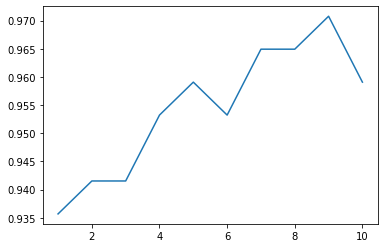

In [140]:
import matplotlib.pyplot as plt

plt.plot(n_neighbors_list, score)

# **9. Validation and Test**

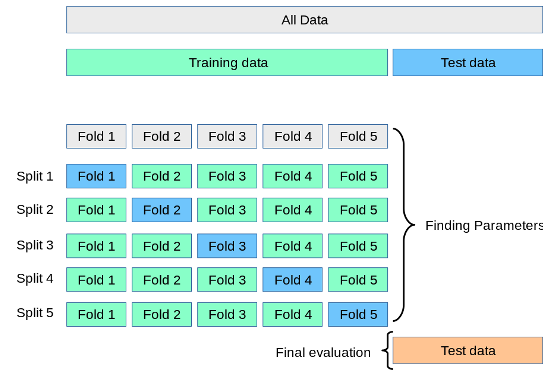

In [141]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

[0.9125     0.9        0.95       0.88607595 0.92405063]
0.9145253164556962


In [142]:
# 데이터셋을 train과 validation으로 나누어주는 KFold를 알아봅니다.
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    print(y_train_cv.value_counts())

B    194
M    124
Name: diagnosis, dtype: int64
B    197
M    121
Name: diagnosis, dtype: int64
B    200
M    118
Name: diagnosis, dtype: int64
B    207
M    112
Name: diagnosis, dtype: int64
B    198
M    121
Name: diagnosis, dtype: int64


In [143]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, val_index in skf.split(X_train, y_train):
  X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
  y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
  print(y_train_cv.value_counts())

B    199
M    119
Name: diagnosis, dtype: int64
B    199
M    119
Name: diagnosis, dtype: int64
B    199
M    119
Name: diagnosis, dtype: int64
B    199
M    120
Name: diagnosis, dtype: int64
B    200
M    119
Name: diagnosis, dtype: int64


# 과제

# **[과제1(5점)]**

이번 과제에서는 위에 주어진 Breast Cancer 데이터를 사용합니다.
위에 5-fold train, validation, test 셋을 만드는 코드와 KNN classifier에서 정확도가 가장 높은 k를 찾는 코드가 주어졌습니다.
9번 활동을 바탕으로 다음 과제를 수행하시면 됩니다.

1. scikit-learn의 KFold를 사용하여 모든 fold에 breast cancer 데이터의 training 데이터에 대하여 knn classifier을 fit합니다. (2 점)
2. `val_accuracy`라는 이름의 빈 numpy array를 선언하고 이 array에 각 폴드에 대해 KNN classifier의 정확도를 저장합니다. 이 때 정확도는 validation 데이터셋을 사용해야 합니다.(2점)
```python
# numpy array를 생성하는 방법
a = np.array([])
# numpy array에 3을 append 하는 방법
a = np.append(a, 3)
```
3. 모든 폴드의 정확도가 저장되어 있는 `val_accuracy`를 출력하고 `val_accuracy`의 평균을 구하여 출력합니다.(1점)
```python
a.mean()
```


In [144]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data_url = 'https://raw.githubusercontent.com/inikoreaackr/2020_Fall_ML/master/breastcancer.csv'

df = pd.read_csv(data_url)
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [145]:
y = df['diagnosis']
X = df.drop(columns=['diagnosis'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [146]:
a_kf = KFold(n_splits=5)
a_knn = KNeighborsClassifier()
val_accuracy = np.array([])

for train_index, val_index in a_kf.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    a_knn.fit(X_train_cv, y_train_cv)
    val_accuracy = np.append(val_accuracy, a_knn.score(X_val_cv, y_val_cv))

In [147]:
print(val_accuracy)

[0.95       0.8625     0.975      0.86075949 0.92405063]


In [148]:
val_accuracy.mean()

0.9144620253164557

# **[과제2(10점)]**

과제 1의 코드와 활동 8의 코드를 바탕으로 과제 2를 수행합니다. 이 과제는 validation 데이터셋으로 정확도가 가장 높은 k를 찾고, 찾아진 k로 KNN classifier을 fit하여 test 데이터에 대해 정확도를 출력할 것 입니다.

1. `n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`과 `score=[]`를 선언합니다.(1점)
2. 위 리스트에 있는 각 k의 값에 대하여 아래 과정을 수행합니다.
  *   과제 1의 KFold를 사용하여 training 데이터셋을 train, validation으로 나눕니다.(1점)
  *   각 폴드에 대해 k 값으로 ```KNeighborsClassifier(n_neighbors=k)``` 모델을 생성합니다.(1점)
  *   각 폴드에 대해 나뉘어진 train, validation에 대하여 모델을 fit합니다.(1점)
  *   각 폴드에 대해 KNN classifier의 정확도를 과제 1과 동일한 방식으로 저장합니다.(1점)
  *   `val_accuracy`의 평균을 `score` 리스트에 `append` 합니다.(1점)
3. `score` 리스트를 프린트합니다.(1점)
4. 활동 8에 주어진 코드로 각 k 값 당 validation 평균 정확도를 시각화합니다.(1점)
5. 가장 높은 k의 값으로 `KNeighborsClassifier`를 생성하고 train 데이터에 fit 한 후, test 데이터에 대하여 정확도를 출력합니다.(1점)
6. 이 과제에서 찾아진 test 데이터의 정확도와 k의 값을 활동 7과 8의 test 정확도와 k의 값을 비교하여 서술합니다.(1점)

In [149]:
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b_score = []


for k in n_neighbors_list:
    b_kf = KFold(n_splits=5)
    b_val_accuracy = np.array([])
    b_knn = KNeighborsClassifier(n_neighbors=k)
    for train_index, val_index in b_kf.split(X_train):
        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
        b_knn.fit(X_train_cv, y_train_cv)
        b_val_accuracy = np.append(b_val_accuracy, b_knn.score(X_val_cv, y_val_cv))
    b_score.append(b_val_accuracy.mean())

In [150]:
b_score

[0.8893037974683544,
 0.9018037974683544,
 0.9018354430379747,
 0.9043354430379746,
 0.9144620253164557,
 0.9068354430379747,
 0.9118987341772151,
 0.909367088607595,
 0.9043037974683544,
 0.9068354430379747]

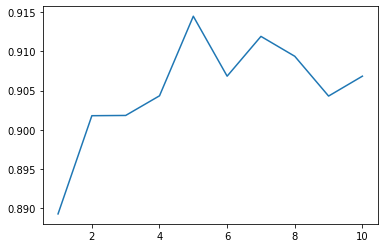

In [151]:
import matplotlib.pyplot as plt

plt.plot(n_neighbors_list, b_score)

In [152]:
n_neighbors_list[np.argmax(b_score)]

5

In [153]:
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [154]:
best_knn.score(X_test, y_test)

0.9590643274853801

In [155]:
'''
이 과제에서 찾아진 test 데이터의 정확도와 k의 값을 활동 7과 8의 test 정확도와 k의 값을 비교하여 서술합니다.(1점)
: 이 과제에서 test 데이터 정확도는 0.9590643274853801(k=5)
  활동 7에서 test 데이터 정확도는 0.9590643274853801(k=5 :default)
  활동 8에서 test 데이터 정확도는  0.9707602339181286(k=9)
'''

'\n이 과제에서 찾아진 test 데이터의 정확도와 k의 값을 활동 7과 8의 test 정확도와 k의 값을 비교하여 서술합니다.(1점)\n: 이 과제에서 test 데이터 정확도는 0.9590643274853801(k=5)\n  활동 7에서 test 데이터 정확도는 0.9590643274853801(k=5 :default)\n  활동 8에서 test 데이터 정확도는  0.9707602339181286(k=9)\n'

# [과제3(10점)]
1. 과제 2와 같은 과정을 `StratifiedKFold`에 대하여 수행합니다.(7점)

 [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

 KFold와 코드는 같으나 `skf.split`은 `X_train`과 `y_train`을 파라미터로 받습니다.
```python
skf = StratifiedKFold(n_splits=5)
for train_index, val_index in skf.split(X_train, y_train):
  ...
```
2. 이 과제에서도 동일하게 각 k 값에 대한 classifier의 정확도를 시각화하고 test 데이터셋에 대해 정확도를 출력해야 합니다. (2점)

3. 마지막으로 KFold와 비교하였을 때, k값과 정확도에 변화가 있는지 없는지 서술합니다.(1점)

In [156]:
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
s_score = []

for k in n_neighbors_list:
    s_val_accuracy = np.array([])
    s_kf =  StratifiedKFold(n_splits=5)
    s_knn = KNeighborsClassifier(n_neighbors=k)
    for train_index, val_index in s_kf.split(X_train, y_train):
        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
        s_knn.fit(X_train_cv, y_train_cv)
        s_val_accuracy = np.append(s_val_accuracy, s_knn.score(X_val_cv, y_val_cv))
    s_score.append(s_val_accuracy.mean())

In [157]:
s_score

[0.8969303797468354,
 0.9019303797468353,
 0.9069620253164556,
 0.9094620253164557,
 0.9145253164556962,
 0.9094936708860759,
 0.911993670886076,
 0.9044620253164556,
 0.9069303797468354,
 0.9069303797468355]

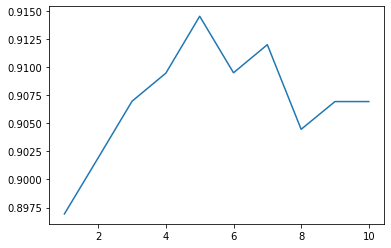

In [158]:
plt.plot(n_neighbors_list, s_score)

In [159]:
n_neighbors_list[np.argmax(s_score)]

5

In [160]:
s_best_knn = KNeighborsClassifier(n_neighbors=5)
s_best_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [161]:
s_best_knn.score(X_test, y_test)

0.9590643274853801

In [162]:
'''
마지막으로 KFold와 비교하였을 때, k값과 정확도에 변화가 있는지 없는지 서술합니다.(1점)
: 정확도 0.9590643274853801 k=5
  정확도와 K값이 동일하다.(변화 X)
'''

'\n마지막으로 KFold와 비교하였을 때, k값과 정확도에 변화가 있는지 없는지 서술합니다.(1점)\n: 정확도 0.9590643274853801 k=5\n  정확도와 K값이 동일하다.(변화 X)\n'